# Predicting Value of a Football Player 

>"Why couldn't you beat a richer club? I' ve never seen a bag of money score a goal." Johann Cruyff

It is a famous quotation from Johann Cruyff, one of the legends in football history. He may refer to this as best tactics win the game not the expensive players and he is mostly right. However we have witnessed lately that suitcases of money makes some clubs successful.

Growing football industry can cause clubs spend higher than what they possibly win. UEFA brought out Financial Fair Play Regulations to audit the expenses of clubs and prevent them to collapse financially. To follow the rules in the regulation, valuation of a player becomes crucial either to sell or to buy.

So what makes a footballer expensive? To give an answer to that, I' ve decided to predict the value of the football players using Fifa20 football video game dataset, provided in [`here`](https://www.kaggle.com/stefanoleone992/fifa-20-complete-player-dataset).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from math import sqrt
from sklearn.model_selection import GridSearchCV
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#loading the data from csv
df = pd.read_csv('players_20.csv')

### Exploring Data

Quick exploration of data: top5 rows & summary statistics

In [3]:
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  ...    lwb   ldm  \
0        170         72   Argentina         FC Barcelona  ...   68+2  66+2   
1        187         83    Portugal             Juventus  ...   65+3  61+3   
2        175         68      Brazil  Paris Saint-Germain  ...   66+3  61+3   
3        188         87    Slovenia      Atlético Madrid  ...    NaN   NaN   
4        175         74     Belgium          Real Madrid  ...   66+3  63+3   

    cdm   rdm   rwb    lb   lcb    cb   rcb    rb  
0  66+2  66+2  68+2  63+2  52+2  52+2  52+2  63+2  
1  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3  
2  61+3  61+3  66+3  61+3  46+3  46+3  46+3  61+3  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  63+3  63+3  66+3  61+3  49+3  49+3  49+3  61+3  

[5 rows x 104 columns]

In [4]:
df.describe()

sofifa_id       age  height_cm  weight_kg   overall  potential  \
count  18278.000 18278.000  18278.000  18278.000 18278.000  18278.000   
mean  219738.864    25.283    181.362     75.276    66.245     71.547   
std    27960.200     4.657      6.757      7.048     6.950      6.140   
min      768.000    16.000    156.000     50.000    48.000     49.000   
25%   204445.500    22.000    177.000     70.000    62.000     67.000   
50%   226165.000    25.000    181.000     75.000    66.000     71.000   
75%   240795.750    29.000    186.000     80.000    71.000     75.000   
max   252905.000    42.000    205.000    110.000    94.000     95.000   

          value_eur   wage_eur  international_reputation  weak_foot  \
count     18278.000  18278.000                 18278.000  18278.000   
mean    2484037.641   9456.943                     1.103      2.944   
std     5585481.061  21351.714                     0.379      0.665   
min           0.000      0.000                     1.000      1.000   
25%      325000.000   1000.000                     1.000      3.000   
50%      700000.000   3000.000                     1.000      3.000   
75%     2100000.000   8000.000                     1.000      3.000   
max   105500000.000 565000.000                     5.000      5.000   

               ...           mentality_penalties  mentality_composure  \
count          ...                     18278.000            18278.000   
mean           ...                        48.383               58.529   
std            ...                        15.708               11.881   
min            ...                         7.000               12.000   
25%            ...                        39.000               51.000   
50%            ...                        49.000               60.000   
75%            ...                        60.000               67.000   
max            ...                        92.000               96.000   

       defending_marking  defending_standing_tackle  defending_sliding_tackle  \
count          18278.000                  18278.000                 18278.000   
mean              46.849                     47.640                    45.607   
std               20.091                     21.586                    21.218   
min                1.000                      5.000                     3.000   
25%               29.000                     27.000                    24.000   
50%               52.000                     55.000                    52.000   
75%               64.000                     66.000                    64.000   
max               94.000                     92.000                    90.000   

       goalkeeping_diving  goalkeeping_handling  goalkeeping_kicking  \
count           18278.000             18278.000            18278.000   
mean               16.573                16.355               16.213   
std                17.738                16.997               16.614   
min                 1.000                 1.000                1.000   
25%                 8.000                 8.000                8.000   
50%                11.000                11.000               11.000   
75%                14.000                14.000               14.000   
max                90.000                92.000               93.000   

       goalkeeping_positioning  goalkeeping_reflexes  
count                18278.000             18278.000  
mean                    16.368                16.710  
std                     17.136                18.038  
min                      1.000                 1.000  
25%                      8.000                 8.000  
50%                     11.000                11.000  
75%                     14.000                14.000  
max                     91.000                92.000  

[8 rows x 61 columns]

In [5]:
df.shape

(18278, 104)

## Part 1 : How many football players in each position? How much value of a player  can change according to the position?
     

Let's explore the dataset a little bit. How many players exist in each position? Let's use team_position field first to find answers to our questions.

In [6]:
fig = px.pie(df, names='team_position')
fig.show()

In [7]:
# Lets look how much value player  has in each position. 
value=df.groupby(by='team_position')['value_eur'].agg('mean').sort_values(ascending=True)

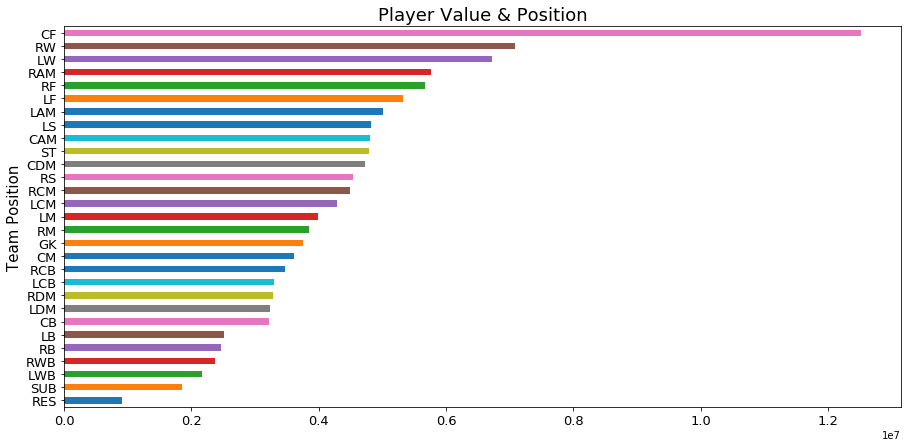

In [8]:
#Horizontal bar plot
ax=value.plot.barh(figsize=(15,7), fontsize=13)
ax.set_alpha(0.1)
ax.set_title("Player Value & Position", fontsize=18)
ax.set_ylabel("Team Position", fontsize=15);
plt.show()

It seems there exists "SUB" and "RES" positions, where players are sidelined. Let's use player_positions field  to determine the positions and exclude outliers if any change happens with the bar plot.There may be more than one player_position. To avoid any duplication i take first preferred position.

In [9]:
#Find player's first position by seperating the column by comma, then get the counts of the positions.
df['player_first_position']= df['player_positions'].str.split(",", n = 1, expand = True)[0]
df.groupby('player_first_position').size()

player_first_position
CAM    1146
CB     3162
CDM    1424
CF      113
CM     2193
GK     2036
LB     1303
LM     1049
LW      378
LWB      90
RB     1314
RM     1050
RW      369
RWB      69
ST     2582
dtype: int64

In [10]:
#Pie chart of counts
fig = px.pie(df, names='player_first_position')
fig.show()

Another analysis i want to make is to look at the values of positions wit and without outliers. The motivation behind this is, there exists very highly priced players which can affect the averages of certain positions.

In [11]:
#Function to remove outliers with IQR
def Remove_Outliers (df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    removed = df[~(df[col] < (Q1 - 1.5 * IQR)) & ~(df[col] > (Q3 + 1.5 * IQR))]
    return removed

In [12]:
#Remove outliers of value column
out=Remove_Outliers(df,'value_eur')
out.shape

(15767, 105)

In [13]:
# Lets look how much value player  has in each position without outliers 
value_outliers_out=out.groupby(by='player_first_position')['value_eur'].agg('mean').sort_values(ascending=True)

In [14]:
# Lets look how much value player  has in each position with outliers in the data
value_outliers_in=df.groupby(by='player_first_position')['value_eur'].agg('mean').sort_values(ascending=True)

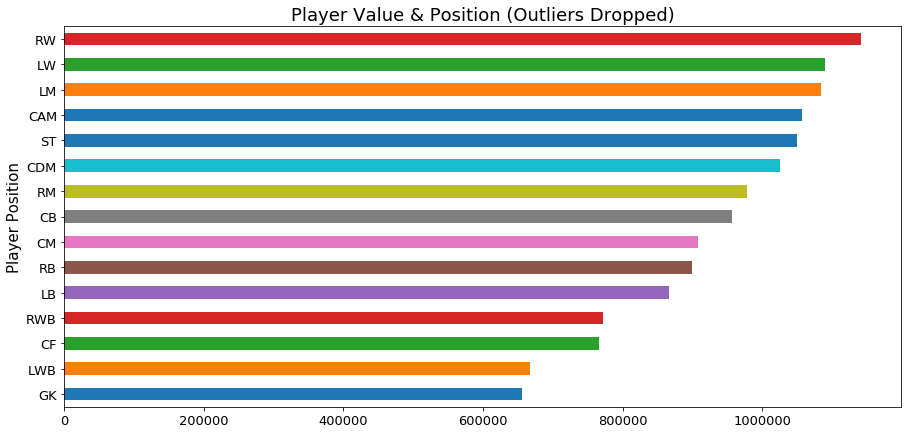

In [15]:
#Bar plot without outliers
ax=value_outliers_out.plot.barh(figsize=(15,7), fontsize=13)
ax.set_alpha(0.1)
ax.set_title("Player Value & Position (Outliers Dropped)", fontsize=18)
ax.set_ylabel("Player Position", fontsize=15);
plt.show()

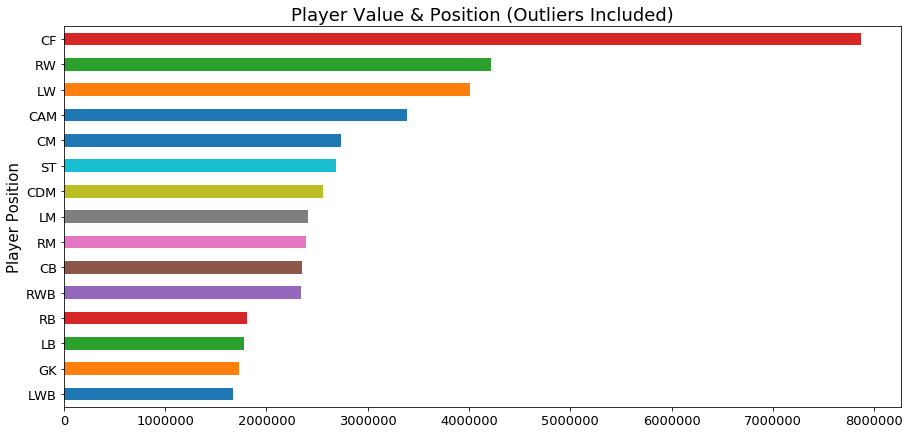

In [16]:
#Bar plot with outliers
ax=value_outliers_in.plot.barh(figsize=(15,7), fontsize=13)
ax.set_alpha(0.1)
ax.set_title("Player Value & Position (Outliers Included)", fontsize=18)
ax.set_ylabel("Player Position", fontsize=15);
plt.show()

## Part 2 : Potential rating or overall rating? Which one is more related with the value of a player?
     
Fifa dataset gives rating to players overall and potential. Let's discover which one is more related with the value of the player. Let's scatter plot overall & potential with respect to values.

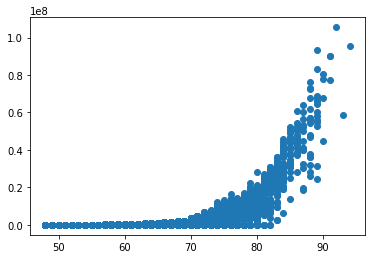

In [17]:
plt.scatter(df['overall'],df['value_eur'])

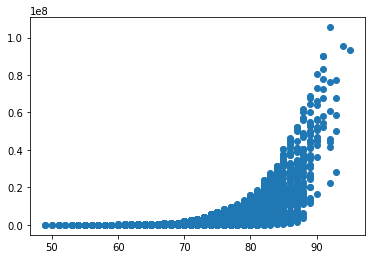

In [18]:
plt.scatter(df['potential'],df['value_eur'])

It's hard to tell which one is more related with the value from the graph. Let's calculate the correlations between them.

In [19]:
#Correlation overall& value
df['overall'].corr(df['value_eur'])

0.6382297173049687

In [20]:
#Correlation potential & value
df['potential'].corr(df['value_eur'])

0.5808677216629253

Findings of the analysis:

    * Overall attribute of the player has 0.638 correlation with value of the player
    * Potential attribute of the player has 0.580 correlation with value of the player
    * Overall rating of players is more related with value of the players than potential of the players.

What happens in real football world? Is the value just related with overall or potential? or both? 
Let's create another variable using overall & potential. Simply, multiply them to turn into new variable which covers both overall & potential. Is the new variable more related with the value of the player?


In [21]:
#New variable creation with multiplication of overall * potential
df['pot_x_overall']=df['potential']*df['overall']

In [22]:
#Correlation of pot_x_overall and value
df['pot_x_overall'].corr(df['value_eur'])

0.7100440572479949

YES! I did it. I created 1 new variable which is more related with the value of the player

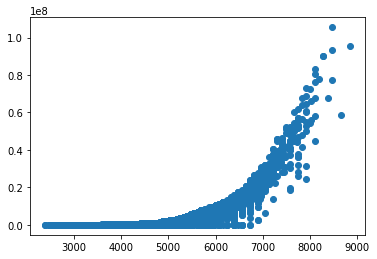

In [23]:
plt.scatter(df['pot_x_overall'],df['value_eur'])

C:\Users\YAVUZ\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning:

Method .as_matrix will be removed in a future version. Use .values instead.



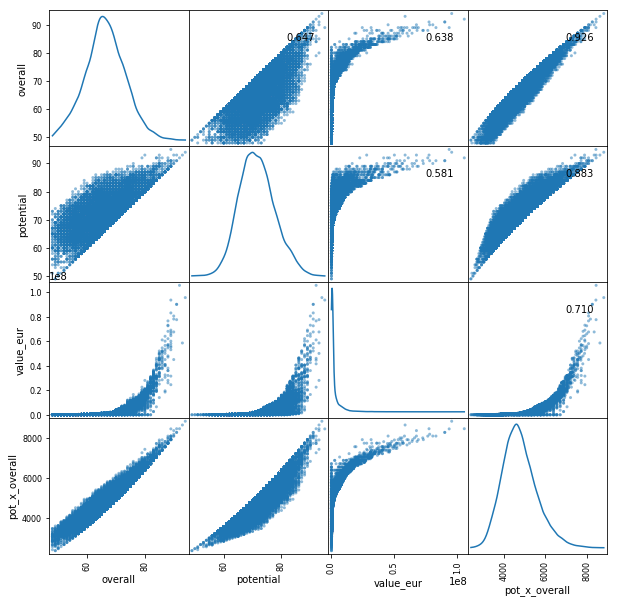

In [24]:
#Scatter matrix plot of the varibles with value
df_plot = df[['overall','potential','value_eur','pot_x_overall']]
axes = scatter_matrix(df_plot, alpha=0.5, figsize=(10,10),diagonal='kde')
corr = df_plot.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

## Part 3 : What will be the prediction of the value? 

In this section, I will try to develop a model to predit the value of the player. To do this,first i have to handle the categorical variables. Then, I will try LGBMRegressor to predict the value for the players. I will share the results of predictions & model feature importance

### Data Preprocessing

Some categorical data should be processed before predicting value.

#### 1.Player Positions

In the dataset, players ability to play in different positions exists in this field.
To process data, i will flag players if they can play in specific positions and i am going to create new variable as "Number of positions"

In [25]:
# One hot encoding of player positions
df = pd.concat([df, df['player_positions'].str.get_dummies(sep=', ').add_prefix('Position_')], axis=1) 
# Adding new variable: Number of positions a football player can play.
df['NOF_Positions']=df['player_positions'].str.count(',')+1
# drop original column
df = df.drop(['player_positions'], axis=1)

#### 2.Preferred Foot

In the dataset, preffered foot is specified as categorical variable. I am going to create dummy variables for preferred foot.

In [26]:
# One hot encoding of preferred_foot
df = pd.concat([df, pd.get_dummies(df['preferred_foot'],prefix='Foot')], axis=1)
# drop original column
df = df.drop(['preferred_foot'], axis=1)

In [27]:
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club    ...      \
0        170         72   Argentina         FC Barcelona    ...       
1        187         83    Portugal             Juventus    ...       
2        175         68      Brazil  Paris Saint-Germain    ...       
3        188         87    Slovenia      Atlético Madrid    ...       
4        175         74     Belgium          Real Madrid    ...       

   Position_LW  Position_LWB  Position_RB  Position_RM  Position_RW  \
0            0             0            0            0            1   
1            1             0            0            0            0   
2            1             0            0            0            0   
3            0             0            0            0            0   
4            1             0            0            0            0   

   Position_RWB  Position_ST NOF_Positions Foot_Left Foot_Right  
0             0            1             3         1          0  
1             0            1             2         0          1  
2             0            0             2         0          1  
3             0            0             1         0          1  
4             0            0             2         0          1  

[5 rows x 122 columns]

#### 3.Work Rate

Work rates of players are given for both offense & defense in a field. To process data, i will split those and get dummy variables for each work rate.

In [28]:
# Split work_rate as offense/ defense and one hot encode both
df[['Offense_Work_Rate','Defense_Work_Rate']] = df.work_rate.str.split("/",expand=True,)
df = pd.concat([df, pd.get_dummies(df['Offense_Work_Rate'],prefix='Offense_Work_Rate'),pd.get_dummies(df['Defense_Work_Rate'],prefix='Defense_Work_Rate')], axis=1)
# drop original column
df = df.drop(['work_rate','Offense_Work_Rate','Defense_Work_Rate'], axis=1)

In [29]:
df.head(5)

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  \
0        170         72   Argentina         FC Barcelona   
1        187         83    Portugal             Juventus   
2        175         68      Brazil  Paris Saint-Germain   
3        188         87    Slovenia      Atlético Madrid   
4        175         74     Belgium          Real Madrid   

             ...             Position_ST  NOF_Positions  Foot_Left  \
0            ...                       1              3          1   
1            ...                       1              2          0   
2            ...                       0              2          0   
3            ...                       0              1          0   
4            ...                       0              2          0   

   Foot_Right  Offense_Work_Rate_High  Offense_Work_Rate_Low  \
0           0                       0                      0   
1           1                       1                      0   
2           1                       1                      0   
3           1                       0                      0   
4           1                       1                      0   

   Offense_Work_Rate_Medium Defense_Work_Rate_High Defense_Work_Rate_Low  \
0                         1                      0                     1   
1                         0                      0                     1   
2                         0                      0                     0   
3                         1                      0                     0   
4                         0                      0                     0   

   Defense_Work_Rate_Medium  
0                         0  
1                         0  
2                         1  
3                         1  
4                         1  

[5 rows x 127 columns]

#### 4.Player Tags

Player tags are given in a column and seperated by comma. I am going to split those tags and flag them. Also i will create a new variable "Number of tags"

In [30]:
# One hot encoding of player tags
df = pd.concat([df, df['player_tags'].str.get_dummies(sep=', ').add_prefix('Tag_')], axis=1) 
# Adding new variable: Number of tags a football player has.
df['NOF_tags']=df['player_tags'].str.count(',')+1
df['NOF_tags'] = df['NOF_tags'].fillna(0)
# drop original column
df = df.drop(['player_tags'], axis=1)
df.columns = df.columns.str.replace("#", "")

In [31]:
df.shape

(18278, 144)

#### 5. Position Ratings
Players has different ratings in different positions. In the dataset, ratings are given with additional motivation factor(+ sign). Motivational factor is going to be removed from data. Also same positions are going to be removed. Keeping the same values for different columns is meaningless.

In [32]:
#Splitting position ratings & save them as floats
positions = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
       'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb']
for col in positions:
    new = df[col].str.split("+", n = 1, expand = True)
    df[col] = new[0]

df[positions] = df[positions].astype(float)

# Dropping same columns & Rename 
df = df.drop(['ls','rs','lw','lf','rf','lam','ram','lm','lcm','rcm','lwb','ldm','rdm','lb','lcb','rcb'], axis=1)
df.rename(columns={"cf": "Forward", "st": "Striker","rw":"Wing","cam":"Attacking Midfield","cm":"center Midfield","rm":"Wing Midfield","cdm":"Defensive Midfield","rwb":"Offense Wing Back","cb":"Center Back","rb":"Defense Wing Back"}, 
                 inplace=True)

In [33]:
df.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club    ...     \
0        170         72   Argentina         FC Barcelona    ...      
1        187         83    Portugal             Juventus    ...      
2        175         68      Brazil  Paris Saint-Germain    ...      
3        188         87    Slovenia      Atlético Madrid    ...      
4        175         74     Belgium          Real Madrid    ...      

   Tag_Dribbler  Tag_Engine  Tag_FK Specialist  Tag_Playmaker    Tag_Poacher  \
0             1           0                  1                0            0   
1             1           0                  0                0            0   
2             1           0                  1                1            0   
3             0           0                  0                0            0   
4             1           0                  0                0            0   

   Tag_Speedster  Tag_Strength Tag_Tackling  Tag_Tactician   NOF_tags  
0              0             0             0              0     7.000  
1              1             0             0              0     6.000  
2              1             0             0              0     9.000  
3              0             0             0              0     0.000  
4              1             0             0              0     3.000  

[5 rows x 128 columns]

#### Drop Unnecessary Fields

Some columns are removed not to use in prediction.

In [34]:
df = df.drop(['player_url','dob','short_name','long_name','nationality','club','wage_eur','body_type','real_face','release_clause_eur','team_position','team_jersey_number','loaned_from','joined','nation_position','nation_jersey_number','player_traits','player_first_position'], axis=1)

### Prediction of the value :  LightGBM Regressor

Let's try to predict the value of the players using the variables given & created.

In [35]:
df.describe()

sofifa_id       age  height_cm  weight_kg   overall  potential  \
count  18278.000 18278.000  18278.000  18278.000 18278.000  18278.000   
mean  219738.864    25.283    181.362     75.276    66.245     71.547   
std    27960.200     4.657      6.757      7.048     6.950      6.140   
min      768.000    16.000    156.000     50.000    48.000     49.000   
25%   204445.500    22.000    177.000     70.000    62.000     67.000   
50%   226165.000    25.000    181.000     75.000    66.000     71.000   
75%   240795.750    29.000    186.000     80.000    71.000     75.000   
max   252905.000    42.000    205.000    110.000    94.000     95.000   

          value_eur  international_reputation  weak_foot  skill_moves  \
count     18278.000                 18278.000  18278.000    18278.000   
mean    2484037.641                     1.103      2.944        2.368   
std     5585481.061                     0.379      0.665        0.765   
min           0.000                     1.000      1.000        1.000   
25%      325000.000                     1.000      3.000        2.000   
50%      700000.000                     1.000      3.000        2.000   
75%     2100000.000                     1.000      3.000        3.000   
max   105500000.000                     5.000      5.000        5.000   

         ...     Tag_Dribbler  Tag_Engine  Tag_FK Specialist  Tag_Playmaker    \
count    ...        18278.000   18278.000          18278.000        18278.000   
mean     ...            0.005       0.013              0.002            0.002   
std      ...            0.072       0.114              0.039            0.040   
min      ...            0.000       0.000              0.000            0.000   
25%      ...            0.000       0.000              0.000            0.000   
50%      ...            0.000       0.000              0.000            0.000   
75%      ...            0.000       0.000              0.000            0.000   
max      ...            1.000       1.000              1.000            1.000   

       Tag_Poacher  Tag_Speedster  Tag_Strength  Tag_Tackling   \
count    18278.000      18278.000     18278.000      18278.000   
mean         0.001          0.014         0.032          0.002   
std          0.025          0.118         0.177          0.040   
min          0.000          0.000         0.000          0.000   
25%          0.000          0.000         0.000          0.000   
50%          0.000          0.000         0.000          0.000   
75%          0.000          0.000         0.000          0.000   
max          1.000          1.000         1.000          1.000   

       Tag_Tactician   NOF_tags  
count       18278.000 18278.000  
mean            0.002     0.104  
std             0.044     0.404  
min             0.000     0.000  
25%             0.000     0.000  
50%             0.000     0.000  
75%             0.000     0.000  
max             1.000     9.000  

[8 rows x 110 columns]

In [36]:
df.head()

sofifa_id  age  height_cm  weight_kg  overall  potential  value_eur  \
0     158023   32        170         72       94         94   95500000   
1      20801   34        187         83       93         93   58500000   
2     190871   27        175         68       92         92  105500000   
3     200389   26        188         87       91         93   77500000   
4     183277   28        175         74       91         91   90000000   

   international_reputation  weak_foot  skill_moves    ...     Tag_Dribbler  \
0                         5          4            4    ...                1   
1                         5          4            5    ...                1   
2                         5          5            5    ...                1   
3                         3          3            1    ...                0   
4                         4          4            4    ...                1   

   Tag_Engine  Tag_FK Specialist  Tag_Playmaker    Tag_Poacher  Tag_Speedster  \
0           0                  1                0            0              0   
1           0                  0                0            0              1   
2           0                  1                1            0              1   
3           0                  0                0            0              0   
4           0                  0                0            0              1   

   Tag_Strength  Tag_Tackling   Tag_Tactician   NOF_tags  
0             0              0               0     7.000  
1             0              0               0     6.000  
2             0              0               0     9.000  
3             0              0               0     0.000  
4             0              0               0     3.000  

[5 rows x 110 columns]

In [37]:
#Exlude free-signing player : no player has a value of 0 in real life. 
df=df[df['value_eur'] > 0]

In [38]:
# Define X ,y values
y=df['value_eur'].values
X=df.drop(['value_eur','sofifa_id'],axis=1).values

In [39]:
# Create training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1907)

In [40]:
#Instainsiate the model
model = LGBMRegressor(boosting_type='gbdt', objective='regression', metric='mae',bagging_fraction=0.8, 
                      feature_fraction=0.8, reg_lambda=0.9,n_estimators=400, importance_type='split')

In [41]:
#fit the model
model.fit(x_train, y_train,  eval_set= [(x_train, y_train), (x_test, y_test)],early_stopping_rounds=30)

[1]	training's l1: 2.55728e+06	valid_1's l1: 2.59701e+06
Training until validation scores don't improve for 30 rounds
[2]	training's l1: 2.31102e+06	valid_1's l1: 2.34657e+06
[3]	training's l1: 2.08486e+06	valid_1's l1: 2.11737e+06
[4]	training's l1: 1.88554e+06	valid_1's l1: 1.91558e+06
[5]	training's l1: 1.70209e+06	valid_1's l1: 1.72999e+06
[6]	training's l1: 1.53759e+06	valid_1's l1: 1.56567e+06
[7]	training's l1: 1.38991e+06	valid_1's l1: 1.41785e+06
[8]	training's l1: 1.25721e+06	valid_1's l1: 1.2862e+06
[9]	training's l1: 1.13727e+06	valid_1's l1: 1.16701e+06
[10]	training's l1: 1.03099e+06	valid_1's l1: 1.06315e+06
[11]	training's l1: 934034	valid_1's l1: 968282
[12]	training's l1: 846911	valid_1's l1: 882036
[13]	training's l1: 768471	valid_1's l1: 801834
[14]	training's l1: 697153	valid_1's l1: 729358
[15]	training's l1: 634680	valid_1's l1: 668329
[16]	training's l1: 578463	valid_1's l1: 612893
[17]	training's l1: 526603	valid_1's l1: 560671
[18]	training's l1: 479992	valid_

[196]	training's l1: 59280.9	valid_1's l1: 128241
[197]	training's l1: 59225.6	valid_1's l1: 128239
[198]	training's l1: 59039.8	valid_1's l1: 128204
[199]	training's l1: 58944.1	valid_1's l1: 128228
[200]	training's l1: 58810.6	valid_1's l1: 128301
[201]	training's l1: 58733.3	valid_1's l1: 128389
[202]	training's l1: 58648.8	valid_1's l1: 128424
[203]	training's l1: 58508.1	valid_1's l1: 128495
[204]	training's l1: 58383.4	valid_1's l1: 128569
[205]	training's l1: 58207.5	valid_1's l1: 128622
[206]	training's l1: 58130.8	valid_1's l1: 128598
[207]	training's l1: 58016.2	valid_1's l1: 128553
[208]	training's l1: 57863.5	valid_1's l1: 128620
[209]	training's l1: 57785	valid_1's l1: 128500
[210]	training's l1: 57722.8	valid_1's l1: 128572
[211]	training's l1: 57446.8	valid_1's l1: 128438
[212]	training's l1: 57336.5	valid_1's l1: 128550
[213]	training's l1: 57270.5	valid_1's l1: 128590
[214]	training's l1: 57154.5	valid_1's l1: 128546
Early stopping, best iteration is:
[184]	training's 

LGBMRegressor(bagging_fraction=0.8, boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, feature_fraction=0.8, importance_type='split',
       learning_rate=0.1, max_depth=-1, metric='mae', min_child_samples=20,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
       n_jobs=-1, num_leaves=31, objective='regression', random_state=None,
       reg_alpha=0.0, reg_lambda=0.9, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

In [42]:
# Hyper paramter optimization : Grid Search
parameters = {'n_estimators': [400,800,1200],
              'learning_rate': [0.1, 0.2],
              'max_depth':[-1,5,6],
              'num_leaves' : [100,200]
             }
gridSearchCV = GridSearchCV(estimator = model, 
    param_grid = parameters, 
    scoring='neg_mean_absolute_error',
    n_jobs=1,
    iid=False, 
    verbose=1,
    cv=3)
gridSearchCV.fit(X,y,eval_set = (x_test, y_test),early_stopping_rounds=30)
gridSearchCV.grid_scores_, gridSearchCV.best_params_, gridSearchCV.best_score_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[1]	valid_0's l1: 2.18894e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.14261e+06
[3]	valid_0's l1: 2.10049e+06
[4]	valid_0's l1: 2.06333e+06
[5]	valid_0's l1: 2.03545e+06
[6]	valid_0's l1: 2.00619e+06
[7]	valid_0's l1: 1.97842e+06
[8]	valid_0's l1: 1.95523e+06
[9]	valid_0's l1: 1.93276e+06
[10]	valid_0's l1: 1.91142e+06
[11]	valid_0's l1: 1.89383e+06
[12]	valid_0's l1: 1.87713e+06
[13]	valid_0's l1: 1.86238e+06
[14]	valid_0's l1: 1.84903e+06
[15]	valid_0's l1: 1.83686e+06
[16]	valid_0's l1: 1.82658e+06
[17]	valid_0's l1: 1.81628e+06
[18]	valid_0's l1: 1.80768e+06
[19]	valid_0's l1: 1.79919e+06
[20]	valid_0's l1: 1.79169e+06
[21]	valid_0's l1: 1.78474e+06
[22]	valid_0's l1: 1.77849e+06
[23]	valid_0's l1: 1.77282e+06
[24]	valid_0's l1: 1.76817e+06
[25]	valid_0's l1: 1.76342e+06
[26]	valid_0's l1: 1.76014e+06
[27]	valid_0's l1: 1.75675e+06
[28]	valid_0's l1: 1.75373e+06
[29]	valid_0's l1:

[262]	valid_0's l1: 1.71877e+06
[263]	valid_0's l1: 1.71876e+06
[264]	valid_0's l1: 1.71875e+06
[265]	valid_0's l1: 1.71877e+06
[266]	valid_0's l1: 1.71877e+06
[267]	valid_0's l1: 1.71875e+06
[268]	valid_0's l1: 1.71875e+06
[269]	valid_0's l1: 1.71874e+06
[270]	valid_0's l1: 1.71872e+06
[271]	valid_0's l1: 1.7187e+06
[272]	valid_0's l1: 1.7187e+06
[273]	valid_0's l1: 1.71869e+06
[274]	valid_0's l1: 1.71868e+06
[275]	valid_0's l1: 1.71867e+06
[276]	valid_0's l1: 1.71866e+06
[277]	valid_0's l1: 1.71865e+06
[278]	valid_0's l1: 1.71864e+06
[279]	valid_0's l1: 1.71863e+06
[280]	valid_0's l1: 1.71864e+06
[281]	valid_0's l1: 1.71864e+06
[282]	valid_0's l1: 1.71863e+06
[283]	valid_0's l1: 1.71862e+06
[284]	valid_0's l1: 1.71861e+06
[285]	valid_0's l1: 1.7186e+06
[286]	valid_0's l1: 1.71859e+06
[287]	valid_0's l1: 1.71858e+06
[288]	valid_0's l1: 1.71857e+06
[289]	valid_0's l1: 1.71857e+06
[290]	valid_0's l1: 1.71856e+06
[291]	valid_0's l1: 1.71855e+06
[292]	valid_0's l1: 1.71854e+06
[293]	valid

[136]	valid_0's l1: 88426.1
[137]	valid_0's l1: 88168.8
[138]	valid_0's l1: 87931.8
[139]	valid_0's l1: 87818
[140]	valid_0's l1: 87696.7
[141]	valid_0's l1: 87331.7
[142]	valid_0's l1: 87086.7
[143]	valid_0's l1: 86865
[144]	valid_0's l1: 86663.4
[145]	valid_0's l1: 86619.4
[146]	valid_0's l1: 86419.3
[147]	valid_0's l1: 86218.5
[148]	valid_0's l1: 86166.8
[149]	valid_0's l1: 85925.5
[150]	valid_0's l1: 85892.7
[151]	valid_0's l1: 85655.9
[152]	valid_0's l1: 85505.8
[153]	valid_0's l1: 85459.6
[154]	valid_0's l1: 85442.8
[155]	valid_0's l1: 85212
[156]	valid_0's l1: 85106.6
[157]	valid_0's l1: 85029.4
[158]	valid_0's l1: 85026.3
[159]	valid_0's l1: 84901.9
[160]	valid_0's l1: 84801.9
[161]	valid_0's l1: 84617
[162]	valid_0's l1: 84403.1
[163]	valid_0's l1: 84228.9
[164]	valid_0's l1: 84239.1
[165]	valid_0's l1: 84157.9
[166]	valid_0's l1: 84061.5
[167]	valid_0's l1: 83908.9
[168]	valid_0's l1: 83723.1
[169]	valid_0's l1: 83599.1
[170]	valid_0's l1: 83398.3
[171]	valid_0's l1: 83198.5


[41]	valid_0's l1: 161589
[42]	valid_0's l1: 156149
[43]	valid_0's l1: 152646
[44]	valid_0's l1: 149453
[45]	valid_0's l1: 146526
[46]	valid_0's l1: 142664
[47]	valid_0's l1: 140424
[48]	valid_0's l1: 138445
[49]	valid_0's l1: 136366
[50]	valid_0's l1: 134430
[51]	valid_0's l1: 132661
[52]	valid_0's l1: 131195
[53]	valid_0's l1: 129713
[54]	valid_0's l1: 128560
[55]	valid_0's l1: 127364
[56]	valid_0's l1: 126119
[57]	valid_0's l1: 124991
[58]	valid_0's l1: 123976
[59]	valid_0's l1: 123030
[60]	valid_0's l1: 122441
[61]	valid_0's l1: 121379
[62]	valid_0's l1: 120695
[63]	valid_0's l1: 119892
[64]	valid_0's l1: 119133
[65]	valid_0's l1: 118598
[66]	valid_0's l1: 118126
[67]	valid_0's l1: 117278
[68]	valid_0's l1: 117054
[69]	valid_0's l1: 116499
[70]	valid_0's l1: 115869
[71]	valid_0's l1: 115322
[72]	valid_0's l1: 114896
[73]	valid_0's l1: 114467
[74]	valid_0's l1: 113852
[75]	valid_0's l1: 113563
[76]	valid_0's l1: 113310
[77]	valid_0's l1: 112351
[78]	valid_0's l1: 111806
[79]	valid_0

[359]	valid_0's l1: 75883.2
[360]	valid_0's l1: 75833.3
[361]	valid_0's l1: 75746
[362]	valid_0's l1: 75676.3
[363]	valid_0's l1: 75625.5
[364]	valid_0's l1: 75578.6
[365]	valid_0's l1: 75538.2
[366]	valid_0's l1: 75652.9
[367]	valid_0's l1: 75583.5
[368]	valid_0's l1: 75546.4
[369]	valid_0's l1: 75454.1
[370]	valid_0's l1: 75372.1
[371]	valid_0's l1: 75280.4
[372]	valid_0's l1: 75233.1
[373]	valid_0's l1: 75169.7
[374]	valid_0's l1: 75144.6
[375]	valid_0's l1: 75088.1
[376]	valid_0's l1: 75062.7
[377]	valid_0's l1: 74983.4
[378]	valid_0's l1: 74959.5
[379]	valid_0's l1: 74905
[380]	valid_0's l1: 74871.2
[381]	valid_0's l1: 74849.6
[382]	valid_0's l1: 74822.8
[383]	valid_0's l1: 74804
[384]	valid_0's l1: 74724.3
[385]	valid_0's l1: 74674.7
[386]	valid_0's l1: 74655.8
[387]	valid_0's l1: 74626.8
[388]	valid_0's l1: 74568.5
[389]	valid_0's l1: 74558.5
[390]	valid_0's l1: 74539.5
[391]	valid_0's l1: 74574.6
[392]	valid_0's l1: 74521.5
[393]	valid_0's l1: 74465.2
[394]	valid_0's l1: 74375.

[222]	valid_0's l1: 1.72058e+06
[223]	valid_0's l1: 1.72057e+06
[224]	valid_0's l1: 1.72055e+06
[225]	valid_0's l1: 1.72054e+06
[226]	valid_0's l1: 1.72052e+06
[227]	valid_0's l1: 1.72051e+06
[228]	valid_0's l1: 1.72051e+06
[229]	valid_0's l1: 1.7205e+06
[230]	valid_0's l1: 1.72048e+06
[231]	valid_0's l1: 1.72047e+06
[232]	valid_0's l1: 1.72047e+06
[233]	valid_0's l1: 1.72046e+06
[234]	valid_0's l1: 1.72045e+06
[235]	valid_0's l1: 1.72042e+06
[236]	valid_0's l1: 1.72041e+06
[237]	valid_0's l1: 1.72041e+06
[238]	valid_0's l1: 1.7204e+06
[239]	valid_0's l1: 1.7204e+06
[240]	valid_0's l1: 1.72039e+06
[241]	valid_0's l1: 1.72037e+06
[242]	valid_0's l1: 1.72037e+06
[243]	valid_0's l1: 1.72034e+06
[244]	valid_0's l1: 1.72033e+06
[245]	valid_0's l1: 1.72032e+06
[246]	valid_0's l1: 1.72032e+06
[247]	valid_0's l1: 1.7203e+06
[248]	valid_0's l1: 1.72029e+06
[249]	valid_0's l1: 1.72029e+06
[250]	valid_0's l1: 1.72029e+06
[251]	valid_0's l1: 1.72028e+06
[252]	valid_0's l1: 1.72028e+06
[253]	valid_

[95]	valid_0's l1: 88629.6
[96]	valid_0's l1: 88468.3
[97]	valid_0's l1: 88159.9
[98]	valid_0's l1: 87761.7
[99]	valid_0's l1: 87629.4
[100]	valid_0's l1: 87421.4
[101]	valid_0's l1: 87261.5
[102]	valid_0's l1: 86980
[103]	valid_0's l1: 86622.2
[104]	valid_0's l1: 86478
[105]	valid_0's l1: 86418.3
[106]	valid_0's l1: 86185.6
[107]	valid_0's l1: 85946.2
[108]	valid_0's l1: 85687.4
[109]	valid_0's l1: 85421.1
[110]	valid_0's l1: 85280
[111]	valid_0's l1: 85081.4
[112]	valid_0's l1: 84722.5
[113]	valid_0's l1: 84638.5
[114]	valid_0's l1: 84442.7
[115]	valid_0's l1: 84432.3
[116]	valid_0's l1: 84345.5
[117]	valid_0's l1: 84056.4
[118]	valid_0's l1: 83851.5
[119]	valid_0's l1: 83643.5
[120]	valid_0's l1: 83422
[121]	valid_0's l1: 83270.5
[122]	valid_0's l1: 83142
[123]	valid_0's l1: 83008.7
[124]	valid_0's l1: 82872.1
[125]	valid_0's l1: 82681.6
[126]	valid_0's l1: 82415.7
[127]	valid_0's l1: 82281.4
[128]	valid_0's l1: 82146
[129]	valid_0's l1: 82026
[130]	valid_0's l1: 81834.2
[131]	valid

[396]	valid_0's l1: 63145.3
[397]	valid_0's l1: 63103.5
[398]	valid_0's l1: 63061.6
[399]	valid_0's l1: 62999.8
[400]	valid_0's l1: 62954.6
Did not meet early stopping. Best iteration is:
[400]	valid_0's l1: 62954.6
[1]	valid_0's l1: 3.21697e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.90684e+06
[3]	valid_0's l1: 2.62742e+06
[4]	valid_0's l1: 2.37651e+06
[5]	valid_0's l1: 2.15071e+06
[6]	valid_0's l1: 1.94923e+06
[7]	valid_0's l1: 1.76724e+06
[8]	valid_0's l1: 1.60473e+06
[9]	valid_0's l1: 1.45681e+06
[10]	valid_0's l1: 1.32328e+06
[11]	valid_0's l1: 1.20621e+06
[12]	valid_0's l1: 1.09846e+06
[13]	valid_0's l1: 1.00054e+06
[14]	valid_0's l1: 912686
[15]	valid_0's l1: 832765
[16]	valid_0's l1: 760331
[17]	valid_0's l1: 696673
[18]	valid_0's l1: 637919
[19]	valid_0's l1: 585262
[20]	valid_0's l1: 538703
[21]	valid_0's l1: 496830
[22]	valid_0's l1: 458403
[23]	valid_0's l1: 423804
[24]	valid_0's l1: 392502
[25]	valid_0's l1: 363698
[26]	valid_0's l1

[297]	valid_0's l1: 84334
[298]	valid_0's l1: 84340.6
[299]	valid_0's l1: 84275
[300]	valid_0's l1: 84238.5
[301]	valid_0's l1: 84199.6
[302]	valid_0's l1: 84163.8
[303]	valid_0's l1: 84099.2
[304]	valid_0's l1: 84030.9
[305]	valid_0's l1: 83967.2
[306]	valid_0's l1: 84099.9
[307]	valid_0's l1: 84015.2
[308]	valid_0's l1: 84020.1
[309]	valid_0's l1: 83987
[310]	valid_0's l1: 83933.1
[311]	valid_0's l1: 83832.3
[312]	valid_0's l1: 83787.9
[313]	valid_0's l1: 83786.8
[314]	valid_0's l1: 83717
[315]	valid_0's l1: 83720.8
[316]	valid_0's l1: 83639.4
[317]	valid_0's l1: 83578.1
[318]	valid_0's l1: 83543.8
[319]	valid_0's l1: 83458.1
[320]	valid_0's l1: 83446.6
[321]	valid_0's l1: 83394.4
[322]	valid_0's l1: 83351.7
[323]	valid_0's l1: 83303.4
[324]	valid_0's l1: 83277.5
[325]	valid_0's l1: 83236.5
[326]	valid_0's l1: 83197.6
[327]	valid_0's l1: 83122.2
[328]	valid_0's l1: 83037.7
[329]	valid_0's l1: 83000.6
[330]	valid_0's l1: 82929.1
[331]	valid_0's l1: 82834.3
[332]	valid_0's l1: 82819.6


[185]	valid_0's l1: 1.71978e+06
[186]	valid_0's l1: 1.71977e+06
[187]	valid_0's l1: 1.71973e+06
[188]	valid_0's l1: 1.71972e+06
[189]	valid_0's l1: 1.71971e+06
[190]	valid_0's l1: 1.7197e+06
[191]	valid_0's l1: 1.71966e+06
[192]	valid_0's l1: 1.71966e+06
[193]	valid_0's l1: 1.71962e+06
[194]	valid_0's l1: 1.7196e+06
[195]	valid_0's l1: 1.71959e+06
[196]	valid_0's l1: 1.71958e+06
[197]	valid_0's l1: 1.71956e+06
[198]	valid_0's l1: 1.71956e+06
[199]	valid_0's l1: 1.71953e+06
[200]	valid_0's l1: 1.71949e+06
[201]	valid_0's l1: 1.71946e+06
[202]	valid_0's l1: 1.71945e+06
[203]	valid_0's l1: 1.71944e+06
[204]	valid_0's l1: 1.71942e+06
[205]	valid_0's l1: 1.71941e+06
[206]	valid_0's l1: 1.71939e+06
[207]	valid_0's l1: 1.71938e+06
[208]	valid_0's l1: 1.71937e+06
[209]	valid_0's l1: 1.7194e+06
[210]	valid_0's l1: 1.71938e+06
[211]	valid_0's l1: 1.71935e+06
[212]	valid_0's l1: 1.71933e+06
[213]	valid_0's l1: 1.71931e+06
[214]	valid_0's l1: 1.71931e+06
[215]	valid_0's l1: 1.71931e+06
[216]	valid

[463]	valid_0's l1: 1.71766e+06
[464]	valid_0's l1: 1.71765e+06
[465]	valid_0's l1: 1.71765e+06
[466]	valid_0's l1: 1.71765e+06
[467]	valid_0's l1: 1.71764e+06
[468]	valid_0's l1: 1.71764e+06
[469]	valid_0's l1: 1.71764e+06
[470]	valid_0's l1: 1.71763e+06
[471]	valid_0's l1: 1.71761e+06
[472]	valid_0's l1: 1.71761e+06
[473]	valid_0's l1: 1.71761e+06
[474]	valid_0's l1: 1.71761e+06
[475]	valid_0's l1: 1.7176e+06
[476]	valid_0's l1: 1.7176e+06
[477]	valid_0's l1: 1.7176e+06
[478]	valid_0's l1: 1.7176e+06
[479]	valid_0's l1: 1.71759e+06
[480]	valid_0's l1: 1.71758e+06
[481]	valid_0's l1: 1.71758e+06
[482]	valid_0's l1: 1.71757e+06
[483]	valid_0's l1: 1.71757e+06
[484]	valid_0's l1: 1.71757e+06
[485]	valid_0's l1: 1.71755e+06
[486]	valid_0's l1: 1.71755e+06
[487]	valid_0's l1: 1.71755e+06
[488]	valid_0's l1: 1.71754e+06
[489]	valid_0's l1: 1.71754e+06
[490]	valid_0's l1: 1.71754e+06
[491]	valid_0's l1: 1.71754e+06
[492]	valid_0's l1: 1.71754e+06
[493]	valid_0's l1: 1.71753e+06
[494]	valid_

[723]	valid_0's l1: 1.71715e+06
[724]	valid_0's l1: 1.71715e+06
[725]	valid_0's l1: 1.71714e+06
[726]	valid_0's l1: 1.71714e+06
[727]	valid_0's l1: 1.71714e+06
[728]	valid_0's l1: 1.71714e+06
[729]	valid_0's l1: 1.71714e+06
[730]	valid_0's l1: 1.71714e+06
[731]	valid_0's l1: 1.71714e+06
[732]	valid_0's l1: 1.71714e+06
[733]	valid_0's l1: 1.71713e+06
[734]	valid_0's l1: 1.71713e+06
[735]	valid_0's l1: 1.71713e+06
[736]	valid_0's l1: 1.71713e+06
[737]	valid_0's l1: 1.71713e+06
[738]	valid_0's l1: 1.71713e+06
[739]	valid_0's l1: 1.71713e+06
[740]	valid_0's l1: 1.71713e+06
[741]	valid_0's l1: 1.71713e+06
[742]	valid_0's l1: 1.71713e+06
[743]	valid_0's l1: 1.71712e+06
[744]	valid_0's l1: 1.71712e+06
[745]	valid_0's l1: 1.71712e+06
[746]	valid_0's l1: 1.71712e+06
[747]	valid_0's l1: 1.71712e+06
[748]	valid_0's l1: 1.71712e+06
[749]	valid_0's l1: 1.71712e+06
[750]	valid_0's l1: 1.71712e+06
[751]	valid_0's l1: 1.71711e+06
[752]	valid_0's l1: 1.71711e+06
[753]	valid_0's l1: 1.71711e+06
[754]	va

[206]	valid_0's l1: 78615.8
[207]	valid_0's l1: 78601.9
[208]	valid_0's l1: 78446
[209]	valid_0's l1: 78386.1
[210]	valid_0's l1: 78281.6
[211]	valid_0's l1: 78170.7
[212]	valid_0's l1: 78094.1
[213]	valid_0's l1: 77957.3
[214]	valid_0's l1: 77746.8
[215]	valid_0's l1: 77681.9
[216]	valid_0's l1: 77578.5
[217]	valid_0's l1: 77536.1
[218]	valid_0's l1: 77384.1
[219]	valid_0's l1: 77205.7
[220]	valid_0's l1: 77047.4
[221]	valid_0's l1: 77003.3
[222]	valid_0's l1: 76961.9
[223]	valid_0's l1: 76787.6
[224]	valid_0's l1: 76679.5
[225]	valid_0's l1: 76657.3
[226]	valid_0's l1: 76500.5
[227]	valid_0's l1: 76352.6
[228]	valid_0's l1: 76214.4
[229]	valid_0's l1: 76209.2
[230]	valid_0's l1: 76110
[231]	valid_0's l1: 76115.7
[232]	valid_0's l1: 76028.9
[233]	valid_0's l1: 75929.5
[234]	valid_0's l1: 75822.5
[235]	valid_0's l1: 75745.7
[236]	valid_0's l1: 75654.4
[237]	valid_0's l1: 75572.5
[238]	valid_0's l1: 75500.9
[239]	valid_0's l1: 75368.4
[240]	valid_0's l1: 75345.1
[241]	valid_0's l1: 7524

[509]	valid_0's l1: 62160.5
[510]	valid_0's l1: 62128.5
[511]	valid_0's l1: 62121.2
[512]	valid_0's l1: 62121.2
[513]	valid_0's l1: 62121.1
[514]	valid_0's l1: 62099.5
[515]	valid_0's l1: 62073.2
[516]	valid_0's l1: 62022.6
[517]	valid_0's l1: 61991.9
[518]	valid_0's l1: 61994.9
[519]	valid_0's l1: 61959.5
[520]	valid_0's l1: 61950.8
[521]	valid_0's l1: 61909.5
[522]	valid_0's l1: 61863.9
[523]	valid_0's l1: 61837.3
[524]	valid_0's l1: 61828.3
[525]	valid_0's l1: 61814.6
[526]	valid_0's l1: 61789.1
[527]	valid_0's l1: 61783
[528]	valid_0's l1: 61750.6
[529]	valid_0's l1: 61727.7
[530]	valid_0's l1: 61717.6
[531]	valid_0's l1: 61697.1
[532]	valid_0's l1: 61660.6
[533]	valid_0's l1: 61660.4
[534]	valid_0's l1: 61610.2
[535]	valid_0's l1: 61592.3
[536]	valid_0's l1: 61564.5
[537]	valid_0's l1: 61530.8
[538]	valid_0's l1: 61482.1
[539]	valid_0's l1: 61461.6
[540]	valid_0's l1: 61442
[541]	valid_0's l1: 61418.5
[542]	valid_0's l1: 61379.4
[543]	valid_0's l1: 61364.9
[544]	valid_0's l1: 6134

[1]	valid_0's l1: 3.21849e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.90768e+06
[3]	valid_0's l1: 2.62909e+06
[4]	valid_0's l1: 2.3784e+06
[5]	valid_0's l1: 2.15291e+06
[6]	valid_0's l1: 1.95273e+06
[7]	valid_0's l1: 1.77128e+06
[8]	valid_0's l1: 1.60811e+06
[9]	valid_0's l1: 1.46014e+06
[10]	valid_0's l1: 1.32608e+06
[11]	valid_0's l1: 1.20829e+06
[12]	valid_0's l1: 1.10053e+06
[13]	valid_0's l1: 1.00274e+06
[14]	valid_0's l1: 915788
[15]	valid_0's l1: 835497
[16]	valid_0's l1: 763137
[17]	valid_0's l1: 700270
[18]	valid_0's l1: 641183
[19]	valid_0's l1: 588256
[20]	valid_0's l1: 541681
[21]	valid_0's l1: 500373
[22]	valid_0's l1: 461141
[23]	valid_0's l1: 426249
[24]	valid_0's l1: 394836
[25]	valid_0's l1: 367022
[26]	valid_0's l1: 342107
[27]	valid_0's l1: 319803
[28]	valid_0's l1: 297052
[29]	valid_0's l1: 278660
[30]	valid_0's l1: 262734
[31]	valid_0's l1: 248500
[32]	valid_0's l1: 233215
[33]	valid_0's l1: 221623
[34]	valid_0's l1: 211328


[317]	valid_0's l1: 78510.9
[318]	valid_0's l1: 78467.6
[319]	valid_0's l1: 78372.3
[320]	valid_0's l1: 78315.9
[321]	valid_0's l1: 78277.8
[322]	valid_0's l1: 78230
[323]	valid_0's l1: 78187
[324]	valid_0's l1: 78085.4
[325]	valid_0's l1: 78017.8
[326]	valid_0's l1: 77951.7
[327]	valid_0's l1: 77869.1
[328]	valid_0's l1: 77821.1
[329]	valid_0's l1: 77763.6
[330]	valid_0's l1: 77743.2
[331]	valid_0's l1: 77694.3
[332]	valid_0's l1: 77446.4
[333]	valid_0's l1: 77380
[334]	valid_0's l1: 77301.4
[335]	valid_0's l1: 77262
[336]	valid_0's l1: 77190.4
[337]	valid_0's l1: 77140.2
[338]	valid_0's l1: 77075
[339]	valid_0's l1: 77012.9
[340]	valid_0's l1: 76946.8
[341]	valid_0's l1: 76893.9
[342]	valid_0's l1: 76816.9
[343]	valid_0's l1: 76788.2
[344]	valid_0's l1: 76666.4
[345]	valid_0's l1: 76562
[346]	valid_0's l1: 76458.3
[347]	valid_0's l1: 76440.5
[348]	valid_0's l1: 76444.9
[349]	valid_0's l1: 76377.3
[350]	valid_0's l1: 76334.9
[351]	valid_0's l1: 76258.4
[352]	valid_0's l1: 76200.7
[353

[616]	valid_0's l1: 68494.2
[617]	valid_0's l1: 68458.2
[618]	valid_0's l1: 68429.2
[619]	valid_0's l1: 68423.1
[620]	valid_0's l1: 68399.1
[621]	valid_0's l1: 68375.9
[622]	valid_0's l1: 68393.4
[623]	valid_0's l1: 68371.7
[624]	valid_0's l1: 68353.3
[625]	valid_0's l1: 68332.7
[626]	valid_0's l1: 68335.1
[627]	valid_0's l1: 68336.6
[628]	valid_0's l1: 68330.8
[629]	valid_0's l1: 68308.7
[630]	valid_0's l1: 68263.4
[631]	valid_0's l1: 68262.7
[632]	valid_0's l1: 68247.3
[633]	valid_0's l1: 68225.5
[634]	valid_0's l1: 68198.5
[635]	valid_0's l1: 68259.7
[636]	valid_0's l1: 68231.5
[637]	valid_0's l1: 68243.7
[638]	valid_0's l1: 68219.6
[639]	valid_0's l1: 68194.2
[640]	valid_0's l1: 68191.2
[641]	valid_0's l1: 68162.2
[642]	valid_0's l1: 68137.5
[643]	valid_0's l1: 68106.1
[644]	valid_0's l1: 68090.5
[645]	valid_0's l1: 68078
[646]	valid_0's l1: 68048.7
[647]	valid_0's l1: 68076.4
[648]	valid_0's l1: 68035.4
[649]	valid_0's l1: 68003.7
[650]	valid_0's l1: 67952.1
[651]	valid_0's l1: 67

[97]	valid_0's l1: 1.72305e+06
[98]	valid_0's l1: 1.72304e+06
[99]	valid_0's l1: 1.72302e+06
[100]	valid_0's l1: 1.7229e+06
[101]	valid_0's l1: 1.72279e+06
[102]	valid_0's l1: 1.72272e+06
[103]	valid_0's l1: 1.72268e+06
[104]	valid_0's l1: 1.72265e+06
[105]	valid_0's l1: 1.72261e+06
[106]	valid_0's l1: 1.7226e+06
[107]	valid_0's l1: 1.7226e+06
[108]	valid_0's l1: 1.72258e+06
[109]	valid_0's l1: 1.72256e+06
[110]	valid_0's l1: 1.72254e+06
[111]	valid_0's l1: 1.72251e+06
[112]	valid_0's l1: 1.72252e+06
[113]	valid_0's l1: 1.72249e+06
[114]	valid_0's l1: 1.72245e+06
[115]	valid_0's l1: 1.72242e+06
[116]	valid_0's l1: 1.72236e+06
[117]	valid_0's l1: 1.7223e+06
[118]	valid_0's l1: 1.7223e+06
[119]	valid_0's l1: 1.72228e+06
[120]	valid_0's l1: 1.72225e+06
[121]	valid_0's l1: 1.72222e+06
[122]	valid_0's l1: 1.72218e+06
[123]	valid_0's l1: 1.72217e+06
[124]	valid_0's l1: 1.72215e+06
[125]	valid_0's l1: 1.72213e+06
[126]	valid_0's l1: 1.72209e+06
[127]	valid_0's l1: 1.72206e+06
[128]	valid_0's 

[366]	valid_0's l1: 1.71941e+06
[367]	valid_0's l1: 1.71941e+06
[368]	valid_0's l1: 1.7194e+06
[369]	valid_0's l1: 1.7194e+06
[370]	valid_0's l1: 1.71939e+06
[371]	valid_0's l1: 1.71939e+06
[372]	valid_0's l1: 1.71939e+06
[373]	valid_0's l1: 1.71938e+06
[374]	valid_0's l1: 1.71938e+06
[375]	valid_0's l1: 1.71938e+06
[376]	valid_0's l1: 1.71938e+06
[377]	valid_0's l1: 1.71937e+06
[378]	valid_0's l1: 1.71937e+06
[379]	valid_0's l1: 1.71937e+06
[380]	valid_0's l1: 1.71936e+06
[381]	valid_0's l1: 1.71936e+06
[382]	valid_0's l1: 1.71935e+06
[383]	valid_0's l1: 1.71935e+06
[384]	valid_0's l1: 1.71935e+06
[385]	valid_0's l1: 1.71935e+06
[386]	valid_0's l1: 1.71934e+06
[387]	valid_0's l1: 1.71934e+06
[388]	valid_0's l1: 1.71933e+06
[389]	valid_0's l1: 1.71932e+06
[390]	valid_0's l1: 1.71933e+06
[391]	valid_0's l1: 1.71932e+06
[392]	valid_0's l1: 1.71932e+06
[393]	valid_0's l1: 1.71931e+06
[394]	valid_0's l1: 1.71931e+06
[395]	valid_0's l1: 1.71931e+06
[396]	valid_0's l1: 1.7193e+06
[397]	valid

[629]	valid_0's l1: 1.71879e+06
[630]	valid_0's l1: 1.71879e+06
[631]	valid_0's l1: 1.71879e+06
[632]	valid_0's l1: 1.71879e+06
[633]	valid_0's l1: 1.71879e+06
[634]	valid_0's l1: 1.71879e+06
[635]	valid_0's l1: 1.71879e+06
[636]	valid_0's l1: 1.71879e+06
[637]	valid_0's l1: 1.71879e+06
[638]	valid_0's l1: 1.71878e+06
[639]	valid_0's l1: 1.71878e+06
[640]	valid_0's l1: 1.71878e+06
[641]	valid_0's l1: 1.71878e+06
[642]	valid_0's l1: 1.71878e+06
[643]	valid_0's l1: 1.71878e+06
[644]	valid_0's l1: 1.71878e+06
[645]	valid_0's l1: 1.71878e+06
[646]	valid_0's l1: 1.71878e+06
[647]	valid_0's l1: 1.71878e+06
[648]	valid_0's l1: 1.71878e+06
[649]	valid_0's l1: 1.71877e+06
[650]	valid_0's l1: 1.71877e+06
[651]	valid_0's l1: 1.71877e+06
[652]	valid_0's l1: 1.71877e+06
[653]	valid_0's l1: 1.71877e+06
[654]	valid_0's l1: 1.71877e+06
[655]	valid_0's l1: 1.71876e+06
[656]	valid_0's l1: 1.71876e+06
[657]	valid_0's l1: 1.71876e+06
[658]	valid_0's l1: 1.71876e+06
[659]	valid_0's l1: 1.71876e+06
[660]	va

[98]	valid_0's l1: 87761.7
[99]	valid_0's l1: 87629.4
[100]	valid_0's l1: 87421.4
[101]	valid_0's l1: 87261.5
[102]	valid_0's l1: 86980
[103]	valid_0's l1: 86622.2
[104]	valid_0's l1: 86478
[105]	valid_0's l1: 86418.3
[106]	valid_0's l1: 86185.6
[107]	valid_0's l1: 85946.2
[108]	valid_0's l1: 85687.4
[109]	valid_0's l1: 85421.1
[110]	valid_0's l1: 85280
[111]	valid_0's l1: 85081.4
[112]	valid_0's l1: 84722.5
[113]	valid_0's l1: 84638.5
[114]	valid_0's l1: 84442.7
[115]	valid_0's l1: 84432.3
[116]	valid_0's l1: 84345.5
[117]	valid_0's l1: 84056.4
[118]	valid_0's l1: 83851.5
[119]	valid_0's l1: 83643.5
[120]	valid_0's l1: 83422
[121]	valid_0's l1: 83270.5
[122]	valid_0's l1: 83142
[123]	valid_0's l1: 83008.7
[124]	valid_0's l1: 82872.1
[125]	valid_0's l1: 82681.6
[126]	valid_0's l1: 82415.7
[127]	valid_0's l1: 82281.4
[128]	valid_0's l1: 82146
[129]	valid_0's l1: 82026
[130]	valid_0's l1: 81834.2
[131]	valid_0's l1: 81758.4
[132]	valid_0's l1: 81573.8
[133]	valid_0's l1: 81288.1
[134]	va

[695]	valid_0's l1: 57708.7
[696]	valid_0's l1: 57705.6
[697]	valid_0's l1: 57691.8
[698]	valid_0's l1: 57672.6
[699]	valid_0's l1: 57672.5
[700]	valid_0's l1: 57653.3
[701]	valid_0's l1: 57658.5
[702]	valid_0's l1: 57646.7
[703]	valid_0's l1: 57627.5
[704]	valid_0's l1: 57617.6
[705]	valid_0's l1: 57618
[706]	valid_0's l1: 57603.7
[707]	valid_0's l1: 57591.9
[708]	valid_0's l1: 57590
[709]	valid_0's l1: 57575.1
[710]	valid_0's l1: 57560.5
[711]	valid_0's l1: 57566.7
[712]	valid_0's l1: 57543.2
[713]	valid_0's l1: 57526
[714]	valid_0's l1: 57513.1
[715]	valid_0's l1: 57498.1
[716]	valid_0's l1: 57497.7
[717]	valid_0's l1: 57488.2
[718]	valid_0's l1: 57491.8
[719]	valid_0's l1: 57480.1
[720]	valid_0's l1: 57454
[721]	valid_0's l1: 57449.5
[722]	valid_0's l1: 57435.6
[723]	valid_0's l1: 57440.6
[724]	valid_0's l1: 57433.4
[725]	valid_0's l1: 57416.4
[726]	valid_0's l1: 57410.9
[727]	valid_0's l1: 57403.8
[728]	valid_0's l1: 57397
[729]	valid_0's l1: 57390.8
[730]	valid_0's l1: 57393.9
[7

[193]	valid_0's l1: 92474.5
[194]	valid_0's l1: 92455.6
[195]	valid_0's l1: 92322.3
[196]	valid_0's l1: 92302
[197]	valid_0's l1: 92157.9
[198]	valid_0's l1: 91996.8
[199]	valid_0's l1: 91895.3
[200]	valid_0's l1: 91719.9
[201]	valid_0's l1: 91590.2
[202]	valid_0's l1: 91516.5
[203]	valid_0's l1: 91437
[204]	valid_0's l1: 91302.3
[205]	valid_0's l1: 91169.8
[206]	valid_0's l1: 91127.7
[207]	valid_0's l1: 91024.2
[208]	valid_0's l1: 90875.2
[209]	valid_0's l1: 90847.6
[210]	valid_0's l1: 90721.9
[211]	valid_0's l1: 90616.3
[212]	valid_0's l1: 90427.5
[213]	valid_0's l1: 90350.6
[214]	valid_0's l1: 90222.9
[215]	valid_0's l1: 90134.5
[216]	valid_0's l1: 90086.6
[217]	valid_0's l1: 90173.4
[218]	valid_0's l1: 89980
[219]	valid_0's l1: 89869.2
[220]	valid_0's l1: 89795.4
[221]	valid_0's l1: 89620.1
[222]	valid_0's l1: 89485.8
[223]	valid_0's l1: 89368
[224]	valid_0's l1: 89241.6
[225]	valid_0's l1: 89193.1
[226]	valid_0's l1: 89066.9
[227]	valid_0's l1: 88919.5
[228]	valid_0's l1: 88846.8


[495]	valid_0's l1: 78450.4
[496]	valid_0's l1: 78484.1
[497]	valid_0's l1: 78478.5
[498]	valid_0's l1: 78459.3
[499]	valid_0's l1: 78434.3
[500]	valid_0's l1: 78424.5
[501]	valid_0's l1: 78391
[502]	valid_0's l1: 78464.2
[503]	valid_0's l1: 78447.1
[504]	valid_0's l1: 78413.5
[505]	valid_0's l1: 78386.6
[506]	valid_0's l1: 78358.2
[507]	valid_0's l1: 78339.6
[508]	valid_0's l1: 78323.4
[509]	valid_0's l1: 78280.8
[510]	valid_0's l1: 78259.8
[511]	valid_0's l1: 78251.5
[512]	valid_0's l1: 78245.7
[513]	valid_0's l1: 78278.1
[514]	valid_0's l1: 78261.1
[515]	valid_0's l1: 78229.7
[516]	valid_0's l1: 78187.5
[517]	valid_0's l1: 78142.3
[518]	valid_0's l1: 78136.7
[519]	valid_0's l1: 78106.1
[520]	valid_0's l1: 78078.4
[521]	valid_0's l1: 78033.6
[522]	valid_0's l1: 78032.9
[523]	valid_0's l1: 78017.8
[524]	valid_0's l1: 77993.8
[525]	valid_0's l1: 77963.3
[526]	valid_0's l1: 77937.9
[527]	valid_0's l1: 77928.3
[528]	valid_0's l1: 77903.1
[529]	valid_0's l1: 77891.3
[530]	valid_0's l1: 77

[790]	valid_0's l1: 75212.9
[791]	valid_0's l1: 75210.4
[792]	valid_0's l1: 75201
[793]	valid_0's l1: 75204.8
[794]	valid_0's l1: 75191.4
[795]	valid_0's l1: 75183.5
[796]	valid_0's l1: 75180.9
[797]	valid_0's l1: 75164.6
[798]	valid_0's l1: 75182
[799]	valid_0's l1: 75161
[800]	valid_0's l1: 75151.1
Did not meet early stopping. Best iteration is:
[800]	valid_0's l1: 75151.1
[1]	valid_0's l1: 2.18894e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.14261e+06
[3]	valid_0's l1: 2.10049e+06
[4]	valid_0's l1: 2.06333e+06
[5]	valid_0's l1: 2.03545e+06
[6]	valid_0's l1: 2.00619e+06
[7]	valid_0's l1: 1.97842e+06
[8]	valid_0's l1: 1.95523e+06
[9]	valid_0's l1: 1.93276e+06
[10]	valid_0's l1: 1.91142e+06
[11]	valid_0's l1: 1.89383e+06
[12]	valid_0's l1: 1.87713e+06
[13]	valid_0's l1: 1.86238e+06
[14]	valid_0's l1: 1.84903e+06
[15]	valid_0's l1: 1.83686e+06
[16]	valid_0's l1: 1.82658e+06
[17]	valid_0's l1: 1.81628e+06
[18]	valid_0's l1: 1.80768e+06
[19]	valid_0

[252]	valid_0's l1: 1.71886e+06
[253]	valid_0's l1: 1.71884e+06
[254]	valid_0's l1: 1.71882e+06
[255]	valid_0's l1: 1.71881e+06
[256]	valid_0's l1: 1.7188e+06
[257]	valid_0's l1: 1.71879e+06
[258]	valid_0's l1: 1.71879e+06
[259]	valid_0's l1: 1.71879e+06
[260]	valid_0's l1: 1.71878e+06
[261]	valid_0's l1: 1.71877e+06
[262]	valid_0's l1: 1.71877e+06
[263]	valid_0's l1: 1.71876e+06
[264]	valid_0's l1: 1.71875e+06
[265]	valid_0's l1: 1.71877e+06
[266]	valid_0's l1: 1.71877e+06
[267]	valid_0's l1: 1.71875e+06
[268]	valid_0's l1: 1.71875e+06
[269]	valid_0's l1: 1.71874e+06
[270]	valid_0's l1: 1.71872e+06
[271]	valid_0's l1: 1.7187e+06
[272]	valid_0's l1: 1.7187e+06
[273]	valid_0's l1: 1.71869e+06
[274]	valid_0's l1: 1.71868e+06
[275]	valid_0's l1: 1.71867e+06
[276]	valid_0's l1: 1.71866e+06
[277]	valid_0's l1: 1.71865e+06
[278]	valid_0's l1: 1.71864e+06
[279]	valid_0's l1: 1.71863e+06
[280]	valid_0's l1: 1.71864e+06
[281]	valid_0's l1: 1.71864e+06
[282]	valid_0's l1: 1.71863e+06
[283]	valid

[532]	valid_0's l1: 1.71745e+06
[533]	valid_0's l1: 1.71745e+06
[534]	valid_0's l1: 1.71745e+06
[535]	valid_0's l1: 1.71744e+06
[536]	valid_0's l1: 1.71744e+06
[537]	valid_0's l1: 1.71744e+06
[538]	valid_0's l1: 1.71744e+06
[539]	valid_0's l1: 1.71743e+06
[540]	valid_0's l1: 1.71743e+06
[541]	valid_0's l1: 1.71743e+06
[542]	valid_0's l1: 1.71743e+06
[543]	valid_0's l1: 1.71743e+06
[544]	valid_0's l1: 1.71742e+06
[545]	valid_0's l1: 1.71742e+06
[546]	valid_0's l1: 1.71742e+06
[547]	valid_0's l1: 1.71742e+06
[548]	valid_0's l1: 1.71741e+06
[549]	valid_0's l1: 1.71741e+06
[550]	valid_0's l1: 1.71741e+06
[551]	valid_0's l1: 1.71741e+06
[552]	valid_0's l1: 1.71741e+06
[553]	valid_0's l1: 1.7174e+06
[554]	valid_0's l1: 1.7174e+06
[555]	valid_0's l1: 1.7174e+06
[556]	valid_0's l1: 1.71739e+06
[557]	valid_0's l1: 1.71739e+06
[558]	valid_0's l1: 1.71739e+06
[559]	valid_0's l1: 1.71739e+06
[560]	valid_0's l1: 1.71739e+06
[561]	valid_0's l1: 1.71739e+06
[562]	valid_0's l1: 1.71739e+06
[563]	valid

[791]	valid_0's l1: 1.71708e+06
[792]	valid_0's l1: 1.71708e+06
[793]	valid_0's l1: 1.71707e+06
[794]	valid_0's l1: 1.71707e+06
[795]	valid_0's l1: 1.71707e+06
[796]	valid_0's l1: 1.71707e+06
[797]	valid_0's l1: 1.71707e+06
[798]	valid_0's l1: 1.71707e+06
[799]	valid_0's l1: 1.71707e+06
[800]	valid_0's l1: 1.71707e+06
[801]	valid_0's l1: 1.71707e+06
[802]	valid_0's l1: 1.71706e+06
[803]	valid_0's l1: 1.71706e+06
[804]	valid_0's l1: 1.71706e+06
[805]	valid_0's l1: 1.71706e+06
[806]	valid_0's l1: 1.71706e+06
[807]	valid_0's l1: 1.71706e+06
[808]	valid_0's l1: 1.71706e+06
[809]	valid_0's l1: 1.71706e+06
[810]	valid_0's l1: 1.71706e+06
[811]	valid_0's l1: 1.71706e+06
[812]	valid_0's l1: 1.71706e+06
[813]	valid_0's l1: 1.71706e+06
[814]	valid_0's l1: 1.71706e+06
[815]	valid_0's l1: 1.71706e+06
[816]	valid_0's l1: 1.71706e+06
[817]	valid_0's l1: 1.71706e+06
[818]	valid_0's l1: 1.71706e+06
[819]	valid_0's l1: 1.71705e+06
[820]	valid_0's l1: 1.71705e+06
[821]	valid_0's l1: 1.71705e+06
[822]	va

[1050]	valid_0's l1: 1.71693e+06
[1051]	valid_0's l1: 1.71693e+06
[1052]	valid_0's l1: 1.71693e+06
[1053]	valid_0's l1: 1.71693e+06
[1054]	valid_0's l1: 1.71693e+06
[1055]	valid_0's l1: 1.71693e+06
[1056]	valid_0's l1: 1.71693e+06
[1057]	valid_0's l1: 1.71693e+06
[1058]	valid_0's l1: 1.71693e+06
[1059]	valid_0's l1: 1.71693e+06
[1060]	valid_0's l1: 1.71693e+06
[1061]	valid_0's l1: 1.71693e+06
[1062]	valid_0's l1: 1.71693e+06
[1063]	valid_0's l1: 1.71693e+06
[1064]	valid_0's l1: 1.71693e+06
[1065]	valid_0's l1: 1.71693e+06
[1066]	valid_0's l1: 1.71693e+06
[1067]	valid_0's l1: 1.71693e+06
[1068]	valid_0's l1: 1.71693e+06
[1069]	valid_0's l1: 1.71692e+06
[1070]	valid_0's l1: 1.71692e+06
[1071]	valid_0's l1: 1.71692e+06
[1072]	valid_0's l1: 1.71693e+06
[1073]	valid_0's l1: 1.71692e+06
[1074]	valid_0's l1: 1.71692e+06
[1075]	valid_0's l1: 1.71692e+06
[1076]	valid_0's l1: 1.71692e+06
[1077]	valid_0's l1: 1.71692e+06
[1078]	valid_0's l1: 1.71692e+06
[1079]	valid_0's l1: 1.71692e+06
[1080]	val

[133]	valid_0's l1: 88846.6
[134]	valid_0's l1: 88733.4
[135]	valid_0's l1: 88480.5
[136]	valid_0's l1: 88426.1
[137]	valid_0's l1: 88168.8
[138]	valid_0's l1: 87931.8
[139]	valid_0's l1: 87818
[140]	valid_0's l1: 87696.7
[141]	valid_0's l1: 87331.7
[142]	valid_0's l1: 87086.7
[143]	valid_0's l1: 86865
[144]	valid_0's l1: 86663.4
[145]	valid_0's l1: 86619.4
[146]	valid_0's l1: 86419.3
[147]	valid_0's l1: 86218.5
[148]	valid_0's l1: 86166.8
[149]	valid_0's l1: 85925.5
[150]	valid_0's l1: 85892.7
[151]	valid_0's l1: 85655.9
[152]	valid_0's l1: 85505.8
[153]	valid_0's l1: 85459.6
[154]	valid_0's l1: 85442.8
[155]	valid_0's l1: 85212
[156]	valid_0's l1: 85106.6
[157]	valid_0's l1: 85029.4
[158]	valid_0's l1: 85026.3
[159]	valid_0's l1: 84901.9
[160]	valid_0's l1: 84801.9
[161]	valid_0's l1: 84617
[162]	valid_0's l1: 84403.1
[163]	valid_0's l1: 84228.9
[164]	valid_0's l1: 84239.1
[165]	valid_0's l1: 84157.9
[166]	valid_0's l1: 84061.5
[167]	valid_0's l1: 83908.9
[168]	valid_0's l1: 83723.1


[436]	valid_0's l1: 64138.3
[437]	valid_0's l1: 64108.4
[438]	valid_0's l1: 64071.2
[439]	valid_0's l1: 64030
[440]	valid_0's l1: 63984.8
[441]	valid_0's l1: 63978
[442]	valid_0's l1: 63931.2
[443]	valid_0's l1: 63906.4
[444]	valid_0's l1: 63825.1
[445]	valid_0's l1: 63800
[446]	valid_0's l1: 63769.6
[447]	valid_0's l1: 63759
[448]	valid_0's l1: 63719.9
[449]	valid_0's l1: 63704.8
[450]	valid_0's l1: 63685.3
[451]	valid_0's l1: 63646.1
[452]	valid_0's l1: 63600.5
[453]	valid_0's l1: 63599.7
[454]	valid_0's l1: 63593.4
[455]	valid_0's l1: 63557.7
[456]	valid_0's l1: 63550.8
[457]	valid_0's l1: 63512
[458]	valid_0's l1: 63476.3
[459]	valid_0's l1: 63447
[460]	valid_0's l1: 63387.2
[461]	valid_0's l1: 63364.8
[462]	valid_0's l1: 63328.8
[463]	valid_0's l1: 63301.1
[464]	valid_0's l1: 63268.1
[465]	valid_0's l1: 63226.4
[466]	valid_0's l1: 63214.6
[467]	valid_0's l1: 63192.4
[468]	valid_0's l1: 63202
[469]	valid_0's l1: 63177.3
[470]	valid_0's l1: 63156
[471]	valid_0's l1: 63120.6
[472]	va

[740]	valid_0's l1: 58111.7
[741]	valid_0's l1: 58101.9
[742]	valid_0's l1: 58095.7
[743]	valid_0's l1: 58085.5
[744]	valid_0's l1: 58076.9
[745]	valid_0's l1: 58061.8
[746]	valid_0's l1: 58057.3
[747]	valid_0's l1: 58045.7
[748]	valid_0's l1: 58026.5
[749]	valid_0's l1: 58023
[750]	valid_0's l1: 58017.6
[751]	valid_0's l1: 57994.5
[752]	valid_0's l1: 57980.2
[753]	valid_0's l1: 57974.8
[754]	valid_0's l1: 57953.7
[755]	valid_0's l1: 57945.3
[756]	valid_0's l1: 57924.2
[757]	valid_0's l1: 57915.5
[758]	valid_0's l1: 57905.4
[759]	valid_0's l1: 57884.4
[760]	valid_0's l1: 57877.3
[761]	valid_0's l1: 57870.8
[762]	valid_0's l1: 57857.8
[763]	valid_0's l1: 57858.9
[764]	valid_0's l1: 57850
[765]	valid_0's l1: 57830.3
[766]	valid_0's l1: 57820.2
[767]	valid_0's l1: 57811.9
[768]	valid_0's l1: 57803.8
[769]	valid_0's l1: 57792.6
[770]	valid_0's l1: 57774.7
[771]	valid_0's l1: 57758.8
[772]	valid_0's l1: 57739
[773]	valid_0's l1: 57734.6
[774]	valid_0's l1: 57726.5
[775]	valid_0's l1: 57710.

[1045]	valid_0's l1: 55696.5
[1046]	valid_0's l1: 55702.5
[1047]	valid_0's l1: 55699.9
[1048]	valid_0's l1: 55687.1
[1049]	valid_0's l1: 55683.8
[1050]	valid_0's l1: 55674.1
[1051]	valid_0's l1: 55669.3
[1052]	valid_0's l1: 55656.8
[1053]	valid_0's l1: 55652.2
[1054]	valid_0's l1: 55651.5
[1055]	valid_0's l1: 55639.7
[1056]	valid_0's l1: 55644.3
[1057]	valid_0's l1: 55641.3
[1058]	valid_0's l1: 55632.1
[1059]	valid_0's l1: 55634.6
[1060]	valid_0's l1: 55620.7
[1061]	valid_0's l1: 55608.3
[1062]	valid_0's l1: 55601.4
[1063]	valid_0's l1: 55605.4
[1064]	valid_0's l1: 55597.4
[1065]	valid_0's l1: 55602.8
[1066]	valid_0's l1: 55599.8
[1067]	valid_0's l1: 55589.2
[1068]	valid_0's l1: 55577.2
[1069]	valid_0's l1: 55590.7
[1070]	valid_0's l1: 55591
[1071]	valid_0's l1: 55577.2
[1072]	valid_0's l1: 55562.3
[1073]	valid_0's l1: 55558.9
[1074]	valid_0's l1: 55556.5
[1075]	valid_0's l1: 55546.1
[1076]	valid_0's l1: 55544.2
[1077]	valid_0's l1: 55533.4
[1078]	valid_0's l1: 55533.7
[1079]	valid_0's

[138]	valid_0's l1: 95970.7
[139]	valid_0's l1: 95602.4
[140]	valid_0's l1: 95564.9
[141]	valid_0's l1: 95472.1
[142]	valid_0's l1: 95342.4
[143]	valid_0's l1: 95164.2
[144]	valid_0's l1: 94911.2
[145]	valid_0's l1: 94757.8
[146]	valid_0's l1: 94546.5
[147]	valid_0's l1: 94484.1
[148]	valid_0's l1: 94476.5
[149]	valid_0's l1: 94319.6
[150]	valid_0's l1: 94332.7
[151]	valid_0's l1: 94189.9
[152]	valid_0's l1: 93860.5
[153]	valid_0's l1: 93607.2
[154]	valid_0's l1: 93407.8
[155]	valid_0's l1: 93347.7
[156]	valid_0's l1: 93328.5
[157]	valid_0's l1: 93250.4
[158]	valid_0's l1: 93162.7
[159]	valid_0's l1: 93124.6
[160]	valid_0's l1: 92912.8
[161]	valid_0's l1: 92886.6
[162]	valid_0's l1: 92641
[163]	valid_0's l1: 92530.6
[164]	valid_0's l1: 92467.9
[165]	valid_0's l1: 92177.7
[166]	valid_0's l1: 91996.9
[167]	valid_0's l1: 91817.6
[168]	valid_0's l1: 91701.7
[169]	valid_0's l1: 91638.4
[170]	valid_0's l1: 91585.7
[171]	valid_0's l1: 91365.9
[172]	valid_0's l1: 91153.3
[173]	valid_0's l1: 91

[440]	valid_0's l1: 72754.3
[441]	valid_0's l1: 72680.3
[442]	valid_0's l1: 72643
[443]	valid_0's l1: 72582
[444]	valid_0's l1: 72579.4
[445]	valid_0's l1: 72529.2
[446]	valid_0's l1: 72473.9
[447]	valid_0's l1: 72528.5
[448]	valid_0's l1: 72483.3
[449]	valid_0's l1: 72467.4
[450]	valid_0's l1: 72423.7
[451]	valid_0's l1: 72404.6
[452]	valid_0's l1: 72354.3
[453]	valid_0's l1: 72279.2
[454]	valid_0's l1: 72225.8
[455]	valid_0's l1: 72186.8
[456]	valid_0's l1: 72154.9
[457]	valid_0's l1: 72221.5
[458]	valid_0's l1: 72172.3
[459]	valid_0's l1: 72088.4
[460]	valid_0's l1: 72039.5
[461]	valid_0's l1: 72020.5
[462]	valid_0's l1: 71956.6
[463]	valid_0's l1: 71913.6
[464]	valid_0's l1: 71941.3
[465]	valid_0's l1: 71904.3
[466]	valid_0's l1: 71853.8
[467]	valid_0's l1: 71867.2
[468]	valid_0's l1: 71851
[469]	valid_0's l1: 71851.4
[470]	valid_0's l1: 71815.1
[471]	valid_0's l1: 71746.9
[472]	valid_0's l1: 71697.4
[473]	valid_0's l1: 71684.6
[474]	valid_0's l1: 71640.1
[475]	valid_0's l1: 71626.

[739]	valid_0's l1: 66777.8
[740]	valid_0's l1: 66780.4
[741]	valid_0's l1: 66759.5
[742]	valid_0's l1: 66775.3
[743]	valid_0's l1: 66758.1
[744]	valid_0's l1: 66731.8
[745]	valid_0's l1: 66712.2
[746]	valid_0's l1: 66692.7
[747]	valid_0's l1: 66688.4
[748]	valid_0's l1: 66668.1
[749]	valid_0's l1: 66645.3
[750]	valid_0's l1: 66632.2
[751]	valid_0's l1: 66613.2
[752]	valid_0's l1: 66619.9
[753]	valid_0's l1: 66593.2
[754]	valid_0's l1: 66569.8
[755]	valid_0's l1: 66540.6
[756]	valid_0's l1: 66531.3
[757]	valid_0's l1: 66516.4
[758]	valid_0's l1: 66504.7
[759]	valid_0's l1: 66485.4
[760]	valid_0's l1: 66465.7
[761]	valid_0's l1: 66469.8
[762]	valid_0's l1: 66441.2
[763]	valid_0's l1: 66429.7
[764]	valid_0's l1: 66409.5
[765]	valid_0's l1: 66393.1
[766]	valid_0's l1: 66373.8
[767]	valid_0's l1: 66378.5
[768]	valid_0's l1: 66361.8
[769]	valid_0's l1: 66349.7
[770]	valid_0's l1: 66350.6
[771]	valid_0's l1: 66332.2
[772]	valid_0's l1: 66310.6
[773]	valid_0's l1: 66320
[774]	valid_0's l1: 66

[1046]	valid_0's l1: 64160.3
[1047]	valid_0's l1: 64145.1
[1048]	valid_0's l1: 64133.9
[1049]	valid_0's l1: 64140.2
[1050]	valid_0's l1: 64135.3
[1051]	valid_0's l1: 64144.5
[1052]	valid_0's l1: 64137.1
[1053]	valid_0's l1: 64131
[1054]	valid_0's l1: 64128.4
[1055]	valid_0's l1: 64119
[1056]	valid_0's l1: 64101
[1057]	valid_0's l1: 64095.2
[1058]	valid_0's l1: 64084.2
[1059]	valid_0's l1: 64078
[1060]	valid_0's l1: 64077.4
[1061]	valid_0's l1: 64070.2
[1062]	valid_0's l1: 64057
[1063]	valid_0's l1: 64053.9
[1064]	valid_0's l1: 64062.1
[1065]	valid_0's l1: 64056.6
[1066]	valid_0's l1: 64044.9
[1067]	valid_0's l1: 64040.4
[1068]	valid_0's l1: 64028.8
[1069]	valid_0's l1: 64023.1
[1070]	valid_0's l1: 64013.2
[1071]	valid_0's l1: 64004.4
[1072]	valid_0's l1: 64000.1
[1073]	valid_0's l1: 64000.9
[1074]	valid_0's l1: 64008.3
[1075]	valid_0's l1: 63998.4
[1076]	valid_0's l1: 63992.6
[1077]	valid_0's l1: 63985.1
[1078]	valid_0's l1: 63977.5
[1079]	valid_0's l1: 63964.9
[1080]	valid_0's l1: 639

[118]	valid_0's l1: 1.7223e+06
[119]	valid_0's l1: 1.72228e+06
[120]	valid_0's l1: 1.72225e+06
[121]	valid_0's l1: 1.72222e+06
[122]	valid_0's l1: 1.72218e+06
[123]	valid_0's l1: 1.72217e+06
[124]	valid_0's l1: 1.72215e+06
[125]	valid_0's l1: 1.72213e+06
[126]	valid_0's l1: 1.72209e+06
[127]	valid_0's l1: 1.72206e+06
[128]	valid_0's l1: 1.72204e+06
[129]	valid_0's l1: 1.72202e+06
[130]	valid_0's l1: 1.722e+06
[131]	valid_0's l1: 1.72199e+06
[132]	valid_0's l1: 1.72198e+06
[133]	valid_0's l1: 1.72196e+06
[134]	valid_0's l1: 1.72195e+06
[135]	valid_0's l1: 1.72192e+06
[136]	valid_0's l1: 1.72184e+06
[137]	valid_0's l1: 1.72183e+06
[138]	valid_0's l1: 1.72181e+06
[139]	valid_0's l1: 1.72175e+06
[140]	valid_0's l1: 1.72172e+06
[141]	valid_0's l1: 1.7217e+06
[142]	valid_0's l1: 1.72168e+06
[143]	valid_0's l1: 1.72166e+06
[144]	valid_0's l1: 1.72163e+06
[145]	valid_0's l1: 1.72161e+06
[146]	valid_0's l1: 1.72159e+06
[147]	valid_0's l1: 1.72158e+06
[148]	valid_0's l1: 1.72158e+06
[149]	valid_

[385]	valid_0's l1: 1.71935e+06
[386]	valid_0's l1: 1.71934e+06
[387]	valid_0's l1: 1.71934e+06
[388]	valid_0's l1: 1.71933e+06
[389]	valid_0's l1: 1.71932e+06
[390]	valid_0's l1: 1.71933e+06
[391]	valid_0's l1: 1.71932e+06
[392]	valid_0's l1: 1.71932e+06
[393]	valid_0's l1: 1.71931e+06
[394]	valid_0's l1: 1.71931e+06
[395]	valid_0's l1: 1.71931e+06
[396]	valid_0's l1: 1.7193e+06
[397]	valid_0's l1: 1.7193e+06
[398]	valid_0's l1: 1.71929e+06
[399]	valid_0's l1: 1.71929e+06
[400]	valid_0's l1: 1.71929e+06
[401]	valid_0's l1: 1.71929e+06
[402]	valid_0's l1: 1.71928e+06
[403]	valid_0's l1: 1.71928e+06
[404]	valid_0's l1: 1.71928e+06
[405]	valid_0's l1: 1.71928e+06
[406]	valid_0's l1: 1.71927e+06
[407]	valid_0's l1: 1.71927e+06
[408]	valid_0's l1: 1.71927e+06
[409]	valid_0's l1: 1.71926e+06
[410]	valid_0's l1: 1.71926e+06
[411]	valid_0's l1: 1.71926e+06
[412]	valid_0's l1: 1.71925e+06
[413]	valid_0's l1: 1.71925e+06
[414]	valid_0's l1: 1.71925e+06
[415]	valid_0's l1: 1.71924e+06
[416]	vali

[649]	valid_0's l1: 1.71877e+06
[650]	valid_0's l1: 1.71877e+06
[651]	valid_0's l1: 1.71877e+06
[652]	valid_0's l1: 1.71877e+06
[653]	valid_0's l1: 1.71877e+06
[654]	valid_0's l1: 1.71877e+06
[655]	valid_0's l1: 1.71876e+06
[656]	valid_0's l1: 1.71876e+06
[657]	valid_0's l1: 1.71876e+06
[658]	valid_0's l1: 1.71876e+06
[659]	valid_0's l1: 1.71876e+06
[660]	valid_0's l1: 1.71875e+06
[661]	valid_0's l1: 1.71875e+06
[662]	valid_0's l1: 1.71875e+06
[663]	valid_0's l1: 1.71875e+06
[664]	valid_0's l1: 1.71875e+06
[665]	valid_0's l1: 1.71875e+06
[666]	valid_0's l1: 1.71874e+06
[667]	valid_0's l1: 1.71874e+06
[668]	valid_0's l1: 1.71874e+06
[669]	valid_0's l1: 1.71874e+06
[670]	valid_0's l1: 1.71874e+06
[671]	valid_0's l1: 1.71874e+06
[672]	valid_0's l1: 1.71874e+06
[673]	valid_0's l1: 1.71874e+06
[674]	valid_0's l1: 1.71874e+06
[675]	valid_0's l1: 1.71873e+06
[676]	valid_0's l1: 1.71873e+06
[677]	valid_0's l1: 1.71873e+06
[678]	valid_0's l1: 1.71873e+06
[679]	valid_0's l1: 1.71873e+06
[680]	va

[908]	valid_0's l1: 1.71852e+06
[909]	valid_0's l1: 1.71852e+06
[910]	valid_0's l1: 1.71852e+06
[911]	valid_0's l1: 1.71852e+06
[912]	valid_0's l1: 1.71852e+06
[913]	valid_0's l1: 1.71852e+06
[914]	valid_0's l1: 1.71852e+06
[915]	valid_0's l1: 1.71852e+06
[916]	valid_0's l1: 1.71852e+06
[917]	valid_0's l1: 1.71852e+06
[918]	valid_0's l1: 1.71852e+06
[919]	valid_0's l1: 1.71852e+06
[920]	valid_0's l1: 1.71852e+06
[921]	valid_0's l1: 1.71851e+06
[922]	valid_0's l1: 1.71851e+06
[923]	valid_0's l1: 1.71851e+06
[924]	valid_0's l1: 1.71851e+06
[925]	valid_0's l1: 1.71851e+06
[926]	valid_0's l1: 1.71851e+06
[927]	valid_0's l1: 1.71851e+06
[928]	valid_0's l1: 1.71851e+06
[929]	valid_0's l1: 1.71851e+06
[930]	valid_0's l1: 1.71851e+06
[931]	valid_0's l1: 1.71851e+06
[932]	valid_0's l1: 1.71851e+06
[933]	valid_0's l1: 1.71851e+06
[934]	valid_0's l1: 1.71851e+06
[935]	valid_0's l1: 1.71851e+06
[936]	valid_0's l1: 1.7185e+06
[937]	valid_0's l1: 1.7185e+06
[938]	valid_0's l1: 1.7185e+06
[939]	valid

[1165]	valid_0's l1: 1.71838e+06
[1166]	valid_0's l1: 1.71838e+06
[1167]	valid_0's l1: 1.71838e+06
[1168]	valid_0's l1: 1.71838e+06
[1169]	valid_0's l1: 1.71838e+06
[1170]	valid_0's l1: 1.71838e+06
[1171]	valid_0's l1: 1.71838e+06
[1172]	valid_0's l1: 1.71838e+06
[1173]	valid_0's l1: 1.71838e+06
[1174]	valid_0's l1: 1.71838e+06
[1175]	valid_0's l1: 1.71838e+06
[1176]	valid_0's l1: 1.71838e+06
[1177]	valid_0's l1: 1.71838e+06
[1178]	valid_0's l1: 1.71838e+06
[1179]	valid_0's l1: 1.71838e+06
[1180]	valid_0's l1: 1.71838e+06
[1181]	valid_0's l1: 1.71838e+06
[1182]	valid_0's l1: 1.71838e+06
[1183]	valid_0's l1: 1.71838e+06
[1184]	valid_0's l1: 1.71838e+06
[1185]	valid_0's l1: 1.71838e+06
[1186]	valid_0's l1: 1.71838e+06
[1187]	valid_0's l1: 1.71838e+06
[1188]	valid_0's l1: 1.71837e+06
[1189]	valid_0's l1: 1.71837e+06
[1190]	valid_0's l1: 1.71837e+06
[1191]	valid_0's l1: 1.71837e+06
[1192]	valid_0's l1: 1.71837e+06
[1193]	valid_0's l1: 1.71837e+06
[1194]	valid_0's l1: 1.71837e+06
[1195]	val

[256]	valid_0's l1: 68898.8
[257]	valid_0's l1: 68794.1
[258]	valid_0's l1: 68713.5
[259]	valid_0's l1: 68722.5
[260]	valid_0's l1: 68646
[261]	valid_0's l1: 68639.1
[262]	valid_0's l1: 68585.7
[263]	valid_0's l1: 68506.7
[264]	valid_0's l1: 68400
[265]	valid_0's l1: 68433.5
[266]	valid_0's l1: 68408.5
[267]	valid_0's l1: 68343.2
[268]	valid_0's l1: 68271
[269]	valid_0's l1: 68192.6
[270]	valid_0's l1: 68111.6
[271]	valid_0's l1: 68033.7
[272]	valid_0's l1: 67985.2
[273]	valid_0's l1: 67898.7
[274]	valid_0's l1: 67849.5
[275]	valid_0's l1: 67791.3
[276]	valid_0's l1: 67755.8
[277]	valid_0's l1: 67720
[278]	valid_0's l1: 67603.6
[279]	valid_0's l1: 67576.5
[280]	valid_0's l1: 67517.2
[281]	valid_0's l1: 67515.5
[282]	valid_0's l1: 67500.4
[283]	valid_0's l1: 67395.6
[284]	valid_0's l1: 67320
[285]	valid_0's l1: 67348.1
[286]	valid_0's l1: 67301.4
[287]	valid_0's l1: 67167
[288]	valid_0's l1: 67135
[289]	valid_0's l1: 67075.3
[290]	valid_0's l1: 67017.4
[291]	valid_0's l1: 66970.5
[292]	

[556]	valid_0's l1: 59491
[557]	valid_0's l1: 59460.2
[558]	valid_0's l1: 59433.6
[559]	valid_0's l1: 59392.8
[560]	valid_0's l1: 59373
[561]	valid_0's l1: 59360.4
[562]	valid_0's l1: 59334.2
[563]	valid_0's l1: 59324.2
[564]	valid_0's l1: 59319.6
[565]	valid_0's l1: 59287.8
[566]	valid_0's l1: 59258.9
[567]	valid_0's l1: 59247
[568]	valid_0's l1: 59218.2
[569]	valid_0's l1: 59208.7
[570]	valid_0's l1: 59182
[571]	valid_0's l1: 59172
[572]	valid_0's l1: 59178.1
[573]	valid_0's l1: 59176.6
[574]	valid_0's l1: 59160
[575]	valid_0's l1: 59153.3
[576]	valid_0's l1: 59132.9
[577]	valid_0's l1: 59117.4
[578]	valid_0's l1: 59093.3
[579]	valid_0's l1: 59101.9
[580]	valid_0's l1: 59081.3
[581]	valid_0's l1: 59060.6
[582]	valid_0's l1: 59028
[583]	valid_0's l1: 59005.7
[584]	valid_0's l1: 58991.1
[585]	valid_0's l1: 58978.4
[586]	valid_0's l1: 58954
[587]	valid_0's l1: 58935.4
[588]	valid_0's l1: 58920.5
[589]	valid_0's l1: 58937.3
[590]	valid_0's l1: 58903.3
[591]	valid_0's l1: 58903.5
[592]	va

[854]	valid_0's l1: 56519.2
[855]	valid_0's l1: 56518.2
[856]	valid_0's l1: 56508.9
[857]	valid_0's l1: 56508.3
[858]	valid_0's l1: 56512.9
[859]	valid_0's l1: 56513.5
[860]	valid_0's l1: 56523.5
[861]	valid_0's l1: 56524.9
[862]	valid_0's l1: 56512.6
[863]	valid_0's l1: 56513
[864]	valid_0's l1: 56501.2
[865]	valid_0's l1: 56495.8
[866]	valid_0's l1: 56496.4
[867]	valid_0's l1: 56498.3
[868]	valid_0's l1: 56478.8
[869]	valid_0's l1: 56477.1
[870]	valid_0's l1: 56463.4
[871]	valid_0's l1: 56461.6
[872]	valid_0's l1: 56458.6
[873]	valid_0's l1: 56441.9
[874]	valid_0's l1: 56444
[875]	valid_0's l1: 56447.2
[876]	valid_0's l1: 56443.4
[877]	valid_0's l1: 56444.6
[878]	valid_0's l1: 56431.3
[879]	valid_0's l1: 56424.8
[880]	valid_0's l1: 56427.3
[881]	valid_0's l1: 56423.6
[882]	valid_0's l1: 56427.7
[883]	valid_0's l1: 56424.6
[884]	valid_0's l1: 56420.1
[885]	valid_0's l1: 56414.8
[886]	valid_0's l1: 56403.9
[887]	valid_0's l1: 56408.8
[888]	valid_0's l1: 56389.6
[889]	valid_0's l1: 5639

[1153]	valid_0's l1: 55468.1
[1154]	valid_0's l1: 55469.3
[1155]	valid_0's l1: 55474.1
[1156]	valid_0's l1: 55468.2
[1157]	valid_0's l1: 55463.5
[1158]	valid_0's l1: 55466.9
[1159]	valid_0's l1: 55461.7
[1160]	valid_0's l1: 55468.8
[1161]	valid_0's l1: 55465.4
[1162]	valid_0's l1: 55451.4
[1163]	valid_0's l1: 55448.2
[1164]	valid_0's l1: 55450.3
[1165]	valid_0's l1: 55446.1
[1166]	valid_0's l1: 55448.5
[1167]	valid_0's l1: 55448.8
[1168]	valid_0's l1: 55458.2
[1169]	valid_0's l1: 55447.9
[1170]	valid_0's l1: 55443.2
[1171]	valid_0's l1: 55448.2
[1172]	valid_0's l1: 55437.9
[1173]	valid_0's l1: 55441.6
[1174]	valid_0's l1: 55428.8
[1175]	valid_0's l1: 55432
[1176]	valid_0's l1: 55429.4
[1177]	valid_0's l1: 55433.4
[1178]	valid_0's l1: 55435
[1179]	valid_0's l1: 55425.6
[1180]	valid_0's l1: 55423.7
[1181]	valid_0's l1: 55428.1
[1182]	valid_0's l1: 55424.1
[1183]	valid_0's l1: 55413.8
[1184]	valid_0's l1: 55413.6
[1185]	valid_0's l1: 55418.8
[1186]	valid_0's l1: 55420
[1187]	valid_0's l1:

[251]	valid_0's l1: 87277.1
[252]	valid_0's l1: 87212.1
[253]	valid_0's l1: 87155.9
[254]	valid_0's l1: 86970.8
[255]	valid_0's l1: 86914.9
[256]	valid_0's l1: 86847.3
[257]	valid_0's l1: 86785
[258]	valid_0's l1: 86666.7
[259]	valid_0's l1: 86646.8
[260]	valid_0's l1: 86552.4
[261]	valid_0's l1: 86494.5
[262]	valid_0's l1: 86424.2
[263]	valid_0's l1: 86333.1
[264]	valid_0's l1: 86326.9
[265]	valid_0's l1: 86288.5
[266]	valid_0's l1: 86250.4
[267]	valid_0's l1: 86117.5
[268]	valid_0's l1: 86095.7
[269]	valid_0's l1: 86196.7
[270]	valid_0's l1: 86095.1
[271]	valid_0's l1: 86070.1
[272]	valid_0's l1: 85909
[273]	valid_0's l1: 85821.6
[274]	valid_0's l1: 85696
[275]	valid_0's l1: 85620.8
[276]	valid_0's l1: 85547.9
[277]	valid_0's l1: 85522
[278]	valid_0's l1: 85451.8
[279]	valid_0's l1: 85337.3
[280]	valid_0's l1: 85367.5
[281]	valid_0's l1: 85242.8
[282]	valid_0's l1: 85150.1
[283]	valid_0's l1: 85098.8
[284]	valid_0's l1: 85068.1
[285]	valid_0's l1: 85021.4
[286]	valid_0's l1: 84926.1


[548]	valid_0's l1: 77650.5
[549]	valid_0's l1: 77616.7
[550]	valid_0's l1: 77588.8
[551]	valid_0's l1: 77559.2
[552]	valid_0's l1: 77566.8
[553]	valid_0's l1: 77562
[554]	valid_0's l1: 77529.1
[555]	valid_0's l1: 77520.8
[556]	valid_0's l1: 77496.4
[557]	valid_0's l1: 77481
[558]	valid_0's l1: 77466.5
[559]	valid_0's l1: 77450
[560]	valid_0's l1: 77448.5
[561]	valid_0's l1: 77426.1
[562]	valid_0's l1: 77388.7
[563]	valid_0's l1: 77424.6
[564]	valid_0's l1: 77423.4
[565]	valid_0's l1: 77407.2
[566]	valid_0's l1: 77371.2
[567]	valid_0's l1: 77354
[568]	valid_0's l1: 77336.3
[569]	valid_0's l1: 77321.6
[570]	valid_0's l1: 77306.3
[571]	valid_0's l1: 77295.8
[572]	valid_0's l1: 77269.6
[573]	valid_0's l1: 77275.2
[574]	valid_0's l1: 77242.6
[575]	valid_0's l1: 77221.8
[576]	valid_0's l1: 77214.8
[577]	valid_0's l1: 77211.6
[578]	valid_0's l1: 77185.7
[579]	valid_0's l1: 77155.1
[580]	valid_0's l1: 77139.7
[581]	valid_0's l1: 77108.2
[582]	valid_0's l1: 77115.4
[583]	valid_0's l1: 77087.4


[1140]	valid_0's l1: 73911.3
[1141]	valid_0's l1: 73911.9
[1142]	valid_0's l1: 73904.9
[1143]	valid_0's l1: 73909.9
[1144]	valid_0's l1: 73899.1
[1145]	valid_0's l1: 73891.1
[1146]	valid_0's l1: 73885.4
[1147]	valid_0's l1: 73881.3
[1148]	valid_0's l1: 73880.1
[1149]	valid_0's l1: 73885.7
[1150]	valid_0's l1: 73877.4
[1151]	valid_0's l1: 73868.3
[1152]	valid_0's l1: 73866.2
[1153]	valid_0's l1: 73864.3
[1154]	valid_0's l1: 73859.7
[1155]	valid_0's l1: 73856.6
[1156]	valid_0's l1: 73851.7
[1157]	valid_0's l1: 73858.8
[1158]	valid_0's l1: 73862.8
[1159]	valid_0's l1: 73858.7
[1160]	valid_0's l1: 73856.9
[1161]	valid_0's l1: 73861.9
[1162]	valid_0's l1: 73857.3
[1163]	valid_0's l1: 73860
[1164]	valid_0's l1: 73848.3
[1165]	valid_0's l1: 73851.4
[1166]	valid_0's l1: 73843.9
[1167]	valid_0's l1: 73838.4
[1168]	valid_0's l1: 73837
[1169]	valid_0's l1: 73843.4
[1170]	valid_0's l1: 73836.4
[1171]	valid_0's l1: 73833.2
[1172]	valid_0's l1: 73827.2
[1173]	valid_0's l1: 73825.1
[1174]	valid_0's l

[259]	valid_0's l1: 1.72823e+06
[260]	valid_0's l1: 1.72819e+06
[261]	valid_0's l1: 1.72822e+06
[262]	valid_0's l1: 1.72822e+06
[263]	valid_0's l1: 1.72822e+06
[264]	valid_0's l1: 1.72823e+06
[265]	valid_0's l1: 1.72823e+06
[266]	valid_0's l1: 1.72826e+06
[267]	valid_0's l1: 1.72824e+06
[268]	valid_0's l1: 1.72824e+06
[269]	valid_0's l1: 1.72822e+06
[270]	valid_0's l1: 1.72824e+06
[271]	valid_0's l1: 1.72824e+06
[272]	valid_0's l1: 1.72826e+06
[273]	valid_0's l1: 1.72824e+06
[274]	valid_0's l1: 1.72823e+06
[275]	valid_0's l1: 1.72823e+06
[276]	valid_0's l1: 1.72823e+06
[277]	valid_0's l1: 1.72826e+06
[278]	valid_0's l1: 1.7282e+06
[279]	valid_0's l1: 1.72812e+06
[280]	valid_0's l1: 1.72811e+06
[281]	valid_0's l1: 1.72811e+06
[282]	valid_0's l1: 1.72811e+06
[283]	valid_0's l1: 1.72813e+06
[284]	valid_0's l1: 1.72809e+06
[285]	valid_0's l1: 1.72809e+06
[286]	valid_0's l1: 1.72808e+06
[287]	valid_0's l1: 1.72807e+06
[288]	valid_0's l1: 1.72806e+06
[289]	valid_0's l1: 1.72797e+06
[290]	val

[175]	valid_0's l1: 145505
[176]	valid_0's l1: 144978
[177]	valid_0's l1: 145006
[178]	valid_0's l1: 143883
[179]	valid_0's l1: 143796
[180]	valid_0's l1: 143604
[181]	valid_0's l1: 143272
[182]	valid_0's l1: 143308
[183]	valid_0's l1: 143241
[184]	valid_0's l1: 143143
[185]	valid_0's l1: 142819
[186]	valid_0's l1: 142734
[187]	valid_0's l1: 142720
[188]	valid_0's l1: 142723
[189]	valid_0's l1: 142661
[190]	valid_0's l1: 142047
[191]	valid_0's l1: 141909
[192]	valid_0's l1: 141854
[193]	valid_0's l1: 141797
[194]	valid_0's l1: 141780
[195]	valid_0's l1: 141793
[196]	valid_0's l1: 141716
[197]	valid_0's l1: 141602
[198]	valid_0's l1: 141527
[199]	valid_0's l1: 141458
[200]	valid_0's l1: 141299
[201]	valid_0's l1: 141287
[202]	valid_0's l1: 141271
[203]	valid_0's l1: 141280
[204]	valid_0's l1: 141210
[205]	valid_0's l1: 141094
[206]	valid_0's l1: 141049
[207]	valid_0's l1: 140968
[208]	valid_0's l1: 140943
[209]	valid_0's l1: 140805
[210]	valid_0's l1: 140804
[211]	valid_0's l1: 140833
[

[76]	valid_0's l1: 193187
[77]	valid_0's l1: 191684
[78]	valid_0's l1: 191496
[79]	valid_0's l1: 191469
[80]	valid_0's l1: 191197
[81]	valid_0's l1: 190222
[82]	valid_0's l1: 190173
[83]	valid_0's l1: 189993
[84]	valid_0's l1: 190001
[85]	valid_0's l1: 189832
[86]	valid_0's l1: 189624
[87]	valid_0's l1: 189488
[88]	valid_0's l1: 189730
[89]	valid_0's l1: 189588
[90]	valid_0's l1: 189619
[91]	valid_0's l1: 189576
[92]	valid_0's l1: 189252
[93]	valid_0's l1: 189230
[94]	valid_0's l1: 188994
[95]	valid_0's l1: 188166
[96]	valid_0's l1: 188019
[97]	valid_0's l1: 187886
[98]	valid_0's l1: 187604
[99]	valid_0's l1: 187575
[100]	valid_0's l1: 187510
[101]	valid_0's l1: 187484
[102]	valid_0's l1: 187362
[103]	valid_0's l1: 187483
[104]	valid_0's l1: 187402
[105]	valid_0's l1: 186697
[106]	valid_0's l1: 186722
[107]	valid_0's l1: 186585
[108]	valid_0's l1: 186454
[109]	valid_0's l1: 186380
[110]	valid_0's l1: 186201
[111]	valid_0's l1: 186067
[112]	valid_0's l1: 185794
[113]	valid_0's l1: 18571

[1]	valid_0's l1: 2.19238e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.1495e+06
[3]	valid_0's l1: 2.11054e+06
[4]	valid_0's l1: 2.07528e+06
[5]	valid_0's l1: 2.04858e+06
[6]	valid_0's l1: 2.01976e+06
[7]	valid_0's l1: 1.99258e+06
[8]	valid_0's l1: 1.9677e+06
[9]	valid_0's l1: 1.94533e+06
[10]	valid_0's l1: 1.92483e+06
[11]	valid_0's l1: 1.90836e+06
[12]	valid_0's l1: 1.8923e+06
[13]	valid_0's l1: 1.87645e+06
[14]	valid_0's l1: 1.86175e+06
[15]	valid_0's l1: 1.85085e+06
[16]	valid_0's l1: 1.84073e+06
[17]	valid_0's l1: 1.83163e+06
[18]	valid_0's l1: 1.82281e+06
[19]	valid_0's l1: 1.8148e+06
[20]	valid_0's l1: 1.80892e+06
[21]	valid_0's l1: 1.80155e+06
[22]	valid_0's l1: 1.79726e+06
[23]	valid_0's l1: 1.79253e+06
[24]	valid_0's l1: 1.78842e+06
[25]	valid_0's l1: 1.78386e+06
[26]	valid_0's l1: 1.78043e+06
[27]	valid_0's l1: 1.77661e+06
[28]	valid_0's l1: 1.77432e+06
[29]	valid_0's l1: 1.77145e+06
[30]	valid_0's l1: 1.7687e+06
[31]	valid_0's l1: 1.76

[263]	valid_0's l1: 1.72822e+06
[264]	valid_0's l1: 1.72823e+06
[265]	valid_0's l1: 1.72823e+06
[266]	valid_0's l1: 1.72826e+06
[267]	valid_0's l1: 1.72824e+06
[268]	valid_0's l1: 1.72824e+06
[269]	valid_0's l1: 1.72822e+06
[270]	valid_0's l1: 1.72824e+06
[271]	valid_0's l1: 1.72824e+06
[272]	valid_0's l1: 1.72826e+06
[273]	valid_0's l1: 1.72824e+06
[274]	valid_0's l1: 1.72823e+06
[275]	valid_0's l1: 1.72823e+06
[276]	valid_0's l1: 1.72823e+06
[277]	valid_0's l1: 1.72826e+06
[278]	valid_0's l1: 1.7282e+06
[279]	valid_0's l1: 1.72812e+06
[280]	valid_0's l1: 1.72811e+06
[281]	valid_0's l1: 1.72811e+06
[282]	valid_0's l1: 1.72811e+06
[283]	valid_0's l1: 1.72813e+06
[284]	valid_0's l1: 1.72809e+06
[285]	valid_0's l1: 1.72809e+06
[286]	valid_0's l1: 1.72808e+06
[287]	valid_0's l1: 1.72807e+06
[288]	valid_0's l1: 1.72806e+06
[289]	valid_0's l1: 1.72797e+06
[290]	valid_0's l1: 1.72806e+06
[291]	valid_0's l1: 1.72805e+06
[292]	valid_0's l1: 1.72802e+06
[293]	valid_0's l1: 1.72802e+06
[294]	val

[177]	valid_0's l1: 145006
[178]	valid_0's l1: 143883
[179]	valid_0's l1: 143796
[180]	valid_0's l1: 143604
[181]	valid_0's l1: 143272
[182]	valid_0's l1: 143308
[183]	valid_0's l1: 143241
[184]	valid_0's l1: 143143
[185]	valid_0's l1: 142819
[186]	valid_0's l1: 142734
[187]	valid_0's l1: 142720
[188]	valid_0's l1: 142723
[189]	valid_0's l1: 142661
[190]	valid_0's l1: 142047
[191]	valid_0's l1: 141909
[192]	valid_0's l1: 141854
[193]	valid_0's l1: 141797
[194]	valid_0's l1: 141780
[195]	valid_0's l1: 141793
[196]	valid_0's l1: 141716
[197]	valid_0's l1: 141602
[198]	valid_0's l1: 141527
[199]	valid_0's l1: 141458
[200]	valid_0's l1: 141299
[201]	valid_0's l1: 141287
[202]	valid_0's l1: 141271
[203]	valid_0's l1: 141280
[204]	valid_0's l1: 141210
[205]	valid_0's l1: 141094
[206]	valid_0's l1: 141049
[207]	valid_0's l1: 140968
[208]	valid_0's l1: 140943
[209]	valid_0's l1: 140805
[210]	valid_0's l1: 140804
[211]	valid_0's l1: 140833
[212]	valid_0's l1: 140808
[213]	valid_0's l1: 140830
[

[80]	valid_0's l1: 191197
[81]	valid_0's l1: 190222
[82]	valid_0's l1: 190173
[83]	valid_0's l1: 189993
[84]	valid_0's l1: 190001
[85]	valid_0's l1: 189832
[86]	valid_0's l1: 189624
[87]	valid_0's l1: 189488
[88]	valid_0's l1: 189730
[89]	valid_0's l1: 189588
[90]	valid_0's l1: 189619
[91]	valid_0's l1: 189576
[92]	valid_0's l1: 189252
[93]	valid_0's l1: 189230
[94]	valid_0's l1: 188994
[95]	valid_0's l1: 188166
[96]	valid_0's l1: 188019
[97]	valid_0's l1: 187886
[98]	valid_0's l1: 187604
[99]	valid_0's l1: 187575
[100]	valid_0's l1: 187510
[101]	valid_0's l1: 187484
[102]	valid_0's l1: 187362
[103]	valid_0's l1: 187483
[104]	valid_0's l1: 187402
[105]	valid_0's l1: 186697
[106]	valid_0's l1: 186722
[107]	valid_0's l1: 186585
[108]	valid_0's l1: 186454
[109]	valid_0's l1: 186380
[110]	valid_0's l1: 186201
[111]	valid_0's l1: 186067
[112]	valid_0's l1: 185794
[113]	valid_0's l1: 185712
[114]	valid_0's l1: 185384
[115]	valid_0's l1: 185218
[116]	valid_0's l1: 183070
[117]	valid_0's l1: 1

[390]	valid_0's l1: 135034
[391]	valid_0's l1: 134952
[392]	valid_0's l1: 134882
[393]	valid_0's l1: 134836
[394]	valid_0's l1: 134819
[395]	valid_0's l1: 134812
[396]	valid_0's l1: 134734
[397]	valid_0's l1: 133072
[398]	valid_0's l1: 132951
[399]	valid_0's l1: 132905
[400]	valid_0's l1: 132835
Did not meet early stopping. Best iteration is:
[400]	valid_0's l1: 132835
[1]	valid_0's l1: 2.19238e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.1495e+06
[3]	valid_0's l1: 2.11054e+06
[4]	valid_0's l1: 2.07528e+06
[5]	valid_0's l1: 2.04858e+06
[6]	valid_0's l1: 2.01976e+06
[7]	valid_0's l1: 1.99258e+06
[8]	valid_0's l1: 1.9677e+06
[9]	valid_0's l1: 1.94533e+06
[10]	valid_0's l1: 1.92483e+06
[11]	valid_0's l1: 1.90836e+06
[12]	valid_0's l1: 1.8923e+06
[13]	valid_0's l1: 1.87645e+06
[14]	valid_0's l1: 1.86175e+06
[15]	valid_0's l1: 1.85085e+06
[16]	valid_0's l1: 1.84073e+06
[17]	valid_0's l1: 1.83163e+06
[18]	valid_0's l1: 1.82281e+06
[19]	valid_0's l1: 1.

[268]	valid_0's l1: 1.72824e+06
[269]	valid_0's l1: 1.72822e+06
[270]	valid_0's l1: 1.72824e+06
[271]	valid_0's l1: 1.72824e+06
[272]	valid_0's l1: 1.72826e+06
[273]	valid_0's l1: 1.72824e+06
[274]	valid_0's l1: 1.72823e+06
[275]	valid_0's l1: 1.72823e+06
[276]	valid_0's l1: 1.72823e+06
[277]	valid_0's l1: 1.72826e+06
[278]	valid_0's l1: 1.7282e+06
[279]	valid_0's l1: 1.72812e+06
[280]	valid_0's l1: 1.72811e+06
[281]	valid_0's l1: 1.72811e+06
[282]	valid_0's l1: 1.72811e+06
[283]	valid_0's l1: 1.72813e+06
[284]	valid_0's l1: 1.72809e+06
[285]	valid_0's l1: 1.72809e+06
[286]	valid_0's l1: 1.72808e+06
[287]	valid_0's l1: 1.72807e+06
[288]	valid_0's l1: 1.72806e+06
[289]	valid_0's l1: 1.72797e+06
[290]	valid_0's l1: 1.72806e+06
[291]	valid_0's l1: 1.72805e+06
[292]	valid_0's l1: 1.72802e+06
[293]	valid_0's l1: 1.72802e+06
[294]	valid_0's l1: 1.72799e+06
[295]	valid_0's l1: 1.72798e+06
[296]	valid_0's l1: 1.72802e+06
[297]	valid_0's l1: 1.72802e+06
[298]	valid_0's l1: 1.72801e+06
[299]	val

[180]	valid_0's l1: 143604
[181]	valid_0's l1: 143272
[182]	valid_0's l1: 143308
[183]	valid_0's l1: 143241
[184]	valid_0's l1: 143143
[185]	valid_0's l1: 142819
[186]	valid_0's l1: 142734
[187]	valid_0's l1: 142720
[188]	valid_0's l1: 142723
[189]	valid_0's l1: 142661
[190]	valid_0's l1: 142047
[191]	valid_0's l1: 141909
[192]	valid_0's l1: 141854
[193]	valid_0's l1: 141797
[194]	valid_0's l1: 141780
[195]	valid_0's l1: 141793
[196]	valid_0's l1: 141716
[197]	valid_0's l1: 141602
[198]	valid_0's l1: 141527
[199]	valid_0's l1: 141458
[200]	valid_0's l1: 141299
[201]	valid_0's l1: 141287
[202]	valid_0's l1: 141271
[203]	valid_0's l1: 141280
[204]	valid_0's l1: 141210
[205]	valid_0's l1: 141094
[206]	valid_0's l1: 141049
[207]	valid_0's l1: 140968
[208]	valid_0's l1: 140943
[209]	valid_0's l1: 140805
[210]	valid_0's l1: 140804
[211]	valid_0's l1: 140833
[212]	valid_0's l1: 140808
[213]	valid_0's l1: 140830
[214]	valid_0's l1: 140765
[215]	valid_0's l1: 140528
[216]	valid_0's l1: 140245
[

[544]	valid_0's l1: 103378
[545]	valid_0's l1: 103284
[546]	valid_0's l1: 103099
[547]	valid_0's l1: 103004
[548]	valid_0's l1: 102922
[549]	valid_0's l1: 102917
[550]	valid_0's l1: 102827
[551]	valid_0's l1: 102782
[552]	valid_0's l1: 102782
[553]	valid_0's l1: 102759
[554]	valid_0's l1: 102760
[555]	valid_0's l1: 102732
[556]	valid_0's l1: 102705
[557]	valid_0's l1: 102568
[558]	valid_0's l1: 102555
[559]	valid_0's l1: 102503
[560]	valid_0's l1: 102381
[561]	valid_0's l1: 102367
[562]	valid_0's l1: 102340
[563]	valid_0's l1: 102306
[564]	valid_0's l1: 102308
[565]	valid_0's l1: 102267
[566]	valid_0's l1: 102102
[567]	valid_0's l1: 101916
[568]	valid_0's l1: 101911
[569]	valid_0's l1: 101901
[570]	valid_0's l1: 101876
[571]	valid_0's l1: 101819
[572]	valid_0's l1: 101751
[573]	valid_0's l1: 101594
[574]	valid_0's l1: 101542
[575]	valid_0's l1: 101324
[576]	valid_0's l1: 101289
[577]	valid_0's l1: 101161
[578]	valid_0's l1: 101117
[579]	valid_0's l1: 101081
[580]	valid_0's l1: 101055
[

[74]	valid_0's l1: 193890
[75]	valid_0's l1: 193428
[76]	valid_0's l1: 193187
[77]	valid_0's l1: 191684
[78]	valid_0's l1: 191496
[79]	valid_0's l1: 191469
[80]	valid_0's l1: 191197
[81]	valid_0's l1: 190222
[82]	valid_0's l1: 190173
[83]	valid_0's l1: 189993
[84]	valid_0's l1: 190001
[85]	valid_0's l1: 189832
[86]	valid_0's l1: 189624
[87]	valid_0's l1: 189488
[88]	valid_0's l1: 189730
[89]	valid_0's l1: 189588
[90]	valid_0's l1: 189619
[91]	valid_0's l1: 189576
[92]	valid_0's l1: 189252
[93]	valid_0's l1: 189230
[94]	valid_0's l1: 188994
[95]	valid_0's l1: 188166
[96]	valid_0's l1: 188019
[97]	valid_0's l1: 187886
[98]	valid_0's l1: 187604
[99]	valid_0's l1: 187575
[100]	valid_0's l1: 187510
[101]	valid_0's l1: 187484
[102]	valid_0's l1: 187362
[103]	valid_0's l1: 187483
[104]	valid_0's l1: 187402
[105]	valid_0's l1: 186697
[106]	valid_0's l1: 186722
[107]	valid_0's l1: 186585
[108]	valid_0's l1: 186454
[109]	valid_0's l1: 186380
[110]	valid_0's l1: 186201
[111]	valid_0's l1: 186067


[382]	valid_0's l1: 135191
[383]	valid_0's l1: 135152
[384]	valid_0's l1: 135155
[385]	valid_0's l1: 135093
[386]	valid_0's l1: 135073
[387]	valid_0's l1: 135019
[388]	valid_0's l1: 135055
[389]	valid_0's l1: 135064
[390]	valid_0's l1: 135034
[391]	valid_0's l1: 134952
[392]	valid_0's l1: 134882
[393]	valid_0's l1: 134836
[394]	valid_0's l1: 134819
[395]	valid_0's l1: 134812
[396]	valid_0's l1: 134734
[397]	valid_0's l1: 133072
[398]	valid_0's l1: 132951
[399]	valid_0's l1: 132905
[400]	valid_0's l1: 132835
[401]	valid_0's l1: 132735
[402]	valid_0's l1: 132587
[403]	valid_0's l1: 132263
[404]	valid_0's l1: 132204
[405]	valid_0's l1: 132248
[406]	valid_0's l1: 132154
[407]	valid_0's l1: 131926
[408]	valid_0's l1: 131934
[409]	valid_0's l1: 131905
[410]	valid_0's l1: 131846
[411]	valid_0's l1: 131854
[412]	valid_0's l1: 131736
[413]	valid_0's l1: 131713
[414]	valid_0's l1: 131712
[415]	valid_0's l1: 131652
[416]	valid_0's l1: 131716
[417]	valid_0's l1: 131638
[418]	valid_0's l1: 131601
[

[747]	valid_0's l1: 97516.3
[748]	valid_0's l1: 97518.1
[749]	valid_0's l1: 97452.4
[750]	valid_0's l1: 97395
[751]	valid_0's l1: 97391.3
[752]	valid_0's l1: 97325.5
[753]	valid_0's l1: 97284.4
[754]	valid_0's l1: 97238
[755]	valid_0's l1: 97168.3
[756]	valid_0's l1: 97057.2
[757]	valid_0's l1: 97040.1
[758]	valid_0's l1: 97005.3
[759]	valid_0's l1: 96961.5
[760]	valid_0's l1: 96929.3
[761]	valid_0's l1: 96922
[762]	valid_0's l1: 96854.7
[763]	valid_0's l1: 96792.4
[764]	valid_0's l1: 96750.2
[765]	valid_0's l1: 96703.8
[766]	valid_0's l1: 96643.9
[767]	valid_0's l1: 96615.6
[768]	valid_0's l1: 96601.9
[769]	valid_0's l1: 96577.4
[770]	valid_0's l1: 96542.5
[771]	valid_0's l1: 96555.8
[772]	valid_0's l1: 96578.9
[773]	valid_0's l1: 96517
[774]	valid_0's l1: 96241.1
[775]	valid_0's l1: 96222.4
[776]	valid_0's l1: 96124.6
[777]	valid_0's l1: 95900
[778]	valid_0's l1: 95815.8
[779]	valid_0's l1: 95811
[780]	valid_0's l1: 95788.2
[781]	valid_0's l1: 95813
[782]	valid_0's l1: 95808.8
[783]	

[249]	valid_0's l1: 1.72828e+06
[250]	valid_0's l1: 1.72829e+06
[251]	valid_0's l1: 1.72828e+06
[252]	valid_0's l1: 1.72831e+06
[253]	valid_0's l1: 1.72831e+06
[254]	valid_0's l1: 1.72828e+06
[255]	valid_0's l1: 1.72832e+06
[256]	valid_0's l1: 1.72821e+06
[257]	valid_0's l1: 1.72819e+06
[258]	valid_0's l1: 1.72818e+06
[259]	valid_0's l1: 1.72823e+06
[260]	valid_0's l1: 1.72819e+06
[261]	valid_0's l1: 1.72822e+06
[262]	valid_0's l1: 1.72822e+06
[263]	valid_0's l1: 1.72822e+06
[264]	valid_0's l1: 1.72823e+06
[265]	valid_0's l1: 1.72823e+06
[266]	valid_0's l1: 1.72826e+06
[267]	valid_0's l1: 1.72824e+06
[268]	valid_0's l1: 1.72824e+06
[269]	valid_0's l1: 1.72822e+06
[270]	valid_0's l1: 1.72824e+06
[271]	valid_0's l1: 1.72824e+06
[272]	valid_0's l1: 1.72826e+06
[273]	valid_0's l1: 1.72824e+06
[274]	valid_0's l1: 1.72823e+06
[275]	valid_0's l1: 1.72823e+06
[276]	valid_0's l1: 1.72823e+06
[277]	valid_0's l1: 1.72826e+06
[278]	valid_0's l1: 1.7282e+06
[279]	valid_0's l1: 1.72812e+06
[280]	val

[81]	valid_0's l1: 157157
[82]	valid_0's l1: 156945
[83]	valid_0's l1: 156680
[84]	valid_0's l1: 156431
[85]	valid_0's l1: 156229
[86]	valid_0's l1: 156292
[87]	valid_0's l1: 156275
[88]	valid_0's l1: 156085
[89]	valid_0's l1: 155811
[90]	valid_0's l1: 155022
[91]	valid_0's l1: 154898
[92]	valid_0's l1: 154438
[93]	valid_0's l1: 154343
[94]	valid_0's l1: 153928
[95]	valid_0's l1: 153702
[96]	valid_0's l1: 153706
[97]	valid_0's l1: 153588
[98]	valid_0's l1: 153387
[99]	valid_0's l1: 153119
[100]	valid_0's l1: 153013
[101]	valid_0's l1: 152921
[102]	valid_0's l1: 152917
[103]	valid_0's l1: 152859
[104]	valid_0's l1: 152723
[105]	valid_0's l1: 152675
[106]	valid_0's l1: 152536
[107]	valid_0's l1: 152314
[108]	valid_0's l1: 152081
[109]	valid_0's l1: 151951
[110]	valid_0's l1: 151936
[111]	valid_0's l1: 151771
[112]	valid_0's l1: 151542
[113]	valid_0's l1: 151545
[114]	valid_0's l1: 151487
[115]	valid_0's l1: 151357
[116]	valid_0's l1: 151140
[117]	valid_0's l1: 151022
[118]	valid_0's l1: 

[461]	valid_0's l1: 112782
[462]	valid_0's l1: 112775
[463]	valid_0's l1: 112661
[464]	valid_0's l1: 112546
[465]	valid_0's l1: 112336
[466]	valid_0's l1: 112327
[467]	valid_0's l1: 112204
[468]	valid_0's l1: 112098
[469]	valid_0's l1: 112060
[470]	valid_0's l1: 111924
[471]	valid_0's l1: 111892
[472]	valid_0's l1: 111831
[473]	valid_0's l1: 111803
[474]	valid_0's l1: 111666
[475]	valid_0's l1: 111501
[476]	valid_0's l1: 111479
[477]	valid_0's l1: 111431
[478]	valid_0's l1: 111253
[479]	valid_0's l1: 111206
[480]	valid_0's l1: 111076
[481]	valid_0's l1: 111066
[482]	valid_0's l1: 111036
[483]	valid_0's l1: 110181
[484]	valid_0's l1: 110122
[485]	valid_0's l1: 109853
[486]	valid_0's l1: 109793
[487]	valid_0's l1: 109796
[488]	valid_0's l1: 109625
[489]	valid_0's l1: 109595
[490]	valid_0's l1: 109522
[491]	valid_0's l1: 109453
[492]	valid_0's l1: 109356
[493]	valid_0's l1: 109247
[494]	valid_0's l1: 109232
[495]	valid_0's l1: 109133
[496]	valid_0's l1: 109030
[497]	valid_0's l1: 108881
[

Did not meet early stopping. Best iteration is:
[800]	valid_0's l1: 87341.2
[1]	valid_0's l1: 3.22106e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.91331e+06
[3]	valid_0's l1: 2.64167e+06
[4]	valid_0's l1: 2.39593e+06
[5]	valid_0's l1: 2.1746e+06
[6]	valid_0's l1: 1.97416e+06
[7]	valid_0's l1: 1.79447e+06
[8]	valid_0's l1: 1.63796e+06
[9]	valid_0's l1: 1.48924e+06
[10]	valid_0's l1: 1.35974e+06
[11]	valid_0's l1: 1.24352e+06
[12]	valid_0's l1: 1.14112e+06
[13]	valid_0's l1: 1.04145e+06
[14]	valid_0's l1: 957727
[15]	valid_0's l1: 881988
[16]	valid_0's l1: 808202
[17]	valid_0's l1: 746074
[18]	valid_0's l1: 688546
[19]	valid_0's l1: 637775
[20]	valid_0's l1: 590902
[21]	valid_0's l1: 550496
[22]	valid_0's l1: 511034
[23]	valid_0's l1: 475362
[24]	valid_0's l1: 443432
[25]	valid_0's l1: 415914
[26]	valid_0's l1: 390416
[27]	valid_0's l1: 369373
[28]	valid_0's l1: 347083
[29]	valid_0's l1: 329680
[30]	valid_0's l1: 315137
[31]	valid_0's l1: 303117
[3

[391]	valid_0's l1: 134952
[392]	valid_0's l1: 134882
[393]	valid_0's l1: 134836
[394]	valid_0's l1: 134819
[395]	valid_0's l1: 134812
[396]	valid_0's l1: 134734
[397]	valid_0's l1: 133072
[398]	valid_0's l1: 132951
[399]	valid_0's l1: 132905
[400]	valid_0's l1: 132835
[401]	valid_0's l1: 132735
[402]	valid_0's l1: 132587
[403]	valid_0's l1: 132263
[404]	valid_0's l1: 132204
[405]	valid_0's l1: 132248
[406]	valid_0's l1: 132154
[407]	valid_0's l1: 131926
[408]	valid_0's l1: 131934
[409]	valid_0's l1: 131905
[410]	valid_0's l1: 131846
[411]	valid_0's l1: 131854
[412]	valid_0's l1: 131736
[413]	valid_0's l1: 131713
[414]	valid_0's l1: 131712
[415]	valid_0's l1: 131652
[416]	valid_0's l1: 131716
[417]	valid_0's l1: 131638
[418]	valid_0's l1: 131601
[419]	valid_0's l1: 131545
[420]	valid_0's l1: 129416
[421]	valid_0's l1: 129369
[422]	valid_0's l1: 129264
[423]	valid_0's l1: 129189
[424]	valid_0's l1: 129090
[425]	valid_0's l1: 128934
[426]	valid_0's l1: 128893
[427]	valid_0's l1: 128826
[

[754]	valid_0's l1: 97238
[755]	valid_0's l1: 97168.3
[756]	valid_0's l1: 97057.2
[757]	valid_0's l1: 97040.1
[758]	valid_0's l1: 97005.3
[759]	valid_0's l1: 96961.5
[760]	valid_0's l1: 96929.3
[761]	valid_0's l1: 96922
[762]	valid_0's l1: 96854.7
[763]	valid_0's l1: 96792.4
[764]	valid_0's l1: 96750.2
[765]	valid_0's l1: 96703.8
[766]	valid_0's l1: 96643.9
[767]	valid_0's l1: 96615.6
[768]	valid_0's l1: 96601.9
[769]	valid_0's l1: 96577.4
[770]	valid_0's l1: 96542.5
[771]	valid_0's l1: 96555.8
[772]	valid_0's l1: 96578.9
[773]	valid_0's l1: 96517
[774]	valid_0's l1: 96241.1
[775]	valid_0's l1: 96222.4
[776]	valid_0's l1: 96124.6
[777]	valid_0's l1: 95900
[778]	valid_0's l1: 95815.8
[779]	valid_0's l1: 95811
[780]	valid_0's l1: 95788.2
[781]	valid_0's l1: 95813
[782]	valid_0's l1: 95808.8
[783]	valid_0's l1: 95823
[784]	valid_0's l1: 95729.4
[785]	valid_0's l1: 95683.9
[786]	valid_0's l1: 95666
[787]	valid_0's l1: 95636.3
[788]	valid_0's l1: 95626.8
[789]	valid_0's l1: 95623.9
[790]	va

[262]	valid_0's l1: 1.72822e+06
[263]	valid_0's l1: 1.72822e+06
[264]	valid_0's l1: 1.72823e+06
[265]	valid_0's l1: 1.72823e+06
[266]	valid_0's l1: 1.72826e+06
[267]	valid_0's l1: 1.72824e+06
[268]	valid_0's l1: 1.72824e+06
[269]	valid_0's l1: 1.72822e+06
[270]	valid_0's l1: 1.72824e+06
[271]	valid_0's l1: 1.72824e+06
[272]	valid_0's l1: 1.72826e+06
[273]	valid_0's l1: 1.72824e+06
[274]	valid_0's l1: 1.72823e+06
[275]	valid_0's l1: 1.72823e+06
[276]	valid_0's l1: 1.72823e+06
[277]	valid_0's l1: 1.72826e+06
[278]	valid_0's l1: 1.7282e+06
[279]	valid_0's l1: 1.72812e+06
[280]	valid_0's l1: 1.72811e+06
[281]	valid_0's l1: 1.72811e+06
[282]	valid_0's l1: 1.72811e+06
[283]	valid_0's l1: 1.72813e+06
[284]	valid_0's l1: 1.72809e+06
[285]	valid_0's l1: 1.72809e+06
[286]	valid_0's l1: 1.72808e+06
[287]	valid_0's l1: 1.72807e+06
[288]	valid_0's l1: 1.72806e+06
[289]	valid_0's l1: 1.72797e+06
[290]	valid_0's l1: 1.72806e+06
[291]	valid_0's l1: 1.72805e+06
[292]	valid_0's l1: 1.72802e+06
[293]	val

[179]	valid_0's l1: 143796
[180]	valid_0's l1: 143604
[181]	valid_0's l1: 143272
[182]	valid_0's l1: 143308
[183]	valid_0's l1: 143241
[184]	valid_0's l1: 143143
[185]	valid_0's l1: 142819
[186]	valid_0's l1: 142734
[187]	valid_0's l1: 142720
[188]	valid_0's l1: 142723
[189]	valid_0's l1: 142661
[190]	valid_0's l1: 142047
[191]	valid_0's l1: 141909
[192]	valid_0's l1: 141854
[193]	valid_0's l1: 141797
[194]	valid_0's l1: 141780
[195]	valid_0's l1: 141793
[196]	valid_0's l1: 141716
[197]	valid_0's l1: 141602
[198]	valid_0's l1: 141527
[199]	valid_0's l1: 141458
[200]	valid_0's l1: 141299
[201]	valid_0's l1: 141287
[202]	valid_0's l1: 141271
[203]	valid_0's l1: 141280
[204]	valid_0's l1: 141210
[205]	valid_0's l1: 141094
[206]	valid_0's l1: 141049
[207]	valid_0's l1: 140968
[208]	valid_0's l1: 140943
[209]	valid_0's l1: 140805
[210]	valid_0's l1: 140804
[211]	valid_0's l1: 140833
[212]	valid_0's l1: 140808
[213]	valid_0's l1: 140830
[214]	valid_0's l1: 140765
[215]	valid_0's l1: 140528
[

[544]	valid_0's l1: 103378
[545]	valid_0's l1: 103284
[546]	valid_0's l1: 103099
[547]	valid_0's l1: 103004
[548]	valid_0's l1: 102922
[549]	valid_0's l1: 102917
[550]	valid_0's l1: 102827
[551]	valid_0's l1: 102782
[552]	valid_0's l1: 102782
[553]	valid_0's l1: 102759
[554]	valid_0's l1: 102760
[555]	valid_0's l1: 102732
[556]	valid_0's l1: 102705
[557]	valid_0's l1: 102568
[558]	valid_0's l1: 102555
[559]	valid_0's l1: 102503
[560]	valid_0's l1: 102381
[561]	valid_0's l1: 102367
[562]	valid_0's l1: 102340
[563]	valid_0's l1: 102306
[564]	valid_0's l1: 102308
[565]	valid_0's l1: 102267
[566]	valid_0's l1: 102102
[567]	valid_0's l1: 101916
[568]	valid_0's l1: 101911
[569]	valid_0's l1: 101901
[570]	valid_0's l1: 101876
[571]	valid_0's l1: 101819
[572]	valid_0's l1: 101751
[573]	valid_0's l1: 101594
[574]	valid_0's l1: 101542
[575]	valid_0's l1: 101324
[576]	valid_0's l1: 101289
[577]	valid_0's l1: 101161
[578]	valid_0's l1: 101117
[579]	valid_0's l1: 101081
[580]	valid_0's l1: 101055
[

[881]	valid_0's l1: 82619.7
[882]	valid_0's l1: 82534
[883]	valid_0's l1: 82502.3
[884]	valid_0's l1: 82458.7
[885]	valid_0's l1: 82406.1
[886]	valid_0's l1: 82374.5
[887]	valid_0's l1: 82326.9
[888]	valid_0's l1: 82287.7
[889]	valid_0's l1: 82222.7
[890]	valid_0's l1: 82183.9
[891]	valid_0's l1: 82146.5
[892]	valid_0's l1: 82104.4
[893]	valid_0's l1: 82001.7
[894]	valid_0's l1: 81907.3
[895]	valid_0's l1: 81842.1
[896]	valid_0's l1: 81829.3
[897]	valid_0's l1: 81828.4
[898]	valid_0's l1: 81782.6
[899]	valid_0's l1: 81772.2
[900]	valid_0's l1: 81659.3
[901]	valid_0's l1: 81549.9
[902]	valid_0's l1: 81520.8
[903]	valid_0's l1: 81250.9
[904]	valid_0's l1: 81192.6
[905]	valid_0's l1: 81135.8
[906]	valid_0's l1: 81055.7
[907]	valid_0's l1: 81014.1
[908]	valid_0's l1: 80966.3
[909]	valid_0's l1: 80762.6
[910]	valid_0's l1: 80749.9
[911]	valid_0's l1: 80751.4
[912]	valid_0's l1: 80745.9
[913]	valid_0's l1: 80727.4
[914]	valid_0's l1: 80713.8
[915]	valid_0's l1: 80683.1
[916]	valid_0's l1: 80

[1]	valid_0's l1: 3.22106e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.91331e+06
[3]	valid_0's l1: 2.64167e+06
[4]	valid_0's l1: 2.39593e+06
[5]	valid_0's l1: 2.1746e+06
[6]	valid_0's l1: 1.97416e+06
[7]	valid_0's l1: 1.79447e+06
[8]	valid_0's l1: 1.63796e+06
[9]	valid_0's l1: 1.48924e+06
[10]	valid_0's l1: 1.35974e+06
[11]	valid_0's l1: 1.24352e+06
[12]	valid_0's l1: 1.14112e+06
[13]	valid_0's l1: 1.04145e+06
[14]	valid_0's l1: 957727
[15]	valid_0's l1: 881988
[16]	valid_0's l1: 808202
[17]	valid_0's l1: 746074
[18]	valid_0's l1: 688546
[19]	valid_0's l1: 637775
[20]	valid_0's l1: 590902
[21]	valid_0's l1: 550496
[22]	valid_0's l1: 511034
[23]	valid_0's l1: 475362
[24]	valid_0's l1: 443432
[25]	valid_0's l1: 415914
[26]	valid_0's l1: 390416
[27]	valid_0's l1: 369373
[28]	valid_0's l1: 347083
[29]	valid_0's l1: 329680
[30]	valid_0's l1: 315137
[31]	valid_0's l1: 303117
[32]	valid_0's l1: 289068
[33]	valid_0's l1: 278916
[34]	valid_0's l1: 262769


[384]	valid_0's l1: 135155
[385]	valid_0's l1: 135093
[386]	valid_0's l1: 135073
[387]	valid_0's l1: 135019
[388]	valid_0's l1: 135055
[389]	valid_0's l1: 135064
[390]	valid_0's l1: 135034
[391]	valid_0's l1: 134952
[392]	valid_0's l1: 134882
[393]	valid_0's l1: 134836
[394]	valid_0's l1: 134819
[395]	valid_0's l1: 134812
[396]	valid_0's l1: 134734
[397]	valid_0's l1: 133072
[398]	valid_0's l1: 132951
[399]	valid_0's l1: 132905
[400]	valid_0's l1: 132835
[401]	valid_0's l1: 132735
[402]	valid_0's l1: 132587
[403]	valid_0's l1: 132263
[404]	valid_0's l1: 132204
[405]	valid_0's l1: 132248
[406]	valid_0's l1: 132154
[407]	valid_0's l1: 131926
[408]	valid_0's l1: 131934
[409]	valid_0's l1: 131905
[410]	valid_0's l1: 131846
[411]	valid_0's l1: 131854
[412]	valid_0's l1: 131736
[413]	valid_0's l1: 131713
[414]	valid_0's l1: 131712
[415]	valid_0's l1: 131652
[416]	valid_0's l1: 131716
[417]	valid_0's l1: 131638
[418]	valid_0's l1: 131601
[419]	valid_0's l1: 131545
[420]	valid_0's l1: 129416
[

[749]	valid_0's l1: 97452.4
[750]	valid_0's l1: 97395
[751]	valid_0's l1: 97391.3
[752]	valid_0's l1: 97325.5
[753]	valid_0's l1: 97284.4
[754]	valid_0's l1: 97238
[755]	valid_0's l1: 97168.3
[756]	valid_0's l1: 97057.2
[757]	valid_0's l1: 97040.1
[758]	valid_0's l1: 97005.3
[759]	valid_0's l1: 96961.5
[760]	valid_0's l1: 96929.3
[761]	valid_0's l1: 96922
[762]	valid_0's l1: 96854.7
[763]	valid_0's l1: 96792.4
[764]	valid_0's l1: 96750.2
[765]	valid_0's l1: 96703.8
[766]	valid_0's l1: 96643.9
[767]	valid_0's l1: 96615.6
[768]	valid_0's l1: 96601.9
[769]	valid_0's l1: 96577.4
[770]	valid_0's l1: 96542.5
[771]	valid_0's l1: 96555.8
[772]	valid_0's l1: 96578.9
[773]	valid_0's l1: 96517
[774]	valid_0's l1: 96241.1
[775]	valid_0's l1: 96222.4
[776]	valid_0's l1: 96124.6
[777]	valid_0's l1: 95900
[778]	valid_0's l1: 95815.8
[779]	valid_0's l1: 95811
[780]	valid_0's l1: 95788.2
[781]	valid_0's l1: 95813
[782]	valid_0's l1: 95808.8
[783]	valid_0's l1: 95823
[784]	valid_0's l1: 95729.4
[785]	va

[1089]	valid_0's l1: 81690.2
[1090]	valid_0's l1: 81686.7
[1091]	valid_0's l1: 81643.8
[1092]	valid_0's l1: 81621.5
[1093]	valid_0's l1: 81599.1
[1094]	valid_0's l1: 81555.7
[1095]	valid_0's l1: 81556.4
[1096]	valid_0's l1: 81562.9
[1097]	valid_0's l1: 81545.6
[1098]	valid_0's l1: 81545.3
[1099]	valid_0's l1: 81477.4
[1100]	valid_0's l1: 81477.4
[1101]	valid_0's l1: 81471.3
[1102]	valid_0's l1: 81468
[1103]	valid_0's l1: 81462.6
[1104]	valid_0's l1: 81447.7
[1105]	valid_0's l1: 81415.8
[1106]	valid_0's l1: 81327.3
[1107]	valid_0's l1: 81301.7
[1108]	valid_0's l1: 81193.1
[1109]	valid_0's l1: 81147.4
[1110]	valid_0's l1: 81129.3
[1111]	valid_0's l1: 81107.3
[1112]	valid_0's l1: 81100.6
[1113]	valid_0's l1: 81027.9
[1114]	valid_0's l1: 81019.8
[1115]	valid_0's l1: 80975.2
[1116]	valid_0's l1: 80972.8
[1117]	valid_0's l1: 80917.1
[1118]	valid_0's l1: 80554.3
[1119]	valid_0's l1: 80556.2
[1120]	valid_0's l1: 80531.7
[1121]	valid_0's l1: 80534
[1122]	valid_0's l1: 80521.9
[1123]	valid_0's l

[196]	valid_0's l1: 1.72955e+06
[197]	valid_0's l1: 1.72952e+06
[198]	valid_0's l1: 1.72955e+06
[199]	valid_0's l1: 1.72956e+06
[200]	valid_0's l1: 1.72942e+06
[201]	valid_0's l1: 1.72942e+06
[202]	valid_0's l1: 1.72939e+06
[203]	valid_0's l1: 1.72934e+06
[204]	valid_0's l1: 1.72932e+06
[205]	valid_0's l1: 1.72937e+06
[206]	valid_0's l1: 1.72932e+06
[207]	valid_0's l1: 1.72924e+06
[208]	valid_0's l1: 1.72925e+06
[209]	valid_0's l1: 1.72929e+06
[210]	valid_0's l1: 1.72914e+06
[211]	valid_0's l1: 1.72911e+06
[212]	valid_0's l1: 1.72905e+06
[213]	valid_0's l1: 1.72904e+06
[214]	valid_0's l1: 1.72906e+06
[215]	valid_0's l1: 1.72894e+06
[216]	valid_0's l1: 1.72893e+06
[217]	valid_0's l1: 1.72886e+06
[218]	valid_0's l1: 1.72885e+06
[219]	valid_0's l1: 1.72881e+06
[220]	valid_0's l1: 1.72877e+06
[221]	valid_0's l1: 1.72867e+06
[222]	valid_0's l1: 1.72861e+06
[223]	valid_0's l1: 1.72856e+06
[224]	valid_0's l1: 1.72856e+06
[225]	valid_0's l1: 1.72856e+06
[226]	valid_0's l1: 1.7285e+06
[227]	val

[78]	valid_0's l1: 157801
[79]	valid_0's l1: 157667
[80]	valid_0's l1: 157216
[81]	valid_0's l1: 157157
[82]	valid_0's l1: 156945
[83]	valid_0's l1: 156680
[84]	valid_0's l1: 156431
[85]	valid_0's l1: 156229
[86]	valid_0's l1: 156292
[87]	valid_0's l1: 156275
[88]	valid_0's l1: 156085
[89]	valid_0's l1: 155811
[90]	valid_0's l1: 155022
[91]	valid_0's l1: 154898
[92]	valid_0's l1: 154438
[93]	valid_0's l1: 154343
[94]	valid_0's l1: 153928
[95]	valid_0's l1: 153702
[96]	valid_0's l1: 153706
[97]	valid_0's l1: 153588
[98]	valid_0's l1: 153387
[99]	valid_0's l1: 153119
[100]	valid_0's l1: 153013
[101]	valid_0's l1: 152921
[102]	valid_0's l1: 152917
[103]	valid_0's l1: 152859
[104]	valid_0's l1: 152723
[105]	valid_0's l1: 152675
[106]	valid_0's l1: 152536
[107]	valid_0's l1: 152314
[108]	valid_0's l1: 152081
[109]	valid_0's l1: 151951
[110]	valid_0's l1: 151936
[111]	valid_0's l1: 151771
[112]	valid_0's l1: 151542
[113]	valid_0's l1: 151545
[114]	valid_0's l1: 151487
[115]	valid_0's l1: 151

[456]	valid_0's l1: 112985
[457]	valid_0's l1: 112939
[458]	valid_0's l1: 112927
[459]	valid_0's l1: 112850
[460]	valid_0's l1: 112780
[461]	valid_0's l1: 112782
[462]	valid_0's l1: 112775
[463]	valid_0's l1: 112661
[464]	valid_0's l1: 112546
[465]	valid_0's l1: 112336
[466]	valid_0's l1: 112327
[467]	valid_0's l1: 112204
[468]	valid_0's l1: 112098
[469]	valid_0's l1: 112060
[470]	valid_0's l1: 111924
[471]	valid_0's l1: 111892
[472]	valid_0's l1: 111831
[473]	valid_0's l1: 111803
[474]	valid_0's l1: 111666
[475]	valid_0's l1: 111501
[476]	valid_0's l1: 111479
[477]	valid_0's l1: 111431
[478]	valid_0's l1: 111253
[479]	valid_0's l1: 111206
[480]	valid_0's l1: 111076
[481]	valid_0's l1: 111066
[482]	valid_0's l1: 111036
[483]	valid_0's l1: 110181
[484]	valid_0's l1: 110122
[485]	valid_0's l1: 109853
[486]	valid_0's l1: 109793
[487]	valid_0's l1: 109796
[488]	valid_0's l1: 109625
[489]	valid_0's l1: 109595
[490]	valid_0's l1: 109522
[491]	valid_0's l1: 109453
[492]	valid_0's l1: 109356
[

[797]	valid_0's l1: 87532.1
[798]	valid_0's l1: 87414.4
[799]	valid_0's l1: 87352.3
[800]	valid_0's l1: 87341.2
[801]	valid_0's l1: 87342.5
[802]	valid_0's l1: 87328.8
[803]	valid_0's l1: 87337.1
[804]	valid_0's l1: 87326
[805]	valid_0's l1: 87307.9
[806]	valid_0's l1: 87305.6
[807]	valid_0's l1: 87282.2
[808]	valid_0's l1: 87270.4
[809]	valid_0's l1: 87244.4
[810]	valid_0's l1: 87174.9
[811]	valid_0's l1: 87059.3
[812]	valid_0's l1: 87014.4
[813]	valid_0's l1: 86890.8
[814]	valid_0's l1: 86826.3
[815]	valid_0's l1: 86709.9
[816]	valid_0's l1: 86643.8
[817]	valid_0's l1: 86637.4
[818]	valid_0's l1: 86539.9
[819]	valid_0's l1: 86525.4
[820]	valid_0's l1: 86521.4
[821]	valid_0's l1: 86443.3
[822]	valid_0's l1: 86306.3
[823]	valid_0's l1: 86301
[824]	valid_0's l1: 86224.2
[825]	valid_0's l1: 85866.4
[826]	valid_0's l1: 85760.9
[827]	valid_0's l1: 85747.3
[828]	valid_0's l1: 85651.5
[829]	valid_0's l1: 85582.5
[830]	valid_0's l1: 85559.9
[831]	valid_0's l1: 85511.5
[832]	valid_0's l1: 8535

[1115]	valid_0's l1: 73145.4
[1116]	valid_0's l1: 73107.4
[1117]	valid_0's l1: 72986.4
[1118]	valid_0's l1: 72921.3
[1119]	valid_0's l1: 72859.4
[1120]	valid_0's l1: 72789.2
[1121]	valid_0's l1: 72766.3
[1122]	valid_0's l1: 72756
[1123]	valid_0's l1: 72708.8
[1124]	valid_0's l1: 72691.1
[1125]	valid_0's l1: 72692.1
[1126]	valid_0's l1: 72663.7
[1127]	valid_0's l1: 72660.2
[1128]	valid_0's l1: 72632.4
[1129]	valid_0's l1: 72604.9
[1130]	valid_0's l1: 72541.1
[1131]	valid_0's l1: 72510.1
[1132]	valid_0's l1: 72505.4
[1133]	valid_0's l1: 72502.8
[1134]	valid_0's l1: 72477
[1135]	valid_0's l1: 72443.8
[1136]	valid_0's l1: 72295.8
[1137]	valid_0's l1: 72267.4
[1138]	valid_0's l1: 72190.5
[1139]	valid_0's l1: 72193.7
[1140]	valid_0's l1: 72190.8
[1141]	valid_0's l1: 72189
[1142]	valid_0's l1: 72099.3
[1143]	valid_0's l1: 72059.9
[1144]	valid_0's l1: 72036.4
[1145]	valid_0's l1: 71986.5
[1146]	valid_0's l1: 71910.2
[1147]	valid_0's l1: 71866.8
[1148]	valid_0's l1: 71840.8
[1149]	valid_0's l1:

[289]	valid_0's l1: 149433
[290]	valid_0's l1: 149473
[291]	valid_0's l1: 149312
[292]	valid_0's l1: 149219
[293]	valid_0's l1: 149228
[294]	valid_0's l1: 149216
[295]	valid_0's l1: 148920
[296]	valid_0's l1: 148892
[297]	valid_0's l1: 148867
[298]	valid_0's l1: 148769
[299]	valid_0's l1: 148769
[300]	valid_0's l1: 148728
[301]	valid_0's l1: 148459
[302]	valid_0's l1: 148465
[303]	valid_0's l1: 148461
[304]	valid_0's l1: 148441
[305]	valid_0's l1: 148350
[306]	valid_0's l1: 148320
[307]	valid_0's l1: 148255
[308]	valid_0's l1: 146348
[309]	valid_0's l1: 146128
[310]	valid_0's l1: 146102
[311]	valid_0's l1: 146056
[312]	valid_0's l1: 145889
[313]	valid_0's l1: 145854
[314]	valid_0's l1: 145804
[315]	valid_0's l1: 145652
[316]	valid_0's l1: 145611
[317]	valid_0's l1: 145362
[318]	valid_0's l1: 145191
[319]	valid_0's l1: 145134
[320]	valid_0's l1: 145112
[321]	valid_0's l1: 145080
[322]	valid_0's l1: 144979
[323]	valid_0's l1: 143911
[324]	valid_0's l1: 143865
[325]	valid_0's l1: 143863
[

[662]	valid_0's l1: 103759
[663]	valid_0's l1: 103657
[664]	valid_0's l1: 103554
[665]	valid_0's l1: 103365
[666]	valid_0's l1: 103317
[667]	valid_0's l1: 103330
[668]	valid_0's l1: 103248
[669]	valid_0's l1: 103099
[670]	valid_0's l1: 103086
[671]	valid_0's l1: 103054
[672]	valid_0's l1: 102939
[673]	valid_0's l1: 102611
[674]	valid_0's l1: 102504
[675]	valid_0's l1: 102476
[676]	valid_0's l1: 102451
[677]	valid_0's l1: 102394
[678]	valid_0's l1: 102373
[679]	valid_0's l1: 102360
[680]	valid_0's l1: 102347
[681]	valid_0's l1: 102313
[682]	valid_0's l1: 102235
[683]	valid_0's l1: 102189
[684]	valid_0's l1: 102083
[685]	valid_0's l1: 101961
[686]	valid_0's l1: 101874
[687]	valid_0's l1: 101841
[688]	valid_0's l1: 101784
[689]	valid_0's l1: 100757
[690]	valid_0's l1: 100736
[691]	valid_0's l1: 100715
[692]	valid_0's l1: 100660
[693]	valid_0's l1: 100598
[694]	valid_0's l1: 100461
[695]	valid_0's l1: 100415
[696]	valid_0's l1: 100402
[697]	valid_0's l1: 100307
[698]	valid_0's l1: 100061
[

[1004]	valid_0's l1: 84626
[1005]	valid_0's l1: 84574.1
[1006]	valid_0's l1: 84559.8
[1007]	valid_0's l1: 84022.1
[1008]	valid_0's l1: 83962.6
[1009]	valid_0's l1: 83952.4
[1010]	valid_0's l1: 83948.5
[1011]	valid_0's l1: 83945.4
[1012]	valid_0's l1: 83918.9
[1013]	valid_0's l1: 83868.6
[1014]	valid_0's l1: 83836
[1015]	valid_0's l1: 83795.8
[1016]	valid_0's l1: 83734.8
[1017]	valid_0's l1: 83712.4
[1018]	valid_0's l1: 83698.9
[1019]	valid_0's l1: 83602.5
[1020]	valid_0's l1: 83604.7
[1021]	valid_0's l1: 83561.2
[1022]	valid_0's l1: 83543.4
[1023]	valid_0's l1: 83538.1
[1024]	valid_0's l1: 83536.7
[1025]	valid_0's l1: 83497.7
[1026]	valid_0's l1: 83447.6
[1027]	valid_0's l1: 83444.7
[1028]	valid_0's l1: 83356.3
[1029]	valid_0's l1: 83324.7
[1030]	valid_0's l1: 83327.1
[1031]	valid_0's l1: 83313.5
[1032]	valid_0's l1: 83316.3
[1033]	valid_0's l1: 83308.9
[1034]	valid_0's l1: 83228.5
[1035]	valid_0's l1: 83204.6
[1036]	valid_0's l1: 83195.9
[1037]	valid_0's l1: 83181.4
[1038]	valid_0's l

[83]	valid_0's l1: 1.72699e+06
[84]	valid_0's l1: 1.72691e+06
[85]	valid_0's l1: 1.72695e+06
[86]	valid_0's l1: 1.72698e+06
[87]	valid_0's l1: 1.72692e+06
[88]	valid_0's l1: 1.72684e+06
[89]	valid_0's l1: 1.7268e+06
[90]	valid_0's l1: 1.72678e+06
[91]	valid_0's l1: 1.72663e+06
[92]	valid_0's l1: 1.72662e+06
[93]	valid_0's l1: 1.72658e+06
[94]	valid_0's l1: 1.72658e+06
[95]	valid_0's l1: 1.7265e+06
[96]	valid_0's l1: 1.72641e+06
[97]	valid_0's l1: 1.72638e+06
[98]	valid_0's l1: 1.72637e+06
[99]	valid_0's l1: 1.72634e+06
[100]	valid_0's l1: 1.72638e+06
[101]	valid_0's l1: 1.72635e+06
[102]	valid_0's l1: 1.72633e+06
[103]	valid_0's l1: 1.7262e+06
[104]	valid_0's l1: 1.72623e+06
[105]	valid_0's l1: 1.72625e+06
[106]	valid_0's l1: 1.72611e+06
[107]	valid_0's l1: 1.7261e+06
[108]	valid_0's l1: 1.72614e+06
[109]	valid_0's l1: 1.72612e+06
[110]	valid_0's l1: 1.72604e+06
[111]	valid_0's l1: 1.72601e+06
[112]	valid_0's l1: 1.72591e+06
[113]	valid_0's l1: 1.72591e+06
[114]	valid_0's l1: 1.72585e+

[370]	valid_0's l1: 1.72273e+06
[371]	valid_0's l1: 1.72271e+06
[372]	valid_0's l1: 1.72271e+06
[373]	valid_0's l1: 1.72271e+06
[374]	valid_0's l1: 1.72267e+06
[375]	valid_0's l1: 1.72266e+06
[376]	valid_0's l1: 1.72264e+06
[377]	valid_0's l1: 1.72262e+06
[378]	valid_0's l1: 1.72263e+06
[379]	valid_0's l1: 1.72265e+06
[380]	valid_0's l1: 1.72266e+06
[381]	valid_0's l1: 1.72264e+06
[382]	valid_0's l1: 1.72264e+06
[383]	valid_0's l1: 1.72263e+06
[384]	valid_0's l1: 1.72262e+06
[385]	valid_0's l1: 1.72261e+06
[386]	valid_0's l1: 1.72259e+06
[387]	valid_0's l1: 1.72258e+06
[388]	valid_0's l1: 1.72257e+06
[389]	valid_0's l1: 1.72258e+06
[390]	valid_0's l1: 1.72258e+06
[391]	valid_0's l1: 1.72258e+06
[392]	valid_0's l1: 1.72257e+06
[393]	valid_0's l1: 1.72257e+06
[394]	valid_0's l1: 1.72258e+06
[395]	valid_0's l1: 1.72259e+06
[396]	valid_0's l1: 1.72258e+06
[397]	valid_0's l1: 1.72258e+06
[398]	valid_0's l1: 1.72254e+06
[399]	valid_0's l1: 1.72253e+06
[400]	valid_0's l1: 1.72252e+06
Did not 

[329]	valid_0's l1: 119001
[330]	valid_0's l1: 118983
[331]	valid_0's l1: 118926
[332]	valid_0's l1: 118912
[333]	valid_0's l1: 118679
[334]	valid_0's l1: 118647
[335]	valid_0's l1: 118627
[336]	valid_0's l1: 118564
[337]	valid_0's l1: 118559
[338]	valid_0's l1: 118492
[339]	valid_0's l1: 118461
[340]	valid_0's l1: 118435
[341]	valid_0's l1: 118451
[342]	valid_0's l1: 118100
[343]	valid_0's l1: 118037
[344]	valid_0's l1: 117916
[345]	valid_0's l1: 117837
[346]	valid_0's l1: 117612
[347]	valid_0's l1: 117544
[348]	valid_0's l1: 117366
[349]	valid_0's l1: 117356
[350]	valid_0's l1: 117227
[351]	valid_0's l1: 117174
[352]	valid_0's l1: 116759
[353]	valid_0's l1: 116605
[354]	valid_0's l1: 116580
[355]	valid_0's l1: 116500
[356]	valid_0's l1: 116307
[357]	valid_0's l1: 116251
[358]	valid_0's l1: 116217
[359]	valid_0's l1: 116171
[360]	valid_0's l1: 116139
[361]	valid_0's l1: 115971
[362]	valid_0's l1: 115640
[363]	valid_0's l1: 115511
[364]	valid_0's l1: 115422
[365]	valid_0's l1: 115324
[

[258]	valid_0's l1: 141850
[259]	valid_0's l1: 141715
[260]	valid_0's l1: 141690
[261]	valid_0's l1: 141663
[262]	valid_0's l1: 141331
[263]	valid_0's l1: 141290
[264]	valid_0's l1: 141222
[265]	valid_0's l1: 141074
[266]	valid_0's l1: 140961
[267]	valid_0's l1: 140815
[268]	valid_0's l1: 140799
[269]	valid_0's l1: 140806
[270]	valid_0's l1: 140743
[271]	valid_0's l1: 140409
[272]	valid_0's l1: 140417
[273]	valid_0's l1: 140368
[274]	valid_0's l1: 139741
[275]	valid_0's l1: 139742
[276]	valid_0's l1: 139759
[277]	valid_0's l1: 139533
[278]	valid_0's l1: 139458
[279]	valid_0's l1: 139463
[280]	valid_0's l1: 139262
[281]	valid_0's l1: 139087
[282]	valid_0's l1: 138498
[283]	valid_0's l1: 138462
[284]	valid_0's l1: 138399
[285]	valid_0's l1: 138341
[286]	valid_0's l1: 137852
[287]	valid_0's l1: 137833
[288]	valid_0's l1: 137827
[289]	valid_0's l1: 137773
[290]	valid_0's l1: 135599
[291]	valid_0's l1: 135609
[292]	valid_0's l1: 135519
[293]	valid_0's l1: 135518
[294]	valid_0's l1: 135184
[

[142]	valid_0's l1: 1.72542e+06
[143]	valid_0's l1: 1.72536e+06
[144]	valid_0's l1: 1.72535e+06
[145]	valid_0's l1: 1.72531e+06
[146]	valid_0's l1: 1.72529e+06
[147]	valid_0's l1: 1.72524e+06
[148]	valid_0's l1: 1.72531e+06
[149]	valid_0's l1: 1.72534e+06
[150]	valid_0's l1: 1.72532e+06
[151]	valid_0's l1: 1.72524e+06
[152]	valid_0's l1: 1.72528e+06
[153]	valid_0's l1: 1.72525e+06
[154]	valid_0's l1: 1.72528e+06
[155]	valid_0's l1: 1.72528e+06
[156]	valid_0's l1: 1.72523e+06
[157]	valid_0's l1: 1.72525e+06
[158]	valid_0's l1: 1.7252e+06
[159]	valid_0's l1: 1.72512e+06
[160]	valid_0's l1: 1.7251e+06
[161]	valid_0's l1: 1.72512e+06
[162]	valid_0's l1: 1.72505e+06
[163]	valid_0's l1: 1.72502e+06
[164]	valid_0's l1: 1.72501e+06
[165]	valid_0's l1: 1.72496e+06
[166]	valid_0's l1: 1.72503e+06
[167]	valid_0's l1: 1.725e+06
[168]	valid_0's l1: 1.72499e+06
[169]	valid_0's l1: 1.725e+06
[170]	valid_0's l1: 1.72493e+06
[171]	valid_0's l1: 1.72492e+06
[172]	valid_0's l1: 1.72494e+06
[173]	valid_0'

[1]	valid_0's l1: 3.07891e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.77764e+06
[3]	valid_0's l1: 2.50765e+06
[4]	valid_0's l1: 2.26509e+06
[5]	valid_0's l1: 2.05211e+06
[6]	valid_0's l1: 1.85708e+06
[7]	valid_0's l1: 1.67996e+06
[8]	valid_0's l1: 1.52396e+06
[9]	valid_0's l1: 1.37939e+06
[10]	valid_0's l1: 1.249e+06
[11]	valid_0's l1: 1.13446e+06
[12]	valid_0's l1: 1.02925e+06
[13]	valid_0's l1: 934874
[14]	valid_0's l1: 845895
[15]	valid_0's l1: 769349
[16]	valid_0's l1: 698758
[17]	valid_0's l1: 637773
[18]	valid_0's l1: 581498
[19]	valid_0's l1: 529891
[20]	valid_0's l1: 484963
[21]	valid_0's l1: 444957
[22]	valid_0's l1: 406505
[23]	valid_0's l1: 373372
[24]	valid_0's l1: 343551
[25]	valid_0's l1: 316648
[26]	valid_0's l1: 293767
[27]	valid_0's l1: 273181
[28]	valid_0's l1: 255490
[29]	valid_0's l1: 240249
[30]	valid_0's l1: 227638
[31]	valid_0's l1: 216287
[32]	valid_0's l1: 206021
[33]	valid_0's l1: 196826
[34]	valid_0's l1: 189642
[35]	v

[330]	valid_0's l1: 118983
[331]	valid_0's l1: 118926
[332]	valid_0's l1: 118912
[333]	valid_0's l1: 118679
[334]	valid_0's l1: 118647
[335]	valid_0's l1: 118627
[336]	valid_0's l1: 118564
[337]	valid_0's l1: 118559
[338]	valid_0's l1: 118492
[339]	valid_0's l1: 118461
[340]	valid_0's l1: 118435
[341]	valid_0's l1: 118451
[342]	valid_0's l1: 118100
[343]	valid_0's l1: 118037
[344]	valid_0's l1: 117916
[345]	valid_0's l1: 117837
[346]	valid_0's l1: 117612
[347]	valid_0's l1: 117544
[348]	valid_0's l1: 117366
[349]	valid_0's l1: 117356
[350]	valid_0's l1: 117227
[351]	valid_0's l1: 117174
[352]	valid_0's l1: 116759
[353]	valid_0's l1: 116605
[354]	valid_0's l1: 116580
[355]	valid_0's l1: 116500
[356]	valid_0's l1: 116307
[357]	valid_0's l1: 116251
[358]	valid_0's l1: 116217
[359]	valid_0's l1: 116171
[360]	valid_0's l1: 116139
[361]	valid_0's l1: 115971
[362]	valid_0's l1: 115640
[363]	valid_0's l1: 115511
[364]	valid_0's l1: 115422
[365]	valid_0's l1: 115324
[366]	valid_0's l1: 115253
[

[262]	valid_0's l1: 141331
[263]	valid_0's l1: 141290
[264]	valid_0's l1: 141222
[265]	valid_0's l1: 141074
[266]	valid_0's l1: 140961
[267]	valid_0's l1: 140815
[268]	valid_0's l1: 140799
[269]	valid_0's l1: 140806
[270]	valid_0's l1: 140743
[271]	valid_0's l1: 140409
[272]	valid_0's l1: 140417
[273]	valid_0's l1: 140368
[274]	valid_0's l1: 139741
[275]	valid_0's l1: 139742
[276]	valid_0's l1: 139759
[277]	valid_0's l1: 139533
[278]	valid_0's l1: 139458
[279]	valid_0's l1: 139463
[280]	valid_0's l1: 139262
[281]	valid_0's l1: 139087
[282]	valid_0's l1: 138498
[283]	valid_0's l1: 138462
[284]	valid_0's l1: 138399
[285]	valid_0's l1: 138341
[286]	valid_0's l1: 137852
[287]	valid_0's l1: 137833
[288]	valid_0's l1: 137827
[289]	valid_0's l1: 137773
[290]	valid_0's l1: 135599
[291]	valid_0's l1: 135609
[292]	valid_0's l1: 135519
[293]	valid_0's l1: 135518
[294]	valid_0's l1: 135184
[295]	valid_0's l1: 135149
[296]	valid_0's l1: 135181
[297]	valid_0's l1: 135162
[298]	valid_0's l1: 135108
[

[193]	valid_0's l1: 1.72459e+06
[194]	valid_0's l1: 1.7246e+06
[195]	valid_0's l1: 1.72459e+06
[196]	valid_0's l1: 1.7246e+06
[197]	valid_0's l1: 1.7246e+06
[198]	valid_0's l1: 1.72457e+06
[199]	valid_0's l1: 1.7245e+06
[200]	valid_0's l1: 1.72448e+06
[201]	valid_0's l1: 1.72447e+06
[202]	valid_0's l1: 1.7244e+06
[203]	valid_0's l1: 1.72449e+06
[204]	valid_0's l1: 1.72451e+06
[205]	valid_0's l1: 1.72444e+06
[206]	valid_0's l1: 1.72445e+06
[207]	valid_0's l1: 1.72446e+06
[208]	valid_0's l1: 1.72444e+06
[209]	valid_0's l1: 1.72443e+06
[210]	valid_0's l1: 1.72427e+06
[211]	valid_0's l1: 1.72425e+06
[212]	valid_0's l1: 1.72418e+06
[213]	valid_0's l1: 1.72423e+06
[214]	valid_0's l1: 1.72419e+06
[215]	valid_0's l1: 1.72418e+06
[216]	valid_0's l1: 1.72407e+06
[217]	valid_0's l1: 1.72406e+06
[218]	valid_0's l1: 1.72401e+06
[219]	valid_0's l1: 1.72402e+06
[220]	valid_0's l1: 1.72403e+06
[221]	valid_0's l1: 1.72401e+06
[222]	valid_0's l1: 1.72402e+06
[223]	valid_0's l1: 1.72395e+06
[224]	valid_0

[54]	valid_0's l1: 142617
[55]	valid_0's l1: 142311
[56]	valid_0's l1: 141550
[57]	valid_0's l1: 141150
[58]	valid_0's l1: 140606
[59]	valid_0's l1: 140564
[60]	valid_0's l1: 140346
[61]	valid_0's l1: 140121
[62]	valid_0's l1: 139783
[63]	valid_0's l1: 139940
[64]	valid_0's l1: 139738
[65]	valid_0's l1: 139767
[66]	valid_0's l1: 139437
[67]	valid_0's l1: 139440
[68]	valid_0's l1: 139316
[69]	valid_0's l1: 139255
[70]	valid_0's l1: 138861
[71]	valid_0's l1: 138767
[72]	valid_0's l1: 138534
[73]	valid_0's l1: 138395
[74]	valid_0's l1: 138134
[75]	valid_0's l1: 138141
[76]	valid_0's l1: 137978
[77]	valid_0's l1: 137883
[78]	valid_0's l1: 137582
[79]	valid_0's l1: 137449
[80]	valid_0's l1: 137255
[81]	valid_0's l1: 137373
[82]	valid_0's l1: 137101
[83]	valid_0's l1: 137016
[84]	valid_0's l1: 137065
[85]	valid_0's l1: 137028
[86]	valid_0's l1: 136913
[87]	valid_0's l1: 136776
[88]	valid_0's l1: 136658
[89]	valid_0's l1: 136431
[90]	valid_0's l1: 136261
[91]	valid_0's l1: 136219
[92]	valid_0

[421]	valid_0's l1: 110747
[422]	valid_0's l1: 110738
[423]	valid_0's l1: 110731
[424]	valid_0's l1: 110691
[425]	valid_0's l1: 110625
[426]	valid_0's l1: 110589
[427]	valid_0's l1: 110418
[428]	valid_0's l1: 110346
[429]	valid_0's l1: 110370
[430]	valid_0's l1: 110206
[431]	valid_0's l1: 110161
[432]	valid_0's l1: 110172
[433]	valid_0's l1: 110145
[434]	valid_0's l1: 110101
[435]	valid_0's l1: 110099
[436]	valid_0's l1: 110053
[437]	valid_0's l1: 109990
[438]	valid_0's l1: 109889
[439]	valid_0's l1: 109871
[440]	valid_0's l1: 109714
[441]	valid_0's l1: 109519
[442]	valid_0's l1: 109494
[443]	valid_0's l1: 109432
[444]	valid_0's l1: 109368
[445]	valid_0's l1: 109346
[446]	valid_0's l1: 109333
[447]	valid_0's l1: 109296
[448]	valid_0's l1: 109276
[449]	valid_0's l1: 109272
[450]	valid_0's l1: 109259
[451]	valid_0's l1: 109255
[452]	valid_0's l1: 109147
[453]	valid_0's l1: 109129
[454]	valid_0's l1: 109102
[455]	valid_0's l1: 109066
[456]	valid_0's l1: 109017
[457]	valid_0's l1: 108971
[

[760]	valid_0's l1: 94617
[761]	valid_0's l1: 94581.2
[762]	valid_0's l1: 94554
[763]	valid_0's l1: 94525.1
[764]	valid_0's l1: 94482.1
[765]	valid_0's l1: 94482.7
[766]	valid_0's l1: 94445
[767]	valid_0's l1: 94398
[768]	valid_0's l1: 94316.4
[769]	valid_0's l1: 94118.3
[770]	valid_0's l1: 94042.4
[771]	valid_0's l1: 94033.6
[772]	valid_0's l1: 94030.7
[773]	valid_0's l1: 94012
[774]	valid_0's l1: 94007.1
[775]	valid_0's l1: 93996.5
[776]	valid_0's l1: 93996.6
[777]	valid_0's l1: 93981.9
[778]	valid_0's l1: 93964.2
[779]	valid_0's l1: 93958.6
[780]	valid_0's l1: 93946.2
[781]	valid_0's l1: 93914.7
[782]	valid_0's l1: 93909.9
[783]	valid_0's l1: 93903.6
[784]	valid_0's l1: 93857.4
[785]	valid_0's l1: 93823.8
[786]	valid_0's l1: 93793.3
[787]	valid_0's l1: 93794.2
[788]	valid_0's l1: 93781.9
[789]	valid_0's l1: 93789.9
[790]	valid_0's l1: 93787.3
[791]	valid_0's l1: 93747.1
[792]	valid_0's l1: 93723.3
[793]	valid_0's l1: 93710.1
[794]	valid_0's l1: 93697.6
[795]	valid_0's l1: 93681.8
[7

[313]	valid_0's l1: 134435
[314]	valid_0's l1: 134375
[315]	valid_0's l1: 134307
[316]	valid_0's l1: 134253
[317]	valid_0's l1: 134208
[318]	valid_0's l1: 134160
[319]	valid_0's l1: 134187
[320]	valid_0's l1: 134046
[321]	valid_0's l1: 134029
[322]	valid_0's l1: 133510
[323]	valid_0's l1: 133338
[324]	valid_0's l1: 133251
[325]	valid_0's l1: 133214
[326]	valid_0's l1: 133156
[327]	valid_0's l1: 133094
[328]	valid_0's l1: 133076
[329]	valid_0's l1: 133088
[330]	valid_0's l1: 132978
[331]	valid_0's l1: 132917
[332]	valid_0's l1: 132734
[333]	valid_0's l1: 132695
[334]	valid_0's l1: 132608
[335]	valid_0's l1: 132452
[336]	valid_0's l1: 131953
[337]	valid_0's l1: 131934
[338]	valid_0's l1: 131874
[339]	valid_0's l1: 131834
[340]	valid_0's l1: 131763
[341]	valid_0's l1: 131767
[342]	valid_0's l1: 131666
[343]	valid_0's l1: 131606
[344]	valid_0's l1: 129553
[345]	valid_0's l1: 129442
[346]	valid_0's l1: 129420
[347]	valid_0's l1: 129288
[348]	valid_0's l1: 129169
[349]	valid_0's l1: 129104
[

[658]	valid_0's l1: 104688
[659]	valid_0's l1: 104687
[660]	valid_0's l1: 104666
[661]	valid_0's l1: 104633
[662]	valid_0's l1: 104595
[663]	valid_0's l1: 104542
[664]	valid_0's l1: 104504
[665]	valid_0's l1: 104441
[666]	valid_0's l1: 104437
[667]	valid_0's l1: 104402
[668]	valid_0's l1: 104378
[669]	valid_0's l1: 104345
[670]	valid_0's l1: 104325
[671]	valid_0's l1: 104285
[672]	valid_0's l1: 104087
[673]	valid_0's l1: 104087
[674]	valid_0's l1: 104040
[675]	valid_0's l1: 103980
[676]	valid_0's l1: 103949
[677]	valid_0's l1: 103877
[678]	valid_0's l1: 103750
[679]	valid_0's l1: 103722
[680]	valid_0's l1: 103526
[681]	valid_0's l1: 103454
[682]	valid_0's l1: 103200
[683]	valid_0's l1: 103176
[684]	valid_0's l1: 103102
[685]	valid_0's l1: 102989
[686]	valid_0's l1: 102796
[687]	valid_0's l1: 102662
[688]	valid_0's l1: 102588
[689]	valid_0's l1: 102526
[690]	valid_0's l1: 102471
[691]	valid_0's l1: 102483
[692]	valid_0's l1: 102434
[693]	valid_0's l1: 102446
[694]	valid_0's l1: 102402
[

[184]	valid_0's l1: 1.72475e+06
[185]	valid_0's l1: 1.72473e+06
[186]	valid_0's l1: 1.72478e+06
[187]	valid_0's l1: 1.72476e+06
[188]	valid_0's l1: 1.72474e+06
[189]	valid_0's l1: 1.72464e+06
[190]	valid_0's l1: 1.72462e+06
[191]	valid_0's l1: 1.72463e+06
[192]	valid_0's l1: 1.72463e+06
[193]	valid_0's l1: 1.72459e+06
[194]	valid_0's l1: 1.7246e+06
[195]	valid_0's l1: 1.72459e+06
[196]	valid_0's l1: 1.7246e+06
[197]	valid_0's l1: 1.7246e+06
[198]	valid_0's l1: 1.72457e+06
[199]	valid_0's l1: 1.7245e+06
[200]	valid_0's l1: 1.72448e+06
[201]	valid_0's l1: 1.72447e+06
[202]	valid_0's l1: 1.7244e+06
[203]	valid_0's l1: 1.72449e+06
[204]	valid_0's l1: 1.72451e+06
[205]	valid_0's l1: 1.72444e+06
[206]	valid_0's l1: 1.72445e+06
[207]	valid_0's l1: 1.72446e+06
[208]	valid_0's l1: 1.72444e+06
[209]	valid_0's l1: 1.72443e+06
[210]	valid_0's l1: 1.72427e+06
[211]	valid_0's l1: 1.72425e+06
[212]	valid_0's l1: 1.72418e+06
[213]	valid_0's l1: 1.72423e+06
[214]	valid_0's l1: 1.72419e+06
[215]	valid_0

[56]	valid_0's l1: 141550
[57]	valid_0's l1: 141150
[58]	valid_0's l1: 140606
[59]	valid_0's l1: 140564
[60]	valid_0's l1: 140346
[61]	valid_0's l1: 140121
[62]	valid_0's l1: 139783
[63]	valid_0's l1: 139940
[64]	valid_0's l1: 139738
[65]	valid_0's l1: 139767
[66]	valid_0's l1: 139437
[67]	valid_0's l1: 139440
[68]	valid_0's l1: 139316
[69]	valid_0's l1: 139255
[70]	valid_0's l1: 138861
[71]	valid_0's l1: 138767
[72]	valid_0's l1: 138534
[73]	valid_0's l1: 138395
[74]	valid_0's l1: 138134
[75]	valid_0's l1: 138141
[76]	valid_0's l1: 137978
[77]	valid_0's l1: 137883
[78]	valid_0's l1: 137582
[79]	valid_0's l1: 137449
[80]	valid_0's l1: 137255
[81]	valid_0's l1: 137373
[82]	valid_0's l1: 137101
[83]	valid_0's l1: 137016
[84]	valid_0's l1: 137065
[85]	valid_0's l1: 137028
[86]	valid_0's l1: 136913
[87]	valid_0's l1: 136776
[88]	valid_0's l1: 136658
[89]	valid_0's l1: 136431
[90]	valid_0's l1: 136261
[91]	valid_0's l1: 136219
[92]	valid_0's l1: 136099
[93]	valid_0's l1: 136090
[94]	valid_0

[422]	valid_0's l1: 110738
[423]	valid_0's l1: 110731
[424]	valid_0's l1: 110691
[425]	valid_0's l1: 110625
[426]	valid_0's l1: 110589
[427]	valid_0's l1: 110418
[428]	valid_0's l1: 110346
[429]	valid_0's l1: 110370
[430]	valid_0's l1: 110206
[431]	valid_0's l1: 110161
[432]	valid_0's l1: 110172
[433]	valid_0's l1: 110145
[434]	valid_0's l1: 110101
[435]	valid_0's l1: 110099
[436]	valid_0's l1: 110053
[437]	valid_0's l1: 109990
[438]	valid_0's l1: 109889
[439]	valid_0's l1: 109871
[440]	valid_0's l1: 109714
[441]	valid_0's l1: 109519
[442]	valid_0's l1: 109494
[443]	valid_0's l1: 109432
[444]	valid_0's l1: 109368
[445]	valid_0's l1: 109346
[446]	valid_0's l1: 109333
[447]	valid_0's l1: 109296
[448]	valid_0's l1: 109276
[449]	valid_0's l1: 109272
[450]	valid_0's l1: 109259
[451]	valid_0's l1: 109255
[452]	valid_0's l1: 109147
[453]	valid_0's l1: 109129
[454]	valid_0's l1: 109102
[455]	valid_0's l1: 109066
[456]	valid_0's l1: 109017
[457]	valid_0's l1: 108971
[458]	valid_0's l1: 108959
[

[761]	valid_0's l1: 94581.2
[762]	valid_0's l1: 94554
[763]	valid_0's l1: 94525.1
[764]	valid_0's l1: 94482.1
[765]	valid_0's l1: 94482.7
[766]	valid_0's l1: 94445
[767]	valid_0's l1: 94398
[768]	valid_0's l1: 94316.4
[769]	valid_0's l1: 94118.3
[770]	valid_0's l1: 94042.4
[771]	valid_0's l1: 94033.6
[772]	valid_0's l1: 94030.7
[773]	valid_0's l1: 94012
[774]	valid_0's l1: 94007.1
[775]	valid_0's l1: 93996.5
[776]	valid_0's l1: 93996.6
[777]	valid_0's l1: 93981.9
[778]	valid_0's l1: 93964.2
[779]	valid_0's l1: 93958.6
[780]	valid_0's l1: 93946.2
[781]	valid_0's l1: 93914.7
[782]	valid_0's l1: 93909.9
[783]	valid_0's l1: 93903.6
[784]	valid_0's l1: 93857.4
[785]	valid_0's l1: 93823.8
[786]	valid_0's l1: 93793.3
[787]	valid_0's l1: 93794.2
[788]	valid_0's l1: 93781.9
[789]	valid_0's l1: 93789.9
[790]	valid_0's l1: 93787.3
[791]	valid_0's l1: 93747.1
[792]	valid_0's l1: 93723.3
[793]	valid_0's l1: 93710.1
[794]	valid_0's l1: 93697.6
[795]	valid_0's l1: 93681.8
[796]	valid_0's l1: 93659.5


[348]	valid_0's l1: 129169
[349]	valid_0's l1: 129104
[350]	valid_0's l1: 128909
[351]	valid_0's l1: 128853
[352]	valid_0's l1: 128740
[353]	valid_0's l1: 128703
[354]	valid_0's l1: 128251
[355]	valid_0's l1: 128217
[356]	valid_0's l1: 128056
[357]	valid_0's l1: 128071
[358]	valid_0's l1: 128022
[359]	valid_0's l1: 127894
[360]	valid_0's l1: 127785
[361]	valid_0's l1: 127717
[362]	valid_0's l1: 127721
[363]	valid_0's l1: 127539
[364]	valid_0's l1: 127452
[365]	valid_0's l1: 127293
[366]	valid_0's l1: 127289
[367]	valid_0's l1: 127239
[368]	valid_0's l1: 127190
[369]	valid_0's l1: 127121
[370]	valid_0's l1: 127059
[371]	valid_0's l1: 127061
[372]	valid_0's l1: 126754
[373]	valid_0's l1: 126653
[374]	valid_0's l1: 126631
[375]	valid_0's l1: 126253
[376]	valid_0's l1: 126257
[377]	valid_0's l1: 126104
[378]	valid_0's l1: 125988
[379]	valid_0's l1: 125872
[380]	valid_0's l1: 125765
[381]	valid_0's l1: 125683
[382]	valid_0's l1: 125626
[383]	valid_0's l1: 125581
[384]	valid_0's l1: 125578
[

[708]	valid_0's l1: 101635
[709]	valid_0's l1: 100808
[710]	valid_0's l1: 100782
[711]	valid_0's l1: 100745
[712]	valid_0's l1: 100733
[713]	valid_0's l1: 100703
[714]	valid_0's l1: 100708
[715]	valid_0's l1: 100687
[716]	valid_0's l1: 100680
[717]	valid_0's l1: 100633
[718]	valid_0's l1: 100471
[719]	valid_0's l1: 100391
[720]	valid_0's l1: 100342
[721]	valid_0's l1: 100331
[722]	valid_0's l1: 100191
[723]	valid_0's l1: 100152
[724]	valid_0's l1: 100113
[725]	valid_0's l1: 100062
[726]	valid_0's l1: 100035
[727]	valid_0's l1: 99994.6
[728]	valid_0's l1: 99991.6
[729]	valid_0's l1: 99994.2
[730]	valid_0's l1: 99953.5
[731]	valid_0's l1: 99954.2
[732]	valid_0's l1: 99948.5
[733]	valid_0's l1: 99903.4
[734]	valid_0's l1: 99864.6
[735]	valid_0's l1: 99827.9
[736]	valid_0's l1: 99863.3
[737]	valid_0's l1: 99888.2
[738]	valid_0's l1: 99557.9
[739]	valid_0's l1: 99434.6
[740]	valid_0's l1: 99444.6
[741]	valid_0's l1: 99434.4
[742]	valid_0's l1: 99369.9
[743]	valid_0's l1: 99375.9
[744]	valid

[183]	valid_0's l1: 1.72477e+06
[184]	valid_0's l1: 1.72475e+06
[185]	valid_0's l1: 1.72473e+06
[186]	valid_0's l1: 1.72478e+06
[187]	valid_0's l1: 1.72476e+06
[188]	valid_0's l1: 1.72474e+06
[189]	valid_0's l1: 1.72464e+06
[190]	valid_0's l1: 1.72462e+06
[191]	valid_0's l1: 1.72463e+06
[192]	valid_0's l1: 1.72463e+06
[193]	valid_0's l1: 1.72459e+06
[194]	valid_0's l1: 1.7246e+06
[195]	valid_0's l1: 1.72459e+06
[196]	valid_0's l1: 1.7246e+06
[197]	valid_0's l1: 1.7246e+06
[198]	valid_0's l1: 1.72457e+06
[199]	valid_0's l1: 1.7245e+06
[200]	valid_0's l1: 1.72448e+06
[201]	valid_0's l1: 1.72447e+06
[202]	valid_0's l1: 1.7244e+06
[203]	valid_0's l1: 1.72449e+06
[204]	valid_0's l1: 1.72451e+06
[205]	valid_0's l1: 1.72444e+06
[206]	valid_0's l1: 1.72445e+06
[207]	valid_0's l1: 1.72446e+06
[208]	valid_0's l1: 1.72444e+06
[209]	valid_0's l1: 1.72443e+06
[210]	valid_0's l1: 1.72427e+06
[211]	valid_0's l1: 1.72425e+06
[212]	valid_0's l1: 1.72418e+06
[213]	valid_0's l1: 1.72423e+06
[214]	valid_0

[49]	valid_0's l1: 145289
[50]	valid_0's l1: 144741
[51]	valid_0's l1: 143982
[52]	valid_0's l1: 143661
[53]	valid_0's l1: 143189
[54]	valid_0's l1: 142617
[55]	valid_0's l1: 142311
[56]	valid_0's l1: 141550
[57]	valid_0's l1: 141150
[58]	valid_0's l1: 140606
[59]	valid_0's l1: 140564
[60]	valid_0's l1: 140346
[61]	valid_0's l1: 140121
[62]	valid_0's l1: 139783
[63]	valid_0's l1: 139940
[64]	valid_0's l1: 139738
[65]	valid_0's l1: 139767
[66]	valid_0's l1: 139437
[67]	valid_0's l1: 139440
[68]	valid_0's l1: 139316
[69]	valid_0's l1: 139255
[70]	valid_0's l1: 138861
[71]	valid_0's l1: 138767
[72]	valid_0's l1: 138534
[73]	valid_0's l1: 138395
[74]	valid_0's l1: 138134
[75]	valid_0's l1: 138141
[76]	valid_0's l1: 137978
[77]	valid_0's l1: 137883
[78]	valid_0's l1: 137582
[79]	valid_0's l1: 137449
[80]	valid_0's l1: 137255
[81]	valid_0's l1: 137373
[82]	valid_0's l1: 137101
[83]	valid_0's l1: 137016
[84]	valid_0's l1: 137065
[85]	valid_0's l1: 137028
[86]	valid_0's l1: 136913
[87]	valid_0

[417]	valid_0's l1: 111069
[418]	valid_0's l1: 111009
[419]	valid_0's l1: 110817
[420]	valid_0's l1: 110764
[421]	valid_0's l1: 110747
[422]	valid_0's l1: 110738
[423]	valid_0's l1: 110731
[424]	valid_0's l1: 110691
[425]	valid_0's l1: 110625
[426]	valid_0's l1: 110589
[427]	valid_0's l1: 110418
[428]	valid_0's l1: 110346
[429]	valid_0's l1: 110370
[430]	valid_0's l1: 110206
[431]	valid_0's l1: 110161
[432]	valid_0's l1: 110172
[433]	valid_0's l1: 110145
[434]	valid_0's l1: 110101
[435]	valid_0's l1: 110099
[436]	valid_0's l1: 110053
[437]	valid_0's l1: 109990
[438]	valid_0's l1: 109889
[439]	valid_0's l1: 109871
[440]	valid_0's l1: 109714
[441]	valid_0's l1: 109519
[442]	valid_0's l1: 109494
[443]	valid_0's l1: 109432
[444]	valid_0's l1: 109368
[445]	valid_0's l1: 109346
[446]	valid_0's l1: 109333
[447]	valid_0's l1: 109296
[448]	valid_0's l1: 109276
[449]	valid_0's l1: 109272
[450]	valid_0's l1: 109259
[451]	valid_0's l1: 109255
[452]	valid_0's l1: 109147
[453]	valid_0's l1: 109129
[

[757]	valid_0's l1: 94634.2
[758]	valid_0's l1: 94635.4
[759]	valid_0's l1: 94622.1
[760]	valid_0's l1: 94617
[761]	valid_0's l1: 94581.2
[762]	valid_0's l1: 94554
[763]	valid_0's l1: 94525.1
[764]	valid_0's l1: 94482.1
[765]	valid_0's l1: 94482.7
[766]	valid_0's l1: 94445
[767]	valid_0's l1: 94398
[768]	valid_0's l1: 94316.4
[769]	valid_0's l1: 94118.3
[770]	valid_0's l1: 94042.4
[771]	valid_0's l1: 94033.6
[772]	valid_0's l1: 94030.7
[773]	valid_0's l1: 94012
[774]	valid_0's l1: 94007.1
[775]	valid_0's l1: 93996.5
[776]	valid_0's l1: 93996.6
[777]	valid_0's l1: 93981.9
[778]	valid_0's l1: 93964.2
[779]	valid_0's l1: 93958.6
[780]	valid_0's l1: 93946.2
[781]	valid_0's l1: 93914.7
[782]	valid_0's l1: 93909.9
[783]	valid_0's l1: 93903.6
[784]	valid_0's l1: 93857.4
[785]	valid_0's l1: 93823.8
[786]	valid_0's l1: 93793.3
[787]	valid_0's l1: 93794.2
[788]	valid_0's l1: 93781.9
[789]	valid_0's l1: 93789.9
[790]	valid_0's l1: 93787.3
[791]	valid_0's l1: 93747.1
[792]	valid_0's l1: 93723.3
[7

[1100]	valid_0's l1: 83632
[1101]	valid_0's l1: 83609.4
[1102]	valid_0's l1: 83578
[1103]	valid_0's l1: 83515
[1104]	valid_0's l1: 83505.7
[1105]	valid_0's l1: 83479
[1106]	valid_0's l1: 83463.7
[1107]	valid_0's l1: 83454.7
[1108]	valid_0's l1: 83317.7
[1109]	valid_0's l1: 83246
[1110]	valid_0's l1: 83230.5
[1111]	valid_0's l1: 83175.9
[1112]	valid_0's l1: 83128
[1113]	valid_0's l1: 83068.6
[1114]	valid_0's l1: 83045.2
[1115]	valid_0's l1: 83012.6
[1116]	valid_0's l1: 82991.3
[1117]	valid_0's l1: 82980.9
[1118]	valid_0's l1: 82986.6
[1119]	valid_0's l1: 82939.1
[1120]	valid_0's l1: 82930
[1121]	valid_0's l1: 82922.7
[1122]	valid_0's l1: 82920.3
[1123]	valid_0's l1: 82912.2
[1124]	valid_0's l1: 82896.4
[1125]	valid_0's l1: 82891
[1126]	valid_0's l1: 82885.5
[1127]	valid_0's l1: 82835
[1128]	valid_0's l1: 82829.9
[1129]	valid_0's l1: 82762.5
[1130]	valid_0's l1: 82755.6
[1131]	valid_0's l1: 82755.6
[1132]	valid_0's l1: 82718.4
[1133]	valid_0's l1: 82699.3
[1134]	valid_0's l1: 82659.2
[11

[251]	valid_0's l1: 142691
[252]	valid_0's l1: 142553
[253]	valid_0's l1: 142521
[254]	valid_0's l1: 142479
[255]	valid_0's l1: 142323
[256]	valid_0's l1: 142330
[257]	valid_0's l1: 142302
[258]	valid_0's l1: 141850
[259]	valid_0's l1: 141715
[260]	valid_0's l1: 141690
[261]	valid_0's l1: 141663
[262]	valid_0's l1: 141331
[263]	valid_0's l1: 141290
[264]	valid_0's l1: 141222
[265]	valid_0's l1: 141074
[266]	valid_0's l1: 140961
[267]	valid_0's l1: 140815
[268]	valid_0's l1: 140799
[269]	valid_0's l1: 140806
[270]	valid_0's l1: 140743
[271]	valid_0's l1: 140409
[272]	valid_0's l1: 140417
[273]	valid_0's l1: 140368
[274]	valid_0's l1: 139741
[275]	valid_0's l1: 139742
[276]	valid_0's l1: 139759
[277]	valid_0's l1: 139533
[278]	valid_0's l1: 139458
[279]	valid_0's l1: 139463
[280]	valid_0's l1: 139262
[281]	valid_0's l1: 139087
[282]	valid_0's l1: 138498
[283]	valid_0's l1: 138462
[284]	valid_0's l1: 138399
[285]	valid_0's l1: 138341
[286]	valid_0's l1: 137852
[287]	valid_0's l1: 137833
[

[621]	valid_0's l1: 107184
[622]	valid_0's l1: 107118
[623]	valid_0's l1: 107078
[624]	valid_0's l1: 107001
[625]	valid_0's l1: 106988
[626]	valid_0's l1: 106978
[627]	valid_0's l1: 106966
[628]	valid_0's l1: 106941
[629]	valid_0's l1: 106926
[630]	valid_0's l1: 106969
[631]	valid_0's l1: 106886
[632]	valid_0's l1: 106830
[633]	valid_0's l1: 106885
[634]	valid_0's l1: 106821
[635]	valid_0's l1: 106799
[636]	valid_0's l1: 106777
[637]	valid_0's l1: 106740
[638]	valid_0's l1: 106729
[639]	valid_0's l1: 106662
[640]	valid_0's l1: 106661
[641]	valid_0's l1: 106659
[642]	valid_0's l1: 106311
[643]	valid_0's l1: 106220
[644]	valid_0's l1: 106175
[645]	valid_0's l1: 106142
[646]	valid_0's l1: 106107
[647]	valid_0's l1: 104988
[648]	valid_0's l1: 104969
[649]	valid_0's l1: 104936
[650]	valid_0's l1: 104877
[651]	valid_0's l1: 104844
[652]	valid_0's l1: 104839
[653]	valid_0's l1: 104833
[654]	valid_0's l1: 104791
[655]	valid_0's l1: 104758
[656]	valid_0's l1: 104716
[657]	valid_0's l1: 104669
[

[976]	valid_0's l1: 89981.1
[977]	valid_0's l1: 89968.5
[978]	valid_0's l1: 89965.1
[979]	valid_0's l1: 89959.3
[980]	valid_0's l1: 89959.2
[981]	valid_0's l1: 89948.6
[982]	valid_0's l1: 89917.2
[983]	valid_0's l1: 89940.9
[984]	valid_0's l1: 89910.6
[985]	valid_0's l1: 89877
[986]	valid_0's l1: 89702.1
[987]	valid_0's l1: 89681.7
[988]	valid_0's l1: 89655.8
[989]	valid_0's l1: 89632.9
[990]	valid_0's l1: 89563.7
[991]	valid_0's l1: 89546.3
[992]	valid_0's l1: 89534.2
[993]	valid_0's l1: 89502.7
[994]	valid_0's l1: 89496.1
[995]	valid_0's l1: 89468.7
[996]	valid_0's l1: 89459.1
[997]	valid_0's l1: 89386.7
[998]	valid_0's l1: 89349.7
[999]	valid_0's l1: 89333.6
[1000]	valid_0's l1: 89310.6
[1001]	valid_0's l1: 89305.9
[1002]	valid_0's l1: 89283.1
[1003]	valid_0's l1: 89285.2
[1004]	valid_0's l1: 89279.4
[1005]	valid_0's l1: 89270.1
[1006]	valid_0's l1: 89263.6
[1007]	valid_0's l1: 89244.7
[1008]	valid_0's l1: 89236.8
[1009]	valid_0's l1: 89220.4
[1010]	valid_0's l1: 89214.7
[1011]	vali

[82]	valid_0's l1: 1.72699e+06
[83]	valid_0's l1: 1.72699e+06
[84]	valid_0's l1: 1.72691e+06
[85]	valid_0's l1: 1.72695e+06
[86]	valid_0's l1: 1.72698e+06
[87]	valid_0's l1: 1.72692e+06
[88]	valid_0's l1: 1.72684e+06
[89]	valid_0's l1: 1.7268e+06
[90]	valid_0's l1: 1.72678e+06
[91]	valid_0's l1: 1.72663e+06
[92]	valid_0's l1: 1.72662e+06
[93]	valid_0's l1: 1.72658e+06
[94]	valid_0's l1: 1.72658e+06
[95]	valid_0's l1: 1.7265e+06
[96]	valid_0's l1: 1.72641e+06
[97]	valid_0's l1: 1.72638e+06
[98]	valid_0's l1: 1.72637e+06
[99]	valid_0's l1: 1.72634e+06
[100]	valid_0's l1: 1.72638e+06
[101]	valid_0's l1: 1.72635e+06
[102]	valid_0's l1: 1.72633e+06
[103]	valid_0's l1: 1.7262e+06
[104]	valid_0's l1: 1.72623e+06
[105]	valid_0's l1: 1.72625e+06
[106]	valid_0's l1: 1.72611e+06
[107]	valid_0's l1: 1.7261e+06
[108]	valid_0's l1: 1.72614e+06
[109]	valid_0's l1: 1.72612e+06
[110]	valid_0's l1: 1.72604e+06
[111]	valid_0's l1: 1.72601e+06
[112]	valid_0's l1: 1.72591e+06
[113]	valid_0's l1: 1.72591e+0

[363]	valid_0's l1: 1.72278e+06
[364]	valid_0's l1: 1.72275e+06
[365]	valid_0's l1: 1.72274e+06
[366]	valid_0's l1: 1.72273e+06
[367]	valid_0's l1: 1.72273e+06
[368]	valid_0's l1: 1.72272e+06
[369]	valid_0's l1: 1.72273e+06
[370]	valid_0's l1: 1.72273e+06
[371]	valid_0's l1: 1.72271e+06
[372]	valid_0's l1: 1.72271e+06
[373]	valid_0's l1: 1.72271e+06
[374]	valid_0's l1: 1.72267e+06
[375]	valid_0's l1: 1.72266e+06
[376]	valid_0's l1: 1.72264e+06
[377]	valid_0's l1: 1.72262e+06
[378]	valid_0's l1: 1.72263e+06
[379]	valid_0's l1: 1.72265e+06
[380]	valid_0's l1: 1.72266e+06
[381]	valid_0's l1: 1.72264e+06
[382]	valid_0's l1: 1.72264e+06
[383]	valid_0's l1: 1.72263e+06
[384]	valid_0's l1: 1.72262e+06
[385]	valid_0's l1: 1.72261e+06
[386]	valid_0's l1: 1.72259e+06
[387]	valid_0's l1: 1.72258e+06
[388]	valid_0's l1: 1.72257e+06
[389]	valid_0's l1: 1.72258e+06
[390]	valid_0's l1: 1.72258e+06
[391]	valid_0's l1: 1.72258e+06
[392]	valid_0's l1: 1.72257e+06
[393]	valid_0's l1: 1.72257e+06
[394]	va

[245]	valid_0's l1: 124777
[246]	valid_0's l1: 124655
[247]	valid_0's l1: 124608
[248]	valid_0's l1: 124605
[249]	valid_0's l1: 124558
[250]	valid_0's l1: 124538
[251]	valid_0's l1: 124140
[252]	valid_0's l1: 124091
[253]	valid_0's l1: 124119
[254]	valid_0's l1: 124045
[255]	valid_0's l1: 123906
[256]	valid_0's l1: 123604
[257]	valid_0's l1: 123531
[258]	valid_0's l1: 123510
[259]	valid_0's l1: 123442
[260]	valid_0's l1: 123381
[261]	valid_0's l1: 123338
[262]	valid_0's l1: 123238
[263]	valid_0's l1: 123216
[264]	valid_0's l1: 123166
[265]	valid_0's l1: 123113
[266]	valid_0's l1: 123106
[267]	valid_0's l1: 123073
[268]	valid_0's l1: 123073
[269]	valid_0's l1: 123087
[270]	valid_0's l1: 122929
[271]	valid_0's l1: 122902
[272]	valid_0's l1: 122904
[273]	valid_0's l1: 122666
[274]	valid_0's l1: 122615
[275]	valid_0's l1: 122595
[276]	valid_0's l1: 122483
[277]	valid_0's l1: 122377
[278]	valid_0's l1: 122354
[279]	valid_0's l1: 122285
[280]	valid_0's l1: 122270
[281]	valid_0's l1: 122243
[

[593]	valid_0's l1: 101998
[594]	valid_0's l1: 101981
[595]	valid_0's l1: 101866
[596]	valid_0's l1: 101857
[597]	valid_0's l1: 101722
[598]	valid_0's l1: 101707
[599]	valid_0's l1: 101670
[600]	valid_0's l1: 101631
[601]	valid_0's l1: 101622
[602]	valid_0's l1: 101615
[603]	valid_0's l1: 101604
[604]	valid_0's l1: 101580
[605]	valid_0's l1: 101580
[606]	valid_0's l1: 101560
[607]	valid_0's l1: 101541
[608]	valid_0's l1: 101530
[609]	valid_0's l1: 101511
[610]	valid_0's l1: 101501
[611]	valid_0's l1: 101439
[612]	valid_0's l1: 101402
[613]	valid_0's l1: 101391
[614]	valid_0's l1: 101372
[615]	valid_0's l1: 101359
[616]	valid_0's l1: 101225
[617]	valid_0's l1: 101192
[618]	valid_0's l1: 101170
[619]	valid_0's l1: 101078
[620]	valid_0's l1: 101037
[621]	valid_0's l1: 100799
[622]	valid_0's l1: 100784
[623]	valid_0's l1: 100751
[624]	valid_0's l1: 100734
[625]	valid_0's l1: 100209
[626]	valid_0's l1: 100187
[627]	valid_0's l1: 100186
[628]	valid_0's l1: 100169
[629]	valid_0's l1: 100195
[

[937]	valid_0's l1: 89296.7
[938]	valid_0's l1: 89295.9
[939]	valid_0's l1: 89281.3
[940]	valid_0's l1: 89265.1
[941]	valid_0's l1: 89246.6
[942]	valid_0's l1: 89241.2
[943]	valid_0's l1: 89129.9
[944]	valid_0's l1: 89127.9
[945]	valid_0's l1: 89123.6
[946]	valid_0's l1: 89071.2
[947]	valid_0's l1: 89026.1
[948]	valid_0's l1: 89006.9
[949]	valid_0's l1: 89006.7
[950]	valid_0's l1: 88993.8
[951]	valid_0's l1: 88638.8
[952]	valid_0's l1: 88610.5
[953]	valid_0's l1: 88592.5
[954]	valid_0's l1: 88593.1
[955]	valid_0's l1: 88584.5
[956]	valid_0's l1: 88566.2
[957]	valid_0's l1: 88554.8
[958]	valid_0's l1: 88550
[959]	valid_0's l1: 88547.7
[960]	valid_0's l1: 88540.2
[961]	valid_0's l1: 88512.5
[962]	valid_0's l1: 88503
[963]	valid_0's l1: 88482.1
[964]	valid_0's l1: 88437.8
[965]	valid_0's l1: 88393.7
[966]	valid_0's l1: 88213
[967]	valid_0's l1: 88209.7
[968]	valid_0's l1: 88201.4
[969]	valid_0's l1: 88204.1
[970]	valid_0's l1: 88152.3
[971]	valid_0's l1: 88144.6
[972]	valid_0's l1: 88062.

[48]	valid_0's l1: 173634
[49]	valid_0's l1: 172454
[50]	valid_0's l1: 171763
[51]	valid_0's l1: 171417
[52]	valid_0's l1: 170425
[53]	valid_0's l1: 169944
[54]	valid_0's l1: 169310
[55]	valid_0's l1: 169008
[56]	valid_0's l1: 168364
[57]	valid_0's l1: 167777
[58]	valid_0's l1: 167171
[59]	valid_0's l1: 167151
[60]	valid_0's l1: 166502
[61]	valid_0's l1: 166448
[62]	valid_0's l1: 166271
[63]	valid_0's l1: 165810
[64]	valid_0's l1: 165673
[65]	valid_0's l1: 165742
[66]	valid_0's l1: 165305
[67]	valid_0's l1: 164964
[68]	valid_0's l1: 164671
[69]	valid_0's l1: 164373
[70]	valid_0's l1: 164254
[71]	valid_0's l1: 163974
[72]	valid_0's l1: 164051
[73]	valid_0's l1: 163718
[74]	valid_0's l1: 163544
[75]	valid_0's l1: 163341
[76]	valid_0's l1: 163105
[77]	valid_0's l1: 162495
[78]	valid_0's l1: 162559
[79]	valid_0's l1: 162393
[80]	valid_0's l1: 162393
[81]	valid_0's l1: 162204
[82]	valid_0's l1: 162281
[83]	valid_0's l1: 162303
[84]	valid_0's l1: 162100
[85]	valid_0's l1: 161839
[86]	valid_0

[418]	valid_0's l1: 122067
[419]	valid_0's l1: 122073
[420]	valid_0's l1: 121976
[421]	valid_0's l1: 121947
[422]	valid_0's l1: 121897
[423]	valid_0's l1: 121873
[424]	valid_0's l1: 121720
[425]	valid_0's l1: 121604
[426]	valid_0's l1: 121570
[427]	valid_0's l1: 121519
[428]	valid_0's l1: 121426
[429]	valid_0's l1: 121416
[430]	valid_0's l1: 121338
[431]	valid_0's l1: 121332
[432]	valid_0's l1: 121237
[433]	valid_0's l1: 121164
[434]	valid_0's l1: 121137
[435]	valid_0's l1: 121055
[436]	valid_0's l1: 120895
[437]	valid_0's l1: 120867
[438]	valid_0's l1: 120707
[439]	valid_0's l1: 120697
[440]	valid_0's l1: 120649
[441]	valid_0's l1: 120059
[442]	valid_0's l1: 120063
[443]	valid_0's l1: 119956
[444]	valid_0's l1: 119773
[445]	valid_0's l1: 119706
[446]	valid_0's l1: 119659
[447]	valid_0's l1: 119675
[448]	valid_0's l1: 119624
[449]	valid_0's l1: 119374
[450]	valid_0's l1: 119338
[451]	valid_0's l1: 119327
[452]	valid_0's l1: 119286
[453]	valid_0's l1: 119285
[454]	valid_0's l1: 119369
[

[767]	valid_0's l1: 97952.3
[768]	valid_0's l1: 97952.9
[769]	valid_0's l1: 97937.2
[770]	valid_0's l1: 97887.8
[771]	valid_0's l1: 97878.5
[772]	valid_0's l1: 97823.9
[773]	valid_0's l1: 97799.8
[774]	valid_0's l1: 97789.2
[775]	valid_0's l1: 97718.1
[776]	valid_0's l1: 97754.5
[777]	valid_0's l1: 97756.9
[778]	valid_0's l1: 97764.8
[779]	valid_0's l1: 97746.7
[780]	valid_0's l1: 97656
[781]	valid_0's l1: 97594.5
[782]	valid_0's l1: 97571.8
[783]	valid_0's l1: 97550.9
[784]	valid_0's l1: 97557.6
[785]	valid_0's l1: 97527.7
[786]	valid_0's l1: 97512.2
[787]	valid_0's l1: 97489
[788]	valid_0's l1: 97443.6
[789]	valid_0's l1: 97410
[790]	valid_0's l1: 97404.7
[791]	valid_0's l1: 97283.3
[792]	valid_0's l1: 97258
[793]	valid_0's l1: 97272.3
[794]	valid_0's l1: 97229.8
[795]	valid_0's l1: 97225
[796]	valid_0's l1: 97213.8
[797]	valid_0's l1: 97200.1
[798]	valid_0's l1: 97196.7
[799]	valid_0's l1: 97192.3
[800]	valid_0's l1: 97143.7
[801]	valid_0's l1: 97059.1
[802]	valid_0's l1: 97029.6
[8

[1124]	valid_0's l1: 85427.7
[1125]	valid_0's l1: 85413.9
[1126]	valid_0's l1: 85373.6
[1127]	valid_0's l1: 85348.6
[1128]	valid_0's l1: 85366.3
[1129]	valid_0's l1: 85361.3
[1130]	valid_0's l1: 85370.7
[1131]	valid_0's l1: 85289.8
[1132]	valid_0's l1: 85242.3
[1133]	valid_0's l1: 85219.7
[1134]	valid_0's l1: 85165.8
[1135]	valid_0's l1: 85126.2
[1136]	valid_0's l1: 85120.4
[1137]	valid_0's l1: 85087.1
[1138]	valid_0's l1: 85066.2
[1139]	valid_0's l1: 85063.6
[1140]	valid_0's l1: 85078
[1141]	valid_0's l1: 85039.1
[1142]	valid_0's l1: 85045.8
[1143]	valid_0's l1: 85043.9
[1144]	valid_0's l1: 85023.4
[1145]	valid_0's l1: 84981.1
[1146]	valid_0's l1: 84963.9
[1147]	valid_0's l1: 84972.1
[1148]	valid_0's l1: 84966.9
[1149]	valid_0's l1: 84963.1
[1150]	valid_0's l1: 84951.3
[1151]	valid_0's l1: 84972.4
[1152]	valid_0's l1: 84954.4
[1153]	valid_0's l1: 84954
[1154]	valid_0's l1: 84946.6
[1155]	valid_0's l1: 84968.3
[1156]	valid_0's l1: 84923.8
[1157]	valid_0's l1: 84901.2
[1158]	valid_0's l

[191]	valid_0's l1: 1.7189e+06
[192]	valid_0's l1: 1.71889e+06
[193]	valid_0's l1: 1.71888e+06
[194]	valid_0's l1: 1.71887e+06
[195]	valid_0's l1: 1.71886e+06
[196]	valid_0's l1: 1.71884e+06
[197]	valid_0's l1: 1.7188e+06
[198]	valid_0's l1: 1.7188e+06
[199]	valid_0's l1: 1.71879e+06
[200]	valid_0's l1: 1.71878e+06
[201]	valid_0's l1: 1.71878e+06
[202]	valid_0's l1: 1.71877e+06
[203]	valid_0's l1: 1.71876e+06
[204]	valid_0's l1: 1.71876e+06
[205]	valid_0's l1: 1.71874e+06
[206]	valid_0's l1: 1.71873e+06
[207]	valid_0's l1: 1.71873e+06
[208]	valid_0's l1: 1.71872e+06
[209]	valid_0's l1: 1.71871e+06
[210]	valid_0's l1: 1.7187e+06
[211]	valid_0's l1: 1.7187e+06
[212]	valid_0's l1: 1.71869e+06
[213]	valid_0's l1: 1.71869e+06
[214]	valid_0's l1: 1.71869e+06
[215]	valid_0's l1: 1.71868e+06
[216]	valid_0's l1: 1.71867e+06
[217]	valid_0's l1: 1.71867e+06
[218]	valid_0's l1: 1.71866e+06
[219]	valid_0's l1: 1.71866e+06
[220]	valid_0's l1: 1.71865e+06
[221]	valid_0's l1: 1.71865e+06
[222]	valid_0

[58]	valid_0's l1: 86503.5
[59]	valid_0's l1: 86048
[60]	valid_0's l1: 85779.9
[61]	valid_0's l1: 85668.1
[62]	valid_0's l1: 85295.2
[63]	valid_0's l1: 84786.8
[64]	valid_0's l1: 84364.9
[65]	valid_0's l1: 83730.6
[66]	valid_0's l1: 83327.4
[67]	valid_0's l1: 82823.8
[68]	valid_0's l1: 82514.3
[69]	valid_0's l1: 82178.6
[70]	valid_0's l1: 81855.5
[71]	valid_0's l1: 81555.8
[72]	valid_0's l1: 81218.2
[73]	valid_0's l1: 80904.9
[74]	valid_0's l1: 80274.6
[75]	valid_0's l1: 80003.3
[76]	valid_0's l1: 79617.4
[77]	valid_0's l1: 79224.4
[78]	valid_0's l1: 78779.1
[79]	valid_0's l1: 78769.4
[80]	valid_0's l1: 78299.4
[81]	valid_0's l1: 78140.8
[82]	valid_0's l1: 78085.8
[83]	valid_0's l1: 77694.3
[84]	valid_0's l1: 77409
[85]	valid_0's l1: 77223.5
[86]	valid_0's l1: 77049.7
[87]	valid_0's l1: 76709.6
[88]	valid_0's l1: 76356.2
[89]	valid_0's l1: 76168.5
[90]	valid_0's l1: 75772.2
[91]	valid_0's l1: 75260.9
[92]	valid_0's l1: 74905
[93]	valid_0's l1: 74675.2
[94]	valid_0's l1: 74424.4
[95]	va

[359]	valid_0's l1: 52018.9
[360]	valid_0's l1: 52016.4
[361]	valid_0's l1: 51979.6
[362]	valid_0's l1: 51980
[363]	valid_0's l1: 51950.9
[364]	valid_0's l1: 51911.2
[365]	valid_0's l1: 51886.5
[366]	valid_0's l1: 51850.1
[367]	valid_0's l1: 51842.4
[368]	valid_0's l1: 51830.6
[369]	valid_0's l1: 51805.2
[370]	valid_0's l1: 51775.5
[371]	valid_0's l1: 51748.8
[372]	valid_0's l1: 51721.5
[373]	valid_0's l1: 51740.6
[374]	valid_0's l1: 51709.2
[375]	valid_0's l1: 51654.5
[376]	valid_0's l1: 51624.7
[377]	valid_0's l1: 51593.3
[378]	valid_0's l1: 51575.1
[379]	valid_0's l1: 51529.5
[380]	valid_0's l1: 51500.7
[381]	valid_0's l1: 51442
[382]	valid_0's l1: 51437.9
[383]	valid_0's l1: 51422.6
[384]	valid_0's l1: 51384
[385]	valid_0's l1: 51355.3
[386]	valid_0's l1: 51322.4
[387]	valid_0's l1: 51305
[388]	valid_0's l1: 51280.8
[389]	valid_0's l1: 51286.1
[390]	valid_0's l1: 51244.9
[391]	valid_0's l1: 51212.2
[392]	valid_0's l1: 51195.4
[393]	valid_0's l1: 51156.3
[394]	valid_0's l1: 51132.2


[259]	valid_0's l1: 70976.4
[260]	valid_0's l1: 70887.6
[261]	valid_0's l1: 70804.5
[262]	valid_0's l1: 70745.1
[263]	valid_0's l1: 70689.1
[264]	valid_0's l1: 70652.2
[265]	valid_0's l1: 70576.5
[266]	valid_0's l1: 70540.8
[267]	valid_0's l1: 70609.8
[268]	valid_0's l1: 70553.3
[269]	valid_0's l1: 70488.7
[270]	valid_0's l1: 70416.2
[271]	valid_0's l1: 70356.5
[272]	valid_0's l1: 70266.4
[273]	valid_0's l1: 70249.5
[274]	valid_0's l1: 70137.5
[275]	valid_0's l1: 70068.8
[276]	valid_0's l1: 70017.7
[277]	valid_0's l1: 70048.3
[278]	valid_0's l1: 69970.9
[279]	valid_0's l1: 69956.3
[280]	valid_0's l1: 69887
[281]	valid_0's l1: 69805.2
[282]	valid_0's l1: 69734
[283]	valid_0's l1: 69665.7
[284]	valid_0's l1: 69607.5
[285]	valid_0's l1: 69489.6
[286]	valid_0's l1: 69400.4
[287]	valid_0's l1: 69395.8
[288]	valid_0's l1: 69310.4
[289]	valid_0's l1: 69247.1
[290]	valid_0's l1: 69261.8
[291]	valid_0's l1: 69162.6
[292]	valid_0's l1: 69113.6
[293]	valid_0's l1: 69075.5
[294]	valid_0's l1: 6897

[138]	valid_0's l1: 1.72206e+06
[139]	valid_0's l1: 1.72205e+06
[140]	valid_0's l1: 1.72202e+06
[141]	valid_0's l1: 1.722e+06
[142]	valid_0's l1: 1.72199e+06
[143]	valid_0's l1: 1.72198e+06
[144]	valid_0's l1: 1.72196e+06
[145]	valid_0's l1: 1.72195e+06
[146]	valid_0's l1: 1.72193e+06
[147]	valid_0's l1: 1.72191e+06
[148]	valid_0's l1: 1.72189e+06
[149]	valid_0's l1: 1.7219e+06
[150]	valid_0's l1: 1.72186e+06
[151]	valid_0's l1: 1.72186e+06
[152]	valid_0's l1: 1.72185e+06
[153]	valid_0's l1: 1.72183e+06
[154]	valid_0's l1: 1.72181e+06
[155]	valid_0's l1: 1.72178e+06
[156]	valid_0's l1: 1.72177e+06
[157]	valid_0's l1: 1.72176e+06
[158]	valid_0's l1: 1.72177e+06
[159]	valid_0's l1: 1.72175e+06
[160]	valid_0's l1: 1.72174e+06
[161]	valid_0's l1: 1.72175e+06
[162]	valid_0's l1: 1.72174e+06
[163]	valid_0's l1: 1.72172e+06
[164]	valid_0's l1: 1.72171e+06
[165]	valid_0's l1: 1.7217e+06
[166]	valid_0's l1: 1.72169e+06
[167]	valid_0's l1: 1.72168e+06
[168]	valid_0's l1: 1.72166e+06
[169]	valid_

[397]	valid_0's l1: 1.72102e+06
[398]	valid_0's l1: 1.72102e+06
[399]	valid_0's l1: 1.72102e+06
[400]	valid_0's l1: 1.72102e+06
Did not meet early stopping. Best iteration is:
[398]	valid_0's l1: 1.72102e+06
[1]	valid_0's l1: 2.73821e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.20286e+06
[3]	valid_0's l1: 1.77881e+06
[4]	valid_0's l1: 1.43909e+06
[5]	valid_0's l1: 1.16442e+06
[6]	valid_0's l1: 945634
[7]	valid_0's l1: 766423
[8]	valid_0's l1: 624595
[9]	valid_0's l1: 511181
[10]	valid_0's l1: 421059
[11]	valid_0's l1: 349549
[12]	valid_0's l1: 293673
[13]	valid_0's l1: 249842
[14]	valid_0's l1: 216401
[15]	valid_0's l1: 191484
[16]	valid_0's l1: 172422
[17]	valid_0's l1: 157977
[18]	valid_0's l1: 146719
[19]	valid_0's l1: 137178
[20]	valid_0's l1: 129973
[21]	valid_0's l1: 125094
[22]	valid_0's l1: 120158
[23]	valid_0's l1: 116166
[24]	valid_0's l1: 113305
[25]	valid_0's l1: 110914
[26]	valid_0's l1: 108991
[27]	valid_0's l1: 107468
[28]	valid_0'

[297]	valid_0's l1: 60989.9
[298]	valid_0's l1: 60944.1
[299]	valid_0's l1: 60928.7
[300]	valid_0's l1: 60870.1
[301]	valid_0's l1: 60839.8
[302]	valid_0's l1: 60789.8
[303]	valid_0's l1: 60790.2
[304]	valid_0's l1: 60729.8
[305]	valid_0's l1: 60720.2
[306]	valid_0's l1: 60725.8
[307]	valid_0's l1: 60675.5
[308]	valid_0's l1: 60639.9
[309]	valid_0's l1: 60623.3
[310]	valid_0's l1: 60565.4
[311]	valid_0's l1: 60590.5
[312]	valid_0's l1: 60595
[313]	valid_0's l1: 60546.2
[314]	valid_0's l1: 60524.9
[315]	valid_0's l1: 60525.3
[316]	valid_0's l1: 60488.3
[317]	valid_0's l1: 60441.2
[318]	valid_0's l1: 60417
[319]	valid_0's l1: 60385.2
[320]	valid_0's l1: 60345.1
[321]	valid_0's l1: 60357.1
[322]	valid_0's l1: 60334.1
[323]	valid_0's l1: 60308.7
[324]	valid_0's l1: 60283.9
[325]	valid_0's l1: 60251.3
[326]	valid_0's l1: 60238.6
[327]	valid_0's l1: 60195.3
[328]	valid_0's l1: 60207.9
[329]	valid_0's l1: 60199.8
[330]	valid_0's l1: 60172.9
[331]	valid_0's l1: 60147.8
[332]	valid_0's l1: 6011

[196]	valid_0's l1: 76211.8
[197]	valid_0's l1: 76084.2
[198]	valid_0's l1: 76215.7
[199]	valid_0's l1: 76135.4
[200]	valid_0's l1: 76101.8
[201]	valid_0's l1: 75980.5
[202]	valid_0's l1: 75887.5
[203]	valid_0's l1: 75873.5
[204]	valid_0's l1: 75846.9
[205]	valid_0's l1: 75748.1
[206]	valid_0's l1: 75650.5
[207]	valid_0's l1: 75616.7
[208]	valid_0's l1: 75535
[209]	valid_0's l1: 75484.6
[210]	valid_0's l1: 75409.3
[211]	valid_0's l1: 75269.5
[212]	valid_0's l1: 75238.2
[213]	valid_0's l1: 75192.8
[214]	valid_0's l1: 75103.3
[215]	valid_0's l1: 75067
[216]	valid_0's l1: 75093.9
[217]	valid_0's l1: 75030.8
[218]	valid_0's l1: 75077
[219]	valid_0's l1: 74973.2
[220]	valid_0's l1: 74922.2
[221]	valid_0's l1: 74933.4
[222]	valid_0's l1: 74854.5
[223]	valid_0's l1: 74780.9
[224]	valid_0's l1: 74703.7
[225]	valid_0's l1: 74706.7
[226]	valid_0's l1: 74646.2
[227]	valid_0's l1: 74604.9
[228]	valid_0's l1: 74489.8
[229]	valid_0's l1: 74494.6
[230]	valid_0's l1: 74483.5
[231]	valid_0's l1: 74451.

[80]	valid_0's l1: 1.72082e+06
[81]	valid_0's l1: 1.72077e+06
[82]	valid_0's l1: 1.72075e+06
[83]	valid_0's l1: 1.72069e+06
[84]	valid_0's l1: 1.72073e+06
[85]	valid_0's l1: 1.72072e+06
[86]	valid_0's l1: 1.72071e+06
[87]	valid_0's l1: 1.72069e+06
[88]	valid_0's l1: 1.72062e+06
[89]	valid_0's l1: 1.72059e+06
[90]	valid_0's l1: 1.72056e+06
[91]	valid_0's l1: 1.72051e+06
[92]	valid_0's l1: 1.72045e+06
[93]	valid_0's l1: 1.7204e+06
[94]	valid_0's l1: 1.72039e+06
[95]	valid_0's l1: 1.72036e+06
[96]	valid_0's l1: 1.72033e+06
[97]	valid_0's l1: 1.7203e+06
[98]	valid_0's l1: 1.72026e+06
[99]	valid_0's l1: 1.72023e+06
[100]	valid_0's l1: 1.72021e+06
[101]	valid_0's l1: 1.72017e+06
[102]	valid_0's l1: 1.72014e+06
[103]	valid_0's l1: 1.72015e+06
[104]	valid_0's l1: 1.72012e+06
[105]	valid_0's l1: 1.7201e+06
[106]	valid_0's l1: 1.72008e+06
[107]	valid_0's l1: 1.72006e+06
[108]	valid_0's l1: 1.72005e+06
[109]	valid_0's l1: 1.72005e+06
[110]	valid_0's l1: 1.72003e+06
[111]	valid_0's l1: 1.72002e+06

[356]	valid_0's l1: 1.71806e+06
[357]	valid_0's l1: 1.71806e+06
[358]	valid_0's l1: 1.71806e+06
[359]	valid_0's l1: 1.71805e+06
[360]	valid_0's l1: 1.71805e+06
[361]	valid_0's l1: 1.71805e+06
[362]	valid_0's l1: 1.71805e+06
[363]	valid_0's l1: 1.71805e+06
[364]	valid_0's l1: 1.71805e+06
[365]	valid_0's l1: 1.71804e+06
[366]	valid_0's l1: 1.71804e+06
[367]	valid_0's l1: 1.71804e+06
[368]	valid_0's l1: 1.71804e+06
[369]	valid_0's l1: 1.71804e+06
[370]	valid_0's l1: 1.71804e+06
[371]	valid_0's l1: 1.71804e+06
[372]	valid_0's l1: 1.71803e+06
[373]	valid_0's l1: 1.71803e+06
[374]	valid_0's l1: 1.71803e+06
[375]	valid_0's l1: 1.71803e+06
[376]	valid_0's l1: 1.71802e+06
[377]	valid_0's l1: 1.71802e+06
[378]	valid_0's l1: 1.71802e+06
[379]	valid_0's l1: 1.71802e+06
[380]	valid_0's l1: 1.71801e+06
[381]	valid_0's l1: 1.71801e+06
[382]	valid_0's l1: 1.71801e+06
[383]	valid_0's l1: 1.71801e+06
[384]	valid_0's l1: 1.71801e+06
[385]	valid_0's l1: 1.71801e+06
[386]	valid_0's l1: 1.718e+06
[387]	vali

[635]	valid_0's l1: 1.71783e+06
[636]	valid_0's l1: 1.71783e+06
[637]	valid_0's l1: 1.71783e+06
[638]	valid_0's l1: 1.71783e+06
[639]	valid_0's l1: 1.71783e+06
[640]	valid_0's l1: 1.71783e+06
[641]	valid_0's l1: 1.71783e+06
[642]	valid_0's l1: 1.71783e+06
[643]	valid_0's l1: 1.71783e+06
[644]	valid_0's l1: 1.71783e+06
[645]	valid_0's l1: 1.71783e+06
[646]	valid_0's l1: 1.71783e+06
[647]	valid_0's l1: 1.71783e+06
[648]	valid_0's l1: 1.71783e+06
[649]	valid_0's l1: 1.71783e+06
[650]	valid_0's l1: 1.71783e+06
[651]	valid_0's l1: 1.71783e+06
[652]	valid_0's l1: 1.71783e+06
[653]	valid_0's l1: 1.71783e+06
[654]	valid_0's l1: 1.71783e+06
[655]	valid_0's l1: 1.71783e+06
[656]	valid_0's l1: 1.71783e+06
[657]	valid_0's l1: 1.71783e+06
[658]	valid_0's l1: 1.71783e+06
[659]	valid_0's l1: 1.71783e+06
[660]	valid_0's l1: 1.71783e+06
[661]	valid_0's l1: 1.71783e+06
[662]	valid_0's l1: 1.71783e+06
[663]	valid_0's l1: 1.71783e+06
[664]	valid_0's l1: 1.71783e+06
[665]	valid_0's l1: 1.71783e+06
[666]	va

[112]	valid_0's l1: 70727.4
[113]	valid_0's l1: 70598.3
[114]	valid_0's l1: 70342.8
[115]	valid_0's l1: 70128.6
[116]	valid_0's l1: 69867.5
[117]	valid_0's l1: 69688.1
[118]	valid_0's l1: 69571.4
[119]	valid_0's l1: 69429.3
[120]	valid_0's l1: 69187.6
[121]	valid_0's l1: 69090.8
[122]	valid_0's l1: 68983.7
[123]	valid_0's l1: 68787.8
[124]	valid_0's l1: 68596.3
[125]	valid_0's l1: 68273.4
[126]	valid_0's l1: 68195.3
[127]	valid_0's l1: 68079.9
[128]	valid_0's l1: 68020.5
[129]	valid_0's l1: 67799.2
[130]	valid_0's l1: 67791.3
[131]	valid_0's l1: 67582.2
[132]	valid_0's l1: 67382.1
[133]	valid_0's l1: 67182.1
[134]	valid_0's l1: 66959.3
[135]	valid_0's l1: 66786.8
[136]	valid_0's l1: 66750.8
[137]	valid_0's l1: 66583.2
[138]	valid_0's l1: 66456
[139]	valid_0's l1: 66317.9
[140]	valid_0's l1: 66243.5
[141]	valid_0's l1: 65990.1
[142]	valid_0's l1: 65819.8
[143]	valid_0's l1: 65660.9
[144]	valid_0's l1: 65505.7
[145]	valid_0's l1: 65442.4
[146]	valid_0's l1: 65208.8
[147]	valid_0's l1: 65

[417]	valid_0's l1: 50674.1
[418]	valid_0's l1: 50683.1
[419]	valid_0's l1: 50663.6
[420]	valid_0's l1: 50640.4
[421]	valid_0's l1: 50608.6
[422]	valid_0's l1: 50583.7
[423]	valid_0's l1: 50562
[424]	valid_0's l1: 50533.7
[425]	valid_0's l1: 50502.9
[426]	valid_0's l1: 50491
[427]	valid_0's l1: 50481.2
[428]	valid_0's l1: 50461.7
[429]	valid_0's l1: 50436.3
[430]	valid_0's l1: 50435.7
[431]	valid_0's l1: 50426.7
[432]	valid_0's l1: 50421.7
[433]	valid_0's l1: 50382.9
[434]	valid_0's l1: 50382.6
[435]	valid_0's l1: 50361.1
[436]	valid_0's l1: 50338.4
[437]	valid_0's l1: 50313.9
[438]	valid_0's l1: 50288
[439]	valid_0's l1: 50275.2
[440]	valid_0's l1: 50250.5
[441]	valid_0's l1: 50217.4
[442]	valid_0's l1: 50200
[443]	valid_0's l1: 50182.1
[444]	valid_0's l1: 50192.8
[445]	valid_0's l1: 50162
[446]	valid_0's l1: 50135.8
[447]	valid_0's l1: 50115.5
[448]	valid_0's l1: 50092.6
[449]	valid_0's l1: 50083.9
[450]	valid_0's l1: 50069.9
[451]	valid_0's l1: 50074.7
[452]	valid_0's l1: 50049.8
[4

[721]	valid_0's l1: 47717.7
[722]	valid_0's l1: 47705.8
[723]	valid_0's l1: 47697.6
[724]	valid_0's l1: 47696.4
[725]	valid_0's l1: 47704.9
[726]	valid_0's l1: 47697.9
[727]	valid_0's l1: 47690.6
[728]	valid_0's l1: 47687.6
[729]	valid_0's l1: 47679.7
[730]	valid_0's l1: 47675.5
[731]	valid_0's l1: 47671.2
[732]	valid_0's l1: 47666.2
[733]	valid_0's l1: 47655
[734]	valid_0's l1: 47654.1
[735]	valid_0's l1: 47648.4
[736]	valid_0's l1: 47652.5
[737]	valid_0's l1: 47655.9
[738]	valid_0's l1: 47652
[739]	valid_0's l1: 47650.2
[740]	valid_0's l1: 47646.1
[741]	valid_0's l1: 47637.7
[742]	valid_0's l1: 47632.5
[743]	valid_0's l1: 47633.6
[744]	valid_0's l1: 47623.4
[745]	valid_0's l1: 47614.6
[746]	valid_0's l1: 47609.6
[747]	valid_0's l1: 47614.8
[748]	valid_0's l1: 47608.7
[749]	valid_0's l1: 47604.2
[750]	valid_0's l1: 47600
[751]	valid_0's l1: 47613.9
[752]	valid_0's l1: 47608.1
[753]	valid_0's l1: 47601.7
[754]	valid_0's l1: 47597.8
[755]	valid_0's l1: 47596.1
[756]	valid_0's l1: 47592.

[233]	valid_0's l1: 72723.1
[234]	valid_0's l1: 72633.5
[235]	valid_0's l1: 72548.8
[236]	valid_0's l1: 72470.5
[237]	valid_0's l1: 72395.4
[238]	valid_0's l1: 72297.9
[239]	valid_0's l1: 72229.6
[240]	valid_0's l1: 72175.5
[241]	valid_0's l1: 72088.6
[242]	valid_0's l1: 72048.8
[243]	valid_0's l1: 72040.1
[244]	valid_0's l1: 71945.7
[245]	valid_0's l1: 71915.6
[246]	valid_0's l1: 71858
[247]	valid_0's l1: 71748.8
[248]	valid_0's l1: 71653.1
[249]	valid_0's l1: 71599.8
[250]	valid_0's l1: 71548.9
[251]	valid_0's l1: 71451.9
[252]	valid_0's l1: 71352.1
[253]	valid_0's l1: 71319.1
[254]	valid_0's l1: 71326.8
[255]	valid_0's l1: 71229.3
[256]	valid_0's l1: 71219.8
[257]	valid_0's l1: 71177.3
[258]	valid_0's l1: 71083.3
[259]	valid_0's l1: 70976.4
[260]	valid_0's l1: 70887.6
[261]	valid_0's l1: 70804.5
[262]	valid_0's l1: 70745.1
[263]	valid_0's l1: 70689.1
[264]	valid_0's l1: 70652.2
[265]	valid_0's l1: 70576.5
[266]	valid_0's l1: 70540.8
[267]	valid_0's l1: 70609.8
[268]	valid_0's l1: 70

[531]	valid_0's l1: 63468.6
[532]	valid_0's l1: 63460.5
[533]	valid_0's l1: 63448.5
[534]	valid_0's l1: 63430.1
[535]	valid_0's l1: 63425.1
[536]	valid_0's l1: 63407.1
[537]	valid_0's l1: 63405.7
[538]	valid_0's l1: 63395
[539]	valid_0's l1: 63373
[540]	valid_0's l1: 63363.1
[541]	valid_0's l1: 63352.6
[542]	valid_0's l1: 63338.8
[543]	valid_0's l1: 63341.3
[544]	valid_0's l1: 63326.9
[545]	valid_0's l1: 63310.1
[546]	valid_0's l1: 63301.5
[547]	valid_0's l1: 63299.9
[548]	valid_0's l1: 63298.4
[549]	valid_0's l1: 63293.6
[550]	valid_0's l1: 63270.5
[551]	valid_0's l1: 63253
[552]	valid_0's l1: 63241.1
[553]	valid_0's l1: 63260.3
[554]	valid_0's l1: 63229.5
[555]	valid_0's l1: 63217.2
[556]	valid_0's l1: 63198.6
[557]	valid_0's l1: 63186.1
[558]	valid_0's l1: 63174.2
[559]	valid_0's l1: 63192
[560]	valid_0's l1: 63179.7
[561]	valid_0's l1: 63164.3
[562]	valid_0's l1: 63151.7
[563]	valid_0's l1: 63130
[564]	valid_0's l1: 63133.8
[565]	valid_0's l1: 63119.3
[566]	valid_0's l1: 63116.5
[5

[24]	valid_0's l1: 1.73129e+06
[25]	valid_0's l1: 1.73075e+06
[26]	valid_0's l1: 1.73015e+06
[27]	valid_0's l1: 1.72958e+06
[28]	valid_0's l1: 1.72905e+06
[29]	valid_0's l1: 1.7287e+06
[30]	valid_0's l1: 1.72823e+06
[31]	valid_0's l1: 1.72781e+06
[32]	valid_0's l1: 1.72768e+06
[33]	valid_0's l1: 1.72737e+06
[34]	valid_0's l1: 1.72752e+06
[35]	valid_0's l1: 1.72683e+06
[36]	valid_0's l1: 1.72677e+06
[37]	valid_0's l1: 1.72681e+06
[38]	valid_0's l1: 1.72668e+06
[39]	valid_0's l1: 1.72648e+06
[40]	valid_0's l1: 1.72624e+06
[41]	valid_0's l1: 1.72606e+06
[42]	valid_0's l1: 1.72595e+06
[43]	valid_0's l1: 1.72567e+06
[44]	valid_0's l1: 1.7256e+06
[45]	valid_0's l1: 1.72549e+06
[46]	valid_0's l1: 1.72546e+06
[47]	valid_0's l1: 1.72536e+06
[48]	valid_0's l1: 1.725e+06
[49]	valid_0's l1: 1.72499e+06
[50]	valid_0's l1: 1.7249e+06
[51]	valid_0's l1: 1.72487e+06
[52]	valid_0's l1: 1.72492e+06
[53]	valid_0's l1: 1.72491e+06
[54]	valid_0's l1: 1.72493e+06
[55]	valid_0's l1: 1.72483e+06
[56]	valid_0'

[284]	valid_0's l1: 1.72115e+06
[285]	valid_0's l1: 1.72115e+06
[286]	valid_0's l1: 1.72115e+06
[287]	valid_0's l1: 1.72114e+06
[288]	valid_0's l1: 1.72114e+06
[289]	valid_0's l1: 1.72113e+06
[290]	valid_0's l1: 1.72113e+06
[291]	valid_0's l1: 1.72113e+06
[292]	valid_0's l1: 1.72112e+06
[293]	valid_0's l1: 1.72113e+06
[294]	valid_0's l1: 1.72113e+06
[295]	valid_0's l1: 1.72113e+06
[296]	valid_0's l1: 1.72113e+06
[297]	valid_0's l1: 1.72113e+06
[298]	valid_0's l1: 1.72112e+06
[299]	valid_0's l1: 1.72112e+06
[300]	valid_0's l1: 1.72112e+06
[301]	valid_0's l1: 1.72112e+06
[302]	valid_0's l1: 1.72112e+06
[303]	valid_0's l1: 1.72112e+06
[304]	valid_0's l1: 1.72112e+06
[305]	valid_0's l1: 1.72112e+06
[306]	valid_0's l1: 1.72111e+06
[307]	valid_0's l1: 1.72111e+06
[308]	valid_0's l1: 1.72111e+06
[309]	valid_0's l1: 1.72111e+06
[310]	valid_0's l1: 1.72111e+06
[311]	valid_0's l1: 1.7211e+06
[312]	valid_0's l1: 1.7211e+06
[313]	valid_0's l1: 1.7211e+06
[314]	valid_0's l1: 1.7211e+06
[315]	valid_

[1]	valid_0's l1: 2.73821e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.20286e+06
[3]	valid_0's l1: 1.77881e+06
[4]	valid_0's l1: 1.43909e+06
[5]	valid_0's l1: 1.16442e+06
[6]	valid_0's l1: 945634
[7]	valid_0's l1: 766423
[8]	valid_0's l1: 624595
[9]	valid_0's l1: 511181
[10]	valid_0's l1: 421059
[11]	valid_0's l1: 349549
[12]	valid_0's l1: 293673
[13]	valid_0's l1: 249842
[14]	valid_0's l1: 216401
[15]	valid_0's l1: 191484
[16]	valid_0's l1: 172422
[17]	valid_0's l1: 157977
[18]	valid_0's l1: 146719
[19]	valid_0's l1: 137178
[20]	valid_0's l1: 129973
[21]	valid_0's l1: 125094
[22]	valid_0's l1: 120158
[23]	valid_0's l1: 116166
[24]	valid_0's l1: 113305
[25]	valid_0's l1: 110914
[26]	valid_0's l1: 108991
[27]	valid_0's l1: 107468
[28]	valid_0's l1: 106036
[29]	valid_0's l1: 105148
[30]	valid_0's l1: 104039
[31]	valid_0's l1: 102757
[32]	valid_0's l1: 101382
[33]	valid_0's l1: 100549
[34]	valid_0's l1: 99741.4
[35]	valid_0's l1: 98810.4
[36]	valid_

[306]	valid_0's l1: 60725.8
[307]	valid_0's l1: 60675.5
[308]	valid_0's l1: 60639.9
[309]	valid_0's l1: 60623.3
[310]	valid_0's l1: 60565.4
[311]	valid_0's l1: 60590.5
[312]	valid_0's l1: 60595
[313]	valid_0's l1: 60546.2
[314]	valid_0's l1: 60524.9
[315]	valid_0's l1: 60525.3
[316]	valid_0's l1: 60488.3
[317]	valid_0's l1: 60441.2
[318]	valid_0's l1: 60417
[319]	valid_0's l1: 60385.2
[320]	valid_0's l1: 60345.1
[321]	valid_0's l1: 60357.1
[322]	valid_0's l1: 60334.1
[323]	valid_0's l1: 60308.7
[324]	valid_0's l1: 60283.9
[325]	valid_0's l1: 60251.3
[326]	valid_0's l1: 60238.6
[327]	valid_0's l1: 60195.3
[328]	valid_0's l1: 60207.9
[329]	valid_0's l1: 60199.8
[330]	valid_0's l1: 60172.9
[331]	valid_0's l1: 60147.8
[332]	valid_0's l1: 60110.5
[333]	valid_0's l1: 60102.2
[334]	valid_0's l1: 60095.6
[335]	valid_0's l1: 60072.3
[336]	valid_0's l1: 60042.8
[337]	valid_0's l1: 60026.6
[338]	valid_0's l1: 60008.3
[339]	valid_0's l1: 59959.7
[340]	valid_0's l1: 59932.2
[341]	valid_0's l1: 5991

[601]	valid_0's l1: 57358.8
[602]	valid_0's l1: 57352.3
[603]	valid_0's l1: 57353.9
[604]	valid_0's l1: 57343.6
[605]	valid_0's l1: 57341.9
[606]	valid_0's l1: 57324.4
[607]	valid_0's l1: 57322.5
[608]	valid_0's l1: 57309.9
[609]	valid_0's l1: 57304.8
[610]	valid_0's l1: 57295.4
[611]	valid_0's l1: 57289.7
[612]	valid_0's l1: 57280.9
[613]	valid_0's l1: 57270
[614]	valid_0's l1: 57266.2
[615]	valid_0's l1: 57261.9
[616]	valid_0's l1: 57256.2
[617]	valid_0's l1: 57257
[618]	valid_0's l1: 57257.9
[619]	valid_0's l1: 57251.9
[620]	valid_0's l1: 57264.3
[621]	valid_0's l1: 57246.7
[622]	valid_0's l1: 57241.3
[623]	valid_0's l1: 57225.1
[624]	valid_0's l1: 57221.3
[625]	valid_0's l1: 57212.7
[626]	valid_0's l1: 57203.4
[627]	valid_0's l1: 57226.9
[628]	valid_0's l1: 57212.1
[629]	valid_0's l1: 57207.8
[630]	valid_0's l1: 57206
[631]	valid_0's l1: 57202.8
[632]	valid_0's l1: 57193.4
[633]	valid_0's l1: 57192.7
[634]	valid_0's l1: 57192.6
[635]	valid_0's l1: 57186.5
[636]	valid_0's l1: 57182.

[96]	valid_0's l1: 88235.4
[97]	valid_0's l1: 87942.8
[98]	valid_0's l1: 87519.2
[99]	valid_0's l1: 87417.6
[100]	valid_0's l1: 87074.7
[101]	valid_0's l1: 86785.7
[102]	valid_0's l1: 86539.7
[103]	valid_0's l1: 86421.3
[104]	valid_0's l1: 86309
[105]	valid_0's l1: 86151.9
[106]	valid_0's l1: 85829.4
[107]	valid_0's l1: 85628.8
[108]	valid_0's l1: 85541.5
[109]	valid_0's l1: 85374
[110]	valid_0's l1: 85240.2
[111]	valid_0's l1: 85069.4
[112]	valid_0's l1: 84891.4
[113]	valid_0's l1: 84686.1
[114]	valid_0's l1: 84682.4
[115]	valid_0's l1: 84583
[116]	valid_0's l1: 84411
[117]	valid_0's l1: 84158.5
[118]	valid_0's l1: 84030.7
[119]	valid_0's l1: 83783.4
[120]	valid_0's l1: 83596.9
[121]	valid_0's l1: 83297.6
[122]	valid_0's l1: 83052.8
[123]	valid_0's l1: 83074.1
[124]	valid_0's l1: 82896.5
[125]	valid_0's l1: 82899.7
[126]	valid_0's l1: 82762.5
[127]	valid_0's l1: 82673.6
[128]	valid_0's l1: 82613.4
[129]	valid_0's l1: 82567.9
[130]	valid_0's l1: 82414
[131]	valid_0's l1: 82299.3
[132]	

[394]	valid_0's l1: 70254
[395]	valid_0's l1: 70258.4
[396]	valid_0's l1: 70270.1
[397]	valid_0's l1: 70265.3
[398]	valid_0's l1: 70249.6
[399]	valid_0's l1: 70235.7
[400]	valid_0's l1: 70202.8
[401]	valid_0's l1: 70198.9
[402]	valid_0's l1: 70195.1
[403]	valid_0's l1: 70164.3
[404]	valid_0's l1: 70167.5
[405]	valid_0's l1: 70134.4
[406]	valid_0's l1: 70107.5
[407]	valid_0's l1: 70114.2
[408]	valid_0's l1: 70073
[409]	valid_0's l1: 70052.2
[410]	valid_0's l1: 70099.4
[411]	valid_0's l1: 70064.2
[412]	valid_0's l1: 70066.1
[413]	valid_0's l1: 70073.2
[414]	valid_0's l1: 70036
[415]	valid_0's l1: 70002.4
[416]	valid_0's l1: 70001.2
[417]	valid_0's l1: 69960.4
[418]	valid_0's l1: 69942.3
[419]	valid_0's l1: 69941.1
[420]	valid_0's l1: 69917.4
[421]	valid_0's l1: 69922.2
[422]	valid_0's l1: 69907.2
[423]	valid_0's l1: 69908.2
[424]	valid_0's l1: 69931.6
[425]	valid_0's l1: 69908.8
[426]	valid_0's l1: 69885.5
[427]	valid_0's l1: 69888.8
[428]	valid_0's l1: 69863
[429]	valid_0's l1: 69883.7


[690]	valid_0's l1: 68515.7
[691]	valid_0's l1: 68514.7
[692]	valid_0's l1: 68488.7
[693]	valid_0's l1: 68486.5
[694]	valid_0's l1: 68487.4
[695]	valid_0's l1: 68488.4
[696]	valid_0's l1: 68513
[697]	valid_0's l1: 68507.5
[698]	valid_0's l1: 68516.2
[699]	valid_0's l1: 68497.4
[700]	valid_0's l1: 68501.6
[701]	valid_0's l1: 68489.6
[702]	valid_0's l1: 68482.1
[703]	valid_0's l1: 68474.7
[704]	valid_0's l1: 68482.6
[705]	valid_0's l1: 68476.4
[706]	valid_0's l1: 68470
[707]	valid_0's l1: 68468.7
[708]	valid_0's l1: 68474.2
[709]	valid_0's l1: 68479.9
[710]	valid_0's l1: 68468
[711]	valid_0's l1: 68473.9
[712]	valid_0's l1: 68467.9
[713]	valid_0's l1: 68472.4
[714]	valid_0's l1: 68465.7
[715]	valid_0's l1: 68464.3
[716]	valid_0's l1: 68456.5
[717]	valid_0's l1: 68450.9
[718]	valid_0's l1: 68447.7
[719]	valid_0's l1: 68439.9
[720]	valid_0's l1: 68438.4
[721]	valid_0's l1: 68430.7
[722]	valid_0's l1: 68430.2
[723]	valid_0's l1: 68424
[724]	valid_0's l1: 68422.5
[725]	valid_0's l1: 68418.2


[178]	valid_0's l1: 1.71904e+06
[179]	valid_0's l1: 1.71902e+06
[180]	valid_0's l1: 1.71901e+06
[181]	valid_0's l1: 1.71899e+06
[182]	valid_0's l1: 1.71898e+06
[183]	valid_0's l1: 1.71897e+06
[184]	valid_0's l1: 1.71895e+06
[185]	valid_0's l1: 1.71895e+06
[186]	valid_0's l1: 1.71893e+06
[187]	valid_0's l1: 1.71892e+06
[188]	valid_0's l1: 1.71891e+06
[189]	valid_0's l1: 1.71891e+06
[190]	valid_0's l1: 1.71891e+06
[191]	valid_0's l1: 1.7189e+06
[192]	valid_0's l1: 1.71889e+06
[193]	valid_0's l1: 1.71888e+06
[194]	valid_0's l1: 1.71887e+06
[195]	valid_0's l1: 1.71886e+06
[196]	valid_0's l1: 1.71884e+06
[197]	valid_0's l1: 1.7188e+06
[198]	valid_0's l1: 1.7188e+06
[199]	valid_0's l1: 1.71879e+06
[200]	valid_0's l1: 1.71878e+06
[201]	valid_0's l1: 1.71878e+06
[202]	valid_0's l1: 1.71877e+06
[203]	valid_0's l1: 1.71876e+06
[204]	valid_0's l1: 1.71876e+06
[205]	valid_0's l1: 1.71874e+06
[206]	valid_0's l1: 1.71873e+06
[207]	valid_0's l1: 1.71873e+06
[208]	valid_0's l1: 1.71872e+06
[209]	valid

[445]	valid_0's l1: 1.71792e+06
[446]	valid_0's l1: 1.71792e+06
[447]	valid_0's l1: 1.71792e+06
[448]	valid_0's l1: 1.71792e+06
[449]	valid_0's l1: 1.71792e+06
[450]	valid_0's l1: 1.71792e+06
[451]	valid_0's l1: 1.71791e+06
[452]	valid_0's l1: 1.71791e+06
[453]	valid_0's l1: 1.71791e+06
[454]	valid_0's l1: 1.71791e+06
[455]	valid_0's l1: 1.71791e+06
[456]	valid_0's l1: 1.71791e+06
[457]	valid_0's l1: 1.71791e+06
[458]	valid_0's l1: 1.71791e+06
[459]	valid_0's l1: 1.71791e+06
[460]	valid_0's l1: 1.7179e+06
[461]	valid_0's l1: 1.7179e+06
[462]	valid_0's l1: 1.7179e+06
[463]	valid_0's l1: 1.7179e+06
[464]	valid_0's l1: 1.7179e+06
[465]	valid_0's l1: 1.7179e+06
[466]	valid_0's l1: 1.7179e+06
[467]	valid_0's l1: 1.7179e+06
[468]	valid_0's l1: 1.7179e+06
[469]	valid_0's l1: 1.7179e+06
[470]	valid_0's l1: 1.7179e+06
[471]	valid_0's l1: 1.7179e+06
[472]	valid_0's l1: 1.7179e+06
[473]	valid_0's l1: 1.7179e+06
[474]	valid_0's l1: 1.71789e+06
[475]	valid_0's l1: 1.71789e+06
[476]	valid_0's l1: 1.

[719]	valid_0's l1: 1.71782e+06
[720]	valid_0's l1: 1.71782e+06
[721]	valid_0's l1: 1.71782e+06
[722]	valid_0's l1: 1.71782e+06
[723]	valid_0's l1: 1.71782e+06
[724]	valid_0's l1: 1.71782e+06
[725]	valid_0's l1: 1.71782e+06
[726]	valid_0's l1: 1.71782e+06
[727]	valid_0's l1: 1.71782e+06
[728]	valid_0's l1: 1.71782e+06
[729]	valid_0's l1: 1.71782e+06
[730]	valid_0's l1: 1.71782e+06
[731]	valid_0's l1: 1.71782e+06
[732]	valid_0's l1: 1.71782e+06
[733]	valid_0's l1: 1.71782e+06
[734]	valid_0's l1: 1.71782e+06
[735]	valid_0's l1: 1.71782e+06
[736]	valid_0's l1: 1.71782e+06
[737]	valid_0's l1: 1.71782e+06
[738]	valid_0's l1: 1.71782e+06
[739]	valid_0's l1: 1.71782e+06
[740]	valid_0's l1: 1.71782e+06
[741]	valid_0's l1: 1.71782e+06
[742]	valid_0's l1: 1.71782e+06
[743]	valid_0's l1: 1.71782e+06
[744]	valid_0's l1: 1.71782e+06
[745]	valid_0's l1: 1.71782e+06
[746]	valid_0's l1: 1.71782e+06
[747]	valid_0's l1: 1.71782e+06
[748]	valid_0's l1: 1.71782e+06
[749]	valid_0's l1: 1.71782e+06
[750]	va

[982]	valid_0's l1: 1.71781e+06
[983]	valid_0's l1: 1.71781e+06
[984]	valid_0's l1: 1.71781e+06
[985]	valid_0's l1: 1.71781e+06
[986]	valid_0's l1: 1.71781e+06
[987]	valid_0's l1: 1.71781e+06
[988]	valid_0's l1: 1.71781e+06
[989]	valid_0's l1: 1.71781e+06
[990]	valid_0's l1: 1.71781e+06
[991]	valid_0's l1: 1.71781e+06
[992]	valid_0's l1: 1.71781e+06
[993]	valid_0's l1: 1.71781e+06
[994]	valid_0's l1: 1.71781e+06
[995]	valid_0's l1: 1.71781e+06
[996]	valid_0's l1: 1.71781e+06
[997]	valid_0's l1: 1.71781e+06
[998]	valid_0's l1: 1.71781e+06
[999]	valid_0's l1: 1.71781e+06
[1000]	valid_0's l1: 1.71781e+06
[1001]	valid_0's l1: 1.71781e+06
[1002]	valid_0's l1: 1.71781e+06
[1003]	valid_0's l1: 1.71781e+06
[1004]	valid_0's l1: 1.71781e+06
[1005]	valid_0's l1: 1.71781e+06
[1006]	valid_0's l1: 1.71781e+06
[1007]	valid_0's l1: 1.71781e+06
[1008]	valid_0's l1: 1.71781e+06
[1009]	valid_0's l1: 1.71781e+06
[1010]	valid_0's l1: 1.71781e+06
[1011]	valid_0's l1: 1.71781e+06
[1012]	valid_0's l1: 1.71781

[40]	valid_0's l1: 95236.2
[41]	valid_0's l1: 94931.6
[42]	valid_0's l1: 94384.5
[43]	valid_0's l1: 93632.9
[44]	valid_0's l1: 93041.2
[45]	valid_0's l1: 92902.1
[46]	valid_0's l1: 92427.7
[47]	valid_0's l1: 91773.8
[48]	valid_0's l1: 91396.1
[49]	valid_0's l1: 90684.4
[50]	valid_0's l1: 90249.9
[51]	valid_0's l1: 89578.6
[52]	valid_0's l1: 89510.9
[53]	valid_0's l1: 88923.5
[54]	valid_0's l1: 88265.8
[55]	valid_0's l1: 87996.9
[56]	valid_0's l1: 87582.3
[57]	valid_0's l1: 87051
[58]	valid_0's l1: 86503.5
[59]	valid_0's l1: 86048
[60]	valid_0's l1: 85779.9
[61]	valid_0's l1: 85668.1
[62]	valid_0's l1: 85295.2
[63]	valid_0's l1: 84786.8
[64]	valid_0's l1: 84364.9
[65]	valid_0's l1: 83730.6
[66]	valid_0's l1: 83327.4
[67]	valid_0's l1: 82823.8
[68]	valid_0's l1: 82514.3
[69]	valid_0's l1: 82178.6
[70]	valid_0's l1: 81855.5
[71]	valid_0's l1: 81555.8
[72]	valid_0's l1: 81218.2
[73]	valid_0's l1: 80904.9
[74]	valid_0's l1: 80274.6
[75]	valid_0's l1: 80003.3
[76]	valid_0's l1: 79617.4
[77]	

[337]	valid_0's l1: 52736.4
[338]	valid_0's l1: 52710.4
[339]	valid_0's l1: 52684.6
[340]	valid_0's l1: 52667
[341]	valid_0's l1: 52596
[342]	valid_0's l1: 52561.8
[343]	valid_0's l1: 52530
[344]	valid_0's l1: 52499.6
[345]	valid_0's l1: 52495.3
[346]	valid_0's l1: 52465.3
[347]	valid_0's l1: 52390.3
[348]	valid_0's l1: 52373.2
[349]	valid_0's l1: 52326.7
[350]	valid_0's l1: 52312.9
[351]	valid_0's l1: 52301.4
[352]	valid_0's l1: 52274.4
[353]	valid_0's l1: 52233.4
[354]	valid_0's l1: 52180.7
[355]	valid_0's l1: 52131.5
[356]	valid_0's l1: 52114.2
[357]	valid_0's l1: 52083
[358]	valid_0's l1: 52049.2
[359]	valid_0's l1: 52018.9
[360]	valid_0's l1: 52016.4
[361]	valid_0's l1: 51979.6
[362]	valid_0's l1: 51980
[363]	valid_0's l1: 51950.9
[364]	valid_0's l1: 51911.2
[365]	valid_0's l1: 51886.5
[366]	valid_0's l1: 51850.1
[367]	valid_0's l1: 51842.4
[368]	valid_0's l1: 51830.6
[369]	valid_0's l1: 51805.2
[370]	valid_0's l1: 51775.5
[371]	valid_0's l1: 51748.8
[372]	valid_0's l1: 51721.5
[3

[644]	valid_0's l1: 48133.8
[645]	valid_0's l1: 48129.7
[646]	valid_0's l1: 48128.9
[647]	valid_0's l1: 48122.1
[648]	valid_0's l1: 48106.9
[649]	valid_0's l1: 48111.8
[650]	valid_0's l1: 48102.4
[651]	valid_0's l1: 48084.8
[652]	valid_0's l1: 48078.6
[653]	valid_0's l1: 48072.3
[654]	valid_0's l1: 48059.5
[655]	valid_0's l1: 48051.9
[656]	valid_0's l1: 48045.9
[657]	valid_0's l1: 48036.6
[658]	valid_0's l1: 48032.9
[659]	valid_0's l1: 48025.8
[660]	valid_0's l1: 48029.4
[661]	valid_0's l1: 48017.5
[662]	valid_0's l1: 48008.8
[663]	valid_0's l1: 48001.3
[664]	valid_0's l1: 47994.6
[665]	valid_0's l1: 47984.7
[666]	valid_0's l1: 47987.1
[667]	valid_0's l1: 47980
[668]	valid_0's l1: 47971.2
[669]	valid_0's l1: 47972.1
[670]	valid_0's l1: 47969.6
[671]	valid_0's l1: 47978.4
[672]	valid_0's l1: 47963.8
[673]	valid_0's l1: 47953.2
[674]	valid_0's l1: 47947.5
[675]	valid_0's l1: 47943.6
[676]	valid_0's l1: 47937
[677]	valid_0's l1: 47930.3
[678]	valid_0's l1: 47929.1
[679]	valid_0's l1: 4791

[947]	valid_0's l1: 47016.3
[948]	valid_0's l1: 47011.2
[949]	valid_0's l1: 47013.1
[950]	valid_0's l1: 47011.7
[951]	valid_0's l1: 47005.3
[952]	valid_0's l1: 47000.8
[953]	valid_0's l1: 46998.2
[954]	valid_0's l1: 46997
[955]	valid_0's l1: 46994.8
[956]	valid_0's l1: 46987.2
[957]	valid_0's l1: 46988.7
[958]	valid_0's l1: 46988.6
[959]	valid_0's l1: 46985
[960]	valid_0's l1: 46984
[961]	valid_0's l1: 46981.9
[962]	valid_0's l1: 46977.4
[963]	valid_0's l1: 46972.7
[964]	valid_0's l1: 46970.3
[965]	valid_0's l1: 46967.1
[966]	valid_0's l1: 46960
[967]	valid_0's l1: 46958.4
[968]	valid_0's l1: 46955.8
[969]	valid_0's l1: 46955.6
[970]	valid_0's l1: 46954.7
[971]	valid_0's l1: 46960.4
[972]	valid_0's l1: 46956.6
[973]	valid_0's l1: 46951.5
[974]	valid_0's l1: 46948.7
[975]	valid_0's l1: 46950
[976]	valid_0's l1: 46947.9
[977]	valid_0's l1: 46945.5
[978]	valid_0's l1: 46942.5
[979]	valid_0's l1: 46940.5
[980]	valid_0's l1: 46938.3
[981]	valid_0's l1: 46937.4
[982]	valid_0's l1: 46939.2
[9

[40]	valid_0's l1: 113171
[41]	valid_0's l1: 112566
[42]	valid_0's l1: 111041
[43]	valid_0's l1: 109997
[44]	valid_0's l1: 109578
[45]	valid_0's l1: 109113
[46]	valid_0's l1: 108214
[47]	valid_0's l1: 108007
[48]	valid_0's l1: 107840
[49]	valid_0's l1: 107768
[50]	valid_0's l1: 106575
[51]	valid_0's l1: 106272
[52]	valid_0's l1: 105709
[53]	valid_0's l1: 105309
[54]	valid_0's l1: 104955
[55]	valid_0's l1: 104504
[56]	valid_0's l1: 103915
[57]	valid_0's l1: 103839
[58]	valid_0's l1: 103222
[59]	valid_0's l1: 102713
[60]	valid_0's l1: 102409
[61]	valid_0's l1: 102298
[62]	valid_0's l1: 101680
[63]	valid_0's l1: 101208
[64]	valid_0's l1: 100913
[65]	valid_0's l1: 100352
[66]	valid_0's l1: 99802.5
[67]	valid_0's l1: 99405.7
[68]	valid_0's l1: 99246.8
[69]	valid_0's l1: 99458.7
[70]	valid_0's l1: 98961.3
[71]	valid_0's l1: 97754.7
[72]	valid_0's l1: 97049.8
[73]	valid_0's l1: 96307.5
[74]	valid_0's l1: 96118.8
[75]	valid_0's l1: 95044.1
[76]	valid_0's l1: 94755.2
[77]	valid_0's l1: 94247.2


[353]	valid_0's l1: 66946.1
[354]	valid_0's l1: 66895.7
[355]	valid_0's l1: 66963.8
[356]	valid_0's l1: 66915.5
[357]	valid_0's l1: 66895.8
[358]	valid_0's l1: 66819.8
[359]	valid_0's l1: 66763.5
[360]	valid_0's l1: 66723
[361]	valid_0's l1: 66662.1
[362]	valid_0's l1: 66633.4
[363]	valid_0's l1: 66615.7
[364]	valid_0's l1: 66568.4
[365]	valid_0's l1: 66546.5
[366]	valid_0's l1: 66491.1
[367]	valid_0's l1: 66471.1
[368]	valid_0's l1: 66450.9
[369]	valid_0's l1: 66437.6
[370]	valid_0's l1: 66393.8
[371]	valid_0's l1: 66373.5
[372]	valid_0's l1: 66324
[373]	valid_0's l1: 66333.9
[374]	valid_0's l1: 66308.4
[375]	valid_0's l1: 66259.1
[376]	valid_0's l1: 66285
[377]	valid_0's l1: 66296.6
[378]	valid_0's l1: 66255.3
[379]	valid_0's l1: 66201.9
[380]	valid_0's l1: 66180.3
[381]	valid_0's l1: 66222.2
[382]	valid_0's l1: 66243.8
[383]	valid_0's l1: 66184.2
[384]	valid_0's l1: 66118.7
[385]	valid_0's l1: 66085.4
[386]	valid_0's l1: 66050.5
[387]	valid_0's l1: 66019.5
[388]	valid_0's l1: 66049.

[649]	valid_0's l1: 62482.5
[650]	valid_0's l1: 62477.5
[651]	valid_0's l1: 62472.3
[652]	valid_0's l1: 62463.4
[653]	valid_0's l1: 62447.3
[654]	valid_0's l1: 62450.1
[655]	valid_0's l1: 62436.5
[656]	valid_0's l1: 62440.6
[657]	valid_0's l1: 62422
[658]	valid_0's l1: 62415.7
[659]	valid_0's l1: 62408
[660]	valid_0's l1: 62409
[661]	valid_0's l1: 62389.5
[662]	valid_0's l1: 62392.5
[663]	valid_0's l1: 62384.6
[664]	valid_0's l1: 62372.5
[665]	valid_0's l1: 62370.4
[666]	valid_0's l1: 62365.7
[667]	valid_0's l1: 62359.8
[668]	valid_0's l1: 62350.6
[669]	valid_0's l1: 62348.4
[670]	valid_0's l1: 62339.7
[671]	valid_0's l1: 62332.3
[672]	valid_0's l1: 62334.4
[673]	valid_0's l1: 62333.5
[674]	valid_0's l1: 62332.6
[675]	valid_0's l1: 62317.2
[676]	valid_0's l1: 62304
[677]	valid_0's l1: 62295.5
[678]	valid_0's l1: 62316.5
[679]	valid_0's l1: 62302.1
[680]	valid_0's l1: 62295.3
[681]	valid_0's l1: 62299.1
[682]	valid_0's l1: 62283.9
[683]	valid_0's l1: 62268.5
[684]	valid_0's l1: 62276.8


[959]	valid_0's l1: 61263.4
[960]	valid_0's l1: 61268.7
[961]	valid_0's l1: 61262.5
[962]	valid_0's l1: 61257.7
[963]	valid_0's l1: 61259.7
[964]	valid_0's l1: 61262.5
[965]	valid_0's l1: 61262.6
[966]	valid_0's l1: 61258.5
[967]	valid_0's l1: 61253.9
[968]	valid_0's l1: 61255.7
[969]	valid_0's l1: 61252.7
[970]	valid_0's l1: 61244.9
[971]	valid_0's l1: 61240.7
[972]	valid_0's l1: 61232.3
[973]	valid_0's l1: 61236.3
[974]	valid_0's l1: 61223
[975]	valid_0's l1: 61219.7
[976]	valid_0's l1: 61227.3
[977]	valid_0's l1: 61226.5
[978]	valid_0's l1: 61220.1
[979]	valid_0's l1: 61216.4
[980]	valid_0's l1: 61216.1
[981]	valid_0's l1: 61221.6
[982]	valid_0's l1: 61216.5
[983]	valid_0's l1: 61208
[984]	valid_0's l1: 61208.3
[985]	valid_0's l1: 61204.9
[986]	valid_0's l1: 61187.2
[987]	valid_0's l1: 61184.1
[988]	valid_0's l1: 61181
[989]	valid_0's l1: 61179.1
[990]	valid_0's l1: 61174.5
[991]	valid_0's l1: 61176.9
[992]	valid_0's l1: 61175.2
[993]	valid_0's l1: 61171.3
[994]	valid_0's l1: 61167.

[297]	valid_0's l1: 1.72113e+06
[298]	valid_0's l1: 1.72112e+06
[299]	valid_0's l1: 1.72112e+06
[300]	valid_0's l1: 1.72112e+06
[301]	valid_0's l1: 1.72112e+06
[302]	valid_0's l1: 1.72112e+06
[303]	valid_0's l1: 1.72112e+06
[304]	valid_0's l1: 1.72112e+06
[305]	valid_0's l1: 1.72112e+06
[306]	valid_0's l1: 1.72111e+06
[307]	valid_0's l1: 1.72111e+06
[308]	valid_0's l1: 1.72111e+06
[309]	valid_0's l1: 1.72111e+06
[310]	valid_0's l1: 1.72111e+06
[311]	valid_0's l1: 1.7211e+06
[312]	valid_0's l1: 1.7211e+06
[313]	valid_0's l1: 1.7211e+06
[314]	valid_0's l1: 1.7211e+06
[315]	valid_0's l1: 1.7211e+06
[316]	valid_0's l1: 1.7211e+06
[317]	valid_0's l1: 1.7211e+06
[318]	valid_0's l1: 1.72109e+06
[319]	valid_0's l1: 1.72109e+06
[320]	valid_0's l1: 1.72109e+06
[321]	valid_0's l1: 1.72109e+06
[322]	valid_0's l1: 1.72109e+06
[323]	valid_0's l1: 1.72109e+06
[324]	valid_0's l1: 1.72109e+06
[325]	valid_0's l1: 1.72109e+06
[326]	valid_0's l1: 1.72109e+06
[327]	valid_0's l1: 1.72108e+06
[328]	valid_0's

[15]	valid_0's l1: 191484
[16]	valid_0's l1: 172422
[17]	valid_0's l1: 157977
[18]	valid_0's l1: 146719
[19]	valid_0's l1: 137178
[20]	valid_0's l1: 129973
[21]	valid_0's l1: 125094
[22]	valid_0's l1: 120158
[23]	valid_0's l1: 116166
[24]	valid_0's l1: 113305
[25]	valid_0's l1: 110914
[26]	valid_0's l1: 108991
[27]	valid_0's l1: 107468
[28]	valid_0's l1: 106036
[29]	valid_0's l1: 105148
[30]	valid_0's l1: 104039
[31]	valid_0's l1: 102757
[32]	valid_0's l1: 101382
[33]	valid_0's l1: 100549
[34]	valid_0's l1: 99741.4
[35]	valid_0's l1: 98810.4
[36]	valid_0's l1: 98045.5
[37]	valid_0's l1: 97107.7
[38]	valid_0's l1: 96597.2
[39]	valid_0's l1: 95634
[40]	valid_0's l1: 95101.1
[41]	valid_0's l1: 94521.4
[42]	valid_0's l1: 94268.9
[43]	valid_0's l1: 93475.5
[44]	valid_0's l1: 92952.5
[45]	valid_0's l1: 92723.5
[46]	valid_0's l1: 92572
[47]	valid_0's l1: 92016.3
[48]	valid_0's l1: 91547.8
[49]	valid_0's l1: 90893
[50]	valid_0's l1: 90357.7
[51]	valid_0's l1: 90036
[52]	valid_0's l1: 89487.9
[

[315]	valid_0's l1: 60525.3
[316]	valid_0's l1: 60488.3
[317]	valid_0's l1: 60441.2
[318]	valid_0's l1: 60417
[319]	valid_0's l1: 60385.2
[320]	valid_0's l1: 60345.1
[321]	valid_0's l1: 60357.1
[322]	valid_0's l1: 60334.1
[323]	valid_0's l1: 60308.7
[324]	valid_0's l1: 60283.9
[325]	valid_0's l1: 60251.3
[326]	valid_0's l1: 60238.6
[327]	valid_0's l1: 60195.3
[328]	valid_0's l1: 60207.9
[329]	valid_0's l1: 60199.8
[330]	valid_0's l1: 60172.9
[331]	valid_0's l1: 60147.8
[332]	valid_0's l1: 60110.5
[333]	valid_0's l1: 60102.2
[334]	valid_0's l1: 60095.6
[335]	valid_0's l1: 60072.3
[336]	valid_0's l1: 60042.8
[337]	valid_0's l1: 60026.6
[338]	valid_0's l1: 60008.3
[339]	valid_0's l1: 59959.7
[340]	valid_0's l1: 59932.2
[341]	valid_0's l1: 59918
[342]	valid_0's l1: 59914.6
[343]	valid_0's l1: 59928.6
[344]	valid_0's l1: 59933.5
[345]	valid_0's l1: 59860.2
[346]	valid_0's l1: 59832.7
[347]	valid_0's l1: 59793.7
[348]	valid_0's l1: 59789.8
[349]	valid_0's l1: 59757.2
[350]	valid_0's l1: 5972

[611]	valid_0's l1: 57289.7
[612]	valid_0's l1: 57280.9
[613]	valid_0's l1: 57270
[614]	valid_0's l1: 57266.2
[615]	valid_0's l1: 57261.9
[616]	valid_0's l1: 57256.2
[617]	valid_0's l1: 57257
[618]	valid_0's l1: 57257.9
[619]	valid_0's l1: 57251.9
[620]	valid_0's l1: 57264.3
[621]	valid_0's l1: 57246.7
[622]	valid_0's l1: 57241.3
[623]	valid_0's l1: 57225.1
[624]	valid_0's l1: 57221.3
[625]	valid_0's l1: 57212.7
[626]	valid_0's l1: 57203.4
[627]	valid_0's l1: 57226.9
[628]	valid_0's l1: 57212.1
[629]	valid_0's l1: 57207.8
[630]	valid_0's l1: 57206
[631]	valid_0's l1: 57202.8
[632]	valid_0's l1: 57193.4
[633]	valid_0's l1: 57192.7
[634]	valid_0's l1: 57192.6
[635]	valid_0's l1: 57186.5
[636]	valid_0's l1: 57182.8
[637]	valid_0's l1: 57174
[638]	valid_0's l1: 57175.7
[639]	valid_0's l1: 57172.9
[640]	valid_0's l1: 57162.3
[641]	valid_0's l1: 57167.4
[642]	valid_0's l1: 57158.4
[643]	valid_0's l1: 57157
[644]	valid_0's l1: 57165.9
[645]	valid_0's l1: 57155.2
[646]	valid_0's l1: 57139
[647

[906]	valid_0's l1: 56433.2
[907]	valid_0's l1: 56424.9
[908]	valid_0's l1: 56424.6
[909]	valid_0's l1: 56420.4
[910]	valid_0's l1: 56423.6
[911]	valid_0's l1: 56414.4
[912]	valid_0's l1: 56412.9
[913]	valid_0's l1: 56407.4
[914]	valid_0's l1: 56406.6
[915]	valid_0's l1: 56403.8
[916]	valid_0's l1: 56394.5
[917]	valid_0's l1: 56394.5
[918]	valid_0's l1: 56393.7
[919]	valid_0's l1: 56395.2
[920]	valid_0's l1: 56389.4
[921]	valid_0's l1: 56387.7
[922]	valid_0's l1: 56386.9
[923]	valid_0's l1: 56383.2
[924]	valid_0's l1: 56380.6
[925]	valid_0's l1: 56381.4
[926]	valid_0's l1: 56382.2
[927]	valid_0's l1: 56383.4
[928]	valid_0's l1: 56379
[929]	valid_0's l1: 56376.6
[930]	valid_0's l1: 56376.5
[931]	valid_0's l1: 56369.9
[932]	valid_0's l1: 56370.4
[933]	valid_0's l1: 56368.2
[934]	valid_0's l1: 56363.5
[935]	valid_0's l1: 56363.4
[936]	valid_0's l1: 56356
[937]	valid_0's l1: 56352.3
[938]	valid_0's l1: 56351.6
[939]	valid_0's l1: 56345.3
[940]	valid_0's l1: 56346.2
[941]	valid_0's l1: 5634

[1199]	valid_0's l1: 56060.9
[1200]	valid_0's l1: 56056.6
Did not meet early stopping. Best iteration is:
[1200]	valid_0's l1: 56056.6
[1]	valid_0's l1: 2.87054e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.32163e+06
[3]	valid_0's l1: 1.88255e+06
[4]	valid_0's l1: 1.53342e+06
[5]	valid_0's l1: 1.24978e+06
[6]	valid_0's l1: 1.0264e+06
[7]	valid_0's l1: 842736
[8]	valid_0's l1: 698583
[9]	valid_0's l1: 580578
[10]	valid_0's l1: 486430
[11]	valid_0's l1: 413437
[12]	valid_0's l1: 351147
[13]	valid_0's l1: 300668
[14]	valid_0's l1: 261843
[15]	valid_0's l1: 231593
[16]	valid_0's l1: 207415
[17]	valid_0's l1: 189049
[18]	valid_0's l1: 173777
[19]	valid_0's l1: 161593
[20]	valid_0's l1: 152180
[21]	valid_0's l1: 144510
[22]	valid_0's l1: 138099
[23]	valid_0's l1: 133650
[24]	valid_0's l1: 129578
[25]	valid_0's l1: 125841
[26]	valid_0's l1: 123060
[27]	valid_0's l1: 120646
[28]	valid_0's l1: 118863
[29]	valid_0's l1: 117732
[30]	valid_0's l1: 116111
[31]

[299]	valid_0's l1: 71981.8
[300]	valid_0's l1: 71897.3
[301]	valid_0's l1: 71884.3
[302]	valid_0's l1: 71846.7
[303]	valid_0's l1: 71828.6
[304]	valid_0's l1: 71790.8
[305]	valid_0's l1: 71786.1
[306]	valid_0's l1: 71742
[307]	valid_0's l1: 71740.1
[308]	valid_0's l1: 71709.1
[309]	valid_0's l1: 71735.5
[310]	valid_0's l1: 71685.1
[311]	valid_0's l1: 71656.3
[312]	valid_0's l1: 71628.4
[313]	valid_0's l1: 71639.2
[314]	valid_0's l1: 71602.4
[315]	valid_0's l1: 71577
[316]	valid_0's l1: 71583.8
[317]	valid_0's l1: 71538.9
[318]	valid_0's l1: 71501.8
[319]	valid_0's l1: 71492
[320]	valid_0's l1: 71460.4
[321]	valid_0's l1: 71492.5
[322]	valid_0's l1: 71459.8
[323]	valid_0's l1: 71406.1
[324]	valid_0's l1: 71402.1
[325]	valid_0's l1: 71372.4
[326]	valid_0's l1: 71395.3
[327]	valid_0's l1: 71383.3
[328]	valid_0's l1: 71343.4
[329]	valid_0's l1: 71341
[330]	valid_0's l1: 71294.3
[331]	valid_0's l1: 71318.1
[332]	valid_0's l1: 71265.1
[333]	valid_0's l1: 71249.8
[334]	valid_0's l1: 71223.3


[603]	valid_0's l1: 68843.2
[604]	valid_0's l1: 68853.6
[605]	valid_0's l1: 68847.9
[606]	valid_0's l1: 68839
[607]	valid_0's l1: 68826
[608]	valid_0's l1: 68826.5
[609]	valid_0's l1: 68825.5
[610]	valid_0's l1: 68825.9
[611]	valid_0's l1: 68811.3
[612]	valid_0's l1: 68807.2
[613]	valid_0's l1: 68809.4
[614]	valid_0's l1: 68802.8
[615]	valid_0's l1: 68804.2
[616]	valid_0's l1: 68786.4
[617]	valid_0's l1: 68778.3
[618]	valid_0's l1: 68763.7
[619]	valid_0's l1: 68752.5
[620]	valid_0's l1: 68771.9
[621]	valid_0's l1: 68765.2
[622]	valid_0's l1: 68761.7
[623]	valid_0's l1: 68770.9
[624]	valid_0's l1: 68766.5
[625]	valid_0's l1: 68746.8
[626]	valid_0's l1: 68752.1
[627]	valid_0's l1: 68741.9
[628]	valid_0's l1: 68736.7
[629]	valid_0's l1: 68734.6
[630]	valid_0's l1: 68724.7
[631]	valid_0's l1: 68716.8
[632]	valid_0's l1: 68703.8
[633]	valid_0's l1: 68705
[634]	valid_0's l1: 68686.7
[635]	valid_0's l1: 68700.7
[636]	valid_0's l1: 68706.9
[637]	valid_0's l1: 68689.2
[638]	valid_0's l1: 68682.

[906]	valid_0's l1: 68081.9
[907]	valid_0's l1: 68079.6
[908]	valid_0's l1: 68076
[909]	valid_0's l1: 68081.4
[910]	valid_0's l1: 68071.3
[911]	valid_0's l1: 68070.4
[912]	valid_0's l1: 68070.1
[913]	valid_0's l1: 68066.9
[914]	valid_0's l1: 68066.4
[915]	valid_0's l1: 68062.1
[916]	valid_0's l1: 68066.3
[917]	valid_0's l1: 68064.1
[918]	valid_0's l1: 68059.1
[919]	valid_0's l1: 68055
[920]	valid_0's l1: 68053.7
[921]	valid_0's l1: 68050.2
[922]	valid_0's l1: 68051.2
[923]	valid_0's l1: 68056.9
[924]	valid_0's l1: 68048.6
[925]	valid_0's l1: 68048.2
[926]	valid_0's l1: 68049.1
[927]	valid_0's l1: 68051.8
[928]	valid_0's l1: 68048.3
[929]	valid_0's l1: 68045.4
[930]	valid_0's l1: 68044.8
[931]	valid_0's l1: 68047.9
[932]	valid_0's l1: 68050
[933]	valid_0's l1: 68044.8
[934]	valid_0's l1: 68043.4
[935]	valid_0's l1: 68040.8
[936]	valid_0's l1: 68039.7
[937]	valid_0's l1: 68040.6
[938]	valid_0's l1: 68034.5
[939]	valid_0's l1: 68045.6
[940]	valid_0's l1: 68038.7
[941]	valid_0's l1: 68037.

[1]	valid_0's l1: 2.14486e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.06789e+06
[3]	valid_0's l1: 2.00266e+06
[4]	valid_0's l1: 1.9523e+06
[5]	valid_0's l1: 1.9204e+06
[6]	valid_0's l1: 1.88926e+06
[7]	valid_0's l1: 1.85993e+06
[8]	valid_0's l1: 1.83725e+06
[9]	valid_0's l1: 1.82143e+06
[10]	valid_0's l1: 1.8071e+06
[11]	valid_0's l1: 1.79865e+06
[12]	valid_0's l1: 1.78942e+06
[13]	valid_0's l1: 1.78363e+06
[14]	valid_0's l1: 1.77742e+06
[15]	valid_0's l1: 1.77214e+06
[16]	valid_0's l1: 1.76882e+06
[17]	valid_0's l1: 1.7647e+06
[18]	valid_0's l1: 1.76159e+06
[19]	valid_0's l1: 1.75884e+06
[20]	valid_0's l1: 1.75561e+06
[21]	valid_0's l1: 1.75383e+06
[22]	valid_0's l1: 1.75283e+06
[23]	valid_0's l1: 1.75074e+06
[24]	valid_0's l1: 1.74907e+06
[25]	valid_0's l1: 1.74804e+06
[26]	valid_0's l1: 1.74787e+06
[27]	valid_0's l1: 1.74766e+06
[28]	valid_0's l1: 1.7474e+06
[29]	valid_0's l1: 1.74692e+06
[30]	valid_0's l1: 1.74681e+06
[31]	valid_0's l1: 1.74

[277]	valid_0's l1: 1.73412e+06
[278]	valid_0's l1: 1.73411e+06
[279]	valid_0's l1: 1.7341e+06
[280]	valid_0's l1: 1.73408e+06
[281]	valid_0's l1: 1.73408e+06
[282]	valid_0's l1: 1.73408e+06
[283]	valid_0's l1: 1.73407e+06
[284]	valid_0's l1: 1.73406e+06
[285]	valid_0's l1: 1.73399e+06
[286]	valid_0's l1: 1.73398e+06
[287]	valid_0's l1: 1.73398e+06
[288]	valid_0's l1: 1.73396e+06
[289]	valid_0's l1: 1.73396e+06
[290]	valid_0's l1: 1.73401e+06
[291]	valid_0's l1: 1.73402e+06
[292]	valid_0's l1: 1.73403e+06
[293]	valid_0's l1: 1.73398e+06
[294]	valid_0's l1: 1.73397e+06
[295]	valid_0's l1: 1.73397e+06
[296]	valid_0's l1: 1.73396e+06
[297]	valid_0's l1: 1.73395e+06
[298]	valid_0's l1: 1.73388e+06
[299]	valid_0's l1: 1.73388e+06
[300]	valid_0's l1: 1.73387e+06
[301]	valid_0's l1: 1.73383e+06
[302]	valid_0's l1: 1.73378e+06
[303]	valid_0's l1: 1.7338e+06
[304]	valid_0's l1: 1.73379e+06
[305]	valid_0's l1: 1.73376e+06
[306]	valid_0's l1: 1.73377e+06
[307]	valid_0's l1: 1.73374e+06
[308]	vali

[183]	valid_0's l1: 127014
[184]	valid_0's l1: 126805
[185]	valid_0's l1: 126768
[186]	valid_0's l1: 126297
[187]	valid_0's l1: 126104
[188]	valid_0's l1: 125894
[189]	valid_0's l1: 125834
[190]	valid_0's l1: 125021
[191]	valid_0's l1: 124947
[192]	valid_0's l1: 124879
[193]	valid_0's l1: 124818
[194]	valid_0's l1: 124543
[195]	valid_0's l1: 124435
[196]	valid_0's l1: 123504
[197]	valid_0's l1: 123314
[198]	valid_0's l1: 123148
[199]	valid_0's l1: 122763
[200]	valid_0's l1: 122514
[201]	valid_0's l1: 122309
[202]	valid_0's l1: 121684
[203]	valid_0's l1: 121524
[204]	valid_0's l1: 121277
[205]	valid_0's l1: 120977
[206]	valid_0's l1: 120959
[207]	valid_0's l1: 120722
[208]	valid_0's l1: 120580
[209]	valid_0's l1: 120581
[210]	valid_0's l1: 120264
[211]	valid_0's l1: 120208
[212]	valid_0's l1: 120125
[213]	valid_0's l1: 117209
[214]	valid_0's l1: 117165
[215]	valid_0's l1: 117197
[216]	valid_0's l1: 117247
[217]	valid_0's l1: 116930
[218]	valid_0's l1: 116873
[219]	valid_0's l1: 116556
[

[92]	valid_0's l1: 179464
[93]	valid_0's l1: 179028
[94]	valid_0's l1: 179004
[95]	valid_0's l1: 178865
[96]	valid_0's l1: 178481
[97]	valid_0's l1: 176263
[98]	valid_0's l1: 175799
[99]	valid_0's l1: 175475
[100]	valid_0's l1: 175141
[101]	valid_0's l1: 175184
[102]	valid_0's l1: 174771
[103]	valid_0's l1: 174825
[104]	valid_0's l1: 174416
[105]	valid_0's l1: 171835
[106]	valid_0's l1: 171477
[107]	valid_0's l1: 171123
[108]	valid_0's l1: 170847
[109]	valid_0's l1: 170711
[110]	valid_0's l1: 169659
[111]	valid_0's l1: 169351
[112]	valid_0's l1: 169317
[113]	valid_0's l1: 169249
[114]	valid_0's l1: 169203
[115]	valid_0's l1: 169203
[116]	valid_0's l1: 169085
[117]	valid_0's l1: 168889
[118]	valid_0's l1: 168887
[119]	valid_0's l1: 168819
[120]	valid_0's l1: 168723
[121]	valid_0's l1: 168694
[122]	valid_0's l1: 168527
[123]	valid_0's l1: 168195
[124]	valid_0's l1: 167679
[125]	valid_0's l1: 167521
[126]	valid_0's l1: 166158
[127]	valid_0's l1: 165904
[128]	valid_0's l1: 165715
[129]	val

[1]	valid_0's l1: 2.14486e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.06789e+06
[3]	valid_0's l1: 2.00266e+06
[4]	valid_0's l1: 1.9523e+06
[5]	valid_0's l1: 1.9204e+06
[6]	valid_0's l1: 1.88926e+06
[7]	valid_0's l1: 1.85993e+06
[8]	valid_0's l1: 1.83725e+06
[9]	valid_0's l1: 1.82143e+06
[10]	valid_0's l1: 1.8071e+06
[11]	valid_0's l1: 1.79865e+06
[12]	valid_0's l1: 1.78942e+06
[13]	valid_0's l1: 1.78363e+06
[14]	valid_0's l1: 1.77742e+06
[15]	valid_0's l1: 1.77214e+06
[16]	valid_0's l1: 1.76882e+06
[17]	valid_0's l1: 1.7647e+06
[18]	valid_0's l1: 1.76159e+06
[19]	valid_0's l1: 1.75884e+06
[20]	valid_0's l1: 1.75561e+06
[21]	valid_0's l1: 1.75383e+06
[22]	valid_0's l1: 1.75283e+06
[23]	valid_0's l1: 1.75074e+06
[24]	valid_0's l1: 1.74907e+06
[25]	valid_0's l1: 1.74804e+06
[26]	valid_0's l1: 1.74787e+06
[27]	valid_0's l1: 1.74766e+06
[28]	valid_0's l1: 1.7474e+06
[29]	valid_0's l1: 1.74692e+06
[30]	valid_0's l1: 1.74681e+06
[31]	valid_0's l1: 1.74

[273]	valid_0's l1: 1.73419e+06
[274]	valid_0's l1: 1.73419e+06
[275]	valid_0's l1: 1.73412e+06
[276]	valid_0's l1: 1.73413e+06
[277]	valid_0's l1: 1.73412e+06
[278]	valid_0's l1: 1.73411e+06
[279]	valid_0's l1: 1.7341e+06
[280]	valid_0's l1: 1.73408e+06
[281]	valid_0's l1: 1.73408e+06
[282]	valid_0's l1: 1.73408e+06
[283]	valid_0's l1: 1.73407e+06
[284]	valid_0's l1: 1.73406e+06
[285]	valid_0's l1: 1.73399e+06
[286]	valid_0's l1: 1.73398e+06
[287]	valid_0's l1: 1.73398e+06
[288]	valid_0's l1: 1.73396e+06
[289]	valid_0's l1: 1.73396e+06
[290]	valid_0's l1: 1.73401e+06
[291]	valid_0's l1: 1.73402e+06
[292]	valid_0's l1: 1.73403e+06
[293]	valid_0's l1: 1.73398e+06
[294]	valid_0's l1: 1.73397e+06
[295]	valid_0's l1: 1.73397e+06
[296]	valid_0's l1: 1.73396e+06
[297]	valid_0's l1: 1.73395e+06
[298]	valid_0's l1: 1.73388e+06
[299]	valid_0's l1: 1.73388e+06
[300]	valid_0's l1: 1.73387e+06
[301]	valid_0's l1: 1.73383e+06
[302]	valid_0's l1: 1.73378e+06
[303]	valid_0's l1: 1.7338e+06
[304]	vali

[182]	valid_0's l1: 127014
[183]	valid_0's l1: 127014
[184]	valid_0's l1: 126805
[185]	valid_0's l1: 126768
[186]	valid_0's l1: 126297
[187]	valid_0's l1: 126104
[188]	valid_0's l1: 125894
[189]	valid_0's l1: 125834
[190]	valid_0's l1: 125021
[191]	valid_0's l1: 124947
[192]	valid_0's l1: 124879
[193]	valid_0's l1: 124818
[194]	valid_0's l1: 124543
[195]	valid_0's l1: 124435
[196]	valid_0's l1: 123504
[197]	valid_0's l1: 123314
[198]	valid_0's l1: 123148
[199]	valid_0's l1: 122763
[200]	valid_0's l1: 122514
[201]	valid_0's l1: 122309
[202]	valid_0's l1: 121684
[203]	valid_0's l1: 121524
[204]	valid_0's l1: 121277
[205]	valid_0's l1: 120977
[206]	valid_0's l1: 120959
[207]	valid_0's l1: 120722
[208]	valid_0's l1: 120580
[209]	valid_0's l1: 120581
[210]	valid_0's l1: 120264
[211]	valid_0's l1: 120208
[212]	valid_0's l1: 120125
[213]	valid_0's l1: 117209
[214]	valid_0's l1: 117165
[215]	valid_0's l1: 117197
[216]	valid_0's l1: 117247
[217]	valid_0's l1: 116930
[218]	valid_0's l1: 116873
[

[87]	valid_0's l1: 179743
[88]	valid_0's l1: 179774
[89]	valid_0's l1: 179772
[90]	valid_0's l1: 179791
[91]	valid_0's l1: 179578
[92]	valid_0's l1: 179464
[93]	valid_0's l1: 179028
[94]	valid_0's l1: 179004
[95]	valid_0's l1: 178865
[96]	valid_0's l1: 178481
[97]	valid_0's l1: 176263
[98]	valid_0's l1: 175799
[99]	valid_0's l1: 175475
[100]	valid_0's l1: 175141
[101]	valid_0's l1: 175184
[102]	valid_0's l1: 174771
[103]	valid_0's l1: 174825
[104]	valid_0's l1: 174416
[105]	valid_0's l1: 171835
[106]	valid_0's l1: 171477
[107]	valid_0's l1: 171123
[108]	valid_0's l1: 170847
[109]	valid_0's l1: 170711
[110]	valid_0's l1: 169659
[111]	valid_0's l1: 169351
[112]	valid_0's l1: 169317
[113]	valid_0's l1: 169249
[114]	valid_0's l1: 169203
[115]	valid_0's l1: 169203
[116]	valid_0's l1: 169085
[117]	valid_0's l1: 168889
[118]	valid_0's l1: 168887
[119]	valid_0's l1: 168819
[120]	valid_0's l1: 168723
[121]	valid_0's l1: 168694
[122]	valid_0's l1: 168527
[123]	valid_0's l1: 168195
[124]	valid_0'

[1]	valid_0's l1: 2.14486e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.06789e+06
[3]	valid_0's l1: 2.00266e+06
[4]	valid_0's l1: 1.9523e+06
[5]	valid_0's l1: 1.9204e+06
[6]	valid_0's l1: 1.88926e+06
[7]	valid_0's l1: 1.85993e+06
[8]	valid_0's l1: 1.83725e+06
[9]	valid_0's l1: 1.82143e+06
[10]	valid_0's l1: 1.8071e+06
[11]	valid_0's l1: 1.79865e+06
[12]	valid_0's l1: 1.78942e+06
[13]	valid_0's l1: 1.78363e+06
[14]	valid_0's l1: 1.77742e+06
[15]	valid_0's l1: 1.77214e+06
[16]	valid_0's l1: 1.76882e+06
[17]	valid_0's l1: 1.7647e+06
[18]	valid_0's l1: 1.76159e+06
[19]	valid_0's l1: 1.75884e+06
[20]	valid_0's l1: 1.75561e+06
[21]	valid_0's l1: 1.75383e+06
[22]	valid_0's l1: 1.75283e+06
[23]	valid_0's l1: 1.75074e+06
[24]	valid_0's l1: 1.74907e+06
[25]	valid_0's l1: 1.74804e+06
[26]	valid_0's l1: 1.74787e+06
[27]	valid_0's l1: 1.74766e+06
[28]	valid_0's l1: 1.7474e+06
[29]	valid_0's l1: 1.74692e+06
[30]	valid_0's l1: 1.74681e+06
[31]	valid_0's l1: 1.74

[268]	valid_0's l1: 1.73421e+06
[269]	valid_0's l1: 1.73417e+06
[270]	valid_0's l1: 1.73413e+06
[271]	valid_0's l1: 1.73419e+06
[272]	valid_0's l1: 1.73419e+06
[273]	valid_0's l1: 1.73419e+06
[274]	valid_0's l1: 1.73419e+06
[275]	valid_0's l1: 1.73412e+06
[276]	valid_0's l1: 1.73413e+06
[277]	valid_0's l1: 1.73412e+06
[278]	valid_0's l1: 1.73411e+06
[279]	valid_0's l1: 1.7341e+06
[280]	valid_0's l1: 1.73408e+06
[281]	valid_0's l1: 1.73408e+06
[282]	valid_0's l1: 1.73408e+06
[283]	valid_0's l1: 1.73407e+06
[284]	valid_0's l1: 1.73406e+06
[285]	valid_0's l1: 1.73399e+06
[286]	valid_0's l1: 1.73398e+06
[287]	valid_0's l1: 1.73398e+06
[288]	valid_0's l1: 1.73396e+06
[289]	valid_0's l1: 1.73396e+06
[290]	valid_0's l1: 1.73401e+06
[291]	valid_0's l1: 1.73402e+06
[292]	valid_0's l1: 1.73403e+06
[293]	valid_0's l1: 1.73398e+06
[294]	valid_0's l1: 1.73397e+06
[295]	valid_0's l1: 1.73397e+06
[296]	valid_0's l1: 1.73396e+06
[297]	valid_0's l1: 1.73395e+06
[298]	valid_0's l1: 1.73388e+06
[299]	val

[548]	valid_0's l1: 1.73199e+06
[549]	valid_0's l1: 1.73199e+06
[550]	valid_0's l1: 1.73197e+06
[551]	valid_0's l1: 1.73196e+06
[552]	valid_0's l1: 1.73196e+06
[553]	valid_0's l1: 1.73197e+06
[554]	valid_0's l1: 1.73196e+06
[555]	valid_0's l1: 1.73194e+06
[556]	valid_0's l1: 1.73193e+06
[557]	valid_0's l1: 1.73195e+06
[558]	valid_0's l1: 1.73195e+06
[559]	valid_0's l1: 1.73194e+06
[560]	valid_0's l1: 1.73192e+06
[561]	valid_0's l1: 1.73191e+06
[562]	valid_0's l1: 1.7319e+06
[563]	valid_0's l1: 1.7319e+06
[564]	valid_0's l1: 1.73189e+06
[565]	valid_0's l1: 1.73189e+06
[566]	valid_0's l1: 1.73188e+06
[567]	valid_0's l1: 1.73188e+06
[568]	valid_0's l1: 1.73186e+06
[569]	valid_0's l1: 1.73185e+06
[570]	valid_0's l1: 1.73184e+06
[571]	valid_0's l1: 1.73184e+06
[572]	valid_0's l1: 1.73184e+06
[573]	valid_0's l1: 1.73183e+06
[574]	valid_0's l1: 1.73183e+06
[575]	valid_0's l1: 1.73181e+06
[576]	valid_0's l1: 1.73181e+06
[577]	valid_0's l1: 1.7318e+06
[578]	valid_0's l1: 1.73181e+06
[579]	valid

[83]	valid_0's l1: 147965
[84]	valid_0's l1: 147877
[85]	valid_0's l1: 147732
[86]	valid_0's l1: 147829
[87]	valid_0's l1: 147713
[88]	valid_0's l1: 147831
[89]	valid_0's l1: 147757
[90]	valid_0's l1: 147347
[91]	valid_0's l1: 147066
[92]	valid_0's l1: 146962
[93]	valid_0's l1: 146928
[94]	valid_0's l1: 146750
[95]	valid_0's l1: 146499
[96]	valid_0's l1: 146429
[97]	valid_0's l1: 146512
[98]	valid_0's l1: 146300
[99]	valid_0's l1: 145145
[100]	valid_0's l1: 145031
[101]	valid_0's l1: 144878
[102]	valid_0's l1: 144753
[103]	valid_0's l1: 144779
[104]	valid_0's l1: 144455
[105]	valid_0's l1: 142725
[106]	valid_0's l1: 142727
[107]	valid_0's l1: 142615
[108]	valid_0's l1: 141303
[109]	valid_0's l1: 141309
[110]	valid_0's l1: 141358
[111]	valid_0's l1: 141251
[112]	valid_0's l1: 141327
[113]	valid_0's l1: 141321
[114]	valid_0's l1: 141163
[115]	valid_0's l1: 140957
[116]	valid_0's l1: 140934
[117]	valid_0's l1: 140945
[118]	valid_0's l1: 140711
[119]	valid_0's l1: 140732
[120]	valid_0's l1

[433]	valid_0's l1: 85413.4
[434]	valid_0's l1: 84843.1
[435]	valid_0's l1: 84739
[436]	valid_0's l1: 84617.4
[437]	valid_0's l1: 84544
[438]	valid_0's l1: 84409.4
[439]	valid_0's l1: 84392.1
[440]	valid_0's l1: 84383.9
[441]	valid_0's l1: 84155.5
[442]	valid_0's l1: 84089.8
[443]	valid_0's l1: 84058
[444]	valid_0's l1: 83811.3
[445]	valid_0's l1: 83705.1
[446]	valid_0's l1: 83546.5
[447]	valid_0's l1: 83491.9
[448]	valid_0's l1: 83486.6
[449]	valid_0's l1: 83476.2
[450]	valid_0's l1: 83387.8
[451]	valid_0's l1: 83302.6
[452]	valid_0's l1: 83289.6
[453]	valid_0's l1: 83275.5
[454]	valid_0's l1: 83277.9
[455]	valid_0's l1: 83089.9
[456]	valid_0's l1: 82929.9
[457]	valid_0's l1: 82885.1
[458]	valid_0's l1: 82729.8
[459]	valid_0's l1: 82670.9
[460]	valid_0's l1: 82658.5
[461]	valid_0's l1: 82638.8
[462]	valid_0's l1: 82581.4
[463]	valid_0's l1: 82590
[464]	valid_0's l1: 82377.5
[465]	valid_0's l1: 82025.6
[466]	valid_0's l1: 82017.9
[467]	valid_0's l1: 81992.3
[468]	valid_0's l1: 81988.4


[746]	valid_0's l1: 64988.4
[747]	valid_0's l1: 64975.3
[748]	valid_0's l1: 64982.3
[749]	valid_0's l1: 64968
[750]	valid_0's l1: 64966
[751]	valid_0's l1: 64958.2
[752]	valid_0's l1: 64889.3
[753]	valid_0's l1: 64879
[754]	valid_0's l1: 64876.4
[755]	valid_0's l1: 64872.9
[756]	valid_0's l1: 64871
[757]	valid_0's l1: 64857.6
[758]	valid_0's l1: 64860.1
[759]	valid_0's l1: 64825.1
[760]	valid_0's l1: 64811
[761]	valid_0's l1: 64704.3
[762]	valid_0's l1: 64659.3
[763]	valid_0's l1: 64639.3
[764]	valid_0's l1: 64532
[765]	valid_0's l1: 64484.7
[766]	valid_0's l1: 64402.3
[767]	valid_0's l1: 64304.4
[768]	valid_0's l1: 64310
[769]	valid_0's l1: 64251.8
[770]	valid_0's l1: 64221
[771]	valid_0's l1: 64015.2
[772]	valid_0's l1: 63939
[773]	valid_0's l1: 63887.8
[774]	valid_0's l1: 63816.7
[775]	valid_0's l1: 63807.3
[776]	valid_0's l1: 63809.9
[777]	valid_0's l1: 63736.5
[778]	valid_0's l1: 63729.9
[779]	valid_0's l1: 63730.4
[780]	valid_0's l1: 63728.8
[781]	valid_0's l1: 63720.5
[782]	vali

[287]	valid_0's l1: 117622
[288]	valid_0's l1: 117388
[289]	valid_0's l1: 116977
[290]	valid_0's l1: 116320
[291]	valid_0's l1: 116295
[292]	valid_0's l1: 116182
[293]	valid_0's l1: 115797
[294]	valid_0's l1: 115232
[295]	valid_0's l1: 115121
[296]	valid_0's l1: 115116
[297]	valid_0's l1: 115086
[298]	valid_0's l1: 114901
[299]	valid_0's l1: 114851
[300]	valid_0's l1: 114377
[301]	valid_0's l1: 114374
[302]	valid_0's l1: 114334
[303]	valid_0's l1: 114312
[304]	valid_0's l1: 114258
[305]	valid_0's l1: 113642
[306]	valid_0's l1: 113475
[307]	valid_0's l1: 113552
[308]	valid_0's l1: 113483
[309]	valid_0's l1: 113308
[310]	valid_0's l1: 113083
[311]	valid_0's l1: 112885
[312]	valid_0's l1: 112853
[313]	valid_0's l1: 112835
[314]	valid_0's l1: 112756
[315]	valid_0's l1: 112304
[316]	valid_0's l1: 112227
[317]	valid_0's l1: 112122
[318]	valid_0's l1: 111376
[319]	valid_0's l1: 111308
[320]	valid_0's l1: 111039
[321]	valid_0's l1: 110993
[322]	valid_0's l1: 110877
[323]	valid_0's l1: 110721
[

[617]	valid_0's l1: 76772.1
[618]	valid_0's l1: 76321.6
[619]	valid_0's l1: 76270.2
[620]	valid_0's l1: 76270.6
[621]	valid_0's l1: 76212.7
[622]	valid_0's l1: 76185.9
[623]	valid_0's l1: 76172.8
[624]	valid_0's l1: 76001.3
[625]	valid_0's l1: 75953.8
[626]	valid_0's l1: 75915.3
[627]	valid_0's l1: 75912.6
[628]	valid_0's l1: 75887.5
[629]	valid_0's l1: 75901.7
[630]	valid_0's l1: 75845.6
[631]	valid_0's l1: 75821.3
[632]	valid_0's l1: 75745.5
[633]	valid_0's l1: 75544.9
[634]	valid_0's l1: 75428.6
[635]	valid_0's l1: 75404.6
[636]	valid_0's l1: 75388.3
[637]	valid_0's l1: 75378.9
[638]	valid_0's l1: 75355.4
[639]	valid_0's l1: 75255.7
[640]	valid_0's l1: 75210.1
[641]	valid_0's l1: 75122.3
[642]	valid_0's l1: 75091.5
[643]	valid_0's l1: 75106.2
[644]	valid_0's l1: 74934.1
[645]	valid_0's l1: 74915.6
[646]	valid_0's l1: 74787.3
[647]	valid_0's l1: 74716.6
[648]	valid_0's l1: 74705
[649]	valid_0's l1: 74557.1
[650]	valid_0's l1: 74536.2
[651]	valid_0's l1: 74524.5
[652]	valid_0's l1: 74

[136]	valid_0's l1: 1.73586e+06
[137]	valid_0's l1: 1.73587e+06
[138]	valid_0's l1: 1.73589e+06
[139]	valid_0's l1: 1.73585e+06
[140]	valid_0's l1: 1.73576e+06
[141]	valid_0's l1: 1.73572e+06
[142]	valid_0's l1: 1.73571e+06
[143]	valid_0's l1: 1.7357e+06
[144]	valid_0's l1: 1.73568e+06
[145]	valid_0's l1: 1.73572e+06
[146]	valid_0's l1: 1.73571e+06
[147]	valid_0's l1: 1.73586e+06
[148]	valid_0's l1: 1.73584e+06
[149]	valid_0's l1: 1.73583e+06
[150]	valid_0's l1: 1.73585e+06
[151]	valid_0's l1: 1.73583e+06
[152]	valid_0's l1: 1.73581e+06
[153]	valid_0's l1: 1.7358e+06
[154]	valid_0's l1: 1.73578e+06
[155]	valid_0's l1: 1.73555e+06
[156]	valid_0's l1: 1.73552e+06
[157]	valid_0's l1: 1.73548e+06
[158]	valid_0's l1: 1.73539e+06
[159]	valid_0's l1: 1.73539e+06
[160]	valid_0's l1: 1.73536e+06
[161]	valid_0's l1: 1.73534e+06
[162]	valid_0's l1: 1.73537e+06
[163]	valid_0's l1: 1.73537e+06
[164]	valid_0's l1: 1.73545e+06
[165]	valid_0's l1: 1.73534e+06
[166]	valid_0's l1: 1.73534e+06
[167]	vali

[418]	valid_0's l1: 1.73288e+06
[419]	valid_0's l1: 1.73288e+06
[420]	valid_0's l1: 1.73287e+06
[421]	valid_0's l1: 1.73286e+06
[422]	valid_0's l1: 1.73285e+06
[423]	valid_0's l1: 1.73285e+06
[424]	valid_0's l1: 1.73284e+06
[425]	valid_0's l1: 1.73284e+06
[426]	valid_0's l1: 1.73286e+06
[427]	valid_0's l1: 1.73284e+06
[428]	valid_0's l1: 1.73282e+06
[429]	valid_0's l1: 1.73281e+06
[430]	valid_0's l1: 1.73281e+06
[431]	valid_0's l1: 1.7328e+06
[432]	valid_0's l1: 1.73279e+06
[433]	valid_0's l1: 1.73274e+06
[434]	valid_0's l1: 1.73274e+06
[435]	valid_0's l1: 1.73275e+06
[436]	valid_0's l1: 1.73271e+06
[437]	valid_0's l1: 1.7327e+06
[438]	valid_0's l1: 1.7327e+06
[439]	valid_0's l1: 1.73269e+06
[440]	valid_0's l1: 1.73268e+06
[441]	valid_0's l1: 1.73268e+06
[442]	valid_0's l1: 1.73271e+06
[443]	valid_0's l1: 1.7327e+06
[444]	valid_0's l1: 1.7327e+06
[445]	valid_0's l1: 1.73267e+06
[446]	valid_0's l1: 1.73267e+06
[447]	valid_0's l1: 1.73261e+06
[448]	valid_0's l1: 1.73259e+06
[449]	valid_0

[690]	valid_0's l1: 1.73134e+06
[691]	valid_0's l1: 1.73136e+06
[692]	valid_0's l1: 1.73137e+06
[693]	valid_0's l1: 1.73136e+06
[694]	valid_0's l1: 1.73136e+06
[695]	valid_0's l1: 1.73134e+06
[696]	valid_0's l1: 1.73134e+06
[697]	valid_0's l1: 1.73134e+06
[698]	valid_0's l1: 1.73134e+06
[699]	valid_0's l1: 1.73134e+06
[700]	valid_0's l1: 1.73133e+06
[701]	valid_0's l1: 1.73132e+06
[702]	valid_0's l1: 1.73132e+06
[703]	valid_0's l1: 1.73133e+06
[704]	valid_0's l1: 1.73131e+06
[705]	valid_0's l1: 1.7313e+06
[706]	valid_0's l1: 1.7313e+06
[707]	valid_0's l1: 1.73129e+06
[708]	valid_0's l1: 1.73128e+06
[709]	valid_0's l1: 1.73128e+06
[710]	valid_0's l1: 1.73129e+06
[711]	valid_0's l1: 1.73129e+06
[712]	valid_0's l1: 1.73129e+06
[713]	valid_0's l1: 1.73127e+06
[714]	valid_0's l1: 1.73126e+06
[715]	valid_0's l1: 1.73125e+06
[716]	valid_0's l1: 1.73125e+06
[717]	valid_0's l1: 1.73125e+06
[718]	valid_0's l1: 1.73125e+06
[719]	valid_0's l1: 1.73125e+06
[720]	valid_0's l1: 1.73124e+06
[721]	vali

[185]	valid_0's l1: 126768
[186]	valid_0's l1: 126297
[187]	valid_0's l1: 126104
[188]	valid_0's l1: 125894
[189]	valid_0's l1: 125834
[190]	valid_0's l1: 125021
[191]	valid_0's l1: 124947
[192]	valid_0's l1: 124879
[193]	valid_0's l1: 124818
[194]	valid_0's l1: 124543
[195]	valid_0's l1: 124435
[196]	valid_0's l1: 123504
[197]	valid_0's l1: 123314
[198]	valid_0's l1: 123148
[199]	valid_0's l1: 122763
[200]	valid_0's l1: 122514
[201]	valid_0's l1: 122309
[202]	valid_0's l1: 121684
[203]	valid_0's l1: 121524
[204]	valid_0's l1: 121277
[205]	valid_0's l1: 120977
[206]	valid_0's l1: 120959
[207]	valid_0's l1: 120722
[208]	valid_0's l1: 120580
[209]	valid_0's l1: 120581
[210]	valid_0's l1: 120264
[211]	valid_0's l1: 120208
[212]	valid_0's l1: 120125
[213]	valid_0's l1: 117209
[214]	valid_0's l1: 117165
[215]	valid_0's l1: 117197
[216]	valid_0's l1: 117247
[217]	valid_0's l1: 116930
[218]	valid_0's l1: 116873
[219]	valid_0's l1: 116556
[220]	valid_0's l1: 116285
[221]	valid_0's l1: 115882
[

[518]	valid_0's l1: 77971.8
[519]	valid_0's l1: 77937.2
[520]	valid_0's l1: 77898.4
[521]	valid_0's l1: 77868
[522]	valid_0's l1: 77801.6
[523]	valid_0's l1: 77642.5
[524]	valid_0's l1: 77597.5
[525]	valid_0's l1: 77565
[526]	valid_0's l1: 77529.1
[527]	valid_0's l1: 77492.4
[528]	valid_0's l1: 77419.4
[529]	valid_0's l1: 77413.6
[530]	valid_0's l1: 77392.8
[531]	valid_0's l1: 77253.9
[532]	valid_0's l1: 77157.8
[533]	valid_0's l1: 77043.8
[534]	valid_0's l1: 77020.2
[535]	valid_0's l1: 76966.9
[536]	valid_0's l1: 76951.1
[537]	valid_0's l1: 76872.5
[538]	valid_0's l1: 76841.2
[539]	valid_0's l1: 76664.9
[540]	valid_0's l1: 76519.1
[541]	valid_0's l1: 76426.3
[542]	valid_0's l1: 76372.6
[543]	valid_0's l1: 76235.1
[544]	valid_0's l1: 76209.4
[545]	valid_0's l1: 76199.9
[546]	valid_0's l1: 76164.3
[547]	valid_0's l1: 76082.2
[548]	valid_0's l1: 76052.1
[549]	valid_0's l1: 76004.3
[550]	valid_0's l1: 75974.6
[551]	valid_0's l1: 75882.8
[552]	valid_0's l1: 75821.1
[553]	valid_0's l1: 7576

[90]	valid_0's l1: 179791
[91]	valid_0's l1: 179578
[92]	valid_0's l1: 179464
[93]	valid_0's l1: 179028
[94]	valid_0's l1: 179004
[95]	valid_0's l1: 178865
[96]	valid_0's l1: 178481
[97]	valid_0's l1: 176263
[98]	valid_0's l1: 175799
[99]	valid_0's l1: 175475
[100]	valid_0's l1: 175141
[101]	valid_0's l1: 175184
[102]	valid_0's l1: 174771
[103]	valid_0's l1: 174825
[104]	valid_0's l1: 174416
[105]	valid_0's l1: 171835
[106]	valid_0's l1: 171477
[107]	valid_0's l1: 171123
[108]	valid_0's l1: 170847
[109]	valid_0's l1: 170711
[110]	valid_0's l1: 169659
[111]	valid_0's l1: 169351
[112]	valid_0's l1: 169317
[113]	valid_0's l1: 169249
[114]	valid_0's l1: 169203
[115]	valid_0's l1: 169203
[116]	valid_0's l1: 169085
[117]	valid_0's l1: 168889
[118]	valid_0's l1: 168887
[119]	valid_0's l1: 168819
[120]	valid_0's l1: 168723
[121]	valid_0's l1: 168694
[122]	valid_0's l1: 168527
[123]	valid_0's l1: 168195
[124]	valid_0's l1: 167679
[125]	valid_0's l1: 167521
[126]	valid_0's l1: 166158
[127]	valid

[458]	valid_0's l1: 91012.7
[459]	valid_0's l1: 90790.8
[460]	valid_0's l1: 90654.2
[461]	valid_0's l1: 90601.2
[462]	valid_0's l1: 90592.3
[463]	valid_0's l1: 90500.6
[464]	valid_0's l1: 90460.9
[465]	valid_0's l1: 90452
[466]	valid_0's l1: 90331.9
[467]	valid_0's l1: 90073.2
[468]	valid_0's l1: 89968.2
[469]	valid_0's l1: 89848.9
[470]	valid_0's l1: 89835.7
[471]	valid_0's l1: 89633.9
[472]	valid_0's l1: 89389.2
[473]	valid_0's l1: 89266.8
[474]	valid_0's l1: 89182
[475]	valid_0's l1: 89124
[476]	valid_0's l1: 89044.7
[477]	valid_0's l1: 88921.2
[478]	valid_0's l1: 88849.2
[479]	valid_0's l1: 88722.6
[480]	valid_0's l1: 88695.2
[481]	valid_0's l1: 88634.3
[482]	valid_0's l1: 88608.5
[483]	valid_0's l1: 88624.9
[484]	valid_0's l1: 88426.5
[485]	valid_0's l1: 88340.1
[486]	valid_0's l1: 88333.6
[487]	valid_0's l1: 88287
[488]	valid_0's l1: 88267.6
[489]	valid_0's l1: 88242
[490]	valid_0's l1: 88231.6
[491]	valid_0's l1: 88231
[492]	valid_0's l1: 88147.6
[493]	valid_0's l1: 88033.1
[494

[767]	valid_0's l1: 68742.9
[768]	valid_0's l1: 68687.8
[769]	valid_0's l1: 68639.4
[770]	valid_0's l1: 68545.6
[771]	valid_0's l1: 68541.3
[772]	valid_0's l1: 68540.4
[773]	valid_0's l1: 68484.8
[774]	valid_0's l1: 68440.7
[775]	valid_0's l1: 68401.4
[776]	valid_0's l1: 68346.9
[777]	valid_0's l1: 68320.8
[778]	valid_0's l1: 68275.9
[779]	valid_0's l1: 68251
[780]	valid_0's l1: 68222
[781]	valid_0's l1: 68215.5
[782]	valid_0's l1: 68074.1
[783]	valid_0's l1: 68038.4
[784]	valid_0's l1: 68033.8
[785]	valid_0's l1: 68048.6
[786]	valid_0's l1: 68052.1
[787]	valid_0's l1: 68048.2
[788]	valid_0's l1: 68000.2
[789]	valid_0's l1: 67983.7
[790]	valid_0's l1: 67927.1
[791]	valid_0's l1: 67872.2
[792]	valid_0's l1: 67857.5
[793]	valid_0's l1: 67817.5
[794]	valid_0's l1: 67783.1
[795]	valid_0's l1: 67748.7
[796]	valid_0's l1: 67733
[797]	valid_0's l1: 67732.1
[798]	valid_0's l1: 67693.5
[799]	valid_0's l1: 67623.3
[800]	valid_0's l1: 67580.4
Did not meet early stopping. Best iteration is:
[800]	

[274]	valid_0's l1: 1.73419e+06
[275]	valid_0's l1: 1.73412e+06
[276]	valid_0's l1: 1.73413e+06
[277]	valid_0's l1: 1.73412e+06
[278]	valid_0's l1: 1.73411e+06
[279]	valid_0's l1: 1.7341e+06
[280]	valid_0's l1: 1.73408e+06
[281]	valid_0's l1: 1.73408e+06
[282]	valid_0's l1: 1.73408e+06
[283]	valid_0's l1: 1.73407e+06
[284]	valid_0's l1: 1.73406e+06
[285]	valid_0's l1: 1.73399e+06
[286]	valid_0's l1: 1.73398e+06
[287]	valid_0's l1: 1.73398e+06
[288]	valid_0's l1: 1.73396e+06
[289]	valid_0's l1: 1.73396e+06
[290]	valid_0's l1: 1.73401e+06
[291]	valid_0's l1: 1.73402e+06
[292]	valid_0's l1: 1.73403e+06
[293]	valid_0's l1: 1.73398e+06
[294]	valid_0's l1: 1.73397e+06
[295]	valid_0's l1: 1.73397e+06
[296]	valid_0's l1: 1.73396e+06
[297]	valid_0's l1: 1.73395e+06
[298]	valid_0's l1: 1.73388e+06
[299]	valid_0's l1: 1.73388e+06
[300]	valid_0's l1: 1.73387e+06
[301]	valid_0's l1: 1.73383e+06
[302]	valid_0's l1: 1.73378e+06
[303]	valid_0's l1: 1.7338e+06
[304]	valid_0's l1: 1.73379e+06
[305]	vali

[550]	valid_0's l1: 1.73197e+06
[551]	valid_0's l1: 1.73196e+06
[552]	valid_0's l1: 1.73196e+06
[553]	valid_0's l1: 1.73197e+06
[554]	valid_0's l1: 1.73196e+06
[555]	valid_0's l1: 1.73194e+06
[556]	valid_0's l1: 1.73193e+06
[557]	valid_0's l1: 1.73195e+06
[558]	valid_0's l1: 1.73195e+06
[559]	valid_0's l1: 1.73194e+06
[560]	valid_0's l1: 1.73192e+06
[561]	valid_0's l1: 1.73191e+06
[562]	valid_0's l1: 1.7319e+06
[563]	valid_0's l1: 1.7319e+06
[564]	valid_0's l1: 1.73189e+06
[565]	valid_0's l1: 1.73189e+06
[566]	valid_0's l1: 1.73188e+06
[567]	valid_0's l1: 1.73188e+06
[568]	valid_0's l1: 1.73186e+06
[569]	valid_0's l1: 1.73185e+06
[570]	valid_0's l1: 1.73184e+06
[571]	valid_0's l1: 1.73184e+06
[572]	valid_0's l1: 1.73184e+06
[573]	valid_0's l1: 1.73183e+06
[574]	valid_0's l1: 1.73183e+06
[575]	valid_0's l1: 1.73181e+06
[576]	valid_0's l1: 1.73181e+06
[577]	valid_0's l1: 1.7318e+06
[578]	valid_0's l1: 1.73181e+06
[579]	valid_0's l1: 1.73179e+06
[580]	valid_0's l1: 1.7318e+06
[581]	valid_

[826]	valid_0's l1: 1.73084e+06
[827]	valid_0's l1: 1.73083e+06
[828]	valid_0's l1: 1.73083e+06
[829]	valid_0's l1: 1.73083e+06
[830]	valid_0's l1: 1.73082e+06
[831]	valid_0's l1: 1.73082e+06
[832]	valid_0's l1: 1.73082e+06
[833]	valid_0's l1: 1.7308e+06
[834]	valid_0's l1: 1.73079e+06
[835]	valid_0's l1: 1.7308e+06
[836]	valid_0's l1: 1.73079e+06
[837]	valid_0's l1: 1.73079e+06
[838]	valid_0's l1: 1.73079e+06
[839]	valid_0's l1: 1.73079e+06
[840]	valid_0's l1: 1.73078e+06
[841]	valid_0's l1: 1.73078e+06
[842]	valid_0's l1: 1.73078e+06
[843]	valid_0's l1: 1.73078e+06
[844]	valid_0's l1: 1.73077e+06
[845]	valid_0's l1: 1.73077e+06
[846]	valid_0's l1: 1.73076e+06
[847]	valid_0's l1: 1.73076e+06
[848]	valid_0's l1: 1.73075e+06
[849]	valid_0's l1: 1.73076e+06
[850]	valid_0's l1: 1.73075e+06
[851]	valid_0's l1: 1.73076e+06
[852]	valid_0's l1: 1.73075e+06
[853]	valid_0's l1: 1.73075e+06
[854]	valid_0's l1: 1.73075e+06
[855]	valid_0's l1: 1.73075e+06
[856]	valid_0's l1: 1.73075e+06
[857]	vali

[1092]	valid_0's l1: 1.73029e+06
[1093]	valid_0's l1: 1.73029e+06
[1094]	valid_0's l1: 1.73029e+06
[1095]	valid_0's l1: 1.73031e+06
[1096]	valid_0's l1: 1.73031e+06
[1097]	valid_0's l1: 1.73031e+06
[1098]	valid_0's l1: 1.73031e+06
[1099]	valid_0's l1: 1.73031e+06
[1100]	valid_0's l1: 1.73031e+06
[1101]	valid_0's l1: 1.7303e+06
[1102]	valid_0's l1: 1.7303e+06
[1103]	valid_0's l1: 1.7303e+06
[1104]	valid_0's l1: 1.7303e+06
[1105]	valid_0's l1: 1.73031e+06
[1106]	valid_0's l1: 1.73031e+06
[1107]	valid_0's l1: 1.73031e+06
[1108]	valid_0's l1: 1.73031e+06
[1109]	valid_0's l1: 1.7303e+06
[1110]	valid_0's l1: 1.7303e+06
[1111]	valid_0's l1: 1.7303e+06
[1112]	valid_0's l1: 1.7303e+06
[1113]	valid_0's l1: 1.73029e+06
[1114]	valid_0's l1: 1.73029e+06
[1115]	valid_0's l1: 1.73028e+06
[1116]	valid_0's l1: 1.73028e+06
[1117]	valid_0's l1: 1.73028e+06
[1118]	valid_0's l1: 1.73028e+06
[1119]	valid_0's l1: 1.73028e+06
[1120]	valid_0's l1: 1.73028e+06
[1121]	valid_0's l1: 1.73028e+06
[1122]	valid_0's l

[186]	valid_0's l1: 126297
[187]	valid_0's l1: 126104
[188]	valid_0's l1: 125894
[189]	valid_0's l1: 125834
[190]	valid_0's l1: 125021
[191]	valid_0's l1: 124947
[192]	valid_0's l1: 124879
[193]	valid_0's l1: 124818
[194]	valid_0's l1: 124543
[195]	valid_0's l1: 124435
[196]	valid_0's l1: 123504
[197]	valid_0's l1: 123314
[198]	valid_0's l1: 123148
[199]	valid_0's l1: 122763
[200]	valid_0's l1: 122514
[201]	valid_0's l1: 122309
[202]	valid_0's l1: 121684
[203]	valid_0's l1: 121524
[204]	valid_0's l1: 121277
[205]	valid_0's l1: 120977
[206]	valid_0's l1: 120959
[207]	valid_0's l1: 120722
[208]	valid_0's l1: 120580
[209]	valid_0's l1: 120581
[210]	valid_0's l1: 120264
[211]	valid_0's l1: 120208
[212]	valid_0's l1: 120125
[213]	valid_0's l1: 117209
[214]	valid_0's l1: 117165
[215]	valid_0's l1: 117197
[216]	valid_0's l1: 117247
[217]	valid_0's l1: 116930
[218]	valid_0's l1: 116873
[219]	valid_0's l1: 116556
[220]	valid_0's l1: 116285
[221]	valid_0's l1: 115882
[222]	valid_0's l1: 115832
[

[519]	valid_0's l1: 77937.2
[520]	valid_0's l1: 77898.4
[521]	valid_0's l1: 77868
[522]	valid_0's l1: 77801.6
[523]	valid_0's l1: 77642.5
[524]	valid_0's l1: 77597.5
[525]	valid_0's l1: 77565
[526]	valid_0's l1: 77529.1
[527]	valid_0's l1: 77492.4
[528]	valid_0's l1: 77419.4
[529]	valid_0's l1: 77413.6
[530]	valid_0's l1: 77392.8
[531]	valid_0's l1: 77253.9
[532]	valid_0's l1: 77157.8
[533]	valid_0's l1: 77043.8
[534]	valid_0's l1: 77020.2
[535]	valid_0's l1: 76966.9
[536]	valid_0's l1: 76951.1
[537]	valid_0's l1: 76872.5
[538]	valid_0's l1: 76841.2
[539]	valid_0's l1: 76664.9
[540]	valid_0's l1: 76519.1
[541]	valid_0's l1: 76426.3
[542]	valid_0's l1: 76372.6
[543]	valid_0's l1: 76235.1
[544]	valid_0's l1: 76209.4
[545]	valid_0's l1: 76199.9
[546]	valid_0's l1: 76164.3
[547]	valid_0's l1: 76082.2
[548]	valid_0's l1: 76052.1
[549]	valid_0's l1: 76004.3
[550]	valid_0's l1: 75974.6
[551]	valid_0's l1: 75882.8
[552]	valid_0's l1: 75821.1
[553]	valid_0's l1: 75763.7
[554]	valid_0's l1: 7572

[828]	valid_0's l1: 61840.9
[829]	valid_0's l1: 61832
[830]	valid_0's l1: 61814.5
[831]	valid_0's l1: 61753.3
[832]	valid_0's l1: 61681.9
[833]	valid_0's l1: 61670.4
[834]	valid_0's l1: 61630.9
[835]	valid_0's l1: 61604.4
[836]	valid_0's l1: 61584.1
[837]	valid_0's l1: 61531.8
[838]	valid_0's l1: 61465.1
[839]	valid_0's l1: 61426.4
[840]	valid_0's l1: 61406.5
[841]	valid_0's l1: 61345.9
[842]	valid_0's l1: 61290.5
[843]	valid_0's l1: 61178.1
[844]	valid_0's l1: 61142.7
[845]	valid_0's l1: 61081
[846]	valid_0's l1: 61033.9
[847]	valid_0's l1: 61009
[848]	valid_0's l1: 60958.6
[849]	valid_0's l1: 60951.6
[850]	valid_0's l1: 60916.2
[851]	valid_0's l1: 60910.6
[852]	valid_0's l1: 60881.6
[853]	valid_0's l1: 60848.2
[854]	valid_0's l1: 60803.2
[855]	valid_0's l1: 60754.7
[856]	valid_0's l1: 60715.6
[857]	valid_0's l1: 60663
[858]	valid_0's l1: 60628.7
[859]	valid_0's l1: 60572.8
[860]	valid_0's l1: 60548.6
[861]	valid_0's l1: 60491.8
[862]	valid_0's l1: 60466.6
[863]	valid_0's l1: 60434.5


[1187]	valid_0's l1: 51941.7
[1188]	valid_0's l1: 51927.1
[1189]	valid_0's l1: 51917.3
[1190]	valid_0's l1: 51905.9
[1191]	valid_0's l1: 51899.7
[1192]	valid_0's l1: 51879.8
[1193]	valid_0's l1: 51860.2
[1194]	valid_0's l1: 51852.4
[1195]	valid_0's l1: 51847.2
[1196]	valid_0's l1: 51832.7
[1197]	valid_0's l1: 51808.4
[1198]	valid_0's l1: 51780.8
[1199]	valid_0's l1: 51758.2
[1200]	valid_0's l1: 51747.4
Did not meet early stopping. Best iteration is:
[1200]	valid_0's l1: 51747.4
[1]	valid_0's l1: 2.87925e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.34268e+06
[3]	valid_0's l1: 1.90812e+06
[4]	valid_0's l1: 1.56648e+06
[5]	valid_0's l1: 1.2932e+06
[6]	valid_0's l1: 1.07801e+06
[7]	valid_0's l1: 893703
[8]	valid_0's l1: 751051
[9]	valid_0's l1: 630582
[10]	valid_0's l1: 535721
[11]	valid_0's l1: 465653
[12]	valid_0's l1: 404679
[13]	valid_0's l1: 361560
[14]	valid_0's l1: 320914
[15]	valid_0's l1: 297574
[16]	valid_0's l1: 275694
[17]	valid_0's l1: 2

[372]	valid_0's l1: 100714
[373]	valid_0's l1: 100477
[374]	valid_0's l1: 100476
[375]	valid_0's l1: 99846.4
[376]	valid_0's l1: 99815.2
[377]	valid_0's l1: 99592.2
[378]	valid_0's l1: 99667.5
[379]	valid_0's l1: 99458.7
[380]	valid_0's l1: 99461.4
[381]	valid_0's l1: 99229.6
[382]	valid_0's l1: 99209
[383]	valid_0's l1: 99055.3
[384]	valid_0's l1: 98955.1
[385]	valid_0's l1: 98924.4
[386]	valid_0's l1: 98897.9
[387]	valid_0's l1: 98897.8
[388]	valid_0's l1: 98653.1
[389]	valid_0's l1: 98289.7
[390]	valid_0's l1: 97856.2
[391]	valid_0's l1: 97843.5
[392]	valid_0's l1: 97810.8
[393]	valid_0's l1: 97776.7
[394]	valid_0's l1: 97795.8
[395]	valid_0's l1: 97775.6
[396]	valid_0's l1: 97775.6
[397]	valid_0's l1: 97770.4
[398]	valid_0's l1: 97654.7
[399]	valid_0's l1: 97555.1
[400]	valid_0's l1: 97522.3
[401]	valid_0's l1: 97305
[402]	valid_0's l1: 97074.8
[403]	valid_0's l1: 97081.1
[404]	valid_0's l1: 96448.2
[405]	valid_0's l1: 96408.9
[406]	valid_0's l1: 96384.4
[407]	valid_0's l1: 96174.1

[686]	valid_0's l1: 72833.7
[687]	valid_0's l1: 72937.6
[688]	valid_0's l1: 72879.2
[689]	valid_0's l1: 72797.8
[690]	valid_0's l1: 72751
[691]	valid_0's l1: 72708.9
[692]	valid_0's l1: 72536.4
[693]	valid_0's l1: 72500.1
[694]	valid_0's l1: 72485.1
[695]	valid_0's l1: 72331.3
[696]	valid_0's l1: 72210.1
[697]	valid_0's l1: 72168.8
[698]	valid_0's l1: 72122.4
[699]	valid_0's l1: 72109.9
[700]	valid_0's l1: 72068.1
[701]	valid_0's l1: 72042.2
[702]	valid_0's l1: 71932.6
[703]	valid_0's l1: 71824.1
[704]	valid_0's l1: 71774.9
[705]	valid_0's l1: 71716.3
[706]	valid_0's l1: 71719.2
[707]	valid_0's l1: 71628.8
[708]	valid_0's l1: 71627.5
[709]	valid_0's l1: 71648.1
[710]	valid_0's l1: 71555.4
[711]	valid_0's l1: 71527.7
[712]	valid_0's l1: 71317.5
[713]	valid_0's l1: 71304.9
[714]	valid_0's l1: 71249
[715]	valid_0's l1: 71184.4
[716]	valid_0's l1: 71193.6
[717]	valid_0's l1: 71167.6
[718]	valid_0's l1: 71161.9
[719]	valid_0's l1: 71132.2
[720]	valid_0's l1: 71052.5
[721]	valid_0's l1: 7101

[1050]	valid_0's l1: 60580.8
[1051]	valid_0's l1: 60576.9
[1052]	valid_0's l1: 60550.6
[1053]	valid_0's l1: 60544
[1054]	valid_0's l1: 60536
[1055]	valid_0's l1: 60494.5
[1056]	valid_0's l1: 60478.4
[1057]	valid_0's l1: 60454.5
[1058]	valid_0's l1: 60429.8
[1059]	valid_0's l1: 60394.3
[1060]	valid_0's l1: 60379.5
[1061]	valid_0's l1: 60361.5
[1062]	valid_0's l1: 60347.3
[1063]	valid_0's l1: 60344.5
[1064]	valid_0's l1: 60352.2
[1065]	valid_0's l1: 60343.4
[1066]	valid_0's l1: 60326.5
[1067]	valid_0's l1: 60292.1
[1068]	valid_0's l1: 60274.2
[1069]	valid_0's l1: 60220.1
[1070]	valid_0's l1: 60198.5
[1071]	valid_0's l1: 60184.9
[1072]	valid_0's l1: 60169.6
[1073]	valid_0's l1: 60157
[1074]	valid_0's l1: 60135.9
[1075]	valid_0's l1: 60111
[1076]	valid_0's l1: 60091.8
[1077]	valid_0's l1: 60052.4
[1078]	valid_0's l1: 60034.6
[1079]	valid_0's l1: 60032.1
[1080]	valid_0's l1: 60031.6
[1081]	valid_0's l1: 60015.1
[1082]	valid_0's l1: 59994
[1083]	valid_0's l1: 59991.8
[1084]	valid_0's l1: 599

[134]	valid_0's l1: 1.73594e+06
[135]	valid_0's l1: 1.73597e+06
[136]	valid_0's l1: 1.73586e+06
[137]	valid_0's l1: 1.73587e+06
[138]	valid_0's l1: 1.73589e+06
[139]	valid_0's l1: 1.73585e+06
[140]	valid_0's l1: 1.73576e+06
[141]	valid_0's l1: 1.73572e+06
[142]	valid_0's l1: 1.73571e+06
[143]	valid_0's l1: 1.7357e+06
[144]	valid_0's l1: 1.73568e+06
[145]	valid_0's l1: 1.73572e+06
[146]	valid_0's l1: 1.73571e+06
[147]	valid_0's l1: 1.73586e+06
[148]	valid_0's l1: 1.73584e+06
[149]	valid_0's l1: 1.73583e+06
[150]	valid_0's l1: 1.73585e+06
[151]	valid_0's l1: 1.73583e+06
[152]	valid_0's l1: 1.73581e+06
[153]	valid_0's l1: 1.7358e+06
[154]	valid_0's l1: 1.73578e+06
[155]	valid_0's l1: 1.73555e+06
[156]	valid_0's l1: 1.73552e+06
[157]	valid_0's l1: 1.73548e+06
[158]	valid_0's l1: 1.73539e+06
[159]	valid_0's l1: 1.73539e+06
[160]	valid_0's l1: 1.73536e+06
[161]	valid_0's l1: 1.73534e+06
[162]	valid_0's l1: 1.73537e+06
[163]	valid_0's l1: 1.73537e+06
[164]	valid_0's l1: 1.73545e+06
[165]	vali

[415]	valid_0's l1: 1.73294e+06
[416]	valid_0's l1: 1.73291e+06
[417]	valid_0's l1: 1.73288e+06
[418]	valid_0's l1: 1.73288e+06
[419]	valid_0's l1: 1.73288e+06
[420]	valid_0's l1: 1.73287e+06
[421]	valid_0's l1: 1.73286e+06
[422]	valid_0's l1: 1.73285e+06
[423]	valid_0's l1: 1.73285e+06
[424]	valid_0's l1: 1.73284e+06
[425]	valid_0's l1: 1.73284e+06
[426]	valid_0's l1: 1.73286e+06
[427]	valid_0's l1: 1.73284e+06
[428]	valid_0's l1: 1.73282e+06
[429]	valid_0's l1: 1.73281e+06
[430]	valid_0's l1: 1.73281e+06
[431]	valid_0's l1: 1.7328e+06
[432]	valid_0's l1: 1.73279e+06
[433]	valid_0's l1: 1.73274e+06
[434]	valid_0's l1: 1.73274e+06
[435]	valid_0's l1: 1.73275e+06
[436]	valid_0's l1: 1.73271e+06
[437]	valid_0's l1: 1.7327e+06
[438]	valid_0's l1: 1.7327e+06
[439]	valid_0's l1: 1.73269e+06
[440]	valid_0's l1: 1.73268e+06
[441]	valid_0's l1: 1.73268e+06
[442]	valid_0's l1: 1.73271e+06
[443]	valid_0's l1: 1.7327e+06
[444]	valid_0's l1: 1.7327e+06
[445]	valid_0's l1: 1.73267e+06
[446]	valid_0

[679]	valid_0's l1: 1.73141e+06
[680]	valid_0's l1: 1.73141e+06
[681]	valid_0's l1: 1.7314e+06
[682]	valid_0's l1: 1.73139e+06
[683]	valid_0's l1: 1.73138e+06
[684]	valid_0's l1: 1.73138e+06
[685]	valid_0's l1: 1.73138e+06
[686]	valid_0's l1: 1.73138e+06
[687]	valid_0's l1: 1.73137e+06
[688]	valid_0's l1: 1.73136e+06
[689]	valid_0's l1: 1.73135e+06
[690]	valid_0's l1: 1.73134e+06
[691]	valid_0's l1: 1.73136e+06
[692]	valid_0's l1: 1.73137e+06
[693]	valid_0's l1: 1.73136e+06
[694]	valid_0's l1: 1.73136e+06
[695]	valid_0's l1: 1.73134e+06
[696]	valid_0's l1: 1.73134e+06
[697]	valid_0's l1: 1.73134e+06
[698]	valid_0's l1: 1.73134e+06
[699]	valid_0's l1: 1.73134e+06
[700]	valid_0's l1: 1.73133e+06
[701]	valid_0's l1: 1.73132e+06
[702]	valid_0's l1: 1.73132e+06
[703]	valid_0's l1: 1.73133e+06
[704]	valid_0's l1: 1.73131e+06
[705]	valid_0's l1: 1.7313e+06
[706]	valid_0's l1: 1.7313e+06
[707]	valid_0's l1: 1.73129e+06
[708]	valid_0's l1: 1.73128e+06
[709]	valid_0's l1: 1.73128e+06
[710]	valid

[948]	valid_0's l1: 1.73054e+06
[949]	valid_0's l1: 1.73054e+06
[950]	valid_0's l1: 1.73052e+06
[951]	valid_0's l1: 1.73052e+06
[952]	valid_0's l1: 1.73054e+06
[953]	valid_0's l1: 1.73054e+06
[954]	valid_0's l1: 1.73055e+06
[955]	valid_0's l1: 1.73054e+06
[956]	valid_0's l1: 1.73054e+06
[957]	valid_0's l1: 1.73054e+06
[958]	valid_0's l1: 1.73055e+06
[959]	valid_0's l1: 1.73055e+06
[960]	valid_0's l1: 1.73054e+06
[961]	valid_0's l1: 1.73054e+06
[962]	valid_0's l1: 1.73054e+06
[963]	valid_0's l1: 1.73053e+06
[964]	valid_0's l1: 1.73052e+06
[965]	valid_0's l1: 1.73052e+06
[966]	valid_0's l1: 1.73052e+06
[967]	valid_0's l1: 1.73052e+06
[968]	valid_0's l1: 1.73051e+06
[969]	valid_0's l1: 1.73051e+06
[970]	valid_0's l1: 1.73051e+06
[971]	valid_0's l1: 1.73051e+06
[972]	valid_0's l1: 1.73051e+06
[973]	valid_0's l1: 1.7305e+06
[974]	valid_0's l1: 1.73049e+06
[975]	valid_0's l1: 1.73049e+06
[976]	valid_0's l1: 1.73049e+06
[977]	valid_0's l1: 1.73049e+06
[978]	valid_0's l1: 1.73049e+06
[979]	val

[1]	valid_0's l1: 2.75619e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.23028e+06
[3]	valid_0's l1: 1.80341e+06
[4]	valid_0's l1: 1.46346e+06
[5]	valid_0's l1: 1.19003e+06
[6]	valid_0's l1: 974002
[7]	valid_0's l1: 798668
[8]	valid_0's l1: 659655
[9]	valid_0's l1: 543003
[10]	valid_0's l1: 447462
[11]	valid_0's l1: 379649
[12]	valid_0's l1: 324957
[13]	valid_0's l1: 282824
[14]	valid_0's l1: 250835
[15]	valid_0's l1: 229395
[16]	valid_0's l1: 212209
[17]	valid_0's l1: 199387
[18]	valid_0's l1: 187831
[19]	valid_0's l1: 179858
[20]	valid_0's l1: 174775
[21]	valid_0's l1: 172938
[22]	valid_0's l1: 169863
[23]	valid_0's l1: 167904
[24]	valid_0's l1: 166879
[25]	valid_0's l1: 164934
[26]	valid_0's l1: 163510
[27]	valid_0's l1: 162609
[28]	valid_0's l1: 161934
[29]	valid_0's l1: 160599
[30]	valid_0's l1: 160590
[31]	valid_0's l1: 159731
[32]	valid_0's l1: 159441
[33]	valid_0's l1: 159549
[34]	valid_0's l1: 159259
[35]	valid_0's l1: 158309
[36]	valid_0'

[358]	valid_0's l1: 92692
[359]	valid_0's l1: 92539
[360]	valid_0's l1: 92532.2
[361]	valid_0's l1: 92371
[362]	valid_0's l1: 92318.5
[363]	valid_0's l1: 92065.5
[364]	valid_0's l1: 92022.8
[365]	valid_0's l1: 91943.4
[366]	valid_0's l1: 91848.3
[367]	valid_0's l1: 91796.9
[368]	valid_0's l1: 91745.3
[369]	valid_0's l1: 91713.6
[370]	valid_0's l1: 91699
[371]	valid_0's l1: 91696.8
[372]	valid_0's l1: 91652.8
[373]	valid_0's l1: 91563.7
[374]	valid_0's l1: 91396.2
[375]	valid_0's l1: 91334.2
[376]	valid_0's l1: 91180.9
[377]	valid_0's l1: 91191.5
[378]	valid_0's l1: 91037.1
[379]	valid_0's l1: 91034.8
[380]	valid_0's l1: 90953.2
[381]	valid_0's l1: 90594.1
[382]	valid_0's l1: 90551.2
[383]	valid_0's l1: 90400.4
[384]	valid_0's l1: 90292.3
[385]	valid_0's l1: 90123
[386]	valid_0's l1: 89217.9
[387]	valid_0's l1: 89129.8
[388]	valid_0's l1: 88872.6
[389]	valid_0's l1: 88861.7
[390]	valid_0's l1: 88827.6
[391]	valid_0's l1: 88780.1
[392]	valid_0's l1: 88782.5
[393]	valid_0's l1: 88788.3
[3

[677]	valid_0's l1: 68101.3
[678]	valid_0's l1: 68023.2
[679]	valid_0's l1: 67916
[680]	valid_0's l1: 67906.1
[681]	valid_0's l1: 67844.2
[682]	valid_0's l1: 67705.2
[683]	valid_0's l1: 67661.2
[684]	valid_0's l1: 67581.7
[685]	valid_0's l1: 67571.6
[686]	valid_0's l1: 67566.6
[687]	valid_0's l1: 67563.8
[688]	valid_0's l1: 67535.1
[689]	valid_0's l1: 67523.5
[690]	valid_0's l1: 67501.3
[691]	valid_0's l1: 67439.9
[692]	valid_0's l1: 67431.6
[693]	valid_0's l1: 67422.3
[694]	valid_0's l1: 67415.7
[695]	valid_0's l1: 67400.2
[696]	valid_0's l1: 67355.4
[697]	valid_0's l1: 67327.6
[698]	valid_0's l1: 67325
[699]	valid_0's l1: 67308
[700]	valid_0's l1: 67291
[701]	valid_0's l1: 67212.9
[702]	valid_0's l1: 67160.7
[703]	valid_0's l1: 67070.1
[704]	valid_0's l1: 67001.4
[705]	valid_0's l1: 66943.3
[706]	valid_0's l1: 66863.7
[707]	valid_0's l1: 66741.5
[708]	valid_0's l1: 66687.1
[709]	valid_0's l1: 66633.3
[710]	valid_0's l1: 66630.2
[711]	valid_0's l1: 66558.1
[712]	valid_0's l1: 66494.5


[976]	valid_0's l1: 56848.7
[977]	valid_0's l1: 56844.7
[978]	valid_0's l1: 56814.8
[979]	valid_0's l1: 56814.4
[980]	valid_0's l1: 56722.3
[981]	valid_0's l1: 56686.5
[982]	valid_0's l1: 56666.1
[983]	valid_0's l1: 56631.2
[984]	valid_0's l1: 56626.5
[985]	valid_0's l1: 56577.8
[986]	valid_0's l1: 56548.1
[987]	valid_0's l1: 56535.9
[988]	valid_0's l1: 56513.1
[989]	valid_0's l1: 56502.1
[990]	valid_0's l1: 56483.4
[991]	valid_0's l1: 56435.7
[992]	valid_0's l1: 56427.7
[993]	valid_0's l1: 56400.9
[994]	valid_0's l1: 56394.4
[995]	valid_0's l1: 56369
[996]	valid_0's l1: 56339
[997]	valid_0's l1: 56324.5
[998]	valid_0's l1: 56320.1
[999]	valid_0's l1: 56299
[1000]	valid_0's l1: 56224.1
[1001]	valid_0's l1: 56191
[1002]	valid_0's l1: 56186.1
[1003]	valid_0's l1: 56160.8
[1004]	valid_0's l1: 56155.9
[1005]	valid_0's l1: 56149.6
[1006]	valid_0's l1: 56099.3
[1007]	valid_0's l1: 56029
[1008]	valid_0's l1: 56001.8
[1009]	valid_0's l1: 56002
[1010]	valid_0's l1: 55965.5
[1011]	valid_0's l1: 

[94]	valid_0's l1: 179004
[95]	valid_0's l1: 178865
[96]	valid_0's l1: 178481
[97]	valid_0's l1: 176263
[98]	valid_0's l1: 175799
[99]	valid_0's l1: 175475
[100]	valid_0's l1: 175141
[101]	valid_0's l1: 175184
[102]	valid_0's l1: 174771
[103]	valid_0's l1: 174825
[104]	valid_0's l1: 174416
[105]	valid_0's l1: 171835
[106]	valid_0's l1: 171477
[107]	valid_0's l1: 171123
[108]	valid_0's l1: 170847
[109]	valid_0's l1: 170711
[110]	valid_0's l1: 169659
[111]	valid_0's l1: 169351
[112]	valid_0's l1: 169317
[113]	valid_0's l1: 169249
[114]	valid_0's l1: 169203
[115]	valid_0's l1: 169203
[116]	valid_0's l1: 169085
[117]	valid_0's l1: 168889
[118]	valid_0's l1: 168887
[119]	valid_0's l1: 168819
[120]	valid_0's l1: 168723
[121]	valid_0's l1: 168694
[122]	valid_0's l1: 168527
[123]	valid_0's l1: 168195
[124]	valid_0's l1: 167679
[125]	valid_0's l1: 167521
[126]	valid_0's l1: 166158
[127]	valid_0's l1: 165904
[128]	valid_0's l1: 165715
[129]	valid_0's l1: 165611
[130]	valid_0's l1: 165504
[131]	v

[452]	valid_0's l1: 91567.8
[453]	valid_0's l1: 91531
[454]	valid_0's l1: 91469.3
[455]	valid_0's l1: 91319.2
[456]	valid_0's l1: 90960.4
[457]	valid_0's l1: 90949.1
[458]	valid_0's l1: 91012.7
[459]	valid_0's l1: 90790.8
[460]	valid_0's l1: 90654.2
[461]	valid_0's l1: 90601.2
[462]	valid_0's l1: 90592.3
[463]	valid_0's l1: 90500.6
[464]	valid_0's l1: 90460.9
[465]	valid_0's l1: 90452
[466]	valid_0's l1: 90331.9
[467]	valid_0's l1: 90073.2
[468]	valid_0's l1: 89968.2
[469]	valid_0's l1: 89848.9
[470]	valid_0's l1: 89835.7
[471]	valid_0's l1: 89633.9
[472]	valid_0's l1: 89389.2
[473]	valid_0's l1: 89266.8
[474]	valid_0's l1: 89182
[475]	valid_0's l1: 89124
[476]	valid_0's l1: 89044.7
[477]	valid_0's l1: 88921.2
[478]	valid_0's l1: 88849.2
[479]	valid_0's l1: 88722.6
[480]	valid_0's l1: 88695.2
[481]	valid_0's l1: 88634.3
[482]	valid_0's l1: 88608.5
[483]	valid_0's l1: 88624.9
[484]	valid_0's l1: 88426.5
[485]	valid_0's l1: 88340.1
[486]	valid_0's l1: 88333.6
[487]	valid_0's l1: 88287
[4

[755]	valid_0's l1: 69225
[756]	valid_0's l1: 69157.2
[757]	valid_0's l1: 69104.3
[758]	valid_0's l1: 69099.2
[759]	valid_0's l1: 69072.1
[760]	valid_0's l1: 69055.1
[761]	valid_0's l1: 69004
[762]	valid_0's l1: 68955.1
[763]	valid_0's l1: 68857.4
[764]	valid_0's l1: 68848.5
[765]	valid_0's l1: 68823.1
[766]	valid_0's l1: 68792
[767]	valid_0's l1: 68742.9
[768]	valid_0's l1: 68687.8
[769]	valid_0's l1: 68639.4
[770]	valid_0's l1: 68545.6
[771]	valid_0's l1: 68541.3
[772]	valid_0's l1: 68540.4
[773]	valid_0's l1: 68484.8
[774]	valid_0's l1: 68440.7
[775]	valid_0's l1: 68401.4
[776]	valid_0's l1: 68346.9
[777]	valid_0's l1: 68320.8
[778]	valid_0's l1: 68275.9
[779]	valid_0's l1: 68251
[780]	valid_0's l1: 68222
[781]	valid_0's l1: 68215.5
[782]	valid_0's l1: 68074.1
[783]	valid_0's l1: 68038.4
[784]	valid_0's l1: 68033.8
[785]	valid_0's l1: 68048.6
[786]	valid_0's l1: 68052.1
[787]	valid_0's l1: 68048.2
[788]	valid_0's l1: 68000.2
[789]	valid_0's l1: 67983.7
[790]	valid_0's l1: 67927.1
[7

[1115]	valid_0's l1: 59503.5
[1116]	valid_0's l1: 59483.8
[1117]	valid_0's l1: 59518.8
[1118]	valid_0's l1: 59503.6
[1119]	valid_0's l1: 59487.1
[1120]	valid_0's l1: 59494
[1121]	valid_0's l1: 59450.4
[1122]	valid_0's l1: 59427.8
[1123]	valid_0's l1: 59419.9
[1124]	valid_0's l1: 59417
[1125]	valid_0's l1: 59409.1
[1126]	valid_0's l1: 59392.7
[1127]	valid_0's l1: 59368.5
[1128]	valid_0's l1: 59332.3
[1129]	valid_0's l1: 59296
[1130]	valid_0's l1: 59292.6
[1131]	valid_0's l1: 59274
[1132]	valid_0's l1: 59263.4
[1133]	valid_0's l1: 59244.1
[1134]	valid_0's l1: 59226.5
[1135]	valid_0's l1: 59203
[1136]	valid_0's l1: 59156.1
[1137]	valid_0's l1: 59115.5
[1138]	valid_0's l1: 59116.8
[1139]	valid_0's l1: 59108.5
[1140]	valid_0's l1: 59103.5
[1141]	valid_0's l1: 59109
[1142]	valid_0's l1: 59062.7
[1143]	valid_0's l1: 59011.9
[1144]	valid_0's l1: 59019
[1145]	valid_0's l1: 59003.4
[1146]	valid_0's l1: 58954.6
[1147]	valid_0's l1: 58930.4
[1148]	valid_0's l1: 58916.2
[1149]	valid_0's l1: 58830.3

[214]	valid_0's l1: 1.72532e+06
[215]	valid_0's l1: 1.72529e+06
[216]	valid_0's l1: 1.7253e+06
[217]	valid_0's l1: 1.72527e+06
[218]	valid_0's l1: 1.72531e+06
[219]	valid_0's l1: 1.7253e+06
[220]	valid_0's l1: 1.72523e+06
[221]	valid_0's l1: 1.72523e+06
[222]	valid_0's l1: 1.72523e+06
[223]	valid_0's l1: 1.72524e+06
[224]	valid_0's l1: 1.72523e+06
[225]	valid_0's l1: 1.72528e+06
[226]	valid_0's l1: 1.72525e+06
[227]	valid_0's l1: 1.72525e+06
[228]	valid_0's l1: 1.72522e+06
[229]	valid_0's l1: 1.72521e+06
[230]	valid_0's l1: 1.7252e+06
[231]	valid_0's l1: 1.72519e+06
[232]	valid_0's l1: 1.72513e+06
[233]	valid_0's l1: 1.72512e+06
[234]	valid_0's l1: 1.7251e+06
[235]	valid_0's l1: 1.72509e+06
[236]	valid_0's l1: 1.72508e+06
[237]	valid_0's l1: 1.72506e+06
[238]	valid_0's l1: 1.72508e+06
[239]	valid_0's l1: 1.72511e+06
[240]	valid_0's l1: 1.7251e+06
[241]	valid_0's l1: 1.72511e+06
[242]	valid_0's l1: 1.72509e+06
[243]	valid_0's l1: 1.72506e+06
[244]	valid_0's l1: 1.72505e+06
[245]	valid_0

[171]	valid_0's l1: 124735
[172]	valid_0's l1: 124426
[173]	valid_0's l1: 124338
[174]	valid_0's l1: 124189
[175]	valid_0's l1: 124160
[176]	valid_0's l1: 123977
[177]	valid_0's l1: 123576
[178]	valid_0's l1: 123433
[179]	valid_0's l1: 123374
[180]	valid_0's l1: 123192
[181]	valid_0's l1: 122876
[182]	valid_0's l1: 122929
[183]	valid_0's l1: 122230
[184]	valid_0's l1: 122119
[185]	valid_0's l1: 122052
[186]	valid_0's l1: 122116
[187]	valid_0's l1: 121608
[188]	valid_0's l1: 121474
[189]	valid_0's l1: 121439
[190]	valid_0's l1: 121394
[191]	valid_0's l1: 121252
[192]	valid_0's l1: 121133
[193]	valid_0's l1: 121135
[194]	valid_0's l1: 120881
[195]	valid_0's l1: 120751
[196]	valid_0's l1: 120707
[197]	valid_0's l1: 120670
[198]	valid_0's l1: 120640
[199]	valid_0's l1: 120591
[200]	valid_0's l1: 120465
[201]	valid_0's l1: 120249
[202]	valid_0's l1: 120093
[203]	valid_0's l1: 119737
[204]	valid_0's l1: 119207
[205]	valid_0's l1: 119188
[206]	valid_0's l1: 119148
[207]	valid_0's l1: 119127
[

[77]	valid_0's l1: 144144
[78]	valid_0's l1: 144031
[79]	valid_0's l1: 144093
[80]	valid_0's l1: 143995
[81]	valid_0's l1: 142793
[82]	valid_0's l1: 142827
[83]	valid_0's l1: 142543
[84]	valid_0's l1: 142250
[85]	valid_0's l1: 141993
[86]	valid_0's l1: 141736
[87]	valid_0's l1: 141537
[88]	valid_0's l1: 141248
[89]	valid_0's l1: 141095
[90]	valid_0's l1: 140961
[91]	valid_0's l1: 141093
[92]	valid_0's l1: 140988
[93]	valid_0's l1: 140975
[94]	valid_0's l1: 140796
[95]	valid_0's l1: 140747
[96]	valid_0's l1: 140454
[97]	valid_0's l1: 140197
[98]	valid_0's l1: 139871
[99]	valid_0's l1: 139760
[100]	valid_0's l1: 139634
[101]	valid_0's l1: 139600
[102]	valid_0's l1: 139174
[103]	valid_0's l1: 139143
[104]	valid_0's l1: 139113
[105]	valid_0's l1: 138933
[106]	valid_0's l1: 138847
[107]	valid_0's l1: 137696
[108]	valid_0's l1: 137717
[109]	valid_0's l1: 137586
[110]	valid_0's l1: 137430
[111]	valid_0's l1: 137206
[112]	valid_0's l1: 137142
[113]	valid_0's l1: 137166
[114]	valid_0's l1: 1371

[1]	valid_0's l1: 2.1394e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.05965e+06
[3]	valid_0's l1: 1.99413e+06
[4]	valid_0's l1: 1.94085e+06
[5]	valid_0's l1: 1.90759e+06
[6]	valid_0's l1: 1.87518e+06
[7]	valid_0's l1: 1.84684e+06
[8]	valid_0's l1: 1.82433e+06
[9]	valid_0's l1: 1.80761e+06
[10]	valid_0's l1: 1.79345e+06
[11]	valid_0's l1: 1.78116e+06
[12]	valid_0's l1: 1.77217e+06
[13]	valid_0's l1: 1.76517e+06
[14]	valid_0's l1: 1.75987e+06
[15]	valid_0's l1: 1.75596e+06
[16]	valid_0's l1: 1.75246e+06
[17]	valid_0's l1: 1.74914e+06
[18]	valid_0's l1: 1.74648e+06
[19]	valid_0's l1: 1.74384e+06
[20]	valid_0's l1: 1.74233e+06
[21]	valid_0's l1: 1.74054e+06
[22]	valid_0's l1: 1.73904e+06
[23]	valid_0's l1: 1.73743e+06
[24]	valid_0's l1: 1.73695e+06
[25]	valid_0's l1: 1.7363e+06
[26]	valid_0's l1: 1.73532e+06
[27]	valid_0's l1: 1.73392e+06
[28]	valid_0's l1: 1.73295e+06
[29]	valid_0's l1: 1.73225e+06
[30]	valid_0's l1: 1.73183e+06
[31]	valid_0's l1: 1

[273]	valid_0's l1: 1.725e+06
[274]	valid_0's l1: 1.72499e+06
[275]	valid_0's l1: 1.72491e+06
[276]	valid_0's l1: 1.72489e+06
[277]	valid_0's l1: 1.72488e+06
[278]	valid_0's l1: 1.72485e+06
[279]	valid_0's l1: 1.7248e+06
[280]	valid_0's l1: 1.7248e+06
[281]	valid_0's l1: 1.7248e+06
[282]	valid_0's l1: 1.72477e+06
[283]	valid_0's l1: 1.72477e+06
[284]	valid_0's l1: 1.72475e+06
[285]	valid_0's l1: 1.72475e+06
[286]	valid_0's l1: 1.72471e+06
[287]	valid_0's l1: 1.7247e+06
[288]	valid_0's l1: 1.72469e+06
[289]	valid_0's l1: 1.72471e+06
[290]	valid_0's l1: 1.7247e+06
[291]	valid_0's l1: 1.72469e+06
[292]	valid_0's l1: 1.72468e+06
[293]	valid_0's l1: 1.72469e+06
[294]	valid_0's l1: 1.72468e+06
[295]	valid_0's l1: 1.72466e+06
[296]	valid_0's l1: 1.72469e+06
[297]	valid_0's l1: 1.72467e+06
[298]	valid_0's l1: 1.72465e+06
[299]	valid_0's l1: 1.72465e+06
[300]	valid_0's l1: 1.72464e+06
[301]	valid_0's l1: 1.72462e+06
[302]	valid_0's l1: 1.72461e+06
[303]	valid_0's l1: 1.72459e+06
[304]	valid_0's

[170]	valid_0's l1: 126073
[171]	valid_0's l1: 124735
[172]	valid_0's l1: 124426
[173]	valid_0's l1: 124338
[174]	valid_0's l1: 124189
[175]	valid_0's l1: 124160
[176]	valid_0's l1: 123977
[177]	valid_0's l1: 123576
[178]	valid_0's l1: 123433
[179]	valid_0's l1: 123374
[180]	valid_0's l1: 123192
[181]	valid_0's l1: 122876
[182]	valid_0's l1: 122929
[183]	valid_0's l1: 122230
[184]	valid_0's l1: 122119
[185]	valid_0's l1: 122052
[186]	valid_0's l1: 122116
[187]	valid_0's l1: 121608
[188]	valid_0's l1: 121474
[189]	valid_0's l1: 121439
[190]	valid_0's l1: 121394
[191]	valid_0's l1: 121252
[192]	valid_0's l1: 121133
[193]	valid_0's l1: 121135
[194]	valid_0's l1: 120881
[195]	valid_0's l1: 120751
[196]	valid_0's l1: 120707
[197]	valid_0's l1: 120670
[198]	valid_0's l1: 120640
[199]	valid_0's l1: 120591
[200]	valid_0's l1: 120465
[201]	valid_0's l1: 120249
[202]	valid_0's l1: 120093
[203]	valid_0's l1: 119737
[204]	valid_0's l1: 119207
[205]	valid_0's l1: 119188
[206]	valid_0's l1: 119148
[

[82]	valid_0's l1: 142827
[83]	valid_0's l1: 142543
[84]	valid_0's l1: 142250
[85]	valid_0's l1: 141993
[86]	valid_0's l1: 141736
[87]	valid_0's l1: 141537
[88]	valid_0's l1: 141248
[89]	valid_0's l1: 141095
[90]	valid_0's l1: 140961
[91]	valid_0's l1: 141093
[92]	valid_0's l1: 140988
[93]	valid_0's l1: 140975
[94]	valid_0's l1: 140796
[95]	valid_0's l1: 140747
[96]	valid_0's l1: 140454
[97]	valid_0's l1: 140197
[98]	valid_0's l1: 139871
[99]	valid_0's l1: 139760
[100]	valid_0's l1: 139634
[101]	valid_0's l1: 139600
[102]	valid_0's l1: 139174
[103]	valid_0's l1: 139143
[104]	valid_0's l1: 139113
[105]	valid_0's l1: 138933
[106]	valid_0's l1: 138847
[107]	valid_0's l1: 137696
[108]	valid_0's l1: 137717
[109]	valid_0's l1: 137586
[110]	valid_0's l1: 137430
[111]	valid_0's l1: 137206
[112]	valid_0's l1: 137142
[113]	valid_0's l1: 137166
[114]	valid_0's l1: 137133
[115]	valid_0's l1: 137028
[116]	valid_0's l1: 136935
[117]	valid_0's l1: 136863
[118]	valid_0's l1: 136491
[119]	valid_0's l1:

[1]	valid_0's l1: 2.1394e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.05965e+06
[3]	valid_0's l1: 1.99413e+06
[4]	valid_0's l1: 1.94085e+06
[5]	valid_0's l1: 1.90759e+06
[6]	valid_0's l1: 1.87518e+06
[7]	valid_0's l1: 1.84684e+06
[8]	valid_0's l1: 1.82433e+06
[9]	valid_0's l1: 1.80761e+06
[10]	valid_0's l1: 1.79345e+06
[11]	valid_0's l1: 1.78116e+06
[12]	valid_0's l1: 1.77217e+06
[13]	valid_0's l1: 1.76517e+06
[14]	valid_0's l1: 1.75987e+06
[15]	valid_0's l1: 1.75596e+06
[16]	valid_0's l1: 1.75246e+06
[17]	valid_0's l1: 1.74914e+06
[18]	valid_0's l1: 1.74648e+06
[19]	valid_0's l1: 1.74384e+06
[20]	valid_0's l1: 1.74233e+06
[21]	valid_0's l1: 1.74054e+06
[22]	valid_0's l1: 1.73904e+06
[23]	valid_0's l1: 1.73743e+06
[24]	valid_0's l1: 1.73695e+06
[25]	valid_0's l1: 1.7363e+06
[26]	valid_0's l1: 1.73532e+06
[27]	valid_0's l1: 1.73392e+06
[28]	valid_0's l1: 1.73295e+06
[29]	valid_0's l1: 1.73225e+06
[30]	valid_0's l1: 1.73183e+06
[31]	valid_0's l1: 1

[270]	valid_0's l1: 1.725e+06
[271]	valid_0's l1: 1.72499e+06
[272]	valid_0's l1: 1.72499e+06
[273]	valid_0's l1: 1.725e+06
[274]	valid_0's l1: 1.72499e+06
[275]	valid_0's l1: 1.72491e+06
[276]	valid_0's l1: 1.72489e+06
[277]	valid_0's l1: 1.72488e+06
[278]	valid_0's l1: 1.72485e+06
[279]	valid_0's l1: 1.7248e+06
[280]	valid_0's l1: 1.7248e+06
[281]	valid_0's l1: 1.7248e+06
[282]	valid_0's l1: 1.72477e+06
[283]	valid_0's l1: 1.72477e+06
[284]	valid_0's l1: 1.72475e+06
[285]	valid_0's l1: 1.72475e+06
[286]	valid_0's l1: 1.72471e+06
[287]	valid_0's l1: 1.7247e+06
[288]	valid_0's l1: 1.72469e+06
[289]	valid_0's l1: 1.72471e+06
[290]	valid_0's l1: 1.7247e+06
[291]	valid_0's l1: 1.72469e+06
[292]	valid_0's l1: 1.72468e+06
[293]	valid_0's l1: 1.72469e+06
[294]	valid_0's l1: 1.72468e+06
[295]	valid_0's l1: 1.72466e+06
[296]	valid_0's l1: 1.72469e+06
[297]	valid_0's l1: 1.72467e+06
[298]	valid_0's l1: 1.72465e+06
[299]	valid_0's l1: 1.72465e+06
[300]	valid_0's l1: 1.72464e+06
[301]	valid_0's l

[551]	valid_0's l1: 1.72323e+06
[552]	valid_0's l1: 1.72323e+06
[553]	valid_0's l1: 1.72323e+06
[554]	valid_0's l1: 1.72322e+06
[555]	valid_0's l1: 1.72322e+06
[556]	valid_0's l1: 1.72322e+06
[557]	valid_0's l1: 1.72322e+06
[558]	valid_0's l1: 1.72321e+06
[559]	valid_0's l1: 1.7232e+06
[560]	valid_0's l1: 1.7232e+06
[561]	valid_0's l1: 1.72319e+06
[562]	valid_0's l1: 1.72319e+06
[563]	valid_0's l1: 1.72318e+06
[564]	valid_0's l1: 1.72318e+06
[565]	valid_0's l1: 1.72318e+06
[566]	valid_0's l1: 1.72318e+06
[567]	valid_0's l1: 1.72317e+06
[568]	valid_0's l1: 1.72317e+06
[569]	valid_0's l1: 1.72317e+06
[570]	valid_0's l1: 1.72317e+06
[571]	valid_0's l1: 1.72316e+06
[572]	valid_0's l1: 1.72317e+06
[573]	valid_0's l1: 1.72315e+06
[574]	valid_0's l1: 1.72315e+06
[575]	valid_0's l1: 1.72314e+06
[576]	valid_0's l1: 1.72314e+06
[577]	valid_0's l1: 1.72313e+06
[578]	valid_0's l1: 1.72313e+06
[579]	valid_0's l1: 1.72313e+06
[580]	valid_0's l1: 1.72312e+06
[581]	valid_0's l1: 1.72311e+06
[582]	vali

[73]	valid_0's l1: 138686
[74]	valid_0's l1: 138490
[75]	valid_0's l1: 138416
[76]	valid_0's l1: 138514
[77]	valid_0's l1: 138496
[78]	valid_0's l1: 138515
[79]	valid_0's l1: 138368
[80]	valid_0's l1: 138054
[81]	valid_0's l1: 137761
[82]	valid_0's l1: 137789
[83]	valid_0's l1: 137598
[84]	valid_0's l1: 137502
[85]	valid_0's l1: 137375
[86]	valid_0's l1: 137152
[87]	valid_0's l1: 137165
[88]	valid_0's l1: 136697
[89]	valid_0's l1: 136417
[90]	valid_0's l1: 136390
[91]	valid_0's l1: 136220
[92]	valid_0's l1: 136223
[93]	valid_0's l1: 135990
[94]	valid_0's l1: 135726
[95]	valid_0's l1: 135764
[96]	valid_0's l1: 135642
[97]	valid_0's l1: 135494
[98]	valid_0's l1: 134900
[99]	valid_0's l1: 134957
[100]	valid_0's l1: 134645
[101]	valid_0's l1: 134389
[102]	valid_0's l1: 134418
[103]	valid_0's l1: 134191
[104]	valid_0's l1: 133655
[105]	valid_0's l1: 133487
[106]	valid_0's l1: 133436
[107]	valid_0's l1: 133486
[108]	valid_0's l1: 133276
[109]	valid_0's l1: 133325
[110]	valid_0's l1: 133155
[

[411]	valid_0's l1: 95405.2
[412]	valid_0's l1: 95365.5
[413]	valid_0's l1: 95342.8
[414]	valid_0's l1: 95338.3
[415]	valid_0's l1: 95284.5
[416]	valid_0's l1: 95276.7
[417]	valid_0's l1: 95111.7
[418]	valid_0's l1: 94989.6
[419]	valid_0's l1: 94883.3
[420]	valid_0's l1: 94803.1
[421]	valid_0's l1: 94733.9
[422]	valid_0's l1: 94734.3
[423]	valid_0's l1: 94691.6
[424]	valid_0's l1: 94675.7
[425]	valid_0's l1: 94540
[426]	valid_0's l1: 94310.1
[427]	valid_0's l1: 94290.1
[428]	valid_0's l1: 94242
[429]	valid_0's l1: 94210.5
[430]	valid_0's l1: 94136.7
[431]	valid_0's l1: 93974.3
[432]	valid_0's l1: 93962.7
[433]	valid_0's l1: 93672.2
[434]	valid_0's l1: 93659.1
[435]	valid_0's l1: 93643.7
[436]	valid_0's l1: 93630.8
[437]	valid_0's l1: 93626.1
[438]	valid_0's l1: 93578.2
[439]	valid_0's l1: 93547.2
[440]	valid_0's l1: 93493.4
[441]	valid_0's l1: 93472.3
[442]	valid_0's l1: 93445.7
[443]	valid_0's l1: 93384.1
[444]	valid_0's l1: 93338.6
[445]	valid_0's l1: 93169.3
[446]	valid_0's l1: 9313

[760]	valid_0's l1: 70033.6
[761]	valid_0's l1: 69930.1
[762]	valid_0's l1: 69861.5
[763]	valid_0's l1: 69796.9
[764]	valid_0's l1: 69710.8
[765]	valid_0's l1: 69651.1
[766]	valid_0's l1: 69589.2
[767]	valid_0's l1: 69517.5
[768]	valid_0's l1: 69461.8
[769]	valid_0's l1: 69372.1
[770]	valid_0's l1: 69363.7
[771]	valid_0's l1: 69360.7
[772]	valid_0's l1: 69342.5
[773]	valid_0's l1: 69330.3
[774]	valid_0's l1: 69260.7
[775]	valid_0's l1: 69141.3
[776]	valid_0's l1: 69101.7
[777]	valid_0's l1: 69064
[778]	valid_0's l1: 68963.9
[779]	valid_0's l1: 68864.6
[780]	valid_0's l1: 68800.8
[781]	valid_0's l1: 68794.8
[782]	valid_0's l1: 68755.3
[783]	valid_0's l1: 68699.9
[784]	valid_0's l1: 68621.1
[785]	valid_0's l1: 68594.6
[786]	valid_0's l1: 68562.3
[787]	valid_0's l1: 68308.7
[788]	valid_0's l1: 68295.4
[789]	valid_0's l1: 68225.3
[790]	valid_0's l1: 68212.9
[791]	valid_0's l1: 68161.2
[792]	valid_0's l1: 68125.3
[793]	valid_0's l1: 68055.8
[794]	valid_0's l1: 68030.7
[795]	valid_0's l1: 67

[265]	valid_0's l1: 107261
[266]	valid_0's l1: 107206
[267]	valid_0's l1: 107132
[268]	valid_0's l1: 106734
[269]	valid_0's l1: 106710
[270]	valid_0's l1: 106627
[271]	valid_0's l1: 106440
[272]	valid_0's l1: 106337
[273]	valid_0's l1: 106298
[274]	valid_0's l1: 106205
[275]	valid_0's l1: 105899
[276]	valid_0's l1: 105784
[277]	valid_0's l1: 105478
[278]	valid_0's l1: 105450
[279]	valid_0's l1: 105395
[280]	valid_0's l1: 105311
[281]	valid_0's l1: 105282
[282]	valid_0's l1: 105264
[283]	valid_0's l1: 105200
[284]	valid_0's l1: 105150
[285]	valid_0's l1: 104998
[286]	valid_0's l1: 104957
[287]	valid_0's l1: 104907
[288]	valid_0's l1: 104835
[289]	valid_0's l1: 104826
[290]	valid_0's l1: 104794
[291]	valid_0's l1: 104785
[292]	valid_0's l1: 104749
[293]	valid_0's l1: 104438
[294]	valid_0's l1: 104327
[295]	valid_0's l1: 104271
[296]	valid_0's l1: 103987
[297]	valid_0's l1: 104139
[298]	valid_0's l1: 103850
[299]	valid_0's l1: 103303
[300]	valid_0's l1: 103027
[301]	valid_0's l1: 102930
[

[572]	valid_0's l1: 72393.8
[573]	valid_0's l1: 72354.4
[574]	valid_0's l1: 72329.9
[575]	valid_0's l1: 72297.5
[576]	valid_0's l1: 72285.1
[577]	valid_0's l1: 72254.9
[578]	valid_0's l1: 72250.4
[579]	valid_0's l1: 72237.1
[580]	valid_0's l1: 72204
[581]	valid_0's l1: 72179.5
[582]	valid_0's l1: 72012.9
[583]	valid_0's l1: 71976.2
[584]	valid_0's l1: 71981.2
[585]	valid_0's l1: 71984.7
[586]	valid_0's l1: 71946.4
[587]	valid_0's l1: 71923.7
[588]	valid_0's l1: 71908.9
[589]	valid_0's l1: 71857.8
[590]	valid_0's l1: 71830.2
[591]	valid_0's l1: 71819.4
[592]	valid_0's l1: 71969.5
[593]	valid_0's l1: 71954.4
[594]	valid_0's l1: 71957.6
[595]	valid_0's l1: 71954.4
[596]	valid_0's l1: 71927.8
[597]	valid_0's l1: 71846.1
[598]	valid_0's l1: 71811.4
[599]	valid_0's l1: 71776.1
[600]	valid_0's l1: 71716
[601]	valid_0's l1: 71686.3
[602]	valid_0's l1: 71584.6
[603]	valid_0's l1: 71566.8
[604]	valid_0's l1: 71569.8
[605]	valid_0's l1: 71537.1
[606]	valid_0's l1: 71514
[607]	valid_0's l1: 71495.

[101]	valid_0's l1: 1.72662e+06
[102]	valid_0's l1: 1.72675e+06
[103]	valid_0's l1: 1.7267e+06
[104]	valid_0's l1: 1.72664e+06
[105]	valid_0's l1: 1.72661e+06
[106]	valid_0's l1: 1.72634e+06
[107]	valid_0's l1: 1.72634e+06
[108]	valid_0's l1: 1.7263e+06
[109]	valid_0's l1: 1.72617e+06
[110]	valid_0's l1: 1.72622e+06
[111]	valid_0's l1: 1.72627e+06
[112]	valid_0's l1: 1.72623e+06
[113]	valid_0's l1: 1.72627e+06
[114]	valid_0's l1: 1.72616e+06
[115]	valid_0's l1: 1.72617e+06
[116]	valid_0's l1: 1.72616e+06
[117]	valid_0's l1: 1.72619e+06
[118]	valid_0's l1: 1.72614e+06
[119]	valid_0's l1: 1.72611e+06
[120]	valid_0's l1: 1.7261e+06
[121]	valid_0's l1: 1.72608e+06
[122]	valid_0's l1: 1.72606e+06
[123]	valid_0's l1: 1.72605e+06
[124]	valid_0's l1: 1.726e+06
[125]	valid_0's l1: 1.72592e+06
[126]	valid_0's l1: 1.72608e+06
[127]	valid_0's l1: 1.72598e+06
[128]	valid_0's l1: 1.72603e+06
[129]	valid_0's l1: 1.72602e+06
[130]	valid_0's l1: 1.726e+06
[131]	valid_0's l1: 1.72599e+06
[132]	valid_0's

[387]	valid_0's l1: 1.72412e+06
[388]	valid_0's l1: 1.72412e+06
[389]	valid_0's l1: 1.72411e+06
[390]	valid_0's l1: 1.72411e+06
[391]	valid_0's l1: 1.7241e+06
[392]	valid_0's l1: 1.72409e+06
[393]	valid_0's l1: 1.72408e+06
[394]	valid_0's l1: 1.72407e+06
[395]	valid_0's l1: 1.72407e+06
[396]	valid_0's l1: 1.72406e+06
[397]	valid_0's l1: 1.72406e+06
[398]	valid_0's l1: 1.72406e+06
[399]	valid_0's l1: 1.72405e+06
[400]	valid_0's l1: 1.72404e+06
[401]	valid_0's l1: 1.72402e+06
[402]	valid_0's l1: 1.72402e+06
[403]	valid_0's l1: 1.724e+06
[404]	valid_0's l1: 1.724e+06
[405]	valid_0's l1: 1.72401e+06
[406]	valid_0's l1: 1.724e+06
[407]	valid_0's l1: 1.724e+06
[408]	valid_0's l1: 1.724e+06
[409]	valid_0's l1: 1.72399e+06
[410]	valid_0's l1: 1.72398e+06
[411]	valid_0's l1: 1.72398e+06
[412]	valid_0's l1: 1.72398e+06
[413]	valid_0's l1: 1.72396e+06
[414]	valid_0's l1: 1.72395e+06
[415]	valid_0's l1: 1.72394e+06
[416]	valid_0's l1: 1.72393e+06
[417]	valid_0's l1: 1.72394e+06
[418]	valid_0's l1:

[662]	valid_0's l1: 1.72279e+06
[663]	valid_0's l1: 1.72279e+06
[664]	valid_0's l1: 1.72278e+06
[665]	valid_0's l1: 1.72278e+06
[666]	valid_0's l1: 1.72278e+06
[667]	valid_0's l1: 1.72278e+06
[668]	valid_0's l1: 1.72278e+06
[669]	valid_0's l1: 1.72278e+06
[670]	valid_0's l1: 1.72278e+06
[671]	valid_0's l1: 1.72278e+06
[672]	valid_0's l1: 1.72277e+06
[673]	valid_0's l1: 1.72276e+06
[674]	valid_0's l1: 1.72276e+06
[675]	valid_0's l1: 1.72276e+06
[676]	valid_0's l1: 1.72275e+06
[677]	valid_0's l1: 1.72274e+06
[678]	valid_0's l1: 1.72274e+06
[679]	valid_0's l1: 1.72273e+06
[680]	valid_0's l1: 1.72273e+06
[681]	valid_0's l1: 1.72273e+06
[682]	valid_0's l1: 1.72273e+06
[683]	valid_0's l1: 1.72273e+06
[684]	valid_0's l1: 1.72273e+06
[685]	valid_0's l1: 1.72272e+06
[686]	valid_0's l1: 1.72272e+06
[687]	valid_0's l1: 1.72272e+06
[688]	valid_0's l1: 1.72272e+06
[689]	valid_0's l1: 1.72272e+06
[690]	valid_0's l1: 1.72272e+06
[691]	valid_0's l1: 1.72271e+06
[692]	valid_0's l1: 1.72271e+06
[693]	va

[171]	valid_0's l1: 124735
[172]	valid_0's l1: 124426
[173]	valid_0's l1: 124338
[174]	valid_0's l1: 124189
[175]	valid_0's l1: 124160
[176]	valid_0's l1: 123977
[177]	valid_0's l1: 123576
[178]	valid_0's l1: 123433
[179]	valid_0's l1: 123374
[180]	valid_0's l1: 123192
[181]	valid_0's l1: 122876
[182]	valid_0's l1: 122929
[183]	valid_0's l1: 122230
[184]	valid_0's l1: 122119
[185]	valid_0's l1: 122052
[186]	valid_0's l1: 122116
[187]	valid_0's l1: 121608
[188]	valid_0's l1: 121474
[189]	valid_0's l1: 121439
[190]	valid_0's l1: 121394
[191]	valid_0's l1: 121252
[192]	valid_0's l1: 121133
[193]	valid_0's l1: 121135
[194]	valid_0's l1: 120881
[195]	valid_0's l1: 120751
[196]	valid_0's l1: 120707
[197]	valid_0's l1: 120670
[198]	valid_0's l1: 120640
[199]	valid_0's l1: 120591
[200]	valid_0's l1: 120465
[201]	valid_0's l1: 120249
[202]	valid_0's l1: 120093
[203]	valid_0's l1: 119737
[204]	valid_0's l1: 119207
[205]	valid_0's l1: 119188
[206]	valid_0's l1: 119148
[207]	valid_0's l1: 119127
[

[490]	valid_0's l1: 88572.8
[491]	valid_0's l1: 88388.6
[492]	valid_0's l1: 88245.6
[493]	valid_0's l1: 88100.9
[494]	valid_0's l1: 87992.4
[495]	valid_0's l1: 87802.7
[496]	valid_0's l1: 87693
[497]	valid_0's l1: 87445
[498]	valid_0's l1: 87340.4
[499]	valid_0's l1: 87334
[500]	valid_0's l1: 87274.5
[501]	valid_0's l1: 87285.7
[502]	valid_0's l1: 87253.8
[503]	valid_0's l1: 87106
[504]	valid_0's l1: 87088.5
[505]	valid_0's l1: 87063.6
[506]	valid_0's l1: 87060.1
[507]	valid_0's l1: 86993.8
[508]	valid_0's l1: 86906.8
[509]	valid_0's l1: 86896.5
[510]	valid_0's l1: 86868.9
[511]	valid_0's l1: 86788.3
[512]	valid_0's l1: 86777.3
[513]	valid_0's l1: 86760.7
[514]	valid_0's l1: 86748.1
[515]	valid_0's l1: 86572.1
[516]	valid_0's l1: 86047.9
[517]	valid_0's l1: 86039
[518]	valid_0's l1: 85849.8
[519]	valid_0's l1: 85754.9
[520]	valid_0's l1: 85727.1
[521]	valid_0's l1: 85709.7
[522]	valid_0's l1: 85676.1
[523]	valid_0's l1: 85655.3
[524]	valid_0's l1: 85406.1
[525]	valid_0's l1: 85158.1
[5

[1]	valid_0's l1: 2.87648e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.33322e+06
[3]	valid_0's l1: 1.89803e+06
[4]	valid_0's l1: 1.54961e+06
[5]	valid_0's l1: 1.27287e+06
[6]	valid_0's l1: 1.04803e+06
[7]	valid_0's l1: 865922
[8]	valid_0's l1: 725044
[9]	valid_0's l1: 605666
[10]	valid_0's l1: 511103
[11]	valid_0's l1: 441064
[12]	valid_0's l1: 371230
[13]	valid_0's l1: 326130
[14]	valid_0's l1: 286971
[15]	valid_0's l1: 261887
[16]	valid_0's l1: 237643
[17]	valid_0's l1: 211896
[18]	valid_0's l1: 199045
[19]	valid_0's l1: 191405
[20]	valid_0's l1: 176922
[21]	valid_0's l1: 171374
[22]	valid_0's l1: 169780
[23]	valid_0's l1: 168204
[24]	valid_0's l1: 166243
[25]	valid_0's l1: 163553
[26]	valid_0's l1: 162418
[27]	valid_0's l1: 159540
[28]	valid_0's l1: 158940
[29]	valid_0's l1: 158480
[30]	valid_0's l1: 157877
[31]	valid_0's l1: 156965
[32]	valid_0's l1: 157098
[33]	valid_0's l1: 156926
[34]	valid_0's l1: 156368
[35]	valid_0's l1: 155761
[36]	val

[346]	valid_0's l1: 94807
[347]	valid_0's l1: 94755.7
[348]	valid_0's l1: 94724.6
[349]	valid_0's l1: 94671.5
[350]	valid_0's l1: 94386.5
[351]	valid_0's l1: 94138.3
[352]	valid_0's l1: 94111.7
[353]	valid_0's l1: 93994.3
[354]	valid_0's l1: 93928.5
[355]	valid_0's l1: 93759
[356]	valid_0's l1: 93606
[357]	valid_0's l1: 93551.9
[358]	valid_0's l1: 93477
[359]	valid_0's l1: 93334.2
[360]	valid_0's l1: 93115.5
[361]	valid_0's l1: 92996.3
[362]	valid_0's l1: 92898.3
[363]	valid_0's l1: 92781.8
[364]	valid_0's l1: 92741.9
[365]	valid_0's l1: 92695.2
[366]	valid_0's l1: 92658.2
[367]	valid_0's l1: 92629.1
[368]	valid_0's l1: 92592.8
[369]	valid_0's l1: 92648.5
[370]	valid_0's l1: 92618.5
[371]	valid_0's l1: 92535.5
[372]	valid_0's l1: 92502
[373]	valid_0's l1: 92497.2
[374]	valid_0's l1: 92159.4
[375]	valid_0's l1: 91944.2
[376]	valid_0's l1: 91680
[377]	valid_0's l1: 91487.4
[378]	valid_0's l1: 91090.3
[379]	valid_0's l1: 90918.5
[380]	valid_0's l1: 90890.1
[381]	valid_0's l1: 90850.8
[382

[644]	valid_0's l1: 69995.5
[645]	valid_0's l1: 69990.8
[646]	valid_0's l1: 69982.4
[647]	valid_0's l1: 69961.8
[648]	valid_0's l1: 69921.5
[649]	valid_0's l1: 69784.9
[650]	valid_0's l1: 69791.2
[651]	valid_0's l1: 69718.1
[652]	valid_0's l1: 69682.8
[653]	valid_0's l1: 69684.6
[654]	valid_0's l1: 69681.8
[655]	valid_0's l1: 69656.3
[656]	valid_0's l1: 69634.7
[657]	valid_0's l1: 69618.9
[658]	valid_0's l1: 69603.7
[659]	valid_0's l1: 69551
[660]	valid_0's l1: 69384
[661]	valid_0's l1: 69381.9
[662]	valid_0's l1: 69326.3
[663]	valid_0's l1: 69318.3
[664]	valid_0's l1: 69306.9
[665]	valid_0's l1: 69307
[666]	valid_0's l1: 69327.6
[667]	valid_0's l1: 69216.9
[668]	valid_0's l1: 69201.3
[669]	valid_0's l1: 69153.1
[670]	valid_0's l1: 69058
[671]	valid_0's l1: 69049.4
[672]	valid_0's l1: 68985
[673]	valid_0's l1: 68929.5
[674]	valid_0's l1: 68876.5
[675]	valid_0's l1: 68874.9
[676]	valid_0's l1: 68826.3
[677]	valid_0's l1: 68832.2
[678]	valid_0's l1: 68815.7
[679]	valid_0's l1: 68757.7
[6

[162]	valid_0's l1: 1.72539e+06
[163]	valid_0's l1: 1.72538e+06
[164]	valid_0's l1: 1.72538e+06
[165]	valid_0's l1: 1.72536e+06
[166]	valid_0's l1: 1.72534e+06
[167]	valid_0's l1: 1.72535e+06
[168]	valid_0's l1: 1.72536e+06
[169]	valid_0's l1: 1.72533e+06
[170]	valid_0's l1: 1.72536e+06
[171]	valid_0's l1: 1.72544e+06
[172]	valid_0's l1: 1.7255e+06
[173]	valid_0's l1: 1.72555e+06
[174]	valid_0's l1: 1.72558e+06
[175]	valid_0's l1: 1.72554e+06
[176]	valid_0's l1: 1.72553e+06
[177]	valid_0's l1: 1.72549e+06
[178]	valid_0's l1: 1.72542e+06
[179]	valid_0's l1: 1.7254e+06
[180]	valid_0's l1: 1.72539e+06
[181]	valid_0's l1: 1.72538e+06
[182]	valid_0's l1: 1.72537e+06
[183]	valid_0's l1: 1.72543e+06
[184]	valid_0's l1: 1.72541e+06
[185]	valid_0's l1: 1.72543e+06
[186]	valid_0's l1: 1.72538e+06
[187]	valid_0's l1: 1.72533e+06
[188]	valid_0's l1: 1.72539e+06
[189]	valid_0's l1: 1.72543e+06
[190]	valid_0's l1: 1.72542e+06
[191]	valid_0's l1: 1.72535e+06
[192]	valid_0's l1: 1.72534e+06
[193]	vali

[445]	valid_0's l1: 1.7238e+06
[446]	valid_0's l1: 1.72378e+06
[447]	valid_0's l1: 1.72376e+06
[448]	valid_0's l1: 1.72375e+06
[449]	valid_0's l1: 1.72375e+06
[450]	valid_0's l1: 1.72375e+06
[451]	valid_0's l1: 1.72374e+06
[452]	valid_0's l1: 1.72372e+06
[453]	valid_0's l1: 1.72371e+06
[454]	valid_0's l1: 1.72369e+06
[455]	valid_0's l1: 1.72369e+06
[456]	valid_0's l1: 1.72369e+06
[457]	valid_0's l1: 1.72369e+06
[458]	valid_0's l1: 1.72368e+06
[459]	valid_0's l1: 1.72368e+06
[460]	valid_0's l1: 1.72367e+06
[461]	valid_0's l1: 1.72366e+06
[462]	valid_0's l1: 1.72364e+06
[463]	valid_0's l1: 1.72363e+06
[464]	valid_0's l1: 1.72362e+06
[465]	valid_0's l1: 1.72362e+06
[466]	valid_0's l1: 1.72361e+06
[467]	valid_0's l1: 1.72359e+06
[468]	valid_0's l1: 1.7236e+06
[469]	valid_0's l1: 1.72359e+06
[470]	valid_0's l1: 1.72358e+06
[471]	valid_0's l1: 1.72357e+06
[472]	valid_0's l1: 1.72357e+06
[473]	valid_0's l1: 1.72355e+06
[474]	valid_0's l1: 1.72354e+06
[475]	valid_0's l1: 1.72353e+06
[476]	vali

[719]	valid_0's l1: 1.72262e+06
[720]	valid_0's l1: 1.72262e+06
[721]	valid_0's l1: 1.72261e+06
[722]	valid_0's l1: 1.72261e+06
[723]	valid_0's l1: 1.7226e+06
[724]	valid_0's l1: 1.72261e+06
[725]	valid_0's l1: 1.72261e+06
[726]	valid_0's l1: 1.72261e+06
[727]	valid_0's l1: 1.72261e+06
[728]	valid_0's l1: 1.72261e+06
[729]	valid_0's l1: 1.7226e+06
[730]	valid_0's l1: 1.7226e+06
[731]	valid_0's l1: 1.7226e+06
[732]	valid_0's l1: 1.72259e+06
[733]	valid_0's l1: 1.72259e+06
[734]	valid_0's l1: 1.72258e+06
[735]	valid_0's l1: 1.72258e+06
[736]	valid_0's l1: 1.72258e+06
[737]	valid_0's l1: 1.72258e+06
[738]	valid_0's l1: 1.72258e+06
[739]	valid_0's l1: 1.72257e+06
[740]	valid_0's l1: 1.72257e+06
[741]	valid_0's l1: 1.72254e+06
[742]	valid_0's l1: 1.72254e+06
[743]	valid_0's l1: 1.72254e+06
[744]	valid_0's l1: 1.72254e+06
[745]	valid_0's l1: 1.72254e+06
[746]	valid_0's l1: 1.72254e+06
[747]	valid_0's l1: 1.72253e+06
[748]	valid_0's l1: 1.72253e+06
[749]	valid_0's l1: 1.72253e+06
[750]	valid_

[1029]	valid_0's l1: 1.72203e+06
[1030]	valid_0's l1: 1.72203e+06
[1031]	valid_0's l1: 1.72203e+06
[1032]	valid_0's l1: 1.72203e+06
[1033]	valid_0's l1: 1.72203e+06
[1034]	valid_0's l1: 1.72203e+06
[1035]	valid_0's l1: 1.72203e+06
[1036]	valid_0's l1: 1.72203e+06
[1037]	valid_0's l1: 1.72202e+06
[1038]	valid_0's l1: 1.72202e+06
[1039]	valid_0's l1: 1.72202e+06
[1040]	valid_0's l1: 1.72202e+06
[1041]	valid_0's l1: 1.72202e+06
[1042]	valid_0's l1: 1.72202e+06
[1043]	valid_0's l1: 1.72202e+06
[1044]	valid_0's l1: 1.72202e+06
[1045]	valid_0's l1: 1.72201e+06
[1046]	valid_0's l1: 1.72201e+06
[1047]	valid_0's l1: 1.72201e+06
[1048]	valid_0's l1: 1.72201e+06
[1049]	valid_0's l1: 1.72201e+06
[1050]	valid_0's l1: 1.72201e+06
[1051]	valid_0's l1: 1.72201e+06
[1052]	valid_0's l1: 1.72201e+06
[1053]	valid_0's l1: 1.72201e+06
[1054]	valid_0's l1: 1.722e+06
[1055]	valid_0's l1: 1.722e+06
[1056]	valid_0's l1: 1.722e+06
[1057]	valid_0's l1: 1.722e+06
[1058]	valid_0's l1: 1.722e+06
[1059]	valid_0's l1:

[168]	valid_0's l1: 126640
[169]	valid_0's l1: 126451
[170]	valid_0's l1: 126073
[171]	valid_0's l1: 124735
[172]	valid_0's l1: 124426
[173]	valid_0's l1: 124338
[174]	valid_0's l1: 124189
[175]	valid_0's l1: 124160
[176]	valid_0's l1: 123977
[177]	valid_0's l1: 123576
[178]	valid_0's l1: 123433
[179]	valid_0's l1: 123374
[180]	valid_0's l1: 123192
[181]	valid_0's l1: 122876
[182]	valid_0's l1: 122929
[183]	valid_0's l1: 122230
[184]	valid_0's l1: 122119
[185]	valid_0's l1: 122052
[186]	valid_0's l1: 122116
[187]	valid_0's l1: 121608
[188]	valid_0's l1: 121474
[189]	valid_0's l1: 121439
[190]	valid_0's l1: 121394
[191]	valid_0's l1: 121252
[192]	valid_0's l1: 121133
[193]	valid_0's l1: 121135
[194]	valid_0's l1: 120881
[195]	valid_0's l1: 120751
[196]	valid_0's l1: 120707
[197]	valid_0's l1: 120670
[198]	valid_0's l1: 120640
[199]	valid_0's l1: 120591
[200]	valid_0's l1: 120465
[201]	valid_0's l1: 120249
[202]	valid_0's l1: 120093
[203]	valid_0's l1: 119737
[204]	valid_0's l1: 119207
[

[487]	valid_0's l1: 88978.8
[488]	valid_0's l1: 88670.4
[489]	valid_0's l1: 88611.3
[490]	valid_0's l1: 88572.8
[491]	valid_0's l1: 88388.6
[492]	valid_0's l1: 88245.6
[493]	valid_0's l1: 88100.9
[494]	valid_0's l1: 87992.4
[495]	valid_0's l1: 87802.7
[496]	valid_0's l1: 87693
[497]	valid_0's l1: 87445
[498]	valid_0's l1: 87340.4
[499]	valid_0's l1: 87334
[500]	valid_0's l1: 87274.5
[501]	valid_0's l1: 87285.7
[502]	valid_0's l1: 87253.8
[503]	valid_0's l1: 87106
[504]	valid_0's l1: 87088.5
[505]	valid_0's l1: 87063.6
[506]	valid_0's l1: 87060.1
[507]	valid_0's l1: 86993.8
[508]	valid_0's l1: 86906.8
[509]	valid_0's l1: 86896.5
[510]	valid_0's l1: 86868.9
[511]	valid_0's l1: 86788.3
[512]	valid_0's l1: 86777.3
[513]	valid_0's l1: 86760.7
[514]	valid_0's l1: 86748.1
[515]	valid_0's l1: 86572.1
[516]	valid_0's l1: 86047.9
[517]	valid_0's l1: 86039
[518]	valid_0's l1: 85849.8
[519]	valid_0's l1: 85754.9
[520]	valid_0's l1: 85727.1
[521]	valid_0's l1: 85709.7
[522]	valid_0's l1: 85676.1
[5

[811]	valid_0's l1: 66951.6
[812]	valid_0's l1: 66913.1
[813]	valid_0's l1: 66817.2
[814]	valid_0's l1: 66783.3
[815]	valid_0's l1: 66747
[816]	valid_0's l1: 66683.9
[817]	valid_0's l1: 66625
[818]	valid_0's l1: 66527.1
[819]	valid_0's l1: 66483.2
[820]	valid_0's l1: 66464.3
[821]	valid_0's l1: 66436.6
[822]	valid_0's l1: 66425.1
[823]	valid_0's l1: 66400.5
[824]	valid_0's l1: 66406.8
[825]	valid_0's l1: 66393.2
[826]	valid_0's l1: 66281.6
[827]	valid_0's l1: 66227.3
[828]	valid_0's l1: 66138.7
[829]	valid_0's l1: 66050.5
[830]	valid_0's l1: 66049
[831]	valid_0's l1: 66002.8
[832]	valid_0's l1: 65907.5
[833]	valid_0's l1: 65903.5
[834]	valid_0's l1: 65875.8
[835]	valid_0's l1: 65852.3
[836]	valid_0's l1: 65769.2
[837]	valid_0's l1: 65769.2
[838]	valid_0's l1: 65764
[839]	valid_0's l1: 65753.2
[840]	valid_0's l1: 65710.7
[841]	valid_0's l1: 65692.8
[842]	valid_0's l1: 65642.2
[843]	valid_0's l1: 65616.4
[844]	valid_0's l1: 65539.9
[845]	valid_0's l1: 65505.1
[846]	valid_0's l1: 65475.1


[1147]	valid_0's l1: 56935.4
[1148]	valid_0's l1: 56923.2
[1149]	valid_0's l1: 56894.5
[1150]	valid_0's l1: 56872.6
[1151]	valid_0's l1: 56865.2
[1152]	valid_0's l1: 56847
[1153]	valid_0's l1: 56834.5
[1154]	valid_0's l1: 56826
[1155]	valid_0's l1: 56803.4
[1156]	valid_0's l1: 56782.7
[1157]	valid_0's l1: 56757.7
[1158]	valid_0's l1: 56728.2
[1159]	valid_0's l1: 56718.9
[1160]	valid_0's l1: 56706.1
[1161]	valid_0's l1: 56701.6
[1162]	valid_0's l1: 56685.8
[1163]	valid_0's l1: 56680.6
[1164]	valid_0's l1: 56664.2
[1165]	valid_0's l1: 56658.1
[1166]	valid_0's l1: 56639.9
[1167]	valid_0's l1: 56628.7
[1168]	valid_0's l1: 56603.4
[1169]	valid_0's l1: 56584.4
[1170]	valid_0's l1: 56559.8
[1171]	valid_0's l1: 56553.6
[1172]	valid_0's l1: 56533.8
[1173]	valid_0's l1: 56524.5
[1174]	valid_0's l1: 56491.5
[1175]	valid_0's l1: 56487.5
[1176]	valid_0's l1: 56440.2
[1177]	valid_0's l1: 56412.3
[1178]	valid_0's l1: 56395.2
[1179]	valid_0's l1: 56379.5
[1180]	valid_0's l1: 56360.4
[1181]	valid_0's l

[259]	valid_0's l1: 107716
[260]	valid_0's l1: 107680
[261]	valid_0's l1: 107533
[262]	valid_0's l1: 107510
[263]	valid_0's l1: 107411
[264]	valid_0's l1: 107345
[265]	valid_0's l1: 107261
[266]	valid_0's l1: 107206
[267]	valid_0's l1: 107132
[268]	valid_0's l1: 106734
[269]	valid_0's l1: 106710
[270]	valid_0's l1: 106627
[271]	valid_0's l1: 106440
[272]	valid_0's l1: 106337
[273]	valid_0's l1: 106298
[274]	valid_0's l1: 106205
[275]	valid_0's l1: 105899
[276]	valid_0's l1: 105784
[277]	valid_0's l1: 105478
[278]	valid_0's l1: 105450
[279]	valid_0's l1: 105395
[280]	valid_0's l1: 105311
[281]	valid_0's l1: 105282
[282]	valid_0's l1: 105264
[283]	valid_0's l1: 105200
[284]	valid_0's l1: 105150
[285]	valid_0's l1: 104998
[286]	valid_0's l1: 104957
[287]	valid_0's l1: 104907
[288]	valid_0's l1: 104835
[289]	valid_0's l1: 104826
[290]	valid_0's l1: 104794
[291]	valid_0's l1: 104785
[292]	valid_0's l1: 104749
[293]	valid_0's l1: 104438
[294]	valid_0's l1: 104327
[295]	valid_0's l1: 104271
[

[558]	valid_0's l1: 73439.5
[559]	valid_0's l1: 73405.2
[560]	valid_0's l1: 73390.8
[561]	valid_0's l1: 73293.7
[562]	valid_0's l1: 73293.5
[563]	valid_0's l1: 73275.9
[564]	valid_0's l1: 73264.7
[565]	valid_0's l1: 73248.2
[566]	valid_0's l1: 73233.8
[567]	valid_0's l1: 72734.3
[568]	valid_0's l1: 72648.8
[569]	valid_0's l1: 72530.1
[570]	valid_0's l1: 72428.1
[571]	valid_0's l1: 72411.8
[572]	valid_0's l1: 72393.8
[573]	valid_0's l1: 72354.4
[574]	valid_0's l1: 72329.9
[575]	valid_0's l1: 72297.5
[576]	valid_0's l1: 72285.1
[577]	valid_0's l1: 72254.9
[578]	valid_0's l1: 72250.4
[579]	valid_0's l1: 72237.1
[580]	valid_0's l1: 72204
[581]	valid_0's l1: 72179.5
[582]	valid_0's l1: 72012.9
[583]	valid_0's l1: 71976.2
[584]	valid_0's l1: 71981.2
[585]	valid_0's l1: 71984.7
[586]	valid_0's l1: 71946.4
[587]	valid_0's l1: 71923.7
[588]	valid_0's l1: 71908.9
[589]	valid_0's l1: 71857.8
[590]	valid_0's l1: 71830.2
[591]	valid_0's l1: 71819.4
[592]	valid_0's l1: 71969.5
[593]	valid_0's l1: 71

[899]	valid_0's l1: 58208.3
[900]	valid_0's l1: 58197.2
[901]	valid_0's l1: 58119.2
[902]	valid_0's l1: 58082.7
[903]	valid_0's l1: 58068.5
[904]	valid_0's l1: 58031.7
[905]	valid_0's l1: 57967.9
[906]	valid_0's l1: 57897.4
[907]	valid_0's l1: 57848.7
[908]	valid_0's l1: 57806.7
[909]	valid_0's l1: 57721.5
[910]	valid_0's l1: 57707.2
[911]	valid_0's l1: 57655.8
[912]	valid_0's l1: 57622.2
[913]	valid_0's l1: 57594.4
[914]	valid_0's l1: 57604.3
[915]	valid_0's l1: 57548.7
[916]	valid_0's l1: 57490
[917]	valid_0's l1: 57441.9
[918]	valid_0's l1: 57396.2
[919]	valid_0's l1: 57396.9
[920]	valid_0's l1: 57339.3
[921]	valid_0's l1: 57314.6
[922]	valid_0's l1: 57233
[923]	valid_0's l1: 57201.9
[924]	valid_0's l1: 57138.9
[925]	valid_0's l1: 57137.8
[926]	valid_0's l1: 57119.4
[927]	valid_0's l1: 57094.4
[928]	valid_0's l1: 57094.8
[929]	valid_0's l1: 57091.1
[930]	valid_0's l1: 57061.6
[931]	valid_0's l1: 57053.8
[932]	valid_0's l1: 57003.3
[933]	valid_0's l1: 56961.8
[934]	valid_0's l1: 5695

[1]	valid_0's l1: 2.1394e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.05965e+06
[3]	valid_0's l1: 1.99413e+06
[4]	valid_0's l1: 1.94085e+06
[5]	valid_0's l1: 1.90759e+06
[6]	valid_0's l1: 1.87518e+06
[7]	valid_0's l1: 1.84684e+06
[8]	valid_0's l1: 1.82433e+06
[9]	valid_0's l1: 1.80761e+06
[10]	valid_0's l1: 1.79345e+06
[11]	valid_0's l1: 1.78116e+06
[12]	valid_0's l1: 1.77217e+06
[13]	valid_0's l1: 1.76517e+06
[14]	valid_0's l1: 1.75987e+06
[15]	valid_0's l1: 1.75596e+06
[16]	valid_0's l1: 1.75246e+06
[17]	valid_0's l1: 1.74914e+06
[18]	valid_0's l1: 1.74648e+06
[19]	valid_0's l1: 1.74384e+06
[20]	valid_0's l1: 1.74233e+06
[21]	valid_0's l1: 1.74054e+06
[22]	valid_0's l1: 1.73904e+06
[23]	valid_0's l1: 1.73743e+06
[24]	valid_0's l1: 1.73695e+06
[25]	valid_0's l1: 1.7363e+06
[26]	valid_0's l1: 1.73532e+06
[27]	valid_0's l1: 1.73392e+06
[28]	valid_0's l1: 1.73295e+06
[29]	valid_0's l1: 1.73225e+06
[30]	valid_0's l1: 1.73183e+06
[31]	valid_0's l1: 1

[275]	valid_0's l1: 1.72491e+06
[276]	valid_0's l1: 1.72489e+06
[277]	valid_0's l1: 1.72488e+06
[278]	valid_0's l1: 1.72485e+06
[279]	valid_0's l1: 1.7248e+06
[280]	valid_0's l1: 1.7248e+06
[281]	valid_0's l1: 1.7248e+06
[282]	valid_0's l1: 1.72477e+06
[283]	valid_0's l1: 1.72477e+06
[284]	valid_0's l1: 1.72475e+06
[285]	valid_0's l1: 1.72475e+06
[286]	valid_0's l1: 1.72471e+06
[287]	valid_0's l1: 1.7247e+06
[288]	valid_0's l1: 1.72469e+06
[289]	valid_0's l1: 1.72471e+06
[290]	valid_0's l1: 1.7247e+06
[291]	valid_0's l1: 1.72469e+06
[292]	valid_0's l1: 1.72468e+06
[293]	valid_0's l1: 1.72469e+06
[294]	valid_0's l1: 1.72468e+06
[295]	valid_0's l1: 1.72466e+06
[296]	valid_0's l1: 1.72469e+06
[297]	valid_0's l1: 1.72467e+06
[298]	valid_0's l1: 1.72465e+06
[299]	valid_0's l1: 1.72465e+06
[300]	valid_0's l1: 1.72464e+06
[301]	valid_0's l1: 1.72462e+06
[302]	valid_0's l1: 1.72461e+06
[303]	valid_0's l1: 1.72459e+06
[304]	valid_0's l1: 1.72458e+06
[305]	valid_0's l1: 1.72455e+06
[306]	valid_0

[554]	valid_0's l1: 1.72322e+06
[555]	valid_0's l1: 1.72322e+06
[556]	valid_0's l1: 1.72322e+06
[557]	valid_0's l1: 1.72322e+06
[558]	valid_0's l1: 1.72321e+06
[559]	valid_0's l1: 1.7232e+06
[560]	valid_0's l1: 1.7232e+06
[561]	valid_0's l1: 1.72319e+06
[562]	valid_0's l1: 1.72319e+06
[563]	valid_0's l1: 1.72318e+06
[564]	valid_0's l1: 1.72318e+06
[565]	valid_0's l1: 1.72318e+06
[566]	valid_0's l1: 1.72318e+06
[567]	valid_0's l1: 1.72317e+06
[568]	valid_0's l1: 1.72317e+06
[569]	valid_0's l1: 1.72317e+06
[570]	valid_0's l1: 1.72317e+06
[571]	valid_0's l1: 1.72316e+06
[572]	valid_0's l1: 1.72317e+06
[573]	valid_0's l1: 1.72315e+06
[574]	valid_0's l1: 1.72315e+06
[575]	valid_0's l1: 1.72314e+06
[576]	valid_0's l1: 1.72314e+06
[577]	valid_0's l1: 1.72313e+06
[578]	valid_0's l1: 1.72313e+06
[579]	valid_0's l1: 1.72313e+06
[580]	valid_0's l1: 1.72312e+06
[581]	valid_0's l1: 1.72311e+06
[582]	valid_0's l1: 1.72312e+06
[583]	valid_0's l1: 1.72311e+06
[584]	valid_0's l1: 1.7231e+06
[585]	valid

[825]	valid_0's l1: 1.72234e+06
[826]	valid_0's l1: 1.72234e+06
[827]	valid_0's l1: 1.72233e+06
[828]	valid_0's l1: 1.72233e+06
[829]	valid_0's l1: 1.72233e+06
[830]	valid_0's l1: 1.72233e+06
[831]	valid_0's l1: 1.72232e+06
[832]	valid_0's l1: 1.72232e+06
[833]	valid_0's l1: 1.72232e+06
[834]	valid_0's l1: 1.72231e+06
[835]	valid_0's l1: 1.72231e+06
[836]	valid_0's l1: 1.72231e+06
[837]	valid_0's l1: 1.72231e+06
[838]	valid_0's l1: 1.72231e+06
[839]	valid_0's l1: 1.72231e+06
[840]	valid_0's l1: 1.7223e+06
[841]	valid_0's l1: 1.72231e+06
[842]	valid_0's l1: 1.72231e+06
[843]	valid_0's l1: 1.72231e+06
[844]	valid_0's l1: 1.7223e+06
[845]	valid_0's l1: 1.72231e+06
[846]	valid_0's l1: 1.7223e+06
[847]	valid_0's l1: 1.7223e+06
[848]	valid_0's l1: 1.7223e+06
[849]	valid_0's l1: 1.7223e+06
[850]	valid_0's l1: 1.72229e+06
[851]	valid_0's l1: 1.72229e+06
[852]	valid_0's l1: 1.72229e+06
[853]	valid_0's l1: 1.72229e+06
[854]	valid_0's l1: 1.72229e+06
[855]	valid_0's l1: 1.72228e+06
[856]	valid_0'

[1092]	valid_0's l1: 1.72197e+06
[1093]	valid_0's l1: 1.72197e+06
[1094]	valid_0's l1: 1.72197e+06
[1095]	valid_0's l1: 1.72197e+06
[1096]	valid_0's l1: 1.72197e+06
[1097]	valid_0's l1: 1.72197e+06
[1098]	valid_0's l1: 1.72196e+06
[1099]	valid_0's l1: 1.72196e+06
[1100]	valid_0's l1: 1.72196e+06
[1101]	valid_0's l1: 1.72196e+06
[1102]	valid_0's l1: 1.72196e+06
[1103]	valid_0's l1: 1.72197e+06
[1104]	valid_0's l1: 1.72197e+06
[1105]	valid_0's l1: 1.72197e+06
[1106]	valid_0's l1: 1.72196e+06
[1107]	valid_0's l1: 1.72196e+06
[1108]	valid_0's l1: 1.72196e+06
[1109]	valid_0's l1: 1.72196e+06
[1110]	valid_0's l1: 1.72196e+06
[1111]	valid_0's l1: 1.72196e+06
[1112]	valid_0's l1: 1.72196e+06
[1113]	valid_0's l1: 1.72196e+06
[1114]	valid_0's l1: 1.72196e+06
[1115]	valid_0's l1: 1.72196e+06
[1116]	valid_0's l1: 1.72196e+06
[1117]	valid_0's l1: 1.72196e+06
[1118]	valid_0's l1: 1.72195e+06
[1119]	valid_0's l1: 1.72195e+06
[1120]	valid_0's l1: 1.72195e+06
[1121]	valid_0's l1: 1.72195e+06
[1122]	val

[246]	valid_0's l1: 113867
[247]	valid_0's l1: 113589
[248]	valid_0's l1: 113539
[249]	valid_0's l1: 113504
[250]	valid_0's l1: 113321
[251]	valid_0's l1: 113286
[252]	valid_0's l1: 113098
[253]	valid_0's l1: 112758
[254]	valid_0's l1: 111991
[255]	valid_0's l1: 111885
[256]	valid_0's l1: 111629
[257]	valid_0's l1: 111132
[258]	valid_0's l1: 111094
[259]	valid_0's l1: 111076
[260]	valid_0's l1: 110924
[261]	valid_0's l1: 110866
[262]	valid_0's l1: 110810
[263]	valid_0's l1: 110718
[264]	valid_0's l1: 110593
[265]	valid_0's l1: 110133
[266]	valid_0's l1: 110078
[267]	valid_0's l1: 109990
[268]	valid_0's l1: 109734
[269]	valid_0's l1: 109312
[270]	valid_0's l1: 109313
[271]	valid_0's l1: 109264
[272]	valid_0's l1: 109135
[273]	valid_0's l1: 108890
[274]	valid_0's l1: 108840
[275]	valid_0's l1: 108769
[276]	valid_0's l1: 108571
[277]	valid_0's l1: 108455
[278]	valid_0's l1: 108390
[279]	valid_0's l1: 108268
[280]	valid_0's l1: 108180
[281]	valid_0's l1: 107616
[282]	valid_0's l1: 107517
[

[553]	valid_0's l1: 83255
[554]	valid_0's l1: 83221.4
[555]	valid_0's l1: 83204.6
[556]	valid_0's l1: 83162.4
[557]	valid_0's l1: 83158.3
[558]	valid_0's l1: 83130.8
[559]	valid_0's l1: 83110.4
[560]	valid_0's l1: 83058.2
[561]	valid_0's l1: 83035.8
[562]	valid_0's l1: 83020
[563]	valid_0's l1: 82998.3
[564]	valid_0's l1: 83002.7
[565]	valid_0's l1: 82925.4
[566]	valid_0's l1: 82897.3
[567]	valid_0's l1: 82892.2
[568]	valid_0's l1: 82886.1
[569]	valid_0's l1: 82859.5
[570]	valid_0's l1: 82843.4
[571]	valid_0's l1: 82795.4
[572]	valid_0's l1: 82707.9
[573]	valid_0's l1: 82704.6
[574]	valid_0's l1: 82670.9
[575]	valid_0's l1: 82651.3
[576]	valid_0's l1: 82549.3
[577]	valid_0's l1: 82370.5
[578]	valid_0's l1: 82363.4
[579]	valid_0's l1: 82314.4
[580]	valid_0's l1: 82195.3
[581]	valid_0's l1: 81815.3
[582]	valid_0's l1: 81795.4
[583]	valid_0's l1: 81804.5
[584]	valid_0's l1: 81774.5
[585]	valid_0's l1: 81740.4
[586]	valid_0's l1: 81750.7
[587]	valid_0's l1: 81525.6
[588]	valid_0's l1: 8143

[867]	valid_0's l1: 64408.9
[868]	valid_0's l1: 64370
[869]	valid_0's l1: 64329.2
[870]	valid_0's l1: 64312.7
[871]	valid_0's l1: 64277.5
[872]	valid_0's l1: 64270.2
[873]	valid_0's l1: 64207.2
[874]	valid_0's l1: 64202.7
[875]	valid_0's l1: 64153.4
[876]	valid_0's l1: 64131.6
[877]	valid_0's l1: 64089.1
[878]	valid_0's l1: 64056.1
[879]	valid_0's l1: 64021.3
[880]	valid_0's l1: 63987.9
[881]	valid_0's l1: 63946.4
[882]	valid_0's l1: 63870.6
[883]	valid_0's l1: 63819.8
[884]	valid_0's l1: 63780.3
[885]	valid_0's l1: 63736.5
[886]	valid_0's l1: 63668.2
[887]	valid_0's l1: 63617
[888]	valid_0's l1: 63595.9
[889]	valid_0's l1: 63546.2
[890]	valid_0's l1: 63504.1
[891]	valid_0's l1: 63436
[892]	valid_0's l1: 63385.8
[893]	valid_0's l1: 63363.2
[894]	valid_0's l1: 63326.6
[895]	valid_0's l1: 63291
[896]	valid_0's l1: 63236.9
[897]	valid_0's l1: 63232.5
[898]	valid_0's l1: 63169
[899]	valid_0's l1: 63087.7
[900]	valid_0's l1: 63059.2
[901]	valid_0's l1: 62987
[902]	valid_0's l1: 62960.7
[903

[1198]	valid_0's l1: 56157.1
[1199]	valid_0's l1: 56120.5
[1200]	valid_0's l1: 56102.4
Did not meet early stopping. Best iteration is:
[1200]	valid_0's l1: 56102.4
[1]	valid_0's l1: 2.87648e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.33322e+06
[3]	valid_0's l1: 1.89803e+06
[4]	valid_0's l1: 1.54961e+06
[5]	valid_0's l1: 1.27287e+06
[6]	valid_0's l1: 1.04803e+06
[7]	valid_0's l1: 865922
[8]	valid_0's l1: 725044
[9]	valid_0's l1: 605666
[10]	valid_0's l1: 511103
[11]	valid_0's l1: 441064
[12]	valid_0's l1: 371230
[13]	valid_0's l1: 326130
[14]	valid_0's l1: 286971
[15]	valid_0's l1: 261887
[16]	valid_0's l1: 237643
[17]	valid_0's l1: 211896
[18]	valid_0's l1: 199045
[19]	valid_0's l1: 191405
[20]	valid_0's l1: 176922
[21]	valid_0's l1: 171374
[22]	valid_0's l1: 169780
[23]	valid_0's l1: 168204
[24]	valid_0's l1: 166243
[25]	valid_0's l1: 163553
[26]	valid_0's l1: 162418
[27]	valid_0's l1: 159540
[28]	valid_0's l1: 158940
[29]	valid_0's l1: 158480


[341]	valid_0's l1: 95040.8
[342]	valid_0's l1: 94964
[343]	valid_0's l1: 94919.4
[344]	valid_0's l1: 94860.5
[345]	valid_0's l1: 94850.9
[346]	valid_0's l1: 94807
[347]	valid_0's l1: 94755.7
[348]	valid_0's l1: 94724.6
[349]	valid_0's l1: 94671.5
[350]	valid_0's l1: 94386.5
[351]	valid_0's l1: 94138.3
[352]	valid_0's l1: 94111.7
[353]	valid_0's l1: 93994.3
[354]	valid_0's l1: 93928.5
[355]	valid_0's l1: 93759
[356]	valid_0's l1: 93606
[357]	valid_0's l1: 93551.9
[358]	valid_0's l1: 93477
[359]	valid_0's l1: 93334.2
[360]	valid_0's l1: 93115.5
[361]	valid_0's l1: 92996.3
[362]	valid_0's l1: 92898.3
[363]	valid_0's l1: 92781.8
[364]	valid_0's l1: 92741.9
[365]	valid_0's l1: 92695.2
[366]	valid_0's l1: 92658.2
[367]	valid_0's l1: 92629.1
[368]	valid_0's l1: 92592.8
[369]	valid_0's l1: 92648.5
[370]	valid_0's l1: 92618.5
[371]	valid_0's l1: 92535.5
[372]	valid_0's l1: 92502
[373]	valid_0's l1: 92497.2
[374]	valid_0's l1: 92159.4
[375]	valid_0's l1: 91944.2
[376]	valid_0's l1: 91680
[377]	

[706]	valid_0's l1: 66585.1
[707]	valid_0's l1: 66581.2
[708]	valid_0's l1: 66448.2
[709]	valid_0's l1: 66443
[710]	valid_0's l1: 66395.2
[711]	valid_0's l1: 66388.2
[712]	valid_0's l1: 66354.7
[713]	valid_0's l1: 66335.1
[714]	valid_0's l1: 66313.2
[715]	valid_0's l1: 66300.6
[716]	valid_0's l1: 66276
[717]	valid_0's l1: 66319.3
[718]	valid_0's l1: 66261.1
[719]	valid_0's l1: 66232.7
[720]	valid_0's l1: 66230.7
[721]	valid_0's l1: 66213.7
[722]	valid_0's l1: 66213.4
[723]	valid_0's l1: 66173.8
[724]	valid_0's l1: 66048.9
[725]	valid_0's l1: 65914.2
[726]	valid_0's l1: 65838.9
[727]	valid_0's l1: 65799.3
[728]	valid_0's l1: 65774.5
[729]	valid_0's l1: 65652.6
[730]	valid_0's l1: 65594.8
[731]	valid_0's l1: 65447.3
[732]	valid_0's l1: 65406.9
[733]	valid_0's l1: 65258.5
[734]	valid_0's l1: 65193.6
[735]	valid_0's l1: 65139.2
[736]	valid_0's l1: 65071.7
[737]	valid_0's l1: 64975.6
[738]	valid_0's l1: 64911.5
[739]	valid_0's l1: 64873.5
[740]	valid_0's l1: 64867.1
[741]	valid_0's l1: 6483

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:  9.9min finished


[1]	valid_0's l1: 2.60633e+06
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l1: 2.34971e+06
[3]	valid_0's l1: 2.12058e+06
[4]	valid_0's l1: 1.91166e+06
[5]	valid_0's l1: 1.72447e+06
[6]	valid_0's l1: 1.55714e+06
[7]	valid_0's l1: 1.40804e+06
[8]	valid_0's l1: 1.27451e+06
[9]	valid_0's l1: 1.15192e+06
[10]	valid_0's l1: 1.04255e+06
[11]	valid_0's l1: 946807
[12]	valid_0's l1: 857699
[13]	valid_0's l1: 775787
[14]	valid_0's l1: 703324
[15]	valid_0's l1: 638995
[16]	valid_0's l1: 580081
[17]	valid_0's l1: 528251
[18]	valid_0's l1: 480533
[19]	valid_0's l1: 437516
[20]	valid_0's l1: 400222
[21]	valid_0's l1: 366782
[22]	valid_0's l1: 334924
[23]	valid_0's l1: 306500
[24]	valid_0's l1: 281285
[25]	valid_0's l1: 259312
[26]	valid_0's l1: 239942
[27]	valid_0's l1: 222703
[28]	valid_0's l1: 206597
[29]	valid_0's l1: 193145
[30]	valid_0's l1: 182413
[31]	valid_0's l1: 172238
[32]	valid_0's l1: 163114
[33]	valid_0's l1: 154968
[34]	valid_0's l1: 147518
[35]	valid_0's

[357]	valid_0's l1: 75088.5
[358]	valid_0's l1: 74902.1
[359]	valid_0's l1: 74885.4
[360]	valid_0's l1: 74822.2
[361]	valid_0's l1: 74799.3
[362]	valid_0's l1: 74722.9
[363]	valid_0's l1: 74680.8
[364]	valid_0's l1: 74649.1
[365]	valid_0's l1: 74612
[366]	valid_0's l1: 74571.1
[367]	valid_0's l1: 74307
[368]	valid_0's l1: 74299.1
[369]	valid_0's l1: 74025
[370]	valid_0's l1: 73961
[371]	valid_0's l1: 73945.3
[372]	valid_0's l1: 73928.9
[373]	valid_0's l1: 73789.9
[374]	valid_0's l1: 73765.5
[375]	valid_0's l1: 73712.5
[376]	valid_0's l1: 73657.2
[377]	valid_0's l1: 73410.1
[378]	valid_0's l1: 73363.2
[379]	valid_0's l1: 73331.5
[380]	valid_0's l1: 73286.7
[381]	valid_0's l1: 73289.7
[382]	valid_0's l1: 73285.6
[383]	valid_0's l1: 73261.2
[384]	valid_0's l1: 73182.8
[385]	valid_0's l1: 73162.4
[386]	valid_0's l1: 72984.9
[387]	valid_0's l1: 72953.1
[388]	valid_0's l1: 72917.4
[389]	valid_0's l1: 72907.5
[390]	valid_0's l1: 72795.9
[391]	valid_0's l1: 72768.9
[392]	valid_0's l1: 72663
[3

[723]	valid_0's l1: 57410.2
[724]	valid_0's l1: 57389.9
[725]	valid_0's l1: 57155.3
[726]	valid_0's l1: 57126.9
[727]	valid_0's l1: 57108.6
[728]	valid_0's l1: 57093.4
[729]	valid_0's l1: 57005
[730]	valid_0's l1: 56995
[731]	valid_0's l1: 56994.4
[732]	valid_0's l1: 56967.8
[733]	valid_0's l1: 56951.8
[734]	valid_0's l1: 56894.1
[735]	valid_0's l1: 56760
[736]	valid_0's l1: 56744.5
[737]	valid_0's l1: 56735.1
[738]	valid_0's l1: 56718.1
[739]	valid_0's l1: 56713.2
[740]	valid_0's l1: 56704
[741]	valid_0's l1: 56705.6
[742]	valid_0's l1: 56693.5
[743]	valid_0's l1: 56613.9
[744]	valid_0's l1: 56600.2
[745]	valid_0's l1: 56592.6
[746]	valid_0's l1: 56592.6
[747]	valid_0's l1: 56554.5
[748]	valid_0's l1: 56551.2
[749]	valid_0's l1: 56544.2
[750]	valid_0's l1: 56531.6
[751]	valid_0's l1: 56535
[752]	valid_0's l1: 56479.5
[753]	valid_0's l1: 56473.7
[754]	valid_0's l1: 56450.8
[755]	valid_0's l1: 56440.8
[756]	valid_0's l1: 56441.7
[757]	valid_0's l1: 56425.7
[758]	valid_0's l1: 56269.3
[7

[1083]	valid_0's l1: 45928.5
[1084]	valid_0's l1: 45915.6
[1085]	valid_0's l1: 45891.2
[1086]	valid_0's l1: 45862.5
[1087]	valid_0's l1: 45859.3
[1088]	valid_0's l1: 45838.5
[1089]	valid_0's l1: 45836.1
[1090]	valid_0's l1: 45781
[1091]	valid_0's l1: 45770.9
[1092]	valid_0's l1: 45752.5
[1093]	valid_0's l1: 45724.5
[1094]	valid_0's l1: 45527.3
[1095]	valid_0's l1: 45384.3
[1096]	valid_0's l1: 45385.9
[1097]	valid_0's l1: 45355.3
[1098]	valid_0's l1: 45346.8
[1099]	valid_0's l1: 45319.9
[1100]	valid_0's l1: 45304.2
[1101]	valid_0's l1: 45293.3
[1102]	valid_0's l1: 45285.6
[1103]	valid_0's l1: 45247.9
[1104]	valid_0's l1: 45188.4
[1105]	valid_0's l1: 45156.7
[1106]	valid_0's l1: 45130.1
[1107]	valid_0's l1: 45116.2
[1108]	valid_0's l1: 45114.1
[1109]	valid_0's l1: 45103.6
[1110]	valid_0's l1: 45090.7
[1111]	valid_0's l1: 44971.9
[1112]	valid_0's l1: 44890.4
[1113]	valid_0's l1: 44887.5
[1114]	valid_0's l1: 44838.7
[1115]	valid_0's l1: 44826
[1116]	valid_0's l1: 44824.1
[1117]	valid_0's l

C:\Users\YAVUZ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning:

The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20



([mean: -1787239.28774, std: 2287565.82389, params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 400, 'num_leaves': 100},
  mean: -1801638.12978, std: 2281799.19608, params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 400, 'num_leaves': 200},
  mean: -1787743.79062, std: 2287039.00626, params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 800, 'num_leaves': 100},
  mean: -1801527.98664, std: 2280774.01617, params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 800, 'num_leaves': 200},
  mean: -1787898.68493, std: 2286832.28893, params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 1200, 'num_leaves': 100},
  mean: -1801442.77073, std: 2280349.15908, params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 1200, 'num_leaves': 200},
  mean: -1788289.97672, std: 2299202.57767, params: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'num_leaves': 100},
  mean: -1788289.97672, std: 2299202.57767, params: {'learning_rate'

In [43]:
#Predict the model & see the  model results
opt_model = gridSearchCV.best_estimator_


predictions = (model.fit(x_train, y_train)).predict(x_test)
best_predictions = opt_model.predict(x_test)


print("Default Model\n------")
print("RMSE on testing data: {:.4f}".format(sqrt(mean_squared_error(y_test, predictions))))
print("r_2 on testing data: {:.4f}".format(r2_score(y_test, predictions)))
print("MAE on testing data: {:.4f}".format(mean_absolute_error(y_test, predictions)))
print("\nGrid Best Model\n------")
print("RMSE on testing data: {:.4f}".format(sqrt(mean_squared_error(y_test, best_predictions))))
print("r_2 on testing data: {:.4f}".format(r2_score(y_test, best_predictions)))
print("MAE on testing data: {:.4f}".format(mean_absolute_error(y_test, best_predictions)))

Default Model
------
RMSE on testing data: 703553.4815
r_2 on testing data: 0.9845
MAE on testing data: 126377.7942

Grid Best Model
------
RMSE on testing data: 74877.3522
r_2 on testing data: 0.9998
MAE on testing data: 41079.4431


In [44]:
#To get the feature names for feature importance
X=df.drop(['value_eur','sofifa_id'],axis=1)

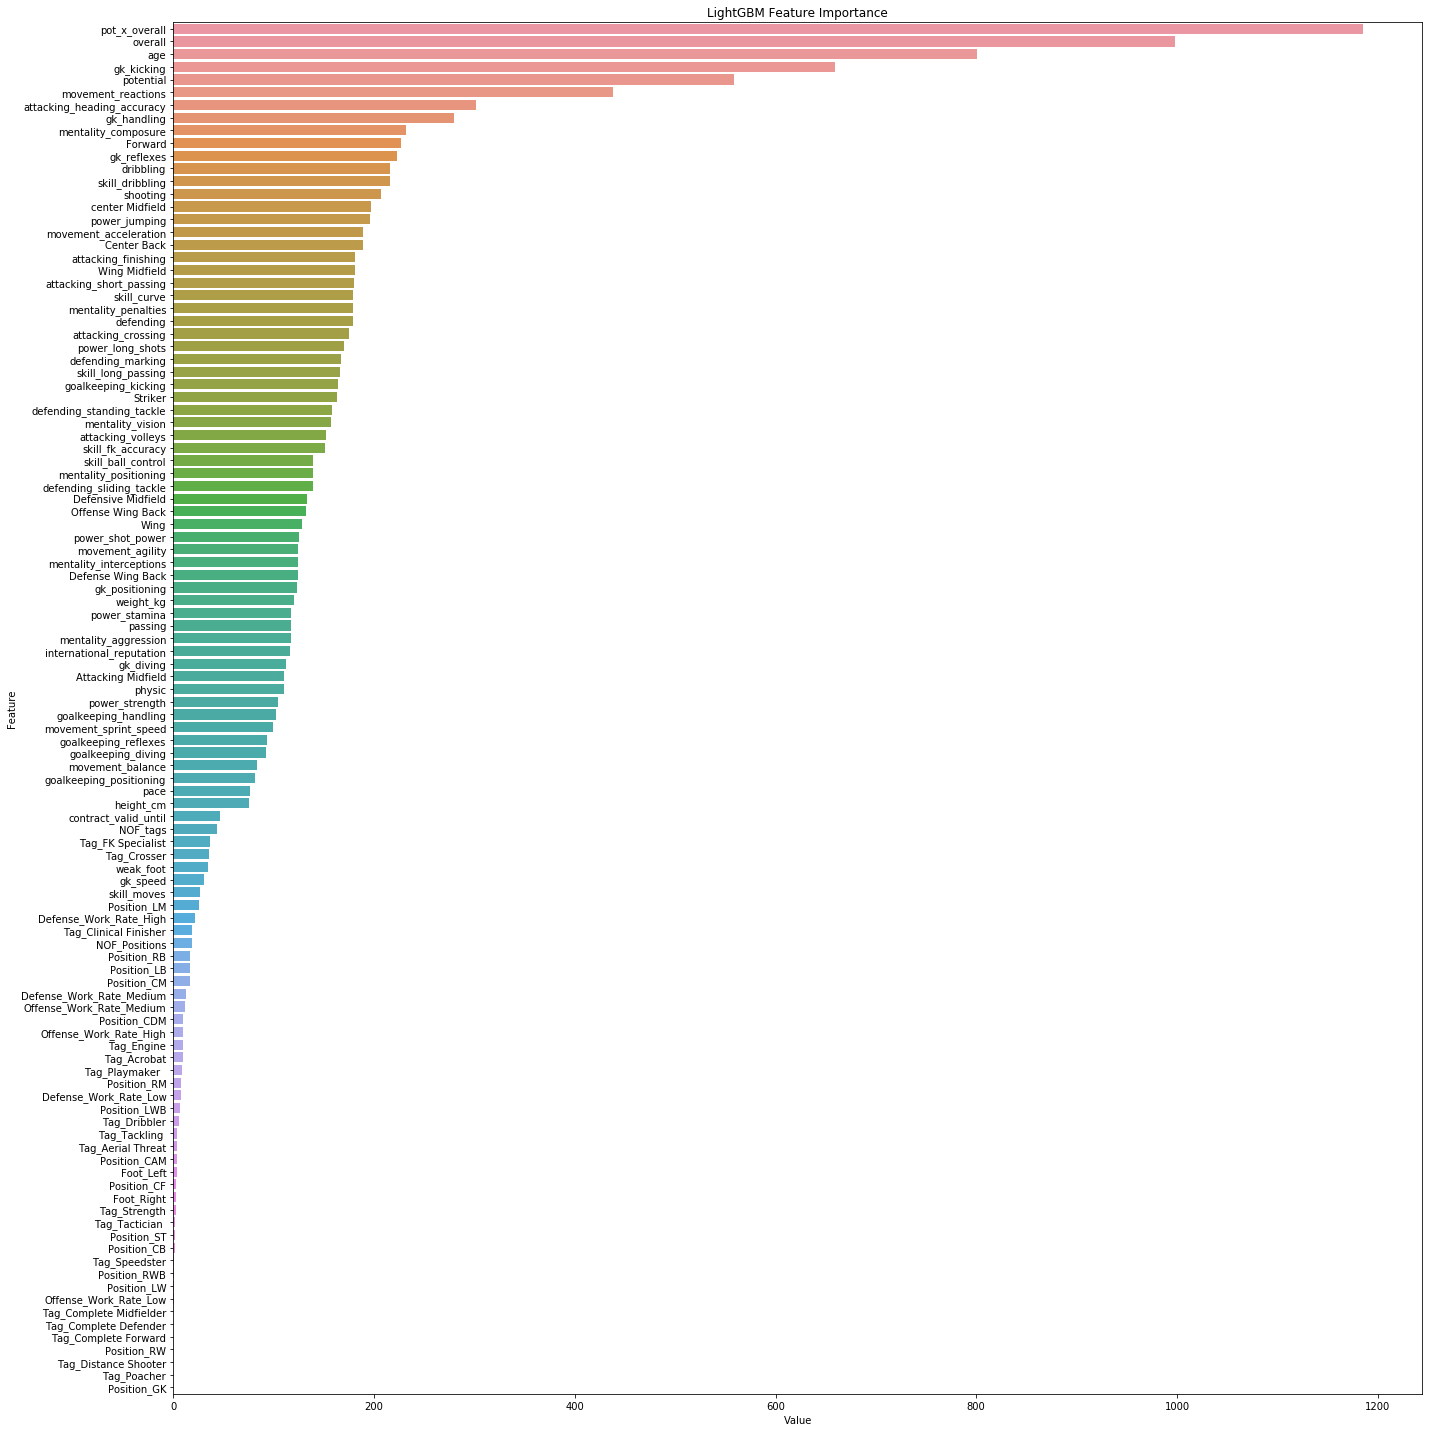

<Figure size 432x288 with 0 Axes>

In [45]:
#Feature importance
feature_imp = pd.DataFrame(sorted(zip(opt_model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 20))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-01.png')

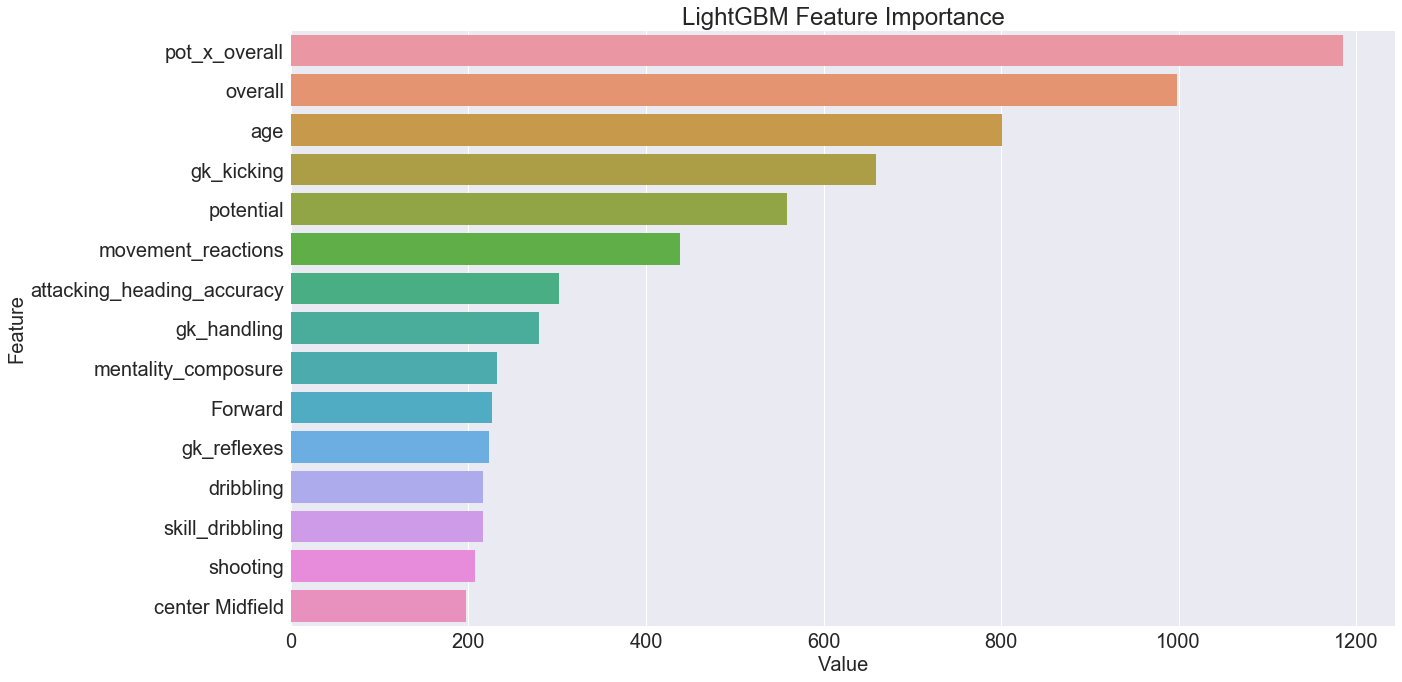

<Figure size 432x288 with 0 Axes>

In [50]:
#Feature importance with top 15 features
feature_imp2 = pd.DataFrame(sorted(zip(opt_model.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
a=sns.barplot(x="Value", y="Feature", data=feature_imp2.sort_values(by="Value", ascending=False).head(15))
a.set_xlabel("Value",fontsize=20)
a.set_ylabel("Feature",fontsize=20)
plt.title('LightGBM Feature Importance')
plt.tight_layout()
plt.show()
plt.savefig('lgbm_importances-02.png')

Text(0.5,1,'Predictions vs Values on test dataset')

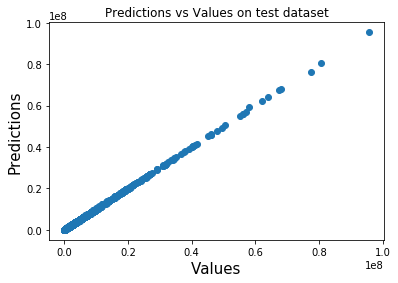

In [47]:
# Plot prediction & Values
fig, ax = plt.subplots()
ax.scatter(y_test, best_predictions)
ax.set_xlabel(r'Values', fontsize=15)
ax.set_ylabel(r'Predictions', fontsize=15)
ax.set_title('Predictions vs Values on test dataset')

### Important findings
    
   -  Football market has outliers, some players value much much higher than others.
   -  Overall rating is more related with the value of the player compared to the potential of the player
   -  Derived variable potential * overall is more related with the value of the player
   -  LightGBM makes great job to predict values of the player.( $R^2 = 0.998$ )
